In [1]:
'''
!pip install tensorflow --upgrade
!pip install --upgrade keras
'''

'\n!pip install tensorflow --upgrade\n!pip install --upgrade keras\n'

In [2]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
import cv2
import numpy as np
from numpy.linalg import norm
from google.colab.patches import cv2_imshow # Import cv2_imshow for Google Colab
import os


In [3]:
model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


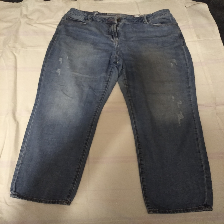

In [14]:


path = "/content/drive/MyDrive/Data/clothings/images_original/"
img=cv2.imread(path + "test.jpg")
img=cv2.resize(img, (224,224))
cv2_imshow(img)

In [15]:
def extract_feature(img_path, model):
    img=cv2.imread(img_path)
    if img is None:
        # Check if image was loaded successfully
          print(f"Failed to load image: {img_path}")
          return None
    img=cv2.resize(img, (224,224))
    img=np.array(img)
    expand_img=np.expand_dims(img, axis=0)
    pre_img=preprocess_input(expand_img)
    result=model.predict(pre_img).flatten()
    normalized=result/norm(result)
    return normalized

In [16]:
filename=[]
feature_list=[]

for file in os.listdir(path):
    filename.append(os.path.join(path,file))

In [17]:
extract_feature(path + "test.jpg",model)

1/1 [==============================] - 1s 1s/step


array([0.00180454, 0.05755593, 0.00273594, ..., 0.        , 0.00166419,
       0.00914774], dtype=float32)

In [18]:
import os
from tqdm import tqdm
filename[0:5]

['/content/drive/MyDrive/Data/clothings/images_original/d4eea203-72d6-4f7a-a212-ed214c7567f0.jpg',
 '/content/drive/MyDrive/Data/clothings/images_original/d50950b2-3468-4b95-9076-80fbece06f1a.jpg',
 '/content/drive/MyDrive/Data/clothings/images_original/d5165ed1-5dd7-46db-8dca-aa170b6caceb.jpg',
 '/content/drive/MyDrive/Data/clothings/images_original/d52566d2-6cb0-49a6-b5d7-b514298c0b10.jpg',
 '/content/drive/MyDrive/Data/clothings/images_original/d52dac36-f287-4d41-bd6f-fdae73876fbb.jpg']

In [19]:
print("Before Training feature list : "+ str(len(feature_list)))
print("Before Training filename: "+ str(len(filename)))

Before Training feature list : 0
Before Training filename: 5762


In [20]:

for file in tqdm(filename):
    features = extract_feature(file, model)  # Assuming 'model' is defined elsewhere
    if features is not None:  # Append only if features were extracted
        feature_list.append(features)
    else:
      filename.remove(str(file))


print("Successfully trained feature list : "+ str(len(feature_list)))
print("Successfully trained filename: "+ str(len(filename)))

  0%|          | 0/5762 [00:00<?, ?it/s]

1/1 [==============================] - 0s 188ms/step


  0%|          | 1/5762 [00:01<2:04:00,  1.29s/it]

1/1 [==============================] - 0s 187ms/step


  0%|          | 2/5762 [00:02<1:48:47,  1.13s/it]

1/1 [==============================] - 0s 169ms/step


  0%|          | 3/5762 [00:03<1:48:51,  1.13s/it]

1/1 [==============================] - 0s 177ms/step


  0%|          | 4/5762 [00:04<1:58:42,  1.24s/it]

1/1 [==============================] - 0s 294ms/step


  0%|          | 5/5762 [00:06<2:07:12,  1.33s/it]

1/1 [==============================] - 0s 298ms/step


  0%|          | 6/5762 [00:07<2:09:15,  1.35s/it]

1/1 [==============================] - 0s 166ms/step


  0%|          | 7/5762 [00:08<1:59:03,  1.24s/it]

1/1 [==============================] - 0s 166ms/step


  0%|          | 8/5762 [00:09<1:50:41,  1.15s/it]

1/1 [==============================] - 0s 183ms/step


  0%|          | 9/5762 [00:10<1:41:36,  1.06s/it]

1/1 [==============================] - 0s 184ms/step


  0%|          | 10/5762 [00:11<1:39:54,  1.04s/it]

1/1 [==============================] - 0s 175ms/step


  0%|          | 11/5762 [00:12<1:45:54,  1.10s/it]

1/1 [==============================] - 0s 183ms/step


  0%|          | 12/5762 [00:13<1:45:52,  1.10s/it]

1/1 [==============================] - 0s 169ms/step


  0%|          | 13/5762 [00:15<1:52:26,  1.17s/it]

1/1 [==============================] - 0s 170ms/step


  0%|          | 14/5762 [00:16<1:41:03,  1.05s/it]

1/1 [==============================] - 0s 167ms/step


  0%|          | 15/5762 [00:17<1:48:35,  1.13s/it]

1/1 [==============================] - 0s 257ms/step


  0%|          | 16/5762 [00:18<1:46:08,  1.11s/it]

1/1 [==============================] - 0s 299ms/step


  0%|          | 17/5762 [00:19<1:47:04,  1.12s/it]

1/1 [==============================] - 0s 285ms/step


  0%|          | 18/5762 [00:21<2:05:13,  1.31s/it]

1/1 [==============================] - 0s 172ms/step


  0%|          | 19/5762 [00:22<2:03:06,  1.29s/it]

1/1 [==============================] - 0s 167ms/step


  0%|          | 20/5762 [00:23<1:56:45,  1.22s/it]

1/1 [==============================] - 0s 170ms/step


  0%|          | 21/5762 [00:24<1:48:56,  1.14s/it]

1/1 [==============================] - 0s 198ms/step


  0%|          | 22/5762 [00:25<1:57:53,  1.23s/it]

1/1 [==============================] - 0s 183ms/step


  0%|          | 23/5762 [00:26<1:48:11,  1.13s/it]

1/1 [==============================] - 0s 175ms/step


  0%|          | 24/5762 [00:28<1:49:28,  1.14s/it]

1/1 [==============================] - 0s 169ms/step


  0%|          | 25/5762 [00:29<1:50:46,  1.16s/it]

1/1 [==============================] - 0s 174ms/step


  0%|          | 26/5762 [00:30<1:49:08,  1.14s/it]

1/1 [==============================] - 0s 291ms/step


  0%|          | 27/5762 [00:31<1:56:19,  1.22s/it]

1/1 [==============================] - 0s 302ms/step


  0%|          | 28/5762 [00:32<1:51:12,  1.16s/it]

1/1 [==============================] - 0s 327ms/step


  1%|          | 29/5762 [00:34<1:53:22,  1.19s/it]

1/1 [==============================] - 0s 175ms/step


  1%|          | 30/5762 [00:34<1:45:51,  1.11s/it]

1/1 [==============================] - 0s 179ms/step


  1%|          | 31/5762 [00:35<1:29:51,  1.06it/s]

1/1 [==============================] - 0s 166ms/step


  1%|          | 32/5762 [00:36<1:36:41,  1.01s/it]

1/1 [==============================] - 0s 174ms/step


  1%|          | 33/5762 [00:37<1:41:34,  1.06s/it]

1/1 [==============================] - 0s 174ms/step


  1%|          | 34/5762 [00:38<1:41:06,  1.06s/it]

1/1 [==============================] - 0s 183ms/step


  1%|          | 35/5762 [00:40<1:49:17,  1.14s/it]

1/1 [==============================] - 0s 174ms/step


  1%|          | 36/5762 [00:41<1:52:23,  1.18s/it]

1/1 [==============================] - 0s 172ms/step


  1%|          | 37/5762 [00:42<1:48:24,  1.14s/it]

1/1 [==============================] - 0s 169ms/step


  1%|          | 38/5762 [00:43<1:56:30,  1.22s/it]

1/1 [==============================] - 0s 297ms/step


  1%|          | 39/5762 [00:45<1:52:32,  1.18s/it]

1/1 [==============================] - 0s 290ms/step


  1%|          | 40/5762 [00:46<1:58:14,  1.24s/it]

1/1 [==============================] - 0s 171ms/step


  1%|          | 41/5762 [00:47<2:00:22,  1.26s/it]

1/1 [==============================] - 0s 169ms/step


  1%|          | 42/5762 [00:48<1:50:18,  1.16s/it]

1/1 [==============================] - 0s 184ms/step


  1%|          | 43/5762 [00:49<1:43:38,  1.09s/it]

1/1 [==============================] - 0s 189ms/step


  1%|          | 44/5762 [00:50<1:38:43,  1.04s/it]

1/1 [==============================] - 0s 171ms/step


  1%|          | 45/5762 [00:51<1:28:45,  1.07it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 46/5762 [00:52<1:30:59,  1.05it/s]

1/1 [==============================] - 0s 184ms/step


  1%|          | 47/5762 [00:53<1:37:48,  1.03s/it]

1/1 [==============================] - 0s 175ms/step


  1%|          | 48/5762 [00:54<1:40:56,  1.06s/it]

1/1 [==============================] - 0s 175ms/step


  1%|          | 49/5762 [00:55<1:39:50,  1.05s/it]

1/1 [==============================] - 0s 176ms/step


  1%|          | 50/5762 [00:56<1:35:19,  1.00s/it]

1/1 [==============================] - 0s 293ms/step


  1%|          | 51/5762 [00:57<1:45:28,  1.11s/it]

1/1 [==============================] - 0s 283ms/step


  1%|          | 52/5762 [00:58<1:39:41,  1.05s/it]

1/1 [==============================] - 0s 315ms/step


  1%|          | 53/5762 [00:59<1:46:38,  1.12s/it]

1/1 [==============================] - 0s 168ms/step


  1%|          | 54/5762 [01:01<1:47:59,  1.14s/it]

1/1 [==============================] - 0s 172ms/step


  1%|          | 55/5762 [01:02<1:43:22,  1.09s/it]

1/1 [==============================] - 0s 168ms/step


  1%|          | 56/5762 [01:03<1:44:25,  1.10s/it]

1/1 [==============================] - 0s 249ms/step


  1%|          | 57/5762 [01:07<3:12:42,  2.03s/it]

1/1 [==============================] - 0s 348ms/step


  1%|          | 58/5762 [11:00<284:07:41, 179.32s/it]

1/1 [==============================] - 0s 298ms/step


  1%|          | 59/5762 [11:01<199:11:35, 125.74s/it]

1/1 [==============================] - 0s 294ms/step


  1%|          | 60/5762 [11:01<139:38:58, 88.17s/it] 

1/1 [==============================] - 0s 281ms/step


  1%|          | 61/5762 [11:02<98:07:26, 61.96s/it] 

1/1 [==============================] - 0s 297ms/step


  1%|          | 62/5762 [11:03<68:59:02, 43.57s/it]

1/1 [==============================] - 0s 181ms/step


  1%|          | 63/5762 [11:03<48:29:13, 30.63s/it]

1/1 [==============================] - 0s 211ms/step


  1%|          | 64/5762 [11:04<34:09:30, 21.58s/it]

1/1 [==============================] - 0s 175ms/step


  1%|          | 65/5762 [11:04<24:08:08, 15.25s/it]

1/1 [==============================] - 0s 176ms/step


  1%|          | 66/5762 [11:05<17:06:41, 10.81s/it]

1/1 [==============================] - 0s 170ms/step


  1%|          | 67/5762 [11:05<12:10:14,  7.69s/it]

1/1 [==============================] - 0s 172ms/step


  1%|          | 68/5762 [11:05<8:42:42,  5.51s/it] 

1/1 [==============================] - 0s 186ms/step


  1%|          | 69/5762 [11:06<6:19:44,  4.00s/it]

1/1 [==============================] - 0s 173ms/step


  1%|          | 70/5762 [11:06<4:36:41,  2.92s/it]

1/1 [==============================] - 0s 178ms/step


  1%|          | 71/5762 [11:07<3:23:52,  2.15s/it]

1/1 [==============================] - 0s 174ms/step


  1%|          | 72/5762 [11:07<2:35:49,  1.64s/it]

1/1 [==============================] - 0s 171ms/step


  1%|▏         | 73/5762 [11:07<1:58:39,  1.25s/it]

1/1 [==============================] - 0s 168ms/step


  1%|▏         | 74/5762 [11:08<1:32:38,  1.02it/s]

1/1 [==============================] - 0s 191ms/step


  1%|▏         | 75/5762 [11:08<1:12:47,  1.30it/s]

1/1 [==============================] - 0s 174ms/step


  1%|▏         | 76/5762 [11:08<1:02:39,  1.51it/s]

1/1 [==============================] - 0s 171ms/step


  1%|▏         | 77/5762 [11:09<51:42,  1.83it/s]  

1/1 [==============================] - 0s 169ms/step


  1%|▏         | 78/5762 [11:09<49:30,  1.91it/s]

1/1 [==============================] - 0s 177ms/step


  1%|▏         | 79/5762 [11:09<41:48,  2.27it/s]

1/1 [==============================] - 0s 203ms/step


  1%|▏         | 80/5762 [11:10<42:42,  2.22it/s]

1/1 [==============================] - 0s 290ms/step


  1%|▏         | 81/5762 [11:10<44:37,  2.12it/s]

1/1 [==============================] - 0s 303ms/step


  1%|▏         | 82/5762 [11:11<51:28,  1.84it/s]

1/1 [==============================] - 0s 304ms/step


  1%|▏         | 83/5762 [11:12<52:30,  1.80it/s]

1/1 [==============================] - 0s 291ms/step


  1%|▏         | 84/5762 [11:12<56:04,  1.69it/s]

1/1 [==============================] - 0s 294ms/step


  1%|▏         | 85/5762 [11:13<56:12,  1.68it/s]

1/1 [==============================] - 0s 316ms/step


  1%|▏         | 86/5762 [11:14<1:01:29,  1.54it/s]

1/1 [==============================] - 0s 272ms/step


  2%|▏         | 87/5762 [11:14<1:04:57,  1.46it/s]

1/1 [==============================] - 0s 274ms/step


  2%|▏         | 88/5762 [11:15<57:46,  1.64it/s]  

1/1 [==============================] - 0s 268ms/step


  2%|▏         | 89/5762 [11:16<58:53,  1.61it/s]

1/1 [==============================] - 0s 172ms/step


  2%|▏         | 90/5762 [11:16<55:25,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 91/5762 [11:16<46:29,  2.03it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 92/5762 [11:17<39:40,  2.38it/s]

1/1 [==============================] - 0s 172ms/step


  2%|▏         | 93/5762 [11:17<39:25,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 94/5762 [11:17<40:54,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 95/5762 [11:18<37:34,  2.51it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 96/5762 [11:18<33:17,  2.84it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 97/5762 [11:18<31:45,  2.97it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 98/5762 [11:19<33:51,  2.79it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 99/5762 [11:19<34:31,  2.73it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 100/5762 [11:20<35:57,  2.62it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 101/5762 [11:20<37:55,  2.49it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 102/5762 [11:20<36:02,  2.62it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 103/5762 [11:21<32:53,  2.87it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 104/5762 [11:21<35:37,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 105/5762 [11:21<37:10,  2.54it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 106/5762 [11:22<33:57,  2.78it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 107/5762 [11:22<35:02,  2.69it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 108/5762 [11:23<36:20,  2.59it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 109/5762 [11:23<32:13,  2.92it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 110/5762 [11:23<33:42,  2.80it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 111/5762 [11:24<38:06,  2.47it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 112/5762 [11:24<43:55,  2.14it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 113/5762 [11:25<40:25,  2.33it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 114/5762 [11:25<39:18,  2.40it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 115/5762 [11:26<40:19,  2.33it/s]

1/1 [==============================] - 0s 289ms/step


  2%|▏         | 116/5762 [11:26<42:12,  2.23it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 117/5762 [11:27<48:55,  1.92it/s]

1/1 [==============================] - 0s 293ms/step


  2%|▏         | 118/5762 [11:27<52:52,  1.78it/s]

1/1 [==============================] - 0s 276ms/step


  2%|▏         | 119/5762 [11:28<54:16,  1.73it/s]

1/1 [==============================] - 0s 288ms/step


  2%|▏         | 120/5762 [11:29<56:36,  1.66it/s]

1/1 [==============================] - 0s 315ms/step


  2%|▏         | 121/5762 [11:29<58:50,  1.60it/s]

1/1 [==============================] - 0s 288ms/step


  2%|▏         | 122/5762 [11:30<59:09,  1.59it/s]

1/1 [==============================] - 0s 282ms/step


  2%|▏         | 123/5762 [11:31<1:03:30,  1.48it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 124/5762 [11:31<56:53,  1.65it/s]  

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 125/5762 [11:31<47:49,  1.96it/s]

1/1 [==============================] - 0s 172ms/step


  2%|▏         | 126/5762 [11:32<42:37,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 127/5762 [11:32<43:46,  2.15it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 128/5762 [11:33<43:27,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 129/5762 [11:33<41:47,  2.25it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 130/5762 [11:34<43:28,  2.16it/s]

1/1 [==============================] - 0s 185ms/step


  2%|▏         | 131/5762 [11:34<40:47,  2.30it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 132/5762 [11:34<36:07,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 133/5762 [11:35<34:49,  2.69it/s]

1/1 [==============================] - 0s 185ms/step


  2%|▏         | 134/5762 [11:35<35:19,  2.66it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 135/5762 [11:35<34:39,  2.71it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 136/5762 [11:36<34:16,  2.74it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 137/5762 [11:36<35:14,  2.66it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 138/5762 [11:37<41:34,  2.25it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 139/5762 [11:37<40:10,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 140/5762 [11:37<35:09,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 141/5762 [11:38<35:22,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


  2%|▏         | 142/5762 [11:38<36:32,  2.56it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 143/5762 [11:39<37:11,  2.52it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 144/5762 [11:39<40:44,  2.30it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 145/5762 [11:39<38:57,  2.40it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 146/5762 [11:40<38:39,  2.42it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 147/5762 [11:40<43:38,  2.14it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 148/5762 [11:41<40:51,  2.29it/s]

1/1 [==============================] - 0s 292ms/step


  3%|▎         | 149/5762 [11:41<43:11,  2.17it/s]

1/1 [==============================] - 0s 302ms/step


  3%|▎         | 150/5762 [11:42<48:01,  1.95it/s]

1/1 [==============================] - 0s 284ms/step


  3%|▎         | 151/5762 [11:43<53:31,  1.75it/s]

1/1 [==============================] - 0s 301ms/step


  3%|▎         | 152/5762 [11:43<54:01,  1.73it/s]

1/1 [==============================] - 0s 291ms/step


  3%|▎         | 153/5762 [11:44<55:58,  1.67it/s]

1/1 [==============================] - 0s 288ms/step


  3%|▎         | 154/5762 [11:45<54:21,  1.72it/s]

1/1 [==============================] - 0s 308ms/step


  3%|▎         | 155/5762 [11:45<53:35,  1.74it/s]

1/1 [==============================] - 0s 297ms/step


  3%|▎         | 156/5762 [11:46<56:53,  1.64it/s]

1/1 [==============================] - 0s 293ms/step


  3%|▎         | 157/5762 [11:46<57:43,  1.62it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 158/5762 [11:47<54:56,  1.70it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 159/5762 [11:47<49:32,  1.89it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 160/5762 [11:48<49:54,  1.87it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 161/5762 [11:48<45:57,  2.03it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 162/5762 [11:49<47:49,  1.95it/s]

1/1 [==============================] - 0s 169ms/step


  3%|▎         | 163/5762 [11:49<46:09,  2.02it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 164/5762 [11:50<44:53,  2.08it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 165/5762 [11:50<38:40,  2.41it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 166/5762 [11:50<36:43,  2.54it/s]

1/1 [==============================] - 0s 185ms/step


  3%|▎         | 167/5762 [11:51<37:17,  2.50it/s]

1/1 [==============================] - 0s 168ms/step


  3%|▎         | 168/5762 [11:51<37:28,  2.49it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 169/5762 [11:52<37:24,  2.49it/s]

1/1 [==============================] - 0s 171ms/step


  3%|▎         | 170/5762 [11:52<37:00,  2.52it/s]

1/1 [==============================] - 0s 169ms/step


  3%|▎         | 171/5762 [11:52<32:42,  2.85it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 172/5762 [11:53<32:35,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 173/5762 [11:53<34:10,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 174/5762 [11:53<34:38,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 175/5762 [11:54<32:06,  2.90it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 176/5762 [11:54<33:42,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 177/5762 [11:54<34:53,  2.67it/s]

1/1 [==============================] - 0s 190ms/step


  3%|▎         | 178/5762 [11:55<37:47,  2.46it/s]

1/1 [==============================] - 0s 171ms/step


  3%|▎         | 179/5762 [11:55<35:56,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 180/5762 [11:56<36:12,  2.57it/s]

1/1 [==============================] - 0s 188ms/step


  3%|▎         | 181/5762 [11:56<36:33,  2.54it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 182/5762 [11:56<36:51,  2.52it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 183/5762 [11:57<33:01,  2.82it/s]

1/1 [==============================] - 0s 289ms/step


  3%|▎         | 184/5762 [11:58<50:20,  1.85it/s]

1/1 [==============================] - 0s 302ms/step


  3%|▎         | 185/5762 [11:58<57:14,  1.62it/s]

1/1 [==============================] - 0s 307ms/step


  3%|▎         | 186/5762 [11:59<56:17,  1.65it/s]

1/1 [==============================] - 0s 302ms/step


  3%|▎         | 187/5762 [12:00<1:00:16,  1.54it/s]

1/1 [==============================] - 0s 325ms/step


  3%|▎         | 188/5762 [12:00<58:37,  1.58it/s]  

1/1 [==============================] - 0s 285ms/step


  3%|▎         | 189/5762 [12:01<1:01:03,  1.52it/s]

1/1 [==============================] - 0s 171ms/step


  3%|▎         | 190/5762 [12:01<51:13,  1.81it/s]  

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 191/5762 [12:02<55:30,  1.67it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 192/5762 [12:03<50:47,  1.83it/s]

1/1 [==============================] - 0s 172ms/step


  3%|▎         | 193/5762 [12:03<43:20,  2.14it/s]

1/1 [==============================] - 0s 184ms/step


  3%|▎         | 194/5762 [12:03<42:35,  2.18it/s]

1/1 [==============================] - 0s 188ms/step


  3%|▎         | 195/5762 [12:04<42:35,  2.18it/s]

1/1 [==============================] - 0s 171ms/step


  3%|▎         | 196/5762 [12:04<41:54,  2.21it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 197/5762 [12:05<41:20,  2.24it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 198/5762 [12:05<42:41,  2.17it/s]

1/1 [==============================] - 0s 183ms/step


  3%|▎         | 199/5762 [12:05<40:22,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 200/5762 [12:06<40:40,  2.28it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 201/5762 [12:06<36:14,  2.56it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▎         | 202/5762 [12:06<32:50,  2.82it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▎         | 203/5762 [12:07<40:11,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▎         | 204/5762 [12:07<39:30,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▎         | 205/5762 [12:08<35:18,  2.62it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▎         | 206/5762 [12:08<35:49,  2.59it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▎         | 207/5762 [12:09<37:17,  2.48it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▎         | 208/5762 [12:09<40:07,  2.31it/s]

1/1 [==============================] - 0s 188ms/step


  4%|▎         | 209/5762 [12:09<39:24,  2.35it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▎         | 210/5762 [12:10<37:10,  2.49it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▎         | 211/5762 [12:10<37:12,  2.49it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▎         | 212/5762 [12:11<37:30,  2.47it/s]

1/1 [==============================] - 0s 167ms/step


  4%|▎         | 213/5762 [12:11<39:08,  2.36it/s]

1/1 [==============================] - 0s 290ms/step


  4%|▎         | 214/5762 [12:12<45:52,  2.02it/s]

1/1 [==============================] - 0s 293ms/step


  4%|▎         | 215/5762 [12:12<49:22,  1.87it/s]

1/1 [==============================] - 0s 311ms/step


  4%|▎         | 216/5762 [12:13<48:40,  1.90it/s]

1/1 [==============================] - 0s 295ms/step


  4%|▍         | 217/5762 [12:13<49:35,  1.86it/s]

1/1 [==============================] - 0s 296ms/step


  4%|▍         | 218/5762 [12:14<53:26,  1.73it/s]

1/1 [==============================] - 0s 317ms/step


  4%|▍         | 219/5762 [12:15<59:47,  1.55it/s]

1/1 [==============================] - 0s 236ms/step


  4%|▍         | 220/5762 [12:16<58:26,  1.58it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 221/5762 [12:16<56:34,  1.63it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▍         | 222/5762 [12:17<51:30,  1.79it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 223/5762 [12:17<48:29,  1.90it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 224/5762 [12:17<46:27,  1.99it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▍         | 225/5762 [12:18<45:27,  2.03it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 226/5762 [12:18<42:43,  2.16it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 227/5762 [12:19<40:15,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 228/5762 [12:19<39:57,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 229/5762 [12:20<40:20,  2.29it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 230/5762 [12:20<36:04,  2.56it/s]

1/1 [==============================] - 0s 182ms/step


  4%|▍         | 231/5762 [12:21<47:58,  1.92it/s]

1/1 [==============================] - 0s 168ms/step


  4%|▍         | 232/5762 [12:21<45:20,  2.03it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 233/5762 [12:21<39:09,  2.35it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 234/5762 [12:22<38:43,  2.38it/s]

1/1 [==============================] - 0s 171ms/step


  4%|▍         | 235/5762 [12:22<38:32,  2.39it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 236/5762 [12:23<38:04,  2.42it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 237/5762 [12:23<38:45,  2.38it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 238/5762 [12:23<37:41,  2.44it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 239/5762 [12:24<37:47,  2.44it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 240/5762 [12:24<40:23,  2.28it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 241/5762 [12:25<38:22,  2.40it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 242/5762 [12:25<38:00,  2.42it/s]

1/1 [==============================] - 0s 182ms/step


  4%|▍         | 243/5762 [12:26<41:25,  2.22it/s]

1/1 [==============================] - 0s 304ms/step


  4%|▍         | 244/5762 [12:26<44:53,  2.05it/s]

1/1 [==============================] - 0s 294ms/step


  4%|▍         | 245/5762 [12:27<42:16,  2.18it/s]

1/1 [==============================] - 0s 292ms/step


  4%|▍         | 246/5762 [12:27<41:31,  2.21it/s]

1/1 [==============================] - 0s 296ms/step


  4%|▍         | 247/5762 [12:28<47:06,  1.95it/s]

1/1 [==============================] - 0s 294ms/step


  4%|▍         | 248/5762 [12:28<50:30,  1.82it/s]

1/1 [==============================] - 0s 286ms/step


  4%|▍         | 249/5762 [12:29<47:48,  1.92it/s]

1/1 [==============================] - 0s 311ms/step


  4%|▍         | 250/5762 [12:29<50:50,  1.81it/s]

1/1 [==============================] - 0s 290ms/step


  4%|▍         | 251/5762 [12:30<54:21,  1.69it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 252/5762 [12:31<58:10,  1.58it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 253/5762 [12:31<56:40,  1.62it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 254/5762 [12:32<50:41,  1.81it/s]

1/1 [==============================] - 0s 190ms/step


  4%|▍         | 255/5762 [12:32<52:43,  1.74it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 256/5762 [12:33<46:53,  1.96it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 257/5762 [12:33<45:00,  2.04it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 258/5762 [12:34<43:32,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 259/5762 [12:34<44:27,  2.06it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 260/5762 [12:35<43:06,  2.13it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▍         | 261/5762 [12:35<42:46,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


  5%|▍         | 262/5762 [12:36<42:06,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


  5%|▍         | 263/5762 [12:36<40:42,  2.25it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 264/5762 [12:36<39:58,  2.29it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▍         | 265/5762 [12:37<39:29,  2.32it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▍         | 266/5762 [12:37<38:57,  2.35it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 267/5762 [12:38<42:36,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 268/5762 [12:38<41:14,  2.22it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 269/5762 [12:38<38:34,  2.37it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 270/5762 [12:39<37:40,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 271/5762 [12:39<38:07,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 272/5762 [12:40<37:42,  2.43it/s]

1/1 [==============================] - 0s 193ms/step


  5%|▍         | 273/5762 [12:40<41:10,  2.22it/s]

1/1 [==============================] - 0s 299ms/step


  5%|▍         | 274/5762 [12:41<45:22,  2.02it/s]

1/1 [==============================] - 0s 291ms/step


  5%|▍         | 275/5762 [12:41<47:06,  1.94it/s]

1/1 [==============================] - 0s 289ms/step


  5%|▍         | 276/5762 [12:42<50:17,  1.82it/s]

1/1 [==============================] - 0s 302ms/step


  5%|▍         | 277/5762 [12:43<55:51,  1.64it/s]

1/1 [==============================] - 0s 316ms/step


  5%|▍         | 278/5762 [12:44<59:24,  1.54it/s]

1/1 [==============================] - 0s 276ms/step


  5%|▍         | 279/5762 [12:44<1:02:58,  1.45it/s]

1/1 [==============================] - 0s 169ms/step


  5%|▍         | 280/5762 [12:45<51:57,  1.76it/s]  

1/1 [==============================] - 0s 168ms/step


  5%|▍         | 281/5762 [12:45<52:52,  1.73it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▍         | 282/5762 [12:46<48:15,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▍         | 283/5762 [12:46<40:51,  2.24it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 284/5762 [12:46<45:33,  2.00it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▍         | 285/5762 [12:47<43:23,  2.10it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 286/5762 [12:47<43:18,  2.11it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▍         | 287/5762 [12:48<42:14,  2.16it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▍         | 288/5762 [12:48<40:35,  2.25it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 289/5762 [12:49<41:58,  2.17it/s]

1/1 [==============================] - 0s 185ms/step


  5%|▌         | 290/5762 [12:49<38:58,  2.34it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▌         | 291/5762 [12:49<36:28,  2.50it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 292/5762 [12:50<40:02,  2.28it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 293/5762 [12:50<39:43,  2.29it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 294/5762 [12:51<34:44,  2.62it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▌         | 295/5762 [12:51<33:57,  2.68it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▌         | 296/5762 [12:51<36:04,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▌         | 297/5762 [12:52<34:54,  2.61it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▌         | 298/5762 [12:52<34:14,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


  5%|▌         | 299/5762 [12:53<35:44,  2.55it/s]

1/1 [==============================] - 0s 300ms/step


  5%|▌         | 300/5762 [12:53<46:09,  1.97it/s]

1/1 [==============================] - 0s 293ms/step


  5%|▌         | 301/5762 [12:54<49:49,  1.83it/s]

1/1 [==============================] - 0s 282ms/step


  5%|▌         | 302/5762 [12:54<45:21,  2.01it/s]

1/1 [==============================] - 0s 331ms/step


  5%|▌         | 303/5762 [12:55<53:18,  1.71it/s]

1/1 [==============================] - 0s 366ms/step


  5%|▌         | 304/5762 [12:56<59:51,  1.52it/s]

1/1 [==============================] - 0s 352ms/step


  5%|▌         | 305/5762 [12:57<1:05:06,  1.40it/s]

1/1 [==============================] - 0s 421ms/step


  5%|▌         | 306/5762 [12:58<1:07:25,  1.35it/s]

1/1 [==============================] - 0s 324ms/step


  5%|▌         | 307/5762 [12:58<1:08:27,  1.33it/s]

1/1 [==============================] - 0s 337ms/step


  5%|▌         | 308/5762 [12:59<1:10:45,  1.28it/s]

1/1 [==============================] - 0s 300ms/step


  5%|▌         | 309/5762 [13:00<1:14:20,  1.22it/s]

1/1 [==============================] - 0s 287ms/step


  5%|▌         | 310/5762 [13:01<1:07:36,  1.34it/s]

1/1 [==============================] - 0s 168ms/step


  5%|▌         | 311/5762 [13:01<1:00:31,  1.50it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 312/5762 [13:01<49:43,  1.83it/s]  

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 313/5762 [13:02<45:33,  1.99it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▌         | 314/5762 [13:02<43:00,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 315/5762 [13:03<40:43,  2.23it/s]

1/1 [==============================] - 0s 165ms/step


  5%|▌         | 316/5762 [13:03<40:57,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 317/5762 [13:04<39:48,  2.28it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 318/5762 [13:04<35:14,  2.58it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 319/5762 [13:04<37:09,  2.44it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▌         | 320/5762 [13:05<37:19,  2.43it/s]

1/1 [==============================] - 0s 186ms/step


  6%|▌         | 321/5762 [13:05<37:41,  2.41it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 322/5762 [13:05<36:12,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 323/5762 [13:06<32:17,  2.81it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 324/5762 [13:06<34:16,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 325/5762 [13:06<31:20,  2.89it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 326/5762 [13:07<34:55,  2.59it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 327/5762 [13:07<31:42,  2.86it/s]

1/1 [==============================] - 0s 167ms/step


  6%|▌         | 328/5762 [13:07<29:48,  3.04it/s]

1/1 [==============================] - 0s 169ms/step


  6%|▌         | 329/5762 [13:08<27:59,  3.23it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 330/5762 [13:08<31:02,  2.92it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 331/5762 [13:09<38:12,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 332/5762 [13:09<37:38,  2.40it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▌         | 333/5762 [13:10<37:07,  2.44it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 334/5762 [13:10<36:31,  2.48it/s]

1/1 [==============================] - 0s 184ms/step


  6%|▌         | 335/5762 [13:11<40:48,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 336/5762 [13:11<37:35,  2.41it/s]

1/1 [==============================] - 0s 332ms/step


  6%|▌         | 337/5762 [13:11<43:51,  2.06it/s]

1/1 [==============================] - 0s 291ms/step


  6%|▌         | 338/5762 [13:12<48:54,  1.85it/s]

1/1 [==============================] - 0s 298ms/step


  6%|▌         | 339/5762 [13:13<50:56,  1.77it/s]

1/1 [==============================] - 0s 304ms/step


  6%|▌         | 340/5762 [13:14<58:54,  1.53it/s]

1/1 [==============================] - 0s 264ms/step


  6%|▌         | 341/5762 [13:14<1:01:25,  1.47it/s]

1/1 [==============================] - 0s 295ms/step


  6%|▌         | 342/5762 [13:15<54:44,  1.65it/s]  

1/1 [==============================] - 0s 282ms/step


  6%|▌         | 343/5762 [13:15<56:52,  1.59it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 344/5762 [13:16<50:43,  1.78it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 345/5762 [13:16<42:56,  2.10it/s]

1/1 [==============================] - 0s 193ms/step


  6%|▌         | 346/5762 [13:17<43:30,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▌         | 347/5762 [13:17<42:59,  2.10it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 348/5762 [13:17<39:13,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 349/5762 [13:18<42:18,  2.13it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▌         | 350/5762 [13:18<41:51,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 351/5762 [13:19<40:07,  2.25it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 352/5762 [13:19<40:31,  2.22it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 353/5762 [13:20<39:28,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 354/5762 [13:20<36:45,  2.45it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 355/5762 [13:21<37:06,  2.43it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 356/5762 [13:21<38:52,  2.32it/s]

1/1 [==============================] - 0s 165ms/step


  6%|▌         | 357/5762 [13:21<40:07,  2.24it/s]

1/1 [==============================] - 0s 187ms/step


  6%|▌         | 358/5762 [13:22<35:35,  2.53it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▌         | 359/5762 [13:22<34:48,  2.59it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 360/5762 [13:22<31:16,  2.88it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▋         | 361/5762 [13:23<33:09,  2.72it/s]

1/1 [==============================] - 0s 163ms/step


  6%|▋         | 362/5762 [13:23<33:25,  2.69it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▋         | 363/5762 [13:24<33:49,  2.66it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▋         | 364/5762 [13:24<30:55,  2.91it/s]

1/1 [==============================] - 0s 165ms/step


  6%|▋         | 365/5762 [13:24<33:45,  2.66it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▋         | 366/5762 [13:25<33:28,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▋         | 367/5762 [13:25<30:24,  2.96it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▋         | 368/5762 [13:25<35:30,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


  6%|▋         | 369/5762 [13:26<42:35,  2.11it/s]

1/1 [==============================] - 0s 307ms/step


  6%|▋         | 370/5762 [13:27<51:25,  1.75it/s]

1/1 [==============================] - 0s 291ms/step


  6%|▋         | 371/5762 [13:28<56:22,  1.59it/s]

1/1 [==============================] - 0s 292ms/step


  6%|▋         | 372/5762 [13:28<50:38,  1.77it/s]

1/1 [==============================] - 0s 305ms/step


  6%|▋         | 373/5762 [13:29<52:31,  1.71it/s]

1/1 [==============================] - 0s 315ms/step


  6%|▋         | 374/5762 [13:29<49:09,  1.83it/s]

1/1 [==============================] - 0s 281ms/step


  7%|▋         | 375/5762 [13:30<51:41,  1.74it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 376/5762 [13:30<51:22,  1.75it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 377/5762 [13:31<50:38,  1.77it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 378/5762 [13:31<44:52,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 379/5762 [13:32<40:05,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 380/5762 [13:32<40:27,  2.22it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 381/5762 [13:32<39:09,  2.29it/s]

1/1 [==============================] - 0s 165ms/step


  7%|▋         | 382/5762 [13:33<36:33,  2.45it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 383/5762 [13:33<33:30,  2.67it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 384/5762 [13:33<34:51,  2.57it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 385/5762 [13:34<34:30,  2.60it/s]

1/1 [==============================] - 0s 189ms/step


  7%|▋         | 386/5762 [13:34<35:42,  2.51it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 387/5762 [13:35<35:45,  2.51it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 388/5762 [13:35<36:58,  2.42it/s]

1/1 [==============================] - 0s 167ms/step


  7%|▋         | 389/5762 [13:35<35:06,  2.55it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 390/5762 [13:36<31:22,  2.85it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 391/5762 [13:36<32:01,  2.80it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 392/5762 [13:37<34:13,  2.61it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 393/5762 [13:37<30:27,  2.94it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 394/5762 [13:37<31:38,  2.83it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 395/5762 [13:37<29:19,  3.05it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 396/5762 [13:38<31:02,  2.88it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 397/5762 [13:38<30:42,  2.91it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 398/5762 [13:38<28:43,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


  7%|▋         | 399/5762 [13:39<43:34,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 400/5762 [13:40<39:58,  2.24it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 401/5762 [13:40<38:30,  2.32it/s]

1/1 [==============================] - 0s 285ms/step


  7%|▋         | 402/5762 [13:41<44:02,  2.03it/s]

1/1 [==============================] - 0s 289ms/step


  7%|▋         | 403/5762 [13:41<48:17,  1.85it/s]

1/1 [==============================] - 0s 296ms/step


  7%|▋         | 404/5762 [13:42<52:06,  1.71it/s]

1/1 [==============================] - 0s 281ms/step


  7%|▋         | 405/5762 [13:43<1:00:53,  1.47it/s]

1/1 [==============================] - 0s 275ms/step


  7%|▋         | 406/5762 [13:44<1:13:35,  1.21it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 407/5762 [13:45<1:05:33,  1.36it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 408/5762 [13:45<56:36,  1.58it/s]  

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 409/5762 [13:45<51:44,  1.72it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 410/5762 [13:46<48:40,  1.83it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 411/5762 [13:46<43:10,  2.07it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 412/5762 [13:47<39:33,  2.25it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 413/5762 [13:47<39:15,  2.27it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 414/5762 [13:47<38:48,  2.30it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 415/5762 [13:48<38:29,  2.32it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 416/5762 [13:48<39:07,  2.28it/s]

1/1 [==============================] - 0s 186ms/step


  7%|▋         | 417/5762 [13:49<39:04,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 418/5762 [13:49<37:36,  2.37it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 419/5762 [13:49<34:20,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 420/5762 [13:50<47:03,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 421/5762 [13:51<39:44,  2.24it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 422/5762 [13:51<39:58,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 423/5762 [13:52<41:25,  2.15it/s]

1/1 [==============================] - 0s 180ms/step


  7%|▋         | 424/5762 [13:52<40:29,  2.20it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 425/5762 [13:52<39:19,  2.26it/s]

1/1 [==============================] - 0s 165ms/step


  7%|▋         | 426/5762 [13:53<38:15,  2.32it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 427/5762 [13:53<37:50,  2.35it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 428/5762 [13:54<34:51,  2.55it/s]

1/1 [==============================] - 0s 193ms/step


  7%|▋         | 429/5762 [13:54<36:02,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


  7%|▋         | 430/5762 [13:55<39:47,  2.23it/s]

1/1 [==============================] - 0s 309ms/step


  7%|▋         | 431/5762 [13:55<39:20,  2.26it/s]

1/1 [==============================] - 0s 289ms/step


  7%|▋         | 432/5762 [13:55<41:06,  2.16it/s]

1/1 [==============================] - 0s 306ms/step


  8%|▊         | 433/5762 [13:56<49:17,  1.80it/s]

1/1 [==============================] - 0s 275ms/step


  8%|▊         | 434/5762 [13:57<51:44,  1.72it/s]

1/1 [==============================] - 0s 290ms/step


  8%|▊         | 435/5762 [13:58<53:00,  1.67it/s]

1/1 [==============================] - 0s 284ms/step


  8%|▊         | 436/5762 [13:58<48:57,  1.81it/s]

1/1 [==============================] - 0s 317ms/step


  8%|▊         | 437/5762 [13:58<45:40,  1.94it/s]

1/1 [==============================] - 0s 274ms/step


  8%|▊         | 438/5762 [13:59<50:11,  1.77it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 439/5762 [14:00<47:22,  1.87it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 440/5762 [14:00<43:34,  2.04it/s]

1/1 [==============================] - 0s 187ms/step


  8%|▊         | 441/5762 [14:00<41:22,  2.14it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 442/5762 [14:01<35:29,  2.50it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 443/5762 [14:01<34:21,  2.58it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 444/5762 [14:01<36:08,  2.45it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 445/5762 [14:02<36:48,  2.41it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 446/5762 [14:02<40:59,  2.16it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 447/5762 [14:03<38:50,  2.28it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 448/5762 [14:03<36:58,  2.40it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 449/5762 [14:04<40:34,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 450/5762 [14:04<35:19,  2.51it/s]

1/1 [==============================] - 0s 193ms/step


  8%|▊         | 451/5762 [14:04<33:59,  2.60it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 452/5762 [14:05<39:17,  2.25it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 453/5762 [14:05<35:41,  2.48it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 454/5762 [14:06<52:28,  1.69it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 455/5762 [14:07<47:40,  1.86it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 456/5762 [14:07<42:45,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 457/5762 [14:07<42:30,  2.08it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 458/5762 [14:08<42:47,  2.07it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 459/5762 [14:08<37:53,  2.33it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 460/5762 [14:09<51:41,  1.71it/s]

1/1 [==============================] - 0s 301ms/step


  8%|▊         | 461/5762 [14:10<48:16,  1.83it/s]

1/1 [==============================] - 0s 287ms/step


  8%|▊         | 462/5762 [14:10<51:30,  1.71it/s]

1/1 [==============================] - 0s 280ms/step


  8%|▊         | 463/5762 [14:11<51:59,  1.70it/s]

1/1 [==============================] - 0s 284ms/step


  8%|▊         | 464/5762 [14:12<56:11,  1.57it/s]

1/1 [==============================] - 0s 287ms/step


  8%|▊         | 465/5762 [14:12<56:05,  1.57it/s]

1/1 [==============================] - 0s 302ms/step


  8%|▊         | 466/5762 [14:13<54:43,  1.61it/s]

1/1 [==============================] - 0s 293ms/step


  8%|▊         | 467/5762 [14:14<58:49,  1.50it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 468/5762 [14:14<59:33,  1.48it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 469/5762 [14:15<52:10,  1.69it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 470/5762 [14:15<46:46,  1.89it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 471/5762 [14:16<45:06,  1.95it/s]

1/1 [==============================] - 0s 186ms/step


  8%|▊         | 472/5762 [14:16<45:50,  1.92it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 473/5762 [14:17<43:46,  2.01it/s]

1/1 [==============================] - 0s 187ms/step


  8%|▊         | 474/5762 [14:17<43:13,  2.04it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 475/5762 [14:18<41:11,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 476/5762 [14:18<39:28,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 477/5762 [14:18<42:03,  2.09it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 478/5762 [14:19<40:09,  2.19it/s]

1/1 [==============================] - 0s 165ms/step


  8%|▊         | 479/5762 [14:19<37:18,  2.36it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 480/5762 [14:20<36:51,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 481/5762 [14:20<33:04,  2.66it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 482/5762 [14:20<34:31,  2.55it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 483/5762 [14:21<34:51,  2.52it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 484/5762 [14:21<30:59,  2.84it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 485/5762 [14:21<31:20,  2.81it/s]

1/1 [==============================] - 0s 172ms/step


  8%|▊         | 486/5762 [14:22<28:58,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 487/5762 [14:22<33:45,  2.60it/s]

1/1 [==============================] - 0s 168ms/step


  8%|▊         | 488/5762 [14:22<33:32,  2.62it/s]

1/1 [==============================] - 0s 166ms/step


  8%|▊         | 489/5762 [14:23<33:31,  2.62it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 490/5762 [14:23<34:50,  2.52it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▊         | 491/5762 [14:24<31:40,  2.77it/s]

1/1 [==============================] - 0s 169ms/step


  9%|▊         | 492/5762 [14:24<34:21,  2.56it/s]

1/1 [==============================] - 0s 254ms/step


  9%|▊         | 493/5762 [14:24<34:51,  2.52it/s]

1/1 [==============================] - 0s 296ms/step


  9%|▊         | 494/5762 [14:25<41:03,  2.14it/s]

1/1 [==============================] - 0s 295ms/step


  9%|▊         | 495/5762 [14:26<46:34,  1.88it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▊         | 496/5762 [14:26<48:28,  1.81it/s]

1/1 [==============================] - 0s 284ms/step


  9%|▊         | 497/5762 [14:27<51:18,  1.71it/s]

1/1 [==============================] - 0s 300ms/step


  9%|▊         | 498/5762 [14:28<56:35,  1.55it/s]

1/1 [==============================] - 0s 281ms/step


  9%|▊         | 499/5762 [14:29<58:28,  1.50it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▊         | 500/5762 [14:29<52:59,  1.66it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▊         | 501/5762 [14:29<45:16,  1.94it/s]

1/1 [==============================] - 0s 168ms/step


  9%|▊         | 502/5762 [14:30<42:19,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


  9%|▊         | 503/5762 [14:30<43:53,  2.00it/s]

1/1 [==============================] - 0s 165ms/step


  9%|▊         | 504/5762 [14:31<43:08,  2.03it/s]

1/1 [==============================] - 0s 185ms/step


  9%|▉         | 505/5762 [14:32<54:04,  1.62it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 506/5762 [14:32<49:56,  1.75it/s]

1/1 [==============================] - 0s 170ms/step


  9%|▉         | 507/5762 [14:33<1:00:07,  1.46it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 508/5762 [14:34<1:10:15,  1.25it/s]

1/1 [==============================] - 0s 186ms/step


  9%|▉         | 509/5762 [14:35<1:01:17,  1.43it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 510/5762 [14:35<54:00,  1.62it/s]  

1/1 [==============================] - 0s 233ms/step


  9%|▉         | 511/5762 [14:35<47:29,  1.84it/s]

1/1 [==============================] - 0s 170ms/step


  9%|▉         | 512/5762 [14:36<43:53,  1.99it/s]

1/1 [==============================] - 0s 185ms/step


  9%|▉         | 513/5762 [14:36<41:21,  2.12it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 514/5762 [14:37<38:24,  2.28it/s]

1/1 [==============================] - 0s 168ms/step


  9%|▉         | 515/5762 [14:37<35:53,  2.44it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 516/5762 [14:37<36:17,  2.41it/s]

1/1 [==============================] - 0s 187ms/step


  9%|▉         | 517/5762 [14:38<36:56,  2.37it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▉         | 518/5762 [14:38<36:11,  2.41it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 519/5762 [14:39<35:36,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 520/5762 [14:39<31:58,  2.73it/s]

1/1 [==============================] - 0s 291ms/step


  9%|▉         | 521/5762 [14:39<36:36,  2.39it/s]

1/1 [==============================] - 0s 301ms/step


  9%|▉         | 522/5762 [14:40<43:35,  2.00it/s]

1/1 [==============================] - 0s 308ms/step


  9%|▉         | 523/5762 [14:41<51:28,  1.70it/s]

1/1 [==============================] - 0s 288ms/step


  9%|▉         | 524/5762 [14:42<53:34,  1.63it/s]

1/1 [==============================] - 0s 292ms/step


  9%|▉         | 525/5762 [14:42<56:44,  1.54it/s]

1/1 [==============================] - 0s 300ms/step


  9%|▉         | 526/5762 [14:43<1:00:28,  1.44it/s]

1/1 [==============================] - 0s 271ms/step


  9%|▉         | 527/5762 [14:44<58:45,  1.48it/s]  

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 528/5762 [14:44<54:35,  1.60it/s]

1/1 [==============================] - 0s 181ms/step


  9%|▉         | 529/5762 [14:45<59:41,  1.46it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 530/5762 [14:46<57:02,  1.53it/s]

1/1 [==============================] - 0s 183ms/step


  9%|▉         | 531/5762 [14:46<54:58,  1.59it/s]

1/1 [==============================] - 0s 173ms/step


  9%|▉         | 532/5762 [14:47<53:10,  1.64it/s]

1/1 [==============================] - 0s 189ms/step


  9%|▉         | 533/5762 [14:47<46:54,  1.86it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▉         | 534/5762 [14:48<54:51,  1.59it/s]

1/1 [==============================] - 0s 173ms/step


  9%|▉         | 535/5762 [14:48<49:10,  1.77it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 536/5762 [14:49<44:20,  1.96it/s]

1/1 [==============================] - 0s 188ms/step


  9%|▉         | 537/5762 [14:49<43:12,  2.02it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 538/5762 [14:50<40:00,  2.18it/s]

1/1 [==============================] - 0s 267ms/step


  9%|▉         | 539/5762 [14:50<37:15,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


  9%|▉         | 540/5762 [14:51<43:34,  2.00it/s]

1/1 [==============================] - 0s 280ms/step


  9%|▉         | 541/5762 [14:51<47:57,  1.81it/s]

1/1 [==============================] - 0s 277ms/step


  9%|▉         | 542/5762 [14:52<54:10,  1.61it/s]

1/1 [==============================] - 0s 307ms/step


  9%|▉         | 543/5762 [14:53<52:43,  1.65it/s]

1/1 [==============================] - 0s 304ms/step


  9%|▉         | 544/5762 [14:53<55:41,  1.56it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 545/5762 [14:54<56:49,  1.53it/s]

1/1 [==============================] - 0s 380ms/step


  9%|▉         | 546/5762 [14:55<53:50,  1.61it/s]

1/1 [==============================] - 0s 288ms/step


  9%|▉         | 547/5762 [14:55<56:15,  1.55it/s]

1/1 [==============================] - 0s 296ms/step


 10%|▉         | 548/5762 [14:56<57:31,  1.51it/s]

1/1 [==============================] - 0s 293ms/step


 10%|▉         | 549/5762 [14:57<58:35,  1.48it/s]

1/1 [==============================] - 0s 321ms/step


 10%|▉         | 550/5762 [14:58<1:10:08,  1.24it/s]

1/1 [==============================] - 0s 293ms/step


 10%|▉         | 551/5762 [14:59<1:10:10,  1.24it/s]

1/1 [==============================] - 0s 170ms/step


 10%|▉         | 552/5762 [14:59<59:47,  1.45it/s]  

1/1 [==============================] - 0s 180ms/step


 10%|▉         | 553/5762 [14:59<48:37,  1.79it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 554/5762 [15:00<45:07,  1.92it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 555/5762 [15:00<38:53,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


 10%|▉         | 556/5762 [15:00<39:11,  2.21it/s]

1/1 [==============================] - 0s 186ms/step


 10%|▉         | 557/5762 [15:01<39:52,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 558/5762 [15:01<39:45,  2.18it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 559/5762 [15:02<42:04,  2.06it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 560/5762 [15:02<41:17,  2.10it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 561/5762 [15:03<37:04,  2.34it/s]

1/1 [==============================] - 0s 169ms/step


 10%|▉         | 562/5762 [15:03<36:33,  2.37it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 563/5762 [15:03<35:08,  2.47it/s]

1/1 [==============================] - 0s 188ms/step


 10%|▉         | 564/5762 [15:04<36:06,  2.40it/s]

1/1 [==============================] - 0s 217ms/step


 10%|▉         | 565/5762 [15:04<38:33,  2.25it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 566/5762 [15:05<37:23,  2.32it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 567/5762 [15:05<37:01,  2.34it/s]

1/1 [==============================] - 0s 171ms/step


 10%|▉         | 568/5762 [15:06<37:08,  2.33it/s]

1/1 [==============================] - 0s 188ms/step


 10%|▉         | 569/5762 [15:06<33:13,  2.60it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 570/5762 [15:06<33:42,  2.57it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 571/5762 [15:07<30:25,  2.84it/s]

1/1 [==============================] - 0s 183ms/step


 10%|▉         | 572/5762 [15:07<32:22,  2.67it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 573/5762 [15:07<29:15,  2.96it/s]

1/1 [==============================] - 0s 183ms/step


 10%|▉         | 574/5762 [15:08<34:36,  2.50it/s]

1/1 [==============================] - 0s 167ms/step


 10%|▉         | 575/5762 [15:08<39:51,  2.17it/s]

1/1 [==============================] - 0s 279ms/step


 10%|▉         | 576/5762 [15:09<40:37,  2.13it/s]

1/1 [==============================] - 0s 294ms/step


 10%|█         | 577/5762 [15:10<45:44,  1.89it/s]

1/1 [==============================] - 0s 294ms/step


 10%|█         | 578/5762 [15:10<43:26,  1.99it/s]

1/1 [==============================] - 0s 290ms/step


 10%|█         | 579/5762 [15:11<44:41,  1.93it/s]

1/1 [==============================] - 0s 278ms/step


 10%|█         | 580/5762 [15:11<47:05,  1.83it/s]

1/1 [==============================] - 0s 295ms/step


 10%|█         | 581/5762 [15:12<50:13,  1.72it/s]

1/1 [==============================] - 0s 315ms/step


 10%|█         | 582/5762 [15:12<48:42,  1.77it/s]

1/1 [==============================] - 0s 312ms/step


 10%|█         | 583/5762 [15:13<46:31,  1.86it/s]

1/1 [==============================] - 0s 296ms/step


 10%|█         | 584/5762 [15:14<50:05,  1.72it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 585/5762 [15:14<45:31,  1.90it/s]

1/1 [==============================] - 0s 188ms/step


 10%|█         | 586/5762 [15:14<43:01,  2.00it/s]

1/1 [==============================] - 0s 171ms/step


 10%|█         | 587/5762 [15:15<38:06,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 10%|█         | 588/5762 [15:15<39:10,  2.20it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 589/5762 [15:16<37:46,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 10%|█         | 590/5762 [15:16<37:03,  2.33it/s]

1/1 [==============================] - 0s 187ms/step


 10%|█         | 591/5762 [15:16<36:14,  2.38it/s]

1/1 [==============================] - 0s 173ms/step


 10%|█         | 592/5762 [15:17<36:07,  2.39it/s]

1/1 [==============================] - 0s 165ms/step


 10%|█         | 593/5762 [15:17<34:57,  2.46it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 594/5762 [15:18<39:04,  2.20it/s]

1/1 [==============================] - 0s 168ms/step


 10%|█         | 595/5762 [15:18<35:25,  2.43it/s]

1/1 [==============================] - 0s 171ms/step


 10%|█         | 596/5762 [15:18<33:35,  2.56it/s]

1/1 [==============================] - 0s 177ms/step


 10%|█         | 597/5762 [15:19<34:37,  2.49it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 598/5762 [15:19<39:30,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 599/5762 [15:20<38:55,  2.21it/s]

1/1 [==============================] - 0s 176ms/step


 10%|█         | 600/5762 [15:20<38:51,  2.21it/s]

1/1 [==============================] - 0s 179ms/step


 10%|█         | 601/5762 [15:21<38:13,  2.25it/s]

1/1 [==============================] - 0s 173ms/step


 10%|█         | 602/5762 [15:21<36:02,  2.39it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 603/5762 [15:21<31:49,  2.70it/s]

1/1 [==============================] - 0s 177ms/step


 10%|█         | 604/5762 [15:22<32:58,  2.61it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 605/5762 [15:22<33:15,  2.58it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 606/5762 [15:23<35:38,  2.41it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 607/5762 [15:23<35:23,  2.43it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█         | 608/5762 [15:23<35:16,  2.44it/s]

1/1 [==============================] - 0s 292ms/step


 11%|█         | 609/5762 [15:24<42:03,  2.04it/s]

1/1 [==============================] - 0s 289ms/step


 11%|█         | 610/5762 [15:25<40:30,  2.12it/s]

1/1 [==============================] - 0s 288ms/step


 11%|█         | 611/5762 [15:25<45:36,  1.88it/s]

1/1 [==============================] - 0s 293ms/step


 11%|█         | 612/5762 [15:26<49:41,  1.73it/s]

1/1 [==============================] - 0s 279ms/step


 11%|█         | 613/5762 [15:27<54:49,  1.57it/s]

1/1 [==============================] - 0s 315ms/step


 11%|█         | 614/5762 [15:27<54:04,  1.59it/s]

1/1 [==============================] - 0s 296ms/step


 11%|█         | 615/5762 [15:28<59:48,  1.43it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 616/5762 [15:29<52:14,  1.64it/s]

1/1 [==============================] - 0s 186ms/step


 11%|█         | 617/5762 [15:29<48:06,  1.78it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 618/5762 [15:29<43:57,  1.95it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█         | 619/5762 [15:30<39:31,  2.17it/s]

1/1 [==============================] - 0s 167ms/step


 11%|█         | 620/5762 [15:30<39:46,  2.16it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 621/5762 [15:31<38:28,  2.23it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 622/5762 [15:31<48:13,  1.78it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█         | 623/5762 [15:32<45:40,  1.87it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 624/5762 [15:32<38:53,  2.20it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 625/5762 [15:33<38:30,  2.22it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 626/5762 [15:33<40:10,  2.13it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 627/5762 [15:34<40:08,  2.13it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█         | 628/5762 [15:34<38:12,  2.24it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█         | 629/5762 [15:35<42:48,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 630/5762 [15:35<42:29,  2.01it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 631/5762 [15:36<40:20,  2.12it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 632/5762 [15:36<39:01,  2.19it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 633/5762 [15:36<38:21,  2.23it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█         | 634/5762 [15:37<37:45,  2.26it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█         | 635/5762 [15:37<35:56,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█         | 636/5762 [15:38<34:39,  2.46it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█         | 637/5762 [15:38<31:10,  2.74it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 638/5762 [15:38<33:08,  2.58it/s]

1/1 [==============================] - 0s 287ms/step


 11%|█         | 639/5762 [15:39<39:18,  2.17it/s]

1/1 [==============================] - 0s 289ms/step


 11%|█         | 640/5762 [15:40<46:53,  1.82it/s]

1/1 [==============================] - 0s 298ms/step


 11%|█         | 641/5762 [15:40<48:49,  1.75it/s]

1/1 [==============================] - 0s 281ms/step


 11%|█         | 642/5762 [15:41<54:31,  1.57it/s]

1/1 [==============================] - 0s 303ms/step


 11%|█         | 643/5762 [15:42<53:46,  1.59it/s]

1/1 [==============================] - 0s 309ms/step


 11%|█         | 644/5762 [15:42<56:33,  1.51it/s]

1/1 [==============================] - 0s 275ms/step


 11%|█         | 645/5762 [15:43<55:38,  1.53it/s]

1/1 [==============================] - 0s 188ms/step


 11%|█         | 646/5762 [15:44<51:15,  1.66it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█         | 647/5762 [15:44<45:47,  1.86it/s]

1/1 [==============================] - 0s 170ms/step


 11%|█         | 648/5762 [15:44<38:34,  2.21it/s]

1/1 [==============================] - 0s 189ms/step


 11%|█▏        | 649/5762 [15:45<36:26,  2.34it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█▏        | 650/5762 [15:45<46:39,  1.83it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█▏        | 651/5762 [15:46<43:08,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█▏        | 652/5762 [15:46<38:50,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█▏        | 653/5762 [15:47<39:42,  2.14it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█▏        | 654/5762 [15:47<37:57,  2.24it/s]

1/1 [==============================] - 0s 190ms/step


 11%|█▏        | 655/5762 [15:48<41:30,  2.05it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█▏        | 656/5762 [15:48<39:43,  2.14it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█▏        | 657/5762 [15:48<38:25,  2.21it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█▏        | 658/5762 [15:49<37:48,  2.25it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█▏        | 659/5762 [15:49<33:11,  2.56it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█▏        | 660/5762 [15:49<31:44,  2.68it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█▏        | 661/5762 [15:50<33:27,  2.54it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█▏        | 662/5762 [15:51<40:00,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 663/5762 [15:51<39:04,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 664/5762 [15:51<36:45,  2.31it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 665/5762 [15:52<36:31,  2.33it/s]

1/1 [==============================] - 0s 167ms/step


 12%|█▏        | 666/5762 [15:52<34:33,  2.46it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 667/5762 [15:53<34:49,  2.44it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 668/5762 [15:53<38:46,  2.19it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 669/5762 [15:53<34:50,  2.44it/s]

1/1 [==============================] - 0s 289ms/step


 12%|█▏        | 670/5762 [15:54<42:00,  2.02it/s]

1/1 [==============================] - 0s 287ms/step


 12%|█▏        | 671/5762 [15:55<42:48,  1.98it/s]

1/1 [==============================] - 0s 271ms/step


 12%|█▏        | 672/5762 [15:55<42:54,  1.98it/s]

1/1 [==============================] - 0s 289ms/step


 12%|█▏        | 673/5762 [15:56<45:06,  1.88it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 674/5762 [15:57<52:38,  1.61it/s]

1/1 [==============================] - 0s 319ms/step


 12%|█▏        | 675/5762 [15:57<54:19,  1.56it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 676/5762 [15:58<58:52,  1.44it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 677/5762 [15:58<47:44,  1.78it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 678/5762 [15:59<39:49,  2.13it/s]

1/1 [==============================] - 0s 166ms/step


 12%|█▏        | 679/5762 [15:59<40:11,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 680/5762 [16:00<38:58,  2.17it/s]

1/1 [==============================] - 0s 170ms/step


 12%|█▏        | 681/5762 [16:00<34:54,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█▏        | 682/5762 [16:00<34:54,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 683/5762 [16:01<35:33,  2.38it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 684/5762 [16:01<31:30,  2.69it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█▏        | 685/5762 [16:01<31:43,  2.67it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 686/5762 [16:02<32:08,  2.63it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 687/5762 [16:02<29:26,  2.87it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 688/5762 [16:02<31:24,  2.69it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 689/5762 [16:03<33:37,  2.51it/s]

1/1 [==============================] - 0s 187ms/step


 12%|█▏        | 690/5762 [16:03<35:40,  2.37it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 691/5762 [16:04<35:02,  2.41it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 692/5762 [16:04<36:13,  2.33it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 693/5762 [16:05<35:59,  2.35it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 694/5762 [16:05<36:17,  2.33it/s]

1/1 [==============================] - 0s 167ms/step


 12%|█▏        | 695/5762 [16:05<36:18,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 696/5762 [16:06<39:32,  2.14it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 697/5762 [16:06<35:15,  2.39it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 698/5762 [16:07<32:04,  2.63it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 699/5762 [16:07<31:07,  2.71it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 700/5762 [16:07<32:42,  2.58it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█▏        | 701/5762 [16:08<33:17,  2.53it/s]

1/1 [==============================] - 0s 265ms/step


 12%|█▏        | 702/5762 [16:08<36:17,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 703/5762 [16:09<42:03,  2.01it/s]

1/1 [==============================] - 0s 302ms/step


 12%|█▏        | 704/5762 [16:10<45:47,  1.84it/s]

1/1 [==============================] - 0s 289ms/step


 12%|█▏        | 705/5762 [16:10<49:02,  1.72it/s]

1/1 [==============================] - 0s 298ms/step


 12%|█▏        | 706/5762 [16:11<50:55,  1.65it/s]

1/1 [==============================] - 0s 282ms/step


 12%|█▏        | 707/5762 [16:12<53:58,  1.56it/s]

1/1 [==============================] - 0s 293ms/step


 12%|█▏        | 708/5762 [16:12<54:40,  1.54it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 709/5762 [16:13<59:17,  1.42it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 710/5762 [16:13<48:41,  1.73it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 711/5762 [16:14<43:24,  1.94it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 712/5762 [16:14<41:20,  2.04it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 713/5762 [16:15<56:25,  1.49it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 714/5762 [16:16<49:48,  1.69it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 715/5762 [16:16<44:14,  1.90it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 716/5762 [16:17<40:59,  2.05it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 717/5762 [16:17<38:52,  2.16it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 718/5762 [16:17<38:02,  2.21it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 719/5762 [16:18<37:37,  2.23it/s]

1/1 [==============================] - 0s 168ms/step


 12%|█▏        | 720/5762 [16:18<36:00,  2.33it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 721/5762 [16:19<33:45,  2.49it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 722/5762 [16:19<34:20,  2.45it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█▎        | 723/5762 [16:19<32:58,  2.55it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 724/5762 [16:20<29:29,  2.85it/s]

1/1 [==============================] - 0s 186ms/step


 13%|█▎        | 725/5762 [16:20<30:31,  2.75it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 726/5762 [16:20<31:59,  2.62it/s]

1/1 [==============================] - 0s 167ms/step


 13%|█▎        | 727/5762 [16:21<29:42,  2.83it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 728/5762 [16:21<29:37,  2.83it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 729/5762 [16:21<31:56,  2.63it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 730/5762 [16:22<38:46,  2.16it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 731/5762 [16:23<40:44,  2.06it/s]

1/1 [==============================] - 0s 294ms/step


 13%|█▎        | 732/5762 [16:23<44:57,  1.86it/s]

1/1 [==============================] - 0s 295ms/step


 13%|█▎        | 733/5762 [16:24<45:12,  1.85it/s]

1/1 [==============================] - 0s 305ms/step


 13%|█▎        | 734/5762 [16:25<48:48,  1.72it/s]

1/1 [==============================] - 0s 291ms/step


 13%|█▎        | 735/5762 [16:25<49:41,  1.69it/s]

1/1 [==============================] - 0s 283ms/step


 13%|█▎        | 736/5762 [16:26<49:43,  1.68it/s]

1/1 [==============================] - 0s 333ms/step


 13%|█▎        | 737/5762 [16:26<51:23,  1.63it/s]

1/1 [==============================] - 0s 277ms/step


 13%|█▎        | 738/5762 [16:27<52:19,  1.60it/s]

1/1 [==============================] - 0s 249ms/step


 13%|█▎        | 739/5762 [16:28<51:12,  1.63it/s]

1/1 [==============================] - 0s 165ms/step


 13%|█▎        | 740/5762 [16:28<43:01,  1.95it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 741/5762 [16:28<41:54,  2.00it/s]

1/1 [==============================] - 0s 167ms/step


 13%|█▎        | 742/5762 [16:29<39:17,  2.13it/s]

1/1 [==============================] - 0s 166ms/step


 13%|█▎        | 743/5762 [16:29<37:31,  2.23it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 744/5762 [16:30<38:06,  2.19it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 745/5762 [16:30<38:09,  2.19it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█▎        | 746/5762 [16:30<34:09,  2.45it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 747/5762 [16:31<35:43,  2.34it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 748/5762 [16:31<37:32,  2.23it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 749/5762 [16:32<37:00,  2.26it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 750/5762 [16:32<37:08,  2.25it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 751/5762 [16:33<36:41,  2.28it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 752/5762 [16:33<33:20,  2.50it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█▎        | 753/5762 [16:33<34:22,  2.43it/s]

1/1 [==============================] - 0s 171ms/step


 13%|█▎        | 754/5762 [16:34<33:00,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 755/5762 [16:34<33:57,  2.46it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 756/5762 [16:35<38:09,  2.19it/s]

1/1 [==============================] - 0s 167ms/step


 13%|█▎        | 757/5762 [16:35<36:25,  2.29it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█▎        | 758/5762 [16:36<35:10,  2.37it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 759/5762 [16:36<31:16,  2.67it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 760/5762 [16:36<32:35,  2.56it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 761/5762 [16:37<33:21,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 762/5762 [16:37<30:36,  2.72it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 763/5762 [16:37<32:01,  2.60it/s]

1/1 [==============================] - 0s 242ms/step


 13%|█▎        | 764/5762 [16:38<31:55,  2.61it/s]

1/1 [==============================] - 0s 290ms/step


 13%|█▎        | 765/5762 [16:38<32:58,  2.53it/s]

1/1 [==============================] - 0s 301ms/step


 13%|█▎        | 766/5762 [16:39<40:06,  2.08it/s]

1/1 [==============================] - 0s 293ms/step


 13%|█▎        | 767/5762 [16:40<44:15,  1.88it/s]

1/1 [==============================] - 0s 278ms/step


 13%|█▎        | 768/5762 [16:40<48:26,  1.72it/s]

1/1 [==============================] - 0s 307ms/step


 13%|█▎        | 769/5762 [16:41<51:54,  1.60it/s]

1/1 [==============================] - 0s 317ms/step


 13%|█▎        | 770/5762 [16:42<53:29,  1.56it/s]

1/1 [==============================] - 0s 203ms/step


 13%|█▎        | 771/5762 [16:42<55:47,  1.49it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 772/5762 [16:43<52:43,  1.58it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█▎        | 773/5762 [16:43<47:02,  1.77it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 774/5762 [16:44<39:54,  2.08it/s]

1/1 [==============================] - 0s 168ms/step


 13%|█▎        | 775/5762 [16:44<38:09,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 776/5762 [16:44<37:05,  2.24it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 777/5762 [16:45<39:33,  2.10it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▎        | 778/5762 [16:45<38:16,  2.17it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▎        | 779/5762 [16:46<34:14,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


 14%|█▎        | 780/5762 [16:46<30:55,  2.68it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▎        | 781/5762 [16:46<31:41,  2.62it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▎        | 782/5762 [16:47<32:34,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▎        | 783/5762 [16:47<33:27,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 14%|█▎        | 784/5762 [16:48<32:26,  2.56it/s]

1/1 [==============================] - 0s 294ms/step


 14%|█▎        | 785/5762 [16:48<42:35,  1.95it/s]

1/1 [==============================] - 0s 294ms/step


 14%|█▎        | 786/5762 [16:49<46:29,  1.78it/s]

1/1 [==============================] - 0s 299ms/step


 14%|█▎        | 787/5762 [16:50<50:15,  1.65it/s]

1/1 [==============================] - 0s 286ms/step


 14%|█▎        | 788/5762 [16:51<53:11,  1.56it/s]

1/1 [==============================] - 0s 269ms/step


 14%|█▎        | 789/5762 [16:51<46:48,  1.77it/s]

1/1 [==============================] - 0s 316ms/step


 14%|█▎        | 790/5762 [16:52<50:32,  1.64it/s]

1/1 [==============================] - 0s 275ms/step


 14%|█▎        | 791/5762 [16:52<49:34,  1.67it/s]

1/1 [==============================] - 0s 282ms/step


 14%|█▎        | 792/5762 [16:53<56:23,  1.47it/s]

1/1 [==============================] - 0s 301ms/step


 14%|█▍        | 793/5762 [16:54<56:01,  1.48it/s]

1/1 [==============================] - 0s 291ms/step


 14%|█▍        | 794/5762 [16:54<49:45,  1.66it/s]

1/1 [==============================] - 0s 306ms/step


 14%|█▍        | 795/5762 [16:55<45:27,  1.82it/s]

1/1 [==============================] - 0s 282ms/step


 14%|█▍        | 796/5762 [16:55<48:04,  1.72it/s]

1/1 [==============================] - 0s 290ms/step


 14%|█▍        | 797/5762 [16:56<51:29,  1.61it/s]

1/1 [==============================] - 0s 324ms/step


 14%|█▍        | 798/5762 [16:56<47:10,  1.75it/s]

1/1 [==============================] - 0s 284ms/step


 14%|█▍        | 799/5762 [16:57<44:02,  1.88it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 800/5762 [16:57<44:08,  1.87it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 801/5762 [16:58<44:53,  1.84it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 802/5762 [16:58<38:03,  2.17it/s]

1/1 [==============================] - 0s 187ms/step


 14%|█▍        | 803/5762 [16:59<37:20,  2.21it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 804/5762 [16:59<34:31,  2.39it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 805/5762 [16:59<34:30,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 806/5762 [17:00<36:43,  2.25it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 807/5762 [17:00<34:40,  2.38it/s]

1/1 [==============================] - 0s 182ms/step


 14%|█▍        | 808/5762 [17:01<35:11,  2.35it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 809/5762 [17:01<35:09,  2.35it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 810/5762 [17:02<35:16,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▍        | 811/5762 [17:02<35:26,  2.33it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 812/5762 [17:02<35:08,  2.35it/s]

1/1 [==============================] - 0s 165ms/step


 14%|█▍        | 813/5762 [17:03<35:02,  2.35it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 814/5762 [17:03<34:17,  2.41it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▍        | 815/5762 [17:04<33:27,  2.46it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 816/5762 [17:04<35:44,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 817/5762 [17:05<39:00,  2.11it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 818/5762 [17:05<37:35,  2.19it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 819/5762 [17:05<32:56,  2.50it/s]

1/1 [==============================] - 0s 165ms/step


 14%|█▍        | 820/5762 [17:06<32:47,  2.51it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 821/5762 [17:06<30:02,  2.74it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 822/5762 [17:07<33:29,  2.46it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 823/5762 [17:07<33:45,  2.44it/s]

1/1 [==============================] - 0s 215ms/step


 14%|█▍        | 824/5762 [17:07<33:47,  2.44it/s]

1/1 [==============================] - 0s 291ms/step


 14%|█▍        | 825/5762 [17:08<40:36,  2.03it/s]

1/1 [==============================] - 0s 295ms/step


 14%|█▍        | 826/5762 [17:09<42:40,  1.93it/s]

1/1 [==============================] - 0s 312ms/step


 14%|█▍        | 827/5762 [17:09<45:48,  1.80it/s]

1/1 [==============================] - 0s 285ms/step


 14%|█▍        | 828/5762 [17:10<49:39,  1.66it/s]

1/1 [==============================] - 0s 290ms/step


 14%|█▍        | 829/5762 [17:11<51:28,  1.60it/s]

1/1 [==============================] - 0s 303ms/step


 14%|█▍        | 830/5762 [17:11<53:47,  1.53it/s]

1/1 [==============================] - 0s 221ms/step


 14%|█▍        | 831/5762 [17:12<46:53,  1.75it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 832/5762 [17:12<40:28,  2.03it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▍        | 833/5762 [17:13<38:54,  2.11it/s]

1/1 [==============================] - 0s 168ms/step


 14%|█▍        | 834/5762 [17:13<37:23,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 14%|█▍        | 835/5762 [17:13<38:59,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 836/5762 [17:14<37:20,  2.20it/s]

1/1 [==============================] - 0s 188ms/step


 15%|█▍        | 837/5762 [17:14<35:46,  2.29it/s]

1/1 [==============================] - 0s 168ms/step


 15%|█▍        | 838/5762 [17:15<36:13,  2.27it/s]

1/1 [==============================] - 0s 165ms/step


 15%|█▍        | 839/5762 [17:15<32:04,  2.56it/s]

1/1 [==============================] - 0s 184ms/step


 15%|█▍        | 840/5762 [17:15<33:11,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 841/5762 [17:16<33:51,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 842/5762 [17:16<32:45,  2.50it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 843/5762 [17:17<31:18,  2.62it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▍        | 844/5762 [17:17<32:44,  2.50it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▍        | 845/5762 [17:17<29:23,  2.79it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 846/5762 [17:18<30:50,  2.66it/s]

1/1 [==============================] - 0s 165ms/step


 15%|█▍        | 847/5762 [17:18<31:35,  2.59it/s]

1/1 [==============================] - 0s 186ms/step


 15%|█▍        | 848/5762 [17:19<31:51,  2.57it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▍        | 849/5762 [17:19<32:48,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 850/5762 [17:19<33:36,  2.44it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▍        | 851/5762 [17:20<32:31,  2.52it/s]

1/1 [==============================] - 0s 167ms/step


 15%|█▍        | 852/5762 [17:20<32:47,  2.50it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▍        | 853/5762 [17:20<29:11,  2.80it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 854/5762 [17:21<30:53,  2.65it/s]

1/1 [==============================] - 0s 168ms/step


 15%|█▍        | 855/5762 [17:21<28:59,  2.82it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 856/5762 [17:21<29:25,  2.78it/s]

1/1 [==============================] - 0s 190ms/step


 15%|█▍        | 857/5762 [17:22<30:29,  2.68it/s]

1/1 [==============================] - 0s 312ms/step


 15%|█▍        | 858/5762 [17:23<37:21,  2.19it/s]

1/1 [==============================] - 0s 289ms/step


 15%|█▍        | 859/5762 [17:23<38:05,  2.15it/s]

1/1 [==============================] - 0s 295ms/step


 15%|█▍        | 860/5762 [17:23<36:27,  2.24it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▍        | 861/5762 [17:24<43:26,  1.88it/s]

1/1 [==============================] - 0s 292ms/step


 15%|█▍        | 862/5762 [17:25<46:14,  1.77it/s]

1/1 [==============================] - 0s 307ms/step


 15%|█▍        | 863/5762 [17:26<49:10,  1.66it/s]

1/1 [==============================] - 0s 270ms/step


 15%|█▍        | 864/5762 [17:26<49:36,  1.65it/s]

1/1 [==============================] - 0s 169ms/step


 15%|█▌        | 865/5762 [17:26<41:51,  1.95it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 866/5762 [17:27<42:25,  1.92it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▌        | 867/5762 [17:27<37:42,  2.16it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 868/5762 [17:28<43:49,  1.86it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▌        | 869/5762 [17:29<43:12,  1.89it/s]

1/1 [==============================] - 0s 184ms/step


 15%|█▌        | 870/5762 [17:29<40:32,  2.01it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 871/5762 [17:29<38:40,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 872/5762 [17:30<36:50,  2.21it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▌        | 873/5762 [17:30<32:35,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 874/5762 [17:30<31:02,  2.62it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▌        | 875/5762 [17:31<31:27,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 876/5762 [17:31<33:34,  2.43it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 877/5762 [17:31<29:48,  2.73it/s]

1/1 [==============================] - 0s 166ms/step


 15%|█▌        | 878/5762 [17:32<38:39,  2.11it/s]

1/1 [==============================] - 0s 185ms/step


 15%|█▌        | 879/5762 [17:33<41:14,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▌        | 880/5762 [17:33<43:50,  1.86it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▌        | 881/5762 [17:34<40:52,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 882/5762 [17:34<38:39,  2.10it/s]

1/1 [==============================] - 0s 167ms/step


 15%|█▌        | 883/5762 [17:35<33:21,  2.44it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 884/5762 [17:35<34:03,  2.39it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▌        | 885/5762 [17:35<34:28,  2.36it/s]

1/1 [==============================] - 0s 171ms/step


 15%|█▌        | 886/5762 [17:36<34:09,  2.38it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▌        | 887/5762 [17:36<34:19,  2.37it/s]

1/1 [==============================] - 0s 301ms/step


 15%|█▌        | 888/5762 [17:37<39:07,  2.08it/s]

1/1 [==============================] - 0s 301ms/step


 15%|█▌        | 889/5762 [17:37<37:29,  2.17it/s]

1/1 [==============================] - 0s 297ms/step


 15%|█▌        | 890/5762 [17:38<37:00,  2.19it/s]

1/1 [==============================] - 0s 297ms/step


 15%|█▌        | 891/5762 [17:38<43:48,  1.85it/s]

1/1 [==============================] - 0s 286ms/step


 15%|█▌        | 892/5762 [17:39<47:44,  1.70it/s]

1/1 [==============================] - 0s 283ms/step


 15%|█▌        | 893/5762 [17:40<49:28,  1.64it/s]

1/1 [==============================] - 0s 305ms/step


 16%|█▌        | 894/5762 [17:41<51:50,  1.57it/s]

1/1 [==============================] - 0s 280ms/step


 16%|█▌        | 895/5762 [17:41<50:04,  1.62it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▌        | 896/5762 [17:42<47:06,  1.72it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 897/5762 [17:42<43:22,  1.87it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 898/5762 [17:42<36:56,  2.19it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 899/5762 [17:43<34:52,  2.32it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 900/5762 [17:43<37:26,  2.16it/s]

1/1 [==============================] - 0s 188ms/step


 16%|█▌        | 901/5762 [17:44<34:15,  2.36it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▌        | 902/5762 [17:44<33:02,  2.45it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 903/5762 [17:44<31:56,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 16%|█▌        | 904/5762 [17:45<32:06,  2.52it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 905/5762 [17:45<33:57,  2.38it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▌        | 906/5762 [17:46<34:14,  2.36it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 907/5762 [17:46<30:35,  2.65it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▌        | 908/5762 [17:46<33:13,  2.44it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▌        | 909/5762 [17:47<32:17,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 910/5762 [17:47<32:38,  2.48it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▌        | 911/5762 [17:48<33:08,  2.44it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 912/5762 [17:48<37:17,  2.17it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 913/5762 [17:48<34:41,  2.33it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 914/5762 [17:49<33:31,  2.41it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 915/5762 [17:49<33:53,  2.38it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 916/5762 [17:50<36:09,  2.23it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▌        | 917/5762 [17:50<34:57,  2.31it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 918/5762 [17:51<36:00,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 919/5762 [17:51<34:37,  2.33it/s]

1/1 [==============================] - 0s 231ms/step


 16%|█▌        | 920/5762 [17:51<34:49,  2.32it/s]

1/1 [==============================] - 0s 298ms/step


 16%|█▌        | 921/5762 [17:52<40:35,  1.99it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▌        | 922/5762 [17:53<46:20,  1.74it/s]

1/1 [==============================] - 0s 304ms/step


 16%|█▌        | 923/5762 [17:54<48:27,  1.66it/s]

1/1 [==============================] - 0s 297ms/step


 16%|█▌        | 924/5762 [17:54<46:44,  1.72it/s]

1/1 [==============================] - 0s 284ms/step


 16%|█▌        | 925/5762 [17:55<49:40,  1.62it/s]

1/1 [==============================] - 0s 306ms/step


 16%|█▌        | 926/5762 [17:55<51:23,  1.57it/s]

1/1 [==============================] - 0s 287ms/step


 16%|█▌        | 927/5762 [17:56<52:20,  1.54it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 928/5762 [17:56<43:08,  1.87it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▌        | 929/5762 [17:57<39:45,  2.03it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▌        | 930/5762 [17:57<36:43,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 16%|█▌        | 931/5762 [17:58<35:14,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▌        | 932/5762 [17:58<33:39,  2.39it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▌        | 933/5762 [17:58<33:41,  2.39it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▌        | 934/5762 [17:59<34:08,  2.36it/s]

1/1 [==============================] - 0s 184ms/step


 16%|█▌        | 935/5762 [17:59<33:55,  2.37it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 936/5762 [18:00<32:58,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▋        | 937/5762 [18:00<36:27,  2.21it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▋        | 938/5762 [18:01<35:03,  2.29it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▋        | 939/5762 [18:01<34:23,  2.34it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▋        | 940/5762 [18:01<35:52,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▋        | 941/5762 [18:02<33:43,  2.38it/s]

1/1 [==============================] - 0s 188ms/step


 16%|█▋        | 942/5762 [18:02<35:43,  2.25it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▋        | 943/5762 [18:03<34:49,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▋        | 944/5762 [18:03<34:16,  2.34it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▋        | 945/5762 [18:04<38:00,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 16%|█▋        | 946/5762 [18:04<36:22,  2.21it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▋        | 947/5762 [18:05<35:46,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 16%|█▋        | 948/5762 [18:05<33:15,  2.41it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▋        | 949/5762 [18:05<30:20,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▋        | 950/5762 [18:06<30:51,  2.60it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 951/5762 [18:06<32:59,  2.43it/s]

1/1 [==============================] - 0s 276ms/step


 17%|█▋        | 952/5762 [18:07<48:11,  1.66it/s]

1/1 [==============================] - 0s 289ms/step


 17%|█▋        | 953/5762 [18:08<48:02,  1.67it/s]

1/1 [==============================] - 0s 286ms/step


 17%|█▋        | 954/5762 [18:08<44:18,  1.81it/s]

1/1 [==============================] - 0s 289ms/step


 17%|█▋        | 955/5762 [18:09<47:19,  1.69it/s]

1/1 [==============================] - 0s 319ms/step


 17%|█▋        | 956/5762 [18:10<53:03,  1.51it/s]

1/1 [==============================] - 0s 279ms/step


 17%|█▋        | 957/5762 [18:10<49:53,  1.61it/s]

1/1 [==============================] - 0s 255ms/step


 17%|█▋        | 958/5762 [18:11<46:10,  1.73it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█▋        | 959/5762 [18:11<43:53,  1.82it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 960/5762 [18:12<40:38,  1.97it/s]

1/1 [==============================] - 0s 167ms/step


 17%|█▋        | 961/5762 [18:12<38:28,  2.08it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 962/5762 [18:13<42:27,  1.88it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 963/5762 [18:13<40:00,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 964/5762 [18:13<34:26,  2.32it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█▋        | 965/5762 [18:14<34:32,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 966/5762 [18:14<31:53,  2.51it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 967/5762 [18:14<32:40,  2.45it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 968/5762 [18:15<32:56,  2.43it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 969/5762 [18:15<30:48,  2.59it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 970/5762 [18:16<30:27,  2.62it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 971/5762 [18:16<32:27,  2.46it/s]

1/1 [==============================] - 0s 165ms/step


 17%|█▋        | 972/5762 [18:16<32:18,  2.47it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█▋        | 973/5762 [18:17<32:59,  2.42it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 974/5762 [18:17<30:46,  2.59it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 975/5762 [18:18<32:45,  2.44it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 976/5762 [18:18<31:01,  2.57it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 977/5762 [18:19<35:14,  2.26it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 978/5762 [18:19<38:08,  2.09it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 979/5762 [18:20<39:30,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 980/5762 [18:20<39:30,  2.02it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 981/5762 [18:20<33:55,  2.35it/s]

1/1 [==============================] - 0s 316ms/step


 17%|█▋        | 982/5762 [18:21<39:01,  2.04it/s]

1/1 [==============================] - 0s 303ms/step


 17%|█▋        | 983/5762 [18:22<38:34,  2.07it/s]

1/1 [==============================] - 0s 294ms/step


 17%|█▋        | 984/5762 [18:22<41:45,  1.91it/s]

1/1 [==============================] - 0s 287ms/step


 17%|█▋        | 985/5762 [18:23<44:20,  1.80it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█▋        | 986/5762 [18:23<42:14,  1.88it/s]

1/1 [==============================] - 0s 291ms/step


 17%|█▋        | 987/5762 [18:24<41:32,  1.92it/s]

1/1 [==============================] - 0s 303ms/step


 17%|█▋        | 988/5762 [18:24<45:27,  1.75it/s]

1/1 [==============================] - 0s 281ms/step


 17%|█▋        | 989/5762 [18:25<46:57,  1.69it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 990/5762 [18:26<42:33,  1.87it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 991/5762 [18:26<42:11,  1.88it/s]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 992/5762 [18:26<39:52,  1.99it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 993/5762 [18:27<39:29,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 994/5762 [18:27<37:46,  2.10it/s]

1/1 [==============================] - 0s 165ms/step


 17%|█▋        | 995/5762 [18:28<36:22,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 996/5762 [18:28<32:01,  2.48it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 997/5762 [18:28<29:07,  2.73it/s]

1/1 [==============================] - 0s 165ms/step


 17%|█▋        | 998/5762 [18:29<29:42,  2.67it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 999/5762 [18:29<30:21,  2.61it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 1000/5762 [18:30<31:28,  2.52it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 1001/5762 [18:30<31:56,  2.48it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 1002/5762 [18:30<33:11,  2.39it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1003/5762 [18:31<30:16,  2.62it/s]

1/1 [==============================] - 0s 167ms/step


 17%|█▋        | 1004/5762 [18:31<32:16,  2.46it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1005/5762 [18:32<32:15,  2.46it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 1006/5762 [18:32<33:31,  2.36it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█▋        | 1007/5762 [18:32<33:12,  2.39it/s]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 1008/5762 [18:33<32:39,  2.43it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1009/5762 [18:33<32:45,  2.42it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 1010/5762 [18:34<34:36,  2.29it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 1011/5762 [18:34<31:03,  2.55it/s]

1/1 [==============================] - 0s 187ms/step


 18%|█▊        | 1012/5762 [18:35<32:13,  2.46it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 1013/5762 [18:35<32:30,  2.43it/s]

1/1 [==============================] - 0s 192ms/step


 18%|█▊        | 1014/5762 [18:35<35:31,  2.23it/s]

1/1 [==============================] - 0s 291ms/step


 18%|█▊        | 1015/5762 [18:36<42:05,  1.88it/s]

1/1 [==============================] - 0s 286ms/step


 18%|█▊        | 1016/5762 [18:37<46:06,  1.72it/s]

1/1 [==============================] - 0s 287ms/step


 18%|█▊        | 1017/5762 [18:38<49:24,  1.60it/s]

1/1 [==============================] - 0s 284ms/step


 18%|█▊        | 1018/5762 [18:38<50:55,  1.55it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 1019/5762 [18:39<50:24,  1.57it/s]

1/1 [==============================] - 0s 278ms/step


 18%|█▊        | 1020/5762 [18:40<51:16,  1.54it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 1021/5762 [18:40<49:22,  1.60it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1022/5762 [18:41<44:44,  1.77it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 1023/5762 [18:41<38:27,  2.05it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1024/5762 [18:41<34:25,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1025/5762 [18:42<33:48,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1026/5762 [18:42<33:40,  2.34it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1027/5762 [18:43<40:42,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 1028/5762 [18:43<34:30,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1029/5762 [18:43<33:48,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1030/5762 [18:44<29:41,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 1031/5762 [18:44<30:18,  2.60it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 1032/5762 [18:44<29:59,  2.63it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 1033/5762 [18:45<30:28,  2.59it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1034/5762 [18:45<31:21,  2.51it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 1035/5762 [18:46<32:12,  2.45it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1036/5762 [18:46<33:27,  2.35it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1037/5762 [18:47<32:37,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 18%|█▊        | 1038/5762 [18:47<38:12,  2.06it/s]

1/1 [==============================] - 0s 298ms/step


 18%|█▊        | 1039/5762 [18:48<36:28,  2.16it/s]

1/1 [==============================] - 0s 288ms/step


 18%|█▊        | 1040/5762 [18:48<40:47,  1.93it/s]

1/1 [==============================] - 0s 304ms/step


 18%|█▊        | 1041/5762 [18:49<47:52,  1.64it/s]

1/1 [==============================] - 0s 291ms/step


 18%|█▊        | 1042/5762 [18:50<43:23,  1.81it/s]

1/1 [==============================] - 0s 282ms/step


 18%|█▊        | 1043/5762 [18:50<40:28,  1.94it/s]

1/1 [==============================] - 0s 348ms/step


 18%|█▊        | 1044/5762 [18:51<52:28,  1.50it/s]

1/1 [==============================] - 0s 338ms/step


 18%|█▊        | 1045/5762 [18:52<52:36,  1.49it/s]

1/1 [==============================] - 0s 351ms/step


 18%|█▊        | 1046/5762 [18:52<49:02,  1.60it/s]

1/1 [==============================] - 0s 341ms/step


 18%|█▊        | 1047/5762 [18:53<53:05,  1.48it/s]

1/1 [==============================] - 0s 295ms/step


 18%|█▊        | 1048/5762 [18:54<52:05,  1.51it/s]

1/1 [==============================] - 0s 273ms/step


 18%|█▊        | 1049/5762 [18:54<52:12,  1.50it/s]

1/1 [==============================] - 0s 313ms/step


 18%|█▊        | 1050/5762 [18:55<55:44,  1.41it/s]

1/1 [==============================] - 0s 297ms/step


 18%|█▊        | 1051/5762 [18:56<52:55,  1.48it/s]

1/1 [==============================] - 0s 192ms/step


 18%|█▊        | 1052/5762 [18:56<46:49,  1.68it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 1053/5762 [18:57<44:26,  1.77it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1054/5762 [18:57<40:15,  1.95it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1055/5762 [18:57<37:00,  2.12it/s]

1/1 [==============================] - 0s 169ms/step


 18%|█▊        | 1056/5762 [18:58<35:07,  2.23it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1057/5762 [18:58<34:25,  2.28it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1058/5762 [18:59<37:26,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1059/5762 [18:59<35:19,  2.22it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1060/5762 [19:00<35:35,  2.20it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1061/5762 [19:00<36:07,  2.17it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1062/5762 [19:00<31:41,  2.47it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 1063/5762 [19:01<35:23,  2.21it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1064/5762 [19:01<35:57,  2.18it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1065/5762 [19:02<32:17,  2.42it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▊        | 1066/5762 [19:02<29:40,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▊        | 1067/5762 [19:02<31:45,  2.46it/s]

1/1 [==============================] - 0s 184ms/step


 19%|█▊        | 1068/5762 [19:03<31:05,  2.52it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 1069/5762 [19:03<34:36,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▊        | 1070/5762 [19:04<30:24,  2.57it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▊        | 1071/5762 [19:04<29:56,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 1072/5762 [19:04<31:11,  2.51it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▊        | 1073/5762 [19:05<30:05,  2.60it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▊        | 1074/5762 [19:06<37:30,  2.08it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▊        | 1075/5762 [19:06<35:37,  2.19it/s]

1/1 [==============================] - 0s 292ms/step


 19%|█▊        | 1076/5762 [19:07<39:31,  1.98it/s]

1/1 [==============================] - 0s 318ms/step


 19%|█▊        | 1077/5762 [19:07<50:06,  1.56it/s]

1/1 [==============================] - 0s 310ms/step


 19%|█▊        | 1078/5762 [19:08<53:24,  1.46it/s]

1/1 [==============================] - 0s 284ms/step


 19%|█▊        | 1079/5762 [19:09<52:45,  1.48it/s]

1/1 [==============================] - 0s 305ms/step


 19%|█▊        | 1080/5762 [19:10<52:19,  1.49it/s]

1/1 [==============================] - 0s 245ms/step


 19%|█▉        | 1081/5762 [19:10<56:21,  1.38it/s]

1/1 [==============================] - 0s 171ms/step


 19%|█▉        | 1082/5762 [19:11<45:47,  1.70it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1083/5762 [19:11<40:36,  1.92it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1084/5762 [19:12<41:13,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 1085/5762 [19:12<37:43,  2.07it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 1086/5762 [19:12<35:16,  2.21it/s]

1/1 [==============================] - 0s 167ms/step


 19%|█▉        | 1087/5762 [19:13<32:10,  2.42it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 1088/5762 [19:13<38:25,  2.03it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1089/5762 [19:14<35:59,  2.16it/s]

1/1 [==============================] - 0s 169ms/step


 19%|█▉        | 1090/5762 [19:14<42:01,  1.85it/s]

1/1 [==============================] - 0s 167ms/step


 19%|█▉        | 1091/5762 [19:15<40:42,  1.91it/s]

1/1 [==============================] - 0s 190ms/step


 19%|█▉        | 1092/5762 [19:15<40:44,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 19%|█▉        | 1093/5762 [19:16<37:46,  2.06it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1094/5762 [19:16<32:41,  2.38it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▉        | 1095/5762 [19:17<33:35,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1096/5762 [19:17<33:01,  2.35it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1097/5762 [19:17<33:06,  2.35it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 1098/5762 [19:18<33:22,  2.33it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1099/5762 [19:19<44:29,  1.75it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1100/5762 [19:19<37:27,  2.07it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1101/5762 [19:20<37:20,  2.08it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 1102/5762 [19:20<34:44,  2.24it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▉        | 1103/5762 [19:20<34:32,  2.25it/s]

1/1 [==============================] - 0s 290ms/step


 19%|█▉        | 1104/5762 [19:21<40:19,  1.92it/s]

1/1 [==============================] - 0s 304ms/step


 19%|█▉        | 1105/5762 [19:22<44:26,  1.75it/s]

1/1 [==============================] - 0s 276ms/step


 19%|█▉        | 1106/5762 [19:22<46:18,  1.68it/s]

1/1 [==============================] - 0s 290ms/step


 19%|█▉        | 1107/5762 [19:23<42:07,  1.84it/s]

1/1 [==============================] - 0s 295ms/step


 19%|█▉        | 1108/5762 [19:24<45:28,  1.71it/s]

1/1 [==============================] - 0s 294ms/step


 19%|█▉        | 1109/5762 [19:24<46:03,  1.68it/s]

1/1 [==============================] - 0s 285ms/step


 19%|█▉        | 1110/5762 [19:25<50:15,  1.54it/s]

1/1 [==============================] - 0s 283ms/step


 19%|█▉        | 1111/5762 [19:25<48:12,  1.61it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▉        | 1112/5762 [19:26<41:27,  1.87it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1113/5762 [19:26<38:29,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1114/5762 [19:27<36:24,  2.13it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1115/5762 [19:27<37:11,  2.08it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1116/5762 [19:28<39:46,  1.95it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1117/5762 [19:28<37:56,  2.04it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1118/5762 [19:28<33:53,  2.28it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▉        | 1119/5762 [19:29<35:21,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1120/5762 [19:29<34:14,  2.26it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1121/5762 [19:30<33:51,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 19%|█▉        | 1122/5762 [19:30<37:03,  2.09it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1123/5762 [19:31<35:13,  2.20it/s]

1/1 [==============================] - 0s 187ms/step


 20%|█▉        | 1124/5762 [19:31<31:13,  2.48it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 1125/5762 [19:31<32:09,  2.40it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 1126/5762 [19:32<32:02,  2.41it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1127/5762 [19:32<32:27,  2.38it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 1128/5762 [19:33<29:07,  2.65it/s]

1/1 [==============================] - 0s 187ms/step


 20%|█▉        | 1129/5762 [19:33<30:40,  2.52it/s]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 1130/5762 [19:33<30:19,  2.55it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1131/5762 [19:34<30:46,  2.51it/s]

1/1 [==============================] - 0s 173ms/step


 20%|█▉        | 1132/5762 [19:34<32:09,  2.40it/s]

1/1 [==============================] - 0s 176ms/step


 20%|█▉        | 1133/5762 [19:35<30:35,  2.52it/s]

1/1 [==============================] - 0s 186ms/step


 20%|█▉        | 1134/5762 [19:35<33:04,  2.33it/s]

1/1 [==============================] - 0s 279ms/step


 20%|█▉        | 1135/5762 [19:36<38:54,  1.98it/s]

1/1 [==============================] - 0s 291ms/step


 20%|█▉        | 1136/5762 [19:37<44:01,  1.75it/s]

1/1 [==============================] - 0s 280ms/step


 20%|█▉        | 1137/5762 [19:37<39:38,  1.94it/s]

1/1 [==============================] - 0s 294ms/step


 20%|█▉        | 1138/5762 [19:38<43:31,  1.77it/s]

1/1 [==============================] - 0s 306ms/step


 20%|█▉        | 1139/5762 [19:38<48:54,  1.58it/s]

1/1 [==============================] - 0s 298ms/step


 20%|█▉        | 1140/5762 [19:39<44:44,  1.72it/s]

1/1 [==============================] - 0s 312ms/step


 20%|█▉        | 1141/5762 [19:40<46:02,  1.67it/s]

1/1 [==============================] - 0s 279ms/step


 20%|█▉        | 1142/5762 [19:40<48:03,  1.60it/s]

1/1 [==============================] - 0s 168ms/step


 20%|█▉        | 1143/5762 [19:41<42:21,  1.82it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 1144/5762 [19:41<39:16,  1.96it/s]

1/1 [==============================] - 0s 190ms/step


 20%|█▉        | 1145/5762 [19:41<37:37,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 20%|█▉        | 1146/5762 [19:42<40:32,  1.90it/s]

1/1 [==============================] - 0s 183ms/step


 20%|█▉        | 1147/5762 [19:42<37:59,  2.02it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 1148/5762 [19:43<36:04,  2.13it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 1149/5762 [19:43<33:44,  2.28it/s]

1/1 [==============================] - 0s 180ms/step


 20%|█▉        | 1150/5762 [19:44<30:06,  2.55it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 1151/5762 [19:44<29:49,  2.58it/s]

1/1 [==============================] - 0s 176ms/step


 20%|█▉        | 1152/5762 [19:44<30:51,  2.49it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 1153/5762 [19:45<34:30,  2.23it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 1154/5762 [19:45<33:45,  2.27it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 1155/5762 [19:46<33:25,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 1156/5762 [19:46<33:44,  2.28it/s]

1/1 [==============================] - 0s 176ms/step


 20%|██        | 1157/5762 [19:47<37:22,  2.05it/s]

1/1 [==============================] - 0s 169ms/step


 20%|██        | 1158/5762 [19:47<37:23,  2.05it/s]

1/1 [==============================] - 0s 192ms/step


 20%|██        | 1159/5762 [19:48<35:04,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1160/5762 [19:48<34:39,  2.21it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1161/5762 [19:49<33:20,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 1162/5762 [19:49<34:29,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1163/5762 [19:49<30:44,  2.49it/s]

1/1 [==============================] - 0s 168ms/step


 20%|██        | 1164/5762 [19:50<29:07,  2.63it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 1165/5762 [19:50<31:48,  2.41it/s]

1/1 [==============================] - 0s 289ms/step


 20%|██        | 1166/5762 [19:51<36:11,  2.12it/s]

1/1 [==============================] - 0s 296ms/step


 20%|██        | 1167/5762 [19:51<39:46,  1.93it/s]

1/1 [==============================] - 0s 296ms/step


 20%|██        | 1168/5762 [19:52<38:09,  2.01it/s]

1/1 [==============================] - 0s 299ms/step


 20%|██        | 1169/5762 [19:52<40:26,  1.89it/s]

1/1 [==============================] - 0s 287ms/step


 20%|██        | 1170/5762 [19:53<39:27,  1.94it/s]

1/1 [==============================] - 0s 298ms/step


 20%|██        | 1171/5762 [19:54<42:25,  1.80it/s]

1/1 [==============================] - 0s 276ms/step


 20%|██        | 1172/5762 [19:54<51:15,  1.49it/s]

1/1 [==============================] - 0s 218ms/step


 20%|██        | 1173/5762 [19:55<49:31,  1.54it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 1174/5762 [19:55<40:41,  1.88it/s]

1/1 [==============================] - 0s 175ms/step


 20%|██        | 1175/5762 [19:56<38:33,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 1176/5762 [19:56<36:22,  2.10it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1177/5762 [19:57<35:22,  2.16it/s]

1/1 [==============================] - 0s 185ms/step


 20%|██        | 1178/5762 [19:57<36:08,  2.11it/s]

1/1 [==============================] - 0s 175ms/step


 20%|██        | 1179/5762 [19:57<32:01,  2.39it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 1180/5762 [19:58<30:31,  2.50it/s]

1/1 [==============================] - 0s 200ms/step


 20%|██        | 1181/5762 [19:58<31:46,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1182/5762 [19:59<31:29,  2.42it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 1183/5762 [19:59<31:28,  2.42it/s]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 1184/5762 [20:00<33:24,  2.28it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1185/5762 [20:00<32:37,  2.34it/s]

1/1 [==============================] - 0s 191ms/step


 21%|██        | 1186/5762 [20:00<33:40,  2.26it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 1187/5762 [20:01<36:15,  2.10it/s]

1/1 [==============================] - 0s 192ms/step


 21%|██        | 1188/5762 [20:01<33:12,  2.30it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 1189/5762 [20:02<35:42,  2.13it/s]

1/1 [==============================] - 0s 191ms/step


 21%|██        | 1190/5762 [20:02<35:08,  2.17it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1191/5762 [20:03<34:04,  2.24it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1192/5762 [20:03<33:38,  2.26it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1193/5762 [20:04<36:35,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1194/5762 [20:04<31:38,  2.41it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██        | 1195/5762 [20:04<31:57,  2.38it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1196/5762 [20:05<35:18,  2.16it/s]

1/1 [==============================] - 0s 294ms/step


 21%|██        | 1197/5762 [20:06<39:39,  1.92it/s]

1/1 [==============================] - 0s 289ms/step


 21%|██        | 1198/5762 [20:06<37:59,  2.00it/s]

1/1 [==============================] - 0s 285ms/step


 21%|██        | 1199/5762 [20:07<39:05,  1.95it/s]

1/1 [==============================] - 0s 291ms/step


 21%|██        | 1200/5762 [20:07<36:48,  2.07it/s]

1/1 [==============================] - 0s 302ms/step


 21%|██        | 1201/5762 [20:08<40:54,  1.86it/s]

1/1 [==============================] - 0s 310ms/step


 21%|██        | 1202/5762 [20:08<44:22,  1.71it/s]

1/1 [==============================] - 0s 302ms/step


 21%|██        | 1203/5762 [20:09<46:21,  1.64it/s]

1/1 [==============================] - 0s 287ms/step


 21%|██        | 1204/5762 [20:10<48:19,  1.57it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1205/5762 [20:10<44:48,  1.69it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 1206/5762 [20:11<41:26,  1.83it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1207/5762 [20:11<34:59,  2.17it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 1208/5762 [20:11<35:20,  2.15it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 1209/5762 [20:12<34:23,  2.21it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1210/5762 [20:12<31:51,  2.38it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 1211/5762 [20:13<32:17,  2.35it/s]

1/1 [==============================] - 0s 168ms/step


 21%|██        | 1212/5762 [20:13<33:35,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 1213/5762 [20:14<32:53,  2.31it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 1214/5762 [20:14<30:58,  2.45it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 1215/5762 [20:14<32:52,  2.30it/s]

1/1 [==============================] - 0s 185ms/step


 21%|██        | 1216/5762 [20:15<32:40,  2.32it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 1217/5762 [20:15<29:32,  2.56it/s]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 1218/5762 [20:16<31:42,  2.39it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 1219/5762 [20:16<33:19,  2.27it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 1220/5762 [20:16<31:50,  2.38it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1221/5762 [20:17<30:51,  2.45it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1222/5762 [20:17<32:58,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1223/5762 [20:18<34:55,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██        | 1224/5762 [20:18<33:56,  2.23it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██▏       | 1225/5762 [20:19<29:57,  2.52it/s]

1/1 [==============================] - 0s 190ms/step


 21%|██▏       | 1226/5762 [20:19<31:10,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██▏       | 1227/5762 [20:19<28:08,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██▏       | 1228/5762 [20:20<27:23,  2.76it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██▏       | 1229/5762 [20:20<25:20,  2.98it/s]

1/1 [==============================] - 0s 311ms/step


 21%|██▏       | 1230/5762 [20:21<33:14,  2.27it/s]

1/1 [==============================] - 0s 297ms/step


 21%|██▏       | 1231/5762 [20:21<39:50,  1.90it/s]

1/1 [==============================] - 0s 285ms/step


 21%|██▏       | 1232/5762 [20:22<43:15,  1.75it/s]

1/1 [==============================] - 0s 281ms/step


 21%|██▏       | 1233/5762 [20:23<47:54,  1.58it/s]

1/1 [==============================] - 0s 293ms/step


 21%|██▏       | 1234/5762 [20:23<50:43,  1.49it/s]

1/1 [==============================] - 0s 306ms/step


 21%|██▏       | 1235/5762 [20:24<51:38,  1.46it/s]

1/1 [==============================] - 0s 292ms/step


 21%|██▏       | 1236/5762 [20:25<46:20,  1.63it/s]

1/1 [==============================] - 0s 166ms/step


 21%|██▏       | 1237/5762 [20:25<44:16,  1.70it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██▏       | 1238/5762 [20:26<40:54,  1.84it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 1239/5762 [20:26<34:46,  2.17it/s]

1/1 [==============================] - 0s 193ms/step


 22%|██▏       | 1240/5762 [20:26<34:06,  2.21it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1241/5762 [20:27<31:53,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 22%|██▏       | 1242/5762 [20:27<29:18,  2.57it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 1243/5762 [20:27<29:32,  2.55it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 1244/5762 [20:28<30:01,  2.51it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 1245/5762 [20:28<31:31,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 1246/5762 [20:29<33:12,  2.27it/s]

1/1 [==============================] - 0s 168ms/step


 22%|██▏       | 1247/5762 [20:29<32:10,  2.34it/s]

1/1 [==============================] - 0s 187ms/step


 22%|██▏       | 1248/5762 [20:30<31:02,  2.42it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1249/5762 [20:30<30:16,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 22%|██▏       | 1250/5762 [20:30<30:45,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1251/5762 [20:31<31:11,  2.41it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 1252/5762 [20:31<31:12,  2.41it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1253/5762 [20:32<31:50,  2.36it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 1254/5762 [20:32<31:36,  2.38it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 1255/5762 [20:32<30:37,  2.45it/s]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 1256/5762 [20:33<32:31,  2.31it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 1257/5762 [20:34<39:16,  1.91it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 1258/5762 [20:34<33:46,  2.22it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 1259/5762 [20:34<36:11,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 1260/5762 [20:35<32:06,  2.34it/s]

1/1 [==============================] - 0s 248ms/step


 22%|██▏       | 1261/5762 [20:35<30:07,  2.49it/s]

1/1 [==============================] - 0s 324ms/step


 22%|██▏       | 1262/5762 [20:36<37:01,  2.03it/s]

1/1 [==============================] - 0s 297ms/step


 22%|██▏       | 1263/5762 [20:37<42:44,  1.75it/s]

1/1 [==============================] - 0s 293ms/step


 22%|██▏       | 1264/5762 [20:37<45:08,  1.66it/s]

1/1 [==============================] - 0s 281ms/step


 22%|██▏       | 1265/5762 [20:38<41:29,  1.81it/s]

1/1 [==============================] - 0s 298ms/step


 22%|██▏       | 1266/5762 [20:38<45:09,  1.66it/s]

1/1 [==============================] - 0s 321ms/step


 22%|██▏       | 1267/5762 [20:39<47:57,  1.56it/s]

1/1 [==============================] - 0s 281ms/step


 22%|██▏       | 1268/5762 [20:40<51:14,  1.46it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1269/5762 [20:40<46:56,  1.60it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 1270/5762 [20:41<42:14,  1.77it/s]

1/1 [==============================] - 0s 168ms/step


 22%|██▏       | 1271/5762 [20:41<38:51,  1.93it/s]

1/1 [==============================] - 0s 170ms/step


 22%|██▏       | 1272/5762 [20:42<37:41,  1.99it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 1273/5762 [20:42<36:21,  2.06it/s]

1/1 [==============================] - 0s 166ms/step


 22%|██▏       | 1274/5762 [20:43<34:39,  2.16it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 1275/5762 [20:43<30:39,  2.44it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 1276/5762 [20:43<29:30,  2.53it/s]

1/1 [==============================] - 0s 169ms/step


 22%|██▏       | 1277/5762 [20:44<29:12,  2.56it/s]

1/1 [==============================] - 0s 188ms/step


 22%|██▏       | 1278/5762 [20:44<30:24,  2.46it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 1279/5762 [20:44<29:54,  2.50it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 1280/5762 [20:45<29:57,  2.49it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 1281/5762 [20:45<31:02,  2.41it/s]

1/1 [==============================] - 0s 171ms/step


 22%|██▏       | 1282/5762 [20:46<32:17,  2.31it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1283/5762 [20:46<34:27,  2.17it/s]

1/1 [==============================] - 0s 248ms/step


 22%|██▏       | 1284/5762 [20:47<37:13,  2.01it/s]

1/1 [==============================] - 0s 294ms/step


 22%|██▏       | 1285/5762 [20:48<44:22,  1.68it/s]

1/1 [==============================] - 0s 306ms/step


 22%|██▏       | 1286/5762 [20:48<47:16,  1.58it/s]

1/1 [==============================] - 0s 297ms/step


 22%|██▏       | 1287/5762 [20:49<46:02,  1.62it/s]

1/1 [==============================] - 0s 295ms/step


 22%|██▏       | 1288/5762 [20:49<42:15,  1.76it/s]

1/1 [==============================] - 0s 297ms/step


 22%|██▏       | 1289/5762 [20:50<45:01,  1.66it/s]

1/1 [==============================] - 0s 389ms/step


 22%|██▏       | 1290/5762 [20:51<58:10,  1.28it/s]

1/1 [==============================] - 0s 332ms/step


 22%|██▏       | 1291/5762 [20:52<57:03,  1.31it/s]

1/1 [==============================] - 0s 330ms/step


 22%|██▏       | 1292/5762 [20:53<56:22,  1.32it/s]

1/1 [==============================] - 0s 283ms/step


 22%|██▏       | 1293/5762 [20:54<57:17,  1.30it/s]

1/1 [==============================] - 0s 282ms/step


 22%|██▏       | 1294/5762 [20:54<55:36,  1.34it/s]

1/1 [==============================] - 0s 303ms/step


 22%|██▏       | 1295/5762 [20:55<48:55,  1.52it/s]

1/1 [==============================] - 0s 308ms/step


 22%|██▏       | 1296/5762 [20:55<48:56,  1.52it/s]

1/1 [==============================] - 0s 294ms/step


 23%|██▎       | 1297/5762 [20:56<49:44,  1.50it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1298/5762 [20:56<44:13,  1.68it/s]

1/1 [==============================] - 0s 167ms/step


 23%|██▎       | 1299/5762 [20:57<40:36,  1.83it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 1300/5762 [20:57<34:30,  2.16it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 1301/5762 [20:58<37:06,  2.00it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 1302/5762 [20:58<35:20,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1303/5762 [20:59<34:44,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 1304/5762 [20:59<34:24,  2.16it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 1305/5762 [21:00<33:14,  2.24it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1306/5762 [21:00<32:35,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1307/5762 [21:00<32:29,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1308/5762 [21:01<32:23,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 1309/5762 [21:01<31:40,  2.34it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 1310/5762 [21:02<31:59,  2.32it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 1311/5762 [21:02<32:01,  2.32it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 1312/5762 [21:02<31:03,  2.39it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 1313/5762 [21:03<30:56,  2.40it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██▎       | 1314/5762 [21:03<34:23,  2.16it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 1315/5762 [21:04<30:00,  2.47it/s]

1/1 [==============================] - 0s 188ms/step


 23%|██▎       | 1316/5762 [21:04<27:44,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1317/5762 [21:05<30:00,  2.47it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1318/5762 [21:05<30:20,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1319/5762 [21:05<30:38,  2.42it/s]

1/1 [==============================] - 0s 209ms/step


 23%|██▎       | 1320/5762 [21:06<32:06,  2.31it/s]

1/1 [==============================] - 0s 263ms/step


 23%|██▎       | 1321/5762 [21:06<35:14,  2.10it/s]

1/1 [==============================] - 0s 301ms/step


 23%|██▎       | 1322/5762 [21:07<37:15,  1.99it/s]

1/1 [==============================] - 0s 295ms/step


 23%|██▎       | 1323/5762 [21:07<35:25,  2.09it/s]

1/1 [==============================] - 0s 300ms/step


 23%|██▎       | 1324/5762 [21:08<38:58,  1.90it/s]

1/1 [==============================] - 0s 294ms/step


 23%|██▎       | 1325/5762 [21:09<42:09,  1.75it/s]

1/1 [==============================] - 0s 297ms/step


 23%|██▎       | 1326/5762 [21:09<44:00,  1.68it/s]

1/1 [==============================] - 0s 307ms/step


 23%|██▎       | 1327/5762 [21:10<46:53,  1.58it/s]

1/1 [==============================] - 0s 295ms/step


 23%|██▎       | 1328/5762 [21:11<45:18,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 23%|██▎       | 1329/5762 [21:11<45:58,  1.61it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 1330/5762 [21:12<40:31,  1.82it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1331/5762 [21:12<36:44,  2.01it/s]

1/1 [==============================] - 0s 186ms/step


 23%|██▎       | 1332/5762 [21:12<35:17,  2.09it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1333/5762 [21:13<35:51,  2.06it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1334/5762 [21:13<33:00,  2.24it/s]

1/1 [==============================] - 0s 192ms/step


 23%|██▎       | 1335/5762 [21:14<29:43,  2.48it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 1336/5762 [21:14<29:57,  2.46it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1337/5762 [21:14<30:46,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 1338/5762 [21:15<30:50,  2.39it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 1339/5762 [21:15<31:28,  2.34it/s]

1/1 [==============================] - 0s 190ms/step


 23%|██▎       | 1340/5762 [21:16<28:24,  2.60it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 1341/5762 [21:16<29:08,  2.53it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1342/5762 [21:16<26:51,  2.74it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 1343/5762 [21:17<31:27,  2.34it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1344/5762 [21:17<30:13,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1345/5762 [21:18<30:57,  2.38it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 1346/5762 [21:18<27:37,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1347/5762 [21:18<28:43,  2.56it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 1348/5762 [21:19<28:16,  2.60it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 1349/5762 [21:19<29:16,  2.51it/s]

1/1 [==============================] - 0s 188ms/step


 23%|██▎       | 1350/5762 [21:20<31:11,  2.36it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 1351/5762 [21:20<30:26,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 1352/5762 [21:21<30:32,  2.41it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██▎       | 1353/5762 [21:21<31:29,  2.33it/s]

1/1 [==============================] - 0s 295ms/step


 23%|██▎       | 1354/5762 [21:22<35:16,  2.08it/s]

1/1 [==============================] - 0s 284ms/step


 24%|██▎       | 1355/5762 [21:22<39:39,  1.85it/s]

1/1 [==============================] - 0s 293ms/step


 24%|██▎       | 1356/5762 [21:23<42:50,  1.71it/s]

1/1 [==============================] - 0s 296ms/step


 24%|██▎       | 1357/5762 [21:24<42:51,  1.71it/s]

1/1 [==============================] - 0s 293ms/step


 24%|██▎       | 1358/5762 [21:24<40:07,  1.83it/s]

1/1 [==============================] - 0s 303ms/step


 24%|██▎       | 1359/5762 [21:25<45:27,  1.61it/s]

1/1 [==============================] - 0s 287ms/step


 24%|██▎       | 1360/5762 [21:26<49:18,  1.49it/s]

1/1 [==============================] - 0s 286ms/step


 24%|██▎       | 1361/5762 [21:26<46:23,  1.58it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▎       | 1362/5762 [21:26<39:27,  1.86it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 1363/5762 [21:27<35:44,  2.05it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▎       | 1364/5762 [21:27<35:19,  2.08it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 1365/5762 [21:28<30:39,  2.39it/s]

1/1 [==============================] - 0s 167ms/step


 24%|██▎       | 1366/5762 [21:28<27:28,  2.67it/s]

1/1 [==============================] - 0s 198ms/step


 24%|██▎       | 1367/5762 [21:28<26:17,  2.79it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▎       | 1368/5762 [21:29<27:43,  2.64it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▍       | 1369/5762 [21:29<28:40,  2.55it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 1370/5762 [21:29<26:48,  2.73it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██▍       | 1371/5762 [21:30<28:07,  2.60it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 1372/5762 [21:30<29:15,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 1373/5762 [21:31<28:36,  2.56it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 1374/5762 [21:31<29:23,  2.49it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 1375/5762 [21:31<29:46,  2.46it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 1376/5762 [21:32<30:17,  2.41it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 1377/5762 [21:32<32:11,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 1378/5762 [21:33<32:31,  2.25it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 1379/5762 [21:34<39:06,  1.87it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 1380/5762 [21:34<37:15,  1.96it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 1381/5762 [21:34<35:55,  2.03it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██▍       | 1382/5762 [21:35<34:12,  2.13it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 1383/5762 [21:35<30:16,  2.41it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 1384/5762 [21:35<28:23,  2.57it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 1385/5762 [21:36<32:18,  2.26it/s]

1/1 [==============================] - 0s 290ms/step


 24%|██▍       | 1386/5762 [21:37<35:41,  2.04it/s]

1/1 [==============================] - 0s 295ms/step


 24%|██▍       | 1387/5762 [21:37<36:17,  2.01it/s]

1/1 [==============================] - 0s 291ms/step


 24%|██▍       | 1388/5762 [21:38<41:37,  1.75it/s]

1/1 [==============================] - 0s 288ms/step


 24%|██▍       | 1389/5762 [21:38<40:56,  1.78it/s]

1/1 [==============================] - 0s 285ms/step


 24%|██▍       | 1390/5762 [21:39<42:34,  1.71it/s]

1/1 [==============================] - 0s 303ms/step


 24%|██▍       | 1391/5762 [21:40<44:00,  1.66it/s]

1/1 [==============================] - 0s 303ms/step


 24%|██▍       | 1392/5762 [21:40<41:16,  1.76it/s]

1/1 [==============================] - 0s 287ms/step


 24%|██▍       | 1393/5762 [21:41<46:19,  1.57it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 1394/5762 [21:41<43:34,  1.67it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▍       | 1395/5762 [21:42<50:18,  1.45it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 1396/5762 [21:43<44:07,  1.65it/s]

1/1 [==============================] - 0s 166ms/step


 24%|██▍       | 1397/5762 [21:43<39:44,  1.83it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 1398/5762 [21:44<37:43,  1.93it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 1399/5762 [21:44<32:48,  2.22it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 1400/5762 [21:44<32:33,  2.23it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 1401/5762 [21:45<37:58,  1.91it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 1402/5762 [21:46<36:14,  2.01it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 1403/5762 [21:46<33:59,  2.14it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 1404/5762 [21:46<32:51,  2.21it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 1405/5762 [21:47<29:01,  2.50it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 1406/5762 [21:47<28:35,  2.54it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 1407/5762 [21:47<29:23,  2.47it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 1408/5762 [21:48<33:09,  2.19it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 1409/5762 [21:48<30:12,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██▍       | 1410/5762 [21:49<42:15,  1.72it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 1411/5762 [21:50<42:52,  1.69it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 1412/5762 [21:50<39:40,  1.83it/s]

1/1 [==============================] - 0s 170ms/step


 25%|██▍       | 1413/5762 [21:51<36:27,  1.99it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▍       | 1414/5762 [21:51<34:37,  2.09it/s]

1/1 [==============================] - 0s 295ms/step


 25%|██▍       | 1415/5762 [21:52<42:43,  1.70it/s]

1/1 [==============================] - 0s 297ms/step


 25%|██▍       | 1416/5762 [21:53<40:38,  1.78it/s]

1/1 [==============================] - 0s 305ms/step


 25%|██▍       | 1417/5762 [21:53<42:34,  1.70it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▍       | 1418/5762 [21:54<45:41,  1.58it/s]

1/1 [==============================] - 0s 280ms/step


 25%|██▍       | 1419/5762 [21:55<46:12,  1.57it/s]

1/1 [==============================] - 0s 295ms/step


 25%|██▍       | 1420/5762 [21:55<47:20,  1.53it/s]

1/1 [==============================] - 0s 278ms/step


 25%|██▍       | 1421/5762 [21:56<43:00,  1.68it/s]

1/1 [==============================] - 0s 181ms/step


 25%|██▍       | 1422/5762 [21:56<36:44,  1.97it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▍       | 1423/5762 [21:56<35:29,  2.04it/s]

1/1 [==============================] - 0s 172ms/step


 25%|██▍       | 1424/5762 [21:57<35:04,  2.06it/s]

1/1 [==============================] - 0s 166ms/step


 25%|██▍       | 1425/5762 [21:57<31:01,  2.33it/s]

1/1 [==============================] - 0s 175ms/step


 25%|██▍       | 1426/5762 [21:58<31:21,  2.31it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▍       | 1427/5762 [21:58<30:25,  2.37it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▍       | 1428/5762 [21:58<29:23,  2.46it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▍       | 1429/5762 [21:59<27:39,  2.61it/s]

1/1 [==============================] - 0s 172ms/step


 25%|██▍       | 1430/5762 [21:59<28:46,  2.51it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▍       | 1431/5762 [22:00<28:58,  2.49it/s]

1/1 [==============================] - 0s 169ms/step


 25%|██▍       | 1432/5762 [22:00<25:56,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▍       | 1433/5762 [22:00<26:30,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 25%|██▍       | 1434/5762 [22:01<29:26,  2.45it/s]

1/1 [==============================] - 0s 169ms/step


 25%|██▍       | 1435/5762 [22:01<26:16,  2.74it/s]

1/1 [==============================] - 0s 167ms/step


 25%|██▍       | 1436/5762 [22:01<27:34,  2.61it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▍       | 1437/5762 [22:02<28:50,  2.50it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▍       | 1438/5762 [22:02<29:32,  2.44it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▍       | 1439/5762 [22:03<34:36,  2.08it/s]

1/1 [==============================] - 0s 170ms/step


 25%|██▍       | 1440/5762 [22:03<30:08,  2.39it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▌       | 1441/5762 [22:04<31:34,  2.28it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 1442/5762 [22:04<31:09,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 25%|██▌       | 1443/5762 [22:05<31:12,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 25%|██▌       | 1444/5762 [22:05<31:29,  2.29it/s]

1/1 [==============================] - 0s 172ms/step


 25%|██▌       | 1445/5762 [22:05<31:12,  2.31it/s]

1/1 [==============================] - 0s 225ms/step


 25%|██▌       | 1446/5762 [22:06<35:15,  2.04it/s]

1/1 [==============================] - 0s 303ms/step


 25%|██▌       | 1447/5762 [22:07<41:08,  1.75it/s]

1/1 [==============================] - 0s 287ms/step


 25%|██▌       | 1448/5762 [22:07<42:30,  1.69it/s]

1/1 [==============================] - 0s 293ms/step


 25%|██▌       | 1449/5762 [22:08<44:48,  1.60it/s]

1/1 [==============================] - 0s 285ms/step


 25%|██▌       | 1450/5762 [22:09<46:03,  1.56it/s]

1/1 [==============================] - 0s 295ms/step


 25%|██▌       | 1451/5762 [22:10<45:58,  1.56it/s]

1/1 [==============================] - 0s 279ms/step


 25%|██▌       | 1452/5762 [22:10<45:14,  1.59it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 1453/5762 [22:11<42:51,  1.68it/s]

1/1 [==============================] - 0s 192ms/step


 25%|██▌       | 1454/5762 [22:11<39:47,  1.80it/s]

1/1 [==============================] - 0s 172ms/step


 25%|██▌       | 1455/5762 [22:12<38:50,  1.85it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▌       | 1456/5762 [22:12<36:44,  1.95it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 1457/5762 [22:12<34:51,  2.06it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 1458/5762 [22:13<30:20,  2.36it/s]

1/1 [==============================] - 0s 181ms/step


 25%|██▌       | 1459/5762 [22:13<30:33,  2.35it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 1460/5762 [22:14<31:26,  2.28it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 1461/5762 [22:14<34:40,  2.07it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▌       | 1462/5762 [22:15<32:19,  2.22it/s]

1/1 [==============================] - 0s 170ms/step


 25%|██▌       | 1463/5762 [22:15<31:37,  2.27it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▌       | 1464/5762 [22:15<27:57,  2.56it/s]

1/1 [==============================] - 0s 170ms/step


 25%|██▌       | 1465/5762 [22:16<28:42,  2.49it/s]

1/1 [==============================] - 0s 168ms/step


 25%|██▌       | 1466/5762 [22:16<32:02,  2.23it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▌       | 1467/5762 [22:17<29:55,  2.39it/s]

1/1 [==============================] - 0s 173ms/step


 25%|██▌       | 1468/5762 [22:17<28:45,  2.49it/s]

1/1 [==============================] - 0s 175ms/step


 25%|██▌       | 1469/5762 [22:17<28:39,  2.50it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▌       | 1470/5762 [22:18<29:26,  2.43it/s]

1/1 [==============================] - 0s 188ms/step


 26%|██▌       | 1471/5762 [22:18<30:17,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 1472/5762 [22:19<30:11,  2.37it/s]

1/1 [==============================] - 0s 166ms/step


 26%|██▌       | 1473/5762 [22:19<30:15,  2.36it/s]

1/1 [==============================] - 0s 188ms/step


 26%|██▌       | 1474/5762 [22:20<29:59,  2.38it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 1475/5762 [22:20<29:48,  2.40it/s]

1/1 [==============================] - 0s 187ms/step


 26%|██▌       | 1476/5762 [22:20<29:00,  2.46it/s]

1/1 [==============================] - 0s 284ms/step


 26%|██▌       | 1477/5762 [22:21<33:04,  2.16it/s]

1/1 [==============================] - 0s 296ms/step


 26%|██▌       | 1478/5762 [22:22<37:40,  1.89it/s]

1/1 [==============================] - 0s 295ms/step


 26%|██▌       | 1479/5762 [22:22<38:39,  1.85it/s]

1/1 [==============================] - 0s 285ms/step


 26%|██▌       | 1480/5762 [22:23<51:17,  1.39it/s]

1/1 [==============================] - 0s 301ms/step


 26%|██▌       | 1481/5762 [22:24<48:32,  1.47it/s]

1/1 [==============================] - 0s 297ms/step


 26%|██▌       | 1482/5762 [22:25<51:44,  1.38it/s]

1/1 [==============================] - 0s 283ms/step


 26%|██▌       | 1483/5762 [22:25<46:48,  1.52it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 1484/5762 [22:26<42:05,  1.69it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 1485/5762 [22:26<39:34,  1.80it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 1486/5762 [22:27<37:05,  1.92it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▌       | 1487/5762 [22:27<35:07,  2.03it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 1488/5762 [22:27<30:22,  2.35it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 1489/5762 [22:28<32:20,  2.20it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 1490/5762 [22:28<31:40,  2.25it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 1491/5762 [22:29<31:14,  2.28it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 1492/5762 [22:29<32:23,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 1493/5762 [22:30<37:39,  1.89it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 1494/5762 [22:30<35:28,  2.01it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 1495/5762 [22:31<33:26,  2.13it/s]

1/1 [==============================] - 0s 165ms/step


 26%|██▌       | 1496/5762 [22:31<32:38,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 1497/5762 [22:32<32:02,  2.22it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 1498/5762 [22:32<31:10,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 1499/5762 [22:32<29:54,  2.38it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 1500/5762 [22:33<29:51,  2.38it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 1501/5762 [22:33<30:24,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 1502/5762 [22:34<30:03,  2.36it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▌       | 1503/5762 [22:34<31:27,  2.26it/s]

1/1 [==============================] - 0s 169ms/step


 26%|██▌       | 1504/5762 [22:35<31:01,  2.29it/s]

1/1 [==============================] - 0s 260ms/step


 26%|██▌       | 1505/5762 [22:35<42:21,  1.68it/s]

1/1 [==============================] - 0s 302ms/step


 26%|██▌       | 1506/5762 [22:36<45:59,  1.54it/s]

1/1 [==============================] - 0s 296ms/step


 26%|██▌       | 1507/5762 [22:37<41:45,  1.70it/s]

1/1 [==============================] - 0s 307ms/step


 26%|██▌       | 1508/5762 [22:37<46:07,  1.54it/s]

1/1 [==============================] - 0s 273ms/step


 26%|██▌       | 1509/5762 [22:38<44:54,  1.58it/s]

1/1 [==============================] - 0s 291ms/step


 26%|██▌       | 1510/5762 [22:39<48:11,  1.47it/s]

1/1 [==============================] - 0s 323ms/step


 26%|██▌       | 1511/5762 [22:40<48:20,  1.47it/s]

1/1 [==============================] - 0s 287ms/step


 26%|██▌       | 1512/5762 [22:40<50:12,  1.41it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▋       | 1513/5762 [22:41<44:18,  1.60it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▋       | 1514/5762 [22:41<40:06,  1.77it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▋       | 1515/5762 [22:41<34:25,  2.06it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 1516/5762 [22:42<31:31,  2.24it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 1517/5762 [22:42<30:43,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▋       | 1518/5762 [22:43<30:52,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▋       | 1519/5762 [22:43<30:58,  2.28it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▋       | 1520/5762 [22:43<27:58,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▋       | 1521/5762 [22:44<27:43,  2.55it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▋       | 1522/5762 [22:44<25:00,  2.83it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▋       | 1523/5762 [22:45<27:14,  2.59it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 1524/5762 [22:45<28:19,  2.49it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 1525/5762 [22:45<28:34,  2.47it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▋       | 1526/5762 [22:46<29:21,  2.40it/s]

1/1 [==============================] - 0s 276ms/step


 27%|██▋       | 1527/5762 [22:46<33:05,  2.13it/s]

1/1 [==============================] - 0s 297ms/step


 27%|██▋       | 1528/5762 [22:47<37:03,  1.90it/s]

1/1 [==============================] - 0s 285ms/step


 27%|██▋       | 1529/5762 [22:48<39:40,  1.78it/s]

1/1 [==============================] - 0s 287ms/step


 27%|██▋       | 1530/5762 [22:48<41:14,  1.71it/s]

1/1 [==============================] - 0s 291ms/step


 27%|██▋       | 1531/5762 [22:49<48:08,  1.46it/s]

1/1 [==============================] - 0s 327ms/step


 27%|██▋       | 1532/5762 [22:50<47:21,  1.49it/s]

1/1 [==============================] - 0s 299ms/step


 27%|██▋       | 1533/5762 [22:51<48:19,  1.46it/s]

1/1 [==============================] - 0s 318ms/step


 27%|██▋       | 1534/5762 [22:51<50:39,  1.39it/s]

1/1 [==============================] - 0s 307ms/step


 27%|██▋       | 1535/5762 [22:52<45:00,  1.57it/s]

1/1 [==============================] - 0s 296ms/step


 27%|██▋       | 1536/5762 [22:52<43:10,  1.63it/s]

1/1 [==============================] - 0s 299ms/step


 27%|██▋       | 1537/5762 [22:53<44:00,  1.60it/s]

1/1 [==============================] - 0s 291ms/step


 27%|██▋       | 1538/5762 [22:54<45:35,  1.54it/s]

1/1 [==============================] - 0s 288ms/step


 27%|██▋       | 1539/5762 [22:54<45:41,  1.54it/s]

1/1 [==============================] - 0s 314ms/step


 27%|██▋       | 1540/5762 [22:55<45:37,  1.54it/s]

1/1 [==============================] - 0s 283ms/step


 27%|██▋       | 1541/5762 [22:56<47:13,  1.49it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 1542/5762 [22:56<41:19,  1.70it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 1543/5762 [22:56<34:48,  2.02it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 1544/5762 [22:57<30:16,  2.32it/s]

1/1 [==============================] - 0s 189ms/step


 27%|██▋       | 1545/5762 [22:57<34:16,  2.05it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 1546/5762 [22:58<32:33,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


 27%|██▋       | 1547/5762 [22:58<29:19,  2.40it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 1548/5762 [22:59<31:50,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 1549/5762 [22:59<29:31,  2.38it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1550/5762 [22:59<30:42,  2.29it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1551/5762 [23:00<30:12,  2.32it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 1552/5762 [23:00<32:27,  2.16it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 1553/5762 [23:01<31:25,  2.23it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 1554/5762 [23:02<39:28,  1.78it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 1555/5762 [23:02<36:37,  1.91it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 1556/5762 [23:03<36:05,  1.94it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 1557/5762 [23:03<32:04,  2.18it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 1558/5762 [23:03<30:56,  2.26it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1559/5762 [23:04<41:11,  1.70it/s]

1/1 [==============================] - 0s 171ms/step


 27%|██▋       | 1560/5762 [23:05<40:50,  1.71it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1561/5762 [23:05<38:44,  1.81it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 1562/5762 [23:06<36:47,  1.90it/s]

1/1 [==============================] - 0s 316ms/step


 27%|██▋       | 1563/5762 [23:06<39:37,  1.77it/s]

1/1 [==============================] - 0s 289ms/step


 27%|██▋       | 1564/5762 [23:07<41:44,  1.68it/s]

1/1 [==============================] - 0s 298ms/step


 27%|██▋       | 1565/5762 [23:08<38:33,  1.81it/s]

1/1 [==============================] - 0s 293ms/step


 27%|██▋       | 1566/5762 [23:08<40:47,  1.71it/s]

1/1 [==============================] - 0s 279ms/step


 27%|██▋       | 1567/5762 [23:09<42:08,  1.66it/s]

1/1 [==============================] - 0s 289ms/step


 27%|██▋       | 1568/5762 [23:10<43:27,  1.61it/s]

1/1 [==============================] - 0s 268ms/step


 27%|██▋       | 1569/5762 [23:10<46:29,  1.50it/s]

1/1 [==============================] - 0s 187ms/step


 27%|██▋       | 1570/5762 [23:11<44:02,  1.59it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1571/5762 [23:11<40:13,  1.74it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1572/5762 [23:12<41:35,  1.68it/s]

1/1 [==============================] - 0s 166ms/step


 27%|██▋       | 1573/5762 [23:12<35:30,  1.97it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 1574/5762 [23:13<32:18,  2.16it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 1575/5762 [23:13<31:52,  2.19it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 1576/5762 [23:13<32:07,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 1577/5762 [23:14<31:15,  2.23it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1578/5762 [23:14<32:09,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 1579/5762 [23:15<31:27,  2.22it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 1580/5762 [23:15<28:27,  2.45it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 1581/5762 [23:16<28:15,  2.47it/s]

1/1 [==============================] - 0s 187ms/step


 27%|██▋       | 1582/5762 [23:16<28:52,  2.41it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 1583/5762 [23:16<29:14,  2.38it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 1584/5762 [23:17<29:15,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 1585/5762 [23:17<29:21,  2.37it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1586/5762 [23:18<29:20,  2.37it/s]

1/1 [==============================] - 0s 180ms/step


 28%|██▊       | 1587/5762 [23:18<29:30,  2.36it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 1588/5762 [23:18<26:28,  2.63it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 1589/5762 [23:19<26:24,  2.63it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 1590/5762 [23:20<35:41,  1.95it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1591/5762 [23:20<33:38,  2.07it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 1592/5762 [23:20<32:27,  2.14it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 1593/5762 [23:21<31:25,  2.21it/s]

1/1 [==============================] - 0s 297ms/step


 28%|██▊       | 1594/5762 [23:21<35:24,  1.96it/s]

1/1 [==============================] - 0s 291ms/step


 28%|██▊       | 1595/5762 [23:22<39:19,  1.77it/s]

1/1 [==============================] - 0s 293ms/step


 28%|██▊       | 1596/5762 [23:23<40:55,  1.70it/s]

1/1 [==============================] - 0s 294ms/step


 28%|██▊       | 1597/5762 [23:23<42:18,  1.64it/s]

1/1 [==============================] - 0s 288ms/step


 28%|██▊       | 1598/5762 [23:24<42:18,  1.64it/s]

1/1 [==============================] - 0s 305ms/step


 28%|██▊       | 1599/5762 [23:25<46:14,  1.50it/s]

1/1 [==============================] - 0s 287ms/step


 28%|██▊       | 1600/5762 [23:25<42:15,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 28%|██▊       | 1601/5762 [23:26<41:08,  1.69it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 1602/5762 [23:27<41:39,  1.66it/s]

1/1 [==============================] - 0s 165ms/step


 28%|██▊       | 1603/5762 [23:27<34:17,  2.02it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 1604/5762 [23:27<34:18,  2.02it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1605/5762 [23:28<37:39,  1.84it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 1606/5762 [23:28<36:07,  1.92it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 1607/5762 [23:29<37:03,  1.87it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 1608/5762 [23:29<32:32,  2.13it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 1609/5762 [23:30<31:34,  2.19it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 1610/5762 [23:30<27:43,  2.50it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1611/5762 [23:30<28:15,  2.45it/s]

1/1 [==============================] - 0s 166ms/step


 28%|██▊       | 1612/5762 [23:31<31:30,  2.20it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 1613/5762 [23:32<39:44,  1.74it/s]

1/1 [==============================] - 0s 167ms/step


 28%|██▊       | 1614/5762 [23:32<36:37,  1.89it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 1615/5762 [23:33<35:16,  1.96it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 1616/5762 [23:33<32:25,  2.13it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 1617/5762 [23:34<32:05,  2.15it/s]

1/1 [==============================] - 0s 172ms/step


 28%|██▊       | 1618/5762 [23:34<31:03,  2.22it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 1619/5762 [23:34<29:12,  2.36it/s]

1/1 [==============================] - 0s 180ms/step


 28%|██▊       | 1620/5762 [23:35<27:34,  2.50it/s]

1/1 [==============================] - 0s 163ms/step


 28%|██▊       | 1621/5762 [23:35<29:14,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 28%|██▊       | 1622/5762 [23:36<32:48,  2.10it/s]

1/1 [==============================] - 0s 288ms/step


 28%|██▊       | 1623/5762 [23:36<32:16,  2.14it/s]

1/1 [==============================] - 0s 300ms/step


 28%|██▊       | 1624/5762 [23:37<36:05,  1.91it/s]

1/1 [==============================] - 0s 294ms/step


 28%|██▊       | 1625/5762 [23:37<37:53,  1.82it/s]

1/1 [==============================] - 0s 293ms/step


 28%|██▊       | 1626/5762 [23:38<40:05,  1.72it/s]

1/1 [==============================] - 0s 300ms/step


 28%|██▊       | 1627/5762 [23:39<45:10,  1.53it/s]

1/1 [==============================] - 0s 295ms/step


 28%|██▊       | 1628/5762 [23:40<43:01,  1.60it/s]

1/1 [==============================] - 0s 301ms/step


 28%|██▊       | 1629/5762 [23:40<44:40,  1.54it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 1630/5762 [23:41<45:17,  1.52it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 1631/5762 [23:41<42:18,  1.63it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1632/5762 [23:42<36:18,  1.90it/s]

1/1 [==============================] - 0s 163ms/step


 28%|██▊       | 1633/5762 [23:42<35:35,  1.93it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1634/5762 [23:43<33:45,  2.04it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 1635/5762 [23:43<31:02,  2.22it/s]

1/1 [==============================] - 0s 166ms/step


 28%|██▊       | 1636/5762 [23:44<32:34,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 1637/5762 [23:44<31:28,  2.18it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 1638/5762 [23:44<30:22,  2.26it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 1639/5762 [23:45<27:08,  2.53it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 1640/5762 [23:45<29:03,  2.36it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 1641/5762 [23:46<29:09,  2.36it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 1642/5762 [23:46<29:22,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▊       | 1643/5762 [23:46<29:18,  2.34it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▊       | 1644/5762 [23:47<26:13,  2.62it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▊       | 1645/5762 [23:47<27:54,  2.46it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▊       | 1646/5762 [23:48<28:48,  2.38it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▊       | 1647/5762 [23:48<29:58,  2.29it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▊       | 1648/5762 [23:48<27:36,  2.48it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▊       | 1649/5762 [23:49<26:36,  2.58it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▊       | 1650/5762 [23:49<27:56,  2.45it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▊       | 1651/5762 [23:50<28:54,  2.37it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▊       | 1652/5762 [23:50<28:56,  2.37it/s]

1/1 [==============================] - 0s 167ms/step


 29%|██▊       | 1653/5762 [23:51<29:34,  2.32it/s]

1/1 [==============================] - 0s 289ms/step


 29%|██▊       | 1654/5762 [23:51<33:50,  2.02it/s]

1/1 [==============================] - 0s 290ms/step


 29%|██▊       | 1655/5762 [23:52<39:51,  1.72it/s]

1/1 [==============================] - 0s 302ms/step


 29%|██▊       | 1656/5762 [23:53<40:18,  1.70it/s]

1/1 [==============================] - 0s 282ms/step


 29%|██▉       | 1657/5762 [23:53<43:10,  1.58it/s]

1/1 [==============================] - 0s 320ms/step


 29%|██▉       | 1658/5762 [23:54<40:44,  1.68it/s]

1/1 [==============================] - 0s 315ms/step


 29%|██▉       | 1659/5762 [23:55<42:54,  1.59it/s]

1/1 [==============================] - 0s 281ms/step


 29%|██▉       | 1660/5762 [23:55<46:58,  1.46it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 1661/5762 [23:56<44:26,  1.54it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 1662/5762 [23:56<39:03,  1.75it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 1663/5762 [23:57<32:59,  2.07it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██▉       | 1664/5762 [23:57<32:08,  2.13it/s]

1/1 [==============================] - 0s 186ms/step


 29%|██▉       | 1665/5762 [23:57<29:14,  2.34it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 1666/5762 [23:58<29:42,  2.30it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 1667/5762 [23:58<29:13,  2.34it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 1668/5762 [23:59<27:52,  2.45it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 1669/5762 [23:59<29:49,  2.29it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▉       | 1670/5762 [23:59<29:13,  2.33it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██▉       | 1671/5762 [24:00<32:12,  2.12it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 1672/5762 [24:00<30:55,  2.20it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▉       | 1673/5762 [24:01<30:38,  2.22it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██▉       | 1674/5762 [24:01<32:03,  2.13it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 1675/5762 [24:02<31:32,  2.16it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 1676/5762 [24:02<30:56,  2.20it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 1677/5762 [24:03<30:44,  2.21it/s]

1/1 [==============================] - 0s 185ms/step


 29%|██▉       | 1678/5762 [24:03<27:14,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 1679/5762 [24:04<33:31,  2.03it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██▉       | 1680/5762 [24:04<32:06,  2.12it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 1681/5762 [24:05<31:10,  2.18it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 1682/5762 [24:05<31:34,  2.15it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 1683/5762 [24:06<31:07,  2.18it/s]

1/1 [==============================] - 0s 286ms/step


 29%|██▉       | 1684/5762 [24:06<35:48,  1.90it/s]

1/1 [==============================] - 0s 297ms/step


 29%|██▉       | 1685/5762 [24:07<41:35,  1.63it/s]

1/1 [==============================] - 0s 291ms/step


 29%|██▉       | 1686/5762 [24:08<43:59,  1.54it/s]

1/1 [==============================] - 0s 307ms/step


 29%|██▉       | 1687/5762 [24:08<44:42,  1.52it/s]

1/1 [==============================] - 0s 299ms/step


 29%|██▉       | 1688/5762 [24:09<44:28,  1.53it/s]

1/1 [==============================] - 0s 315ms/step


 29%|██▉       | 1689/5762 [24:10<45:46,  1.48it/s]

1/1 [==============================] - 0s 285ms/step


 29%|██▉       | 1690/5762 [24:10<45:58,  1.48it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██▉       | 1691/5762 [24:11<45:24,  1.49it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██▉       | 1692/5762 [24:12<41:27,  1.64it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 1693/5762 [24:12<38:11,  1.78it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▉       | 1694/5762 [24:12<35:21,  1.92it/s]

1/1 [==============================] - 0s 165ms/step


 29%|██▉       | 1695/5762 [24:13<33:16,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██▉       | 1696/5762 [24:13<32:28,  2.09it/s]

1/1 [==============================] - 0s 166ms/step


 29%|██▉       | 1697/5762 [24:14<31:40,  2.14it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 1698/5762 [24:14<31:48,  2.13it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 1699/5762 [24:15<28:08,  2.41it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 1700/5762 [24:15<28:31,  2.37it/s]

1/1 [==============================] - 0s 177ms/step


 30%|██▉       | 1701/5762 [24:15<28:28,  2.38it/s]

1/1 [==============================] - 0s 169ms/step


 30%|██▉       | 1702/5762 [24:16<28:43,  2.36it/s]

1/1 [==============================] - 0s 167ms/step


 30%|██▉       | 1703/5762 [24:16<27:31,  2.46it/s]

1/1 [==============================] - 0s 186ms/step


 30%|██▉       | 1704/5762 [24:17<27:58,  2.42it/s]

1/1 [==============================] - 0s 173ms/step


 30%|██▉       | 1705/5762 [24:17<27:19,  2.47it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 1706/5762 [24:17<26:44,  2.53it/s]

1/1 [==============================] - 0s 186ms/step


 30%|██▉       | 1707/5762 [24:18<24:19,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 1708/5762 [24:18<23:29,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 30%|██▉       | 1709/5762 [24:18<24:13,  2.79it/s]

1/1 [==============================] - 0s 165ms/step


 30%|██▉       | 1710/5762 [24:19<27:11,  2.48it/s]

1/1 [==============================] - 0s 173ms/step


 30%|██▉       | 1711/5762 [24:19<27:44,  2.43it/s]

1/1 [==============================] - 0s 181ms/step


 30%|██▉       | 1712/5762 [24:20<29:06,  2.32it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 1713/5762 [24:20<30:18,  2.23it/s]

1/1 [==============================] - 0s 222ms/step


 30%|██▉       | 1714/5762 [24:21<31:58,  2.11it/s]

1/1 [==============================] - 0s 285ms/step


 30%|██▉       | 1715/5762 [24:21<35:50,  1.88it/s]

1/1 [==============================] - 0s 287ms/step


 30%|██▉       | 1716/5762 [24:22<38:30,  1.75it/s]

1/1 [==============================] - 0s 281ms/step


 30%|██▉       | 1717/5762 [24:23<39:29,  1.71it/s]

1/1 [==============================] - 0s 278ms/step


 30%|██▉       | 1718/5762 [24:24<42:44,  1.58it/s]

1/1 [==============================] - 0s 304ms/step


 30%|██▉       | 1719/5762 [24:25<53:06,  1.27it/s]

1/1 [==============================] - 0s 253ms/step


 30%|██▉       | 1720/5762 [24:26<53:57,  1.25it/s]

1/1 [==============================] - 0s 187ms/step


 30%|██▉       | 1721/5762 [24:26<48:37,  1.39it/s]

1/1 [==============================] - 0s 169ms/step


 30%|██▉       | 1722/5762 [24:26<42:56,  1.57it/s]

1/1 [==============================] - 0s 167ms/step


 30%|██▉       | 1723/5762 [24:27<35:36,  1.89it/s]

1/1 [==============================] - 0s 184ms/step


 30%|██▉       | 1724/5762 [24:27<30:55,  2.18it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 1725/5762 [24:27<28:28,  2.36it/s]

1/1 [==============================] - 0s 169ms/step


 30%|██▉       | 1726/5762 [24:28<27:07,  2.48it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 1727/5762 [24:28<32:19,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 30%|██▉       | 1728/5762 [24:29<28:12,  2.38it/s]

1/1 [==============================] - 0s 186ms/step


 30%|███       | 1729/5762 [24:29<28:34,  2.35it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 1730/5762 [24:30<31:44,  2.12it/s]

1/1 [==============================] - 0s 182ms/step


 30%|███       | 1731/5762 [24:30<30:31,  2.20it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███       | 1732/5762 [24:31<29:57,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███       | 1733/5762 [24:31<31:43,  2.12it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███       | 1734/5762 [24:31<27:43,  2.42it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 1735/5762 [24:32<27:49,  2.41it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 1736/5762 [24:32<32:03,  2.09it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███       | 1737/5762 [24:33<32:23,  2.07it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 1738/5762 [24:33<32:53,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 1739/5762 [24:34<37:28,  1.79it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 1740/5762 [24:35<34:11,  1.96it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 1741/5762 [24:35<33:41,  1.99it/s]

1/1 [==============================] - 0s 188ms/step


 30%|███       | 1742/5762 [24:36<36:10,  1.85it/s]

1/1 [==============================] - 0s 311ms/step


 30%|███       | 1743/5762 [24:36<38:51,  1.72it/s]

1/1 [==============================] - 0s 304ms/step


 30%|███       | 1744/5762 [24:37<40:03,  1.67it/s]

1/1 [==============================] - 0s 308ms/step


 30%|███       | 1745/5762 [24:38<42:40,  1.57it/s]

1/1 [==============================] - 0s 286ms/step


 30%|███       | 1746/5762 [24:38<37:57,  1.76it/s]

1/1 [==============================] - 0s 293ms/step


 30%|███       | 1747/5762 [24:39<40:47,  1.64it/s]

1/1 [==============================] - 0s 317ms/step


 30%|███       | 1748/5762 [24:40<43:07,  1.55it/s]

1/1 [==============================] - 0s 293ms/step


 30%|███       | 1749/5762 [24:40<46:42,  1.43it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███       | 1750/5762 [24:41<43:40,  1.53it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███       | 1751/5762 [24:41<37:59,  1.76it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 1752/5762 [24:42<34:29,  1.94it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 1753/5762 [24:42<39:32,  1.69it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███       | 1754/5762 [24:43<33:18,  2.01it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 1755/5762 [24:43<31:39,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 1756/5762 [24:44<31:41,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 1757/5762 [24:44<31:16,  2.13it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 1758/5762 [24:45<36:48,  1.81it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 1759/5762 [24:45<31:39,  2.11it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 1760/5762 [24:45<30:19,  2.20it/s]

1/1 [==============================] - 0s 263ms/step


 31%|███       | 1761/5762 [24:46<31:58,  2.09it/s]

1/1 [==============================] - 0s 303ms/step


 31%|███       | 1762/5762 [24:46<31:47,  2.10it/s]

1/1 [==============================] - 0s 309ms/step


 31%|███       | 1763/5762 [24:47<35:52,  1.86it/s]

1/1 [==============================] - 0s 285ms/step


 31%|███       | 1764/5762 [24:48<47:49,  1.39it/s]

1/1 [==============================] - 0s 286ms/step


 31%|███       | 1765/5762 [24:49<45:31,  1.46it/s]

1/1 [==============================] - 0s 338ms/step


 31%|███       | 1766/5762 [24:50<46:57,  1.42it/s]

1/1 [==============================] - 0s 294ms/step


 31%|███       | 1767/5762 [24:50<45:13,  1.47it/s]

1/1 [==============================] - 0s 240ms/step


 31%|███       | 1768/5762 [24:51<45:32,  1.46it/s]

1/1 [==============================] - 0s 299ms/step


 31%|███       | 1769/5762 [24:52<45:13,  1.47it/s]

1/1 [==============================] - 0s 312ms/step


 31%|███       | 1770/5762 [24:52<47:06,  1.41it/s]

1/1 [==============================] - 0s 298ms/step


 31%|███       | 1771/5762 [24:53<50:47,  1.31it/s]

1/1 [==============================] - 0s 287ms/step


 31%|███       | 1772/5762 [24:54<47:45,  1.39it/s]

1/1 [==============================] - 0s 310ms/step


 31%|███       | 1773/5762 [24:55<45:40,  1.46it/s]

1/1 [==============================] - 0s 281ms/step


 31%|███       | 1774/5762 [24:55<44:42,  1.49it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 1775/5762 [24:56<45:04,  1.47it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███       | 1776/5762 [24:56<39:16,  1.69it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 1777/5762 [24:57<35:11,  1.89it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 1778/5762 [24:57<32:26,  2.05it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███       | 1779/5762 [24:57<30:45,  2.16it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 1780/5762 [24:58<27:58,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


 31%|███       | 1781/5762 [24:58<26:57,  2.46it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 1782/5762 [24:59<28:43,  2.31it/s]

1/1 [==============================] - 0s 166ms/step


 31%|███       | 1783/5762 [24:59<26:00,  2.55it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 1784/5762 [24:59<24:37,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 31%|███       | 1785/5762 [25:00<28:39,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 1786/5762 [25:00<27:52,  2.38it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███       | 1787/5762 [25:01<28:44,  2.31it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 1788/5762 [25:01<28:29,  2.32it/s]

1/1 [==============================] - 0s 164ms/step


 31%|███       | 1789/5762 [25:02<28:00,  2.36it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 1790/5762 [25:02<27:54,  2.37it/s]

1/1 [==============================] - 0s 184ms/step


 31%|███       | 1791/5762 [25:03<38:43,  1.71it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 1792/5762 [25:03<32:14,  2.05it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 1793/5762 [25:04<30:03,  2.20it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 1794/5762 [25:04<30:06,  2.20it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 1795/5762 [25:04<26:43,  2.47it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 1796/5762 [25:05<30:08,  2.19it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███       | 1797/5762 [25:05<27:07,  2.44it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███       | 1798/5762 [25:06<27:26,  2.41it/s]

1/1 [==============================] - 0s 299ms/step


 31%|███       | 1799/5762 [25:06<27:59,  2.36it/s]

1/1 [==============================] - 0s 294ms/step


 31%|███       | 1800/5762 [25:07<33:12,  1.99it/s]

1/1 [==============================] - 0s 289ms/step


 31%|███▏      | 1801/5762 [25:07<36:23,  1.81it/s]

1/1 [==============================] - 0s 304ms/step


 31%|███▏      | 1802/5762 [25:08<38:19,  1.72it/s]

1/1 [==============================] - 0s 282ms/step


 31%|███▏      | 1803/5762 [25:09<41:15,  1.60it/s]

1/1 [==============================] - 0s 308ms/step


 31%|███▏      | 1804/5762 [25:09<42:06,  1.57it/s]

1/1 [==============================] - 0s 300ms/step


 31%|███▏      | 1805/5762 [25:10<40:53,  1.61it/s]

1/1 [==============================] - 0s 279ms/step


 31%|███▏      | 1806/5762 [25:11<40:13,  1.64it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███▏      | 1807/5762 [25:11<35:00,  1.88it/s]

1/1 [==============================] - 0s 166ms/step


 31%|███▏      | 1808/5762 [25:12<35:57,  1.83it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███▏      | 1809/5762 [25:12<33:45,  1.95it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███▏      | 1810/5762 [25:13<38:59,  1.69it/s]

1/1 [==============================] - 0s 179ms/step


 31%|███▏      | 1811/5762 [25:13<35:48,  1.84it/s]

1/1 [==============================] - 0s 182ms/step


 31%|███▏      | 1812/5762 [25:14<37:43,  1.74it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███▏      | 1813/5762 [25:14<36:10,  1.82it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███▏      | 1814/5762 [25:15<32:27,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███▏      | 1815/5762 [25:15<34:18,  1.92it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1816/5762 [25:16<32:15,  2.04it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 1817/5762 [25:17<41:04,  1.60it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 1818/5762 [25:17<34:19,  1.92it/s]

1/1 [==============================] - 0s 183ms/step


 32%|███▏      | 1819/5762 [25:17<34:25,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1820/5762 [25:18<31:40,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 1821/5762 [25:18<30:27,  2.16it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1822/5762 [25:19<31:11,  2.11it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 1823/5762 [25:19<27:20,  2.40it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 1824/5762 [25:19<25:23,  2.59it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1825/5762 [25:20<25:32,  2.57it/s]

1/1 [==============================] - 0s 167ms/step


 32%|███▏      | 1826/5762 [25:20<26:00,  2.52it/s]

1/1 [==============================] - 0s 244ms/step


 32%|███▏      | 1827/5762 [25:21<32:54,  1.99it/s]

1/1 [==============================] - 0s 299ms/step


 32%|███▏      | 1828/5762 [25:22<37:42,  1.74it/s]

1/1 [==============================] - 0s 290ms/step


 32%|███▏      | 1829/5762 [25:22<34:35,  1.89it/s]

1/1 [==============================] - 0s 307ms/step


 32%|███▏      | 1830/5762 [25:23<35:28,  1.85it/s]

1/1 [==============================] - 0s 289ms/step


 32%|███▏      | 1831/5762 [25:23<37:08,  1.76it/s]

1/1 [==============================] - 0s 303ms/step


 32%|███▏      | 1832/5762 [25:24<38:04,  1.72it/s]

1/1 [==============================] - 0s 305ms/step


 32%|███▏      | 1833/5762 [25:25<40:30,  1.62it/s]

1/1 [==============================] - 0s 283ms/step


 32%|███▏      | 1834/5762 [25:25<42:11,  1.55it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 1835/5762 [25:26<38:38,  1.69it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 1836/5762 [25:26<34:42,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 1837/5762 [25:27<32:47,  1.99it/s]

1/1 [==============================] - 0s 167ms/step


 32%|███▏      | 1838/5762 [25:27<30:32,  2.14it/s]

1/1 [==============================] - 0s 179ms/step


 32%|███▏      | 1839/5762 [25:27<29:55,  2.18it/s]

1/1 [==============================] - 0s 179ms/step


 32%|███▏      | 1840/5762 [25:28<30:58,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 1841/5762 [25:28<28:13,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 1842/5762 [25:29<28:50,  2.27it/s]

1/1 [==============================] - 0s 166ms/step


 32%|███▏      | 1843/5762 [25:29<35:31,  1.84it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 1844/5762 [25:30<33:55,  1.92it/s]

1/1 [==============================] - 0s 165ms/step


 32%|███▏      | 1845/5762 [25:31<39:12,  1.67it/s]

1/1 [==============================] - 0s 170ms/step


 32%|███▏      | 1846/5762 [25:31<36:51,  1.77it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 1847/5762 [25:31<31:20,  2.08it/s]

1/1 [==============================] - 0s 181ms/step


 32%|███▏      | 1848/5762 [25:32<30:08,  2.16it/s]

1/1 [==============================] - 0s 179ms/step


 32%|███▏      | 1849/5762 [25:32<29:23,  2.22it/s]

1/1 [==============================] - 0s 180ms/step


 32%|███▏      | 1850/5762 [25:33<32:45,  1.99it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 1851/5762 [25:33<31:43,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1852/5762 [25:34<30:43,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1853/5762 [25:34<30:47,  2.12it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 1854/5762 [25:35<31:13,  2.09it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 1855/5762 [25:35<30:38,  2.13it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 1856/5762 [25:36<31:52,  2.04it/s]

1/1 [==============================] - 0s 301ms/step


 32%|███▏      | 1857/5762 [25:36<31:15,  2.08it/s]

1/1 [==============================] - 0s 287ms/step


 32%|███▏      | 1858/5762 [25:37<38:51,  1.67it/s]

1/1 [==============================] - 0s 288ms/step


 32%|███▏      | 1859/5762 [25:38<39:36,  1.64it/s]

1/1 [==============================] - 0s 293ms/step


 32%|███▏      | 1860/5762 [25:38<40:32,  1.60it/s]

1/1 [==============================] - 0s 292ms/step


 32%|███▏      | 1861/5762 [25:39<43:10,  1.51it/s]

1/1 [==============================] - 0s 315ms/step


 32%|███▏      | 1862/5762 [25:40<44:22,  1.46it/s]

1/1 [==============================] - 0s 300ms/step


 32%|███▏      | 1863/5762 [25:40<40:44,  1.60it/s]

1/1 [==============================] - 0s 296ms/step


 32%|███▏      | 1864/5762 [25:41<37:26,  1.73it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 1865/5762 [25:41<34:17,  1.89it/s]

1/1 [==============================] - 0s 168ms/step


 32%|███▏      | 1866/5762 [25:42<32:35,  1.99it/s]

1/1 [==============================] - 0s 169ms/step


 32%|███▏      | 1867/5762 [25:42<27:52,  2.33it/s]

1/1 [==============================] - 0s 195ms/step


 32%|███▏      | 1868/5762 [25:43<30:56,  2.10it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 1869/5762 [25:44<40:40,  1.60it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 1870/5762 [25:44<37:09,  1.75it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 1871/5762 [25:44<31:25,  2.06it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 1872/5762 [25:45<33:42,  1.92it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 1873/5762 [25:45<31:24,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 1874/5762 [25:46<31:45,  2.04it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 1875/5762 [25:46<27:23,  2.36it/s]

1/1 [==============================] - 0s 179ms/step


 33%|███▎      | 1876/5762 [25:46<28:01,  2.31it/s]

1/1 [==============================] - 0s 221ms/step


 33%|███▎      | 1877/5762 [25:47<29:34,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 1878/5762 [25:47<28:57,  2.24it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 1879/5762 [25:48<30:27,  2.12it/s]

1/1 [==============================] - 0s 182ms/step


 33%|███▎      | 1880/5762 [25:48<29:01,  2.23it/s]

1/1 [==============================] - 0s 184ms/step


 33%|███▎      | 1881/5762 [25:49<27:22,  2.36it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 1882/5762 [25:49<26:32,  2.44it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 1883/5762 [25:50<27:22,  2.36it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 1884/5762 [25:50<33:06,  1.95it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 1885/5762 [25:51<32:10,  2.01it/s]

1/1 [==============================] - 0s 254ms/step


 33%|███▎      | 1886/5762 [25:51<30:31,  2.12it/s]

1/1 [==============================] - 0s 298ms/step


 33%|███▎      | 1887/5762 [25:52<34:23,  1.88it/s]

1/1 [==============================] - 0s 285ms/step


 33%|███▎      | 1888/5762 [25:53<38:42,  1.67it/s]

1/1 [==============================] - 0s 286ms/step


 33%|███▎      | 1889/5762 [25:53<40:26,  1.60it/s]

1/1 [==============================] - 0s 305ms/step


 33%|███▎      | 1890/5762 [25:54<43:25,  1.49it/s]

1/1 [==============================] - 0s 310ms/step


 33%|███▎      | 1891/5762 [25:55<40:07,  1.61it/s]

1/1 [==============================] - 0s 278ms/step


 33%|███▎      | 1892/5762 [25:55<41:53,  1.54it/s]

1/1 [==============================] - 0s 251ms/step


 33%|███▎      | 1893/5762 [25:56<41:32,  1.55it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 1894/5762 [25:56<40:16,  1.60it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 1895/5762 [25:57<36:36,  1.76it/s]

1/1 [==============================] - 0s 178ms/step


 33%|███▎      | 1896/5762 [25:57<34:21,  1.88it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 1897/5762 [25:58<33:22,  1.93it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 1898/5762 [25:58<31:50,  2.02it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 1899/5762 [25:59<33:31,  1.92it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 1900/5762 [25:59<31:40,  2.03it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 1901/5762 [26:00<29:46,  2.16it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 1902/5762 [26:00<28:53,  2.23it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 1903/5762 [26:01<28:05,  2.29it/s]

1/1 [==============================] - 0s 165ms/step


 33%|███▎      | 1904/5762 [26:01<27:45,  2.32it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 1905/5762 [26:01<24:38,  2.61it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 1906/5762 [26:01<22:41,  2.83it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 1907/5762 [26:02<24:30,  2.62it/s]

1/1 [==============================] - 0s 191ms/step


 33%|███▎      | 1908/5762 [26:02<25:32,  2.51it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 1909/5762 [26:03<25:15,  2.54it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 1910/5762 [26:03<29:28,  2.18it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 1911/5762 [26:04<28:50,  2.22it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 1912/5762 [26:04<29:19,  2.19it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 1913/5762 [26:05<36:31,  1.76it/s]

1/1 [==============================] - 0s 178ms/step


 33%|███▎      | 1914/5762 [26:06<33:59,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 1915/5762 [26:06<32:01,  2.00it/s]

1/1 [==============================] - 0s 313ms/step


 33%|███▎      | 1916/5762 [26:07<37:13,  1.72it/s]

1/1 [==============================] - 0s 286ms/step


 33%|███▎      | 1917/5762 [26:07<38:25,  1.67it/s]

1/1 [==============================] - 0s 287ms/step


 33%|███▎      | 1918/5762 [26:08<36:27,  1.76it/s]

1/1 [==============================] - 0s 289ms/step


 33%|███▎      | 1919/5762 [26:09<37:45,  1.70it/s]

1/1 [==============================] - 0s 285ms/step


 33%|███▎      | 1920/5762 [26:09<40:03,  1.60it/s]

1/1 [==============================] - 0s 299ms/step


 33%|███▎      | 1921/5762 [26:10<39:16,  1.63it/s]

1/1 [==============================] - 0s 298ms/step


 33%|███▎      | 1922/5762 [26:10<40:26,  1.58it/s]

1/1 [==============================] - 0s 243ms/step


 33%|███▎      | 1923/5762 [26:11<42:30,  1.51it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 1924/5762 [26:12<38:08,  1.68it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 1925/5762 [26:12<35:09,  1.82it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 1926/5762 [26:13<35:18,  1.81it/s]

1/1 [==============================] - 0s 182ms/step


 33%|███▎      | 1927/5762 [26:13<29:55,  2.14it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 1928/5762 [26:13<26:15,  2.43it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 1929/5762 [26:14<27:42,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 1930/5762 [26:14<27:08,  2.35it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▎      | 1931/5762 [26:15<28:42,  2.22it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▎      | 1932/5762 [26:15<25:31,  2.50it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▎      | 1933/5762 [26:15<25:25,  2.51it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▎      | 1934/5762 [26:16<26:14,  2.43it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▎      | 1935/5762 [26:16<26:40,  2.39it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▎      | 1936/5762 [26:16<24:49,  2.57it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▎      | 1937/5762 [26:17<27:04,  2.35it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▎      | 1938/5762 [26:17<26:48,  2.38it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▎      | 1939/5762 [26:18<26:31,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▎      | 1940/5762 [26:18<27:33,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▎      | 1941/5762 [26:19<28:40,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▎      | 1942/5762 [26:19<28:02,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▎      | 1943/5762 [26:20<28:07,  2.26it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▎      | 1944/5762 [26:20<28:08,  2.26it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 1945/5762 [26:21<27:50,  2.29it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1946/5762 [26:21<28:09,  2.26it/s]

1/1 [==============================] - 0s 268ms/step


 34%|███▍      | 1947/5762 [26:21<28:23,  2.24it/s]

1/1 [==============================] - 0s 292ms/step


 34%|███▍      | 1948/5762 [26:22<33:01,  1.92it/s]

1/1 [==============================] - 0s 283ms/step


 34%|███▍      | 1949/5762 [26:23<34:48,  1.83it/s]

1/1 [==============================] - 0s 296ms/step


 34%|███▍      | 1950/5762 [26:23<37:48,  1.68it/s]

1/1 [==============================] - 0s 283ms/step


 34%|███▍      | 1951/5762 [26:24<35:38,  1.78it/s]

1/1 [==============================] - 0s 292ms/step


 34%|███▍      | 1952/5762 [26:25<37:52,  1.68it/s]

1/1 [==============================] - 0s 310ms/step


 34%|███▍      | 1953/5762 [26:25<38:18,  1.66it/s]

1/1 [==============================] - 0s 287ms/step


 34%|███▍      | 1954/5762 [26:26<39:13,  1.62it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 1955/5762 [26:26<37:11,  1.71it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1956/5762 [26:27<34:28,  1.84it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 1957/5762 [26:27<33:36,  1.89it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 1958/5762 [26:28<29:07,  2.18it/s]

1/1 [==============================] - 0s 165ms/step


 34%|███▍      | 1959/5762 [26:28<25:25,  2.49it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 1960/5762 [26:28<26:11,  2.42it/s]

1/1 [==============================] - 0s 167ms/step


 34%|███▍      | 1961/5762 [26:29<26:50,  2.36it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▍      | 1962/5762 [26:29<26:54,  2.35it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▍      | 1963/5762 [26:30<26:59,  2.35it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 1964/5762 [26:30<23:59,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 1965/5762 [26:30<25:21,  2.49it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 1966/5762 [26:31<27:43,  2.28it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 1967/5762 [26:31<27:58,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 1968/5762 [26:32<27:56,  2.26it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1969/5762 [26:32<28:01,  2.26it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1970/5762 [26:33<25:09,  2.51it/s]

1/1 [==============================] - 0s 166ms/step


 34%|███▍      | 1971/5762 [26:33<26:17,  2.40it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▍      | 1972/5762 [26:33<26:30,  2.38it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 1973/5762 [26:34<29:03,  2.17it/s]

1/1 [==============================] - 0s 178ms/step


 34%|███▍      | 1974/5762 [26:34<29:37,  2.13it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 1975/5762 [26:35<29:45,  2.12it/s]

1/1 [==============================] - 0s 183ms/step


 34%|███▍      | 1976/5762 [26:35<29:08,  2.17it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 1977/5762 [26:36<28:52,  2.18it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▍      | 1978/5762 [26:36<31:32,  2.00it/s]

1/1 [==============================] - 0s 293ms/step


 34%|███▍      | 1979/5762 [26:37<30:47,  2.05it/s]

1/1 [==============================] - 0s 290ms/step


 34%|███▍      | 1980/5762 [26:38<34:35,  1.82it/s]

1/1 [==============================] - 0s 294ms/step


 34%|███▍      | 1981/5762 [26:38<32:57,  1.91it/s]

1/1 [==============================] - 0s 298ms/step


 34%|███▍      | 1982/5762 [26:39<36:04,  1.75it/s]

1/1 [==============================] - 0s 287ms/step


 34%|███▍      | 1983/5762 [26:39<39:03,  1.61it/s]

1/1 [==============================] - 0s 298ms/step


 34%|███▍      | 1984/5762 [26:40<40:57,  1.54it/s]

1/1 [==============================] - 0s 278ms/step


 34%|███▍      | 1985/5762 [26:41<41:27,  1.52it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 1986/5762 [26:41<39:43,  1.58it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▍      | 1987/5762 [26:42<36:35,  1.72it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▍      | 1988/5762 [26:42<34:28,  1.82it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 1989/5762 [26:43<32:50,  1.92it/s]

1/1 [==============================] - 0s 170ms/step


 35%|███▍      | 1990/5762 [26:44<37:48,  1.66it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▍      | 1991/5762 [26:44<38:14,  1.64it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▍      | 1992/5762 [26:45<36:13,  1.73it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███▍      | 1993/5762 [26:45<34:28,  1.82it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▍      | 1994/5762 [26:46<33:12,  1.89it/s]

1/1 [==============================] - 0s 168ms/step


 35%|███▍      | 1995/5762 [26:46<31:02,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███▍      | 1996/5762 [26:47<30:24,  2.06it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▍      | 1997/5762 [26:47<34:05,  1.84it/s]

1/1 [==============================] - 0s 293ms/step


 35%|███▍      | 1998/5762 [26:48<37:15,  1.68it/s]

1/1 [==============================] - 0s 298ms/step


 35%|███▍      | 1999/5762 [26:49<38:22,  1.63it/s]

1/1 [==============================] - 0s 285ms/step


 35%|███▍      | 2000/5762 [26:49<35:32,  1.76it/s]

1/1 [==============================] - 0s 288ms/step


 35%|███▍      | 2001/5762 [26:50<37:35,  1.67it/s]

1/1 [==============================] - 0s 302ms/step


 35%|███▍      | 2002/5762 [26:50<39:35,  1.58it/s]

1/1 [==============================] - 0s 291ms/step


 35%|███▍      | 2003/5762 [26:51<40:28,  1.55it/s]

1/1 [==============================] - 0s 345ms/step


 35%|███▍      | 2004/5762 [26:52<42:34,  1.47it/s]

1/1 [==============================] - 0s 341ms/step


 35%|███▍      | 2005/5762 [26:53<43:39,  1.43it/s]

1/1 [==============================] - 0s 339ms/step


 35%|███▍      | 2006/5762 [26:53<44:56,  1.39it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▍      | 2007/5762 [26:54<40:39,  1.54it/s]

1/1 [==============================] - 0s 294ms/step


 35%|███▍      | 2008/5762 [26:55<42:20,  1.48it/s]

1/1 [==============================] - 0s 280ms/step


 35%|███▍      | 2009/5762 [26:55<43:27,  1.44it/s]

1/1 [==============================] - 0s 283ms/step


 35%|███▍      | 2010/5762 [26:56<44:33,  1.40it/s]

1/1 [==============================] - 0s 293ms/step


 35%|███▍      | 2011/5762 [26:57<44:10,  1.42it/s]

1/1 [==============================] - 0s 246ms/step


 35%|███▍      | 2012/5762 [26:57<42:59,  1.45it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▍      | 2013/5762 [26:58<39:06,  1.60it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▍      | 2014/5762 [26:58<35:59,  1.74it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███▍      | 2015/5762 [26:59<34:38,  1.80it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▍      | 2016/5762 [26:59<29:56,  2.09it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 2017/5762 [27:00<29:13,  2.14it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███▌      | 2018/5762 [27:00<27:44,  2.25it/s]

1/1 [==============================] - 0s 166ms/step


 35%|███▌      | 2019/5762 [27:00<27:34,  2.26it/s]

1/1 [==============================] - 0s 169ms/step


 35%|███▌      | 2020/5762 [27:01<27:10,  2.30it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 2021/5762 [27:01<25:15,  2.47it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███▌      | 2022/5762 [27:02<34:12,  1.82it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 2023/5762 [27:03<31:53,  1.95it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▌      | 2024/5762 [27:03<30:36,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 2025/5762 [27:03<29:34,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 2026/5762 [27:04<25:38,  2.43it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 2027/5762 [27:04<23:09,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███▌      | 2028/5762 [27:04<24:25,  2.55it/s]

1/1 [==============================] - 0s 170ms/step


 35%|███▌      | 2029/5762 [27:05<25:06,  2.48it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███▌      | 2030/5762 [27:05<26:15,  2.37it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███▌      | 2031/5762 [27:06<27:13,  2.28it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███▌      | 2032/5762 [27:06<27:24,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███▌      | 2033/5762 [27:07<27:19,  2.27it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 2034/5762 [27:07<27:03,  2.30it/s]

1/1 [==============================] - 0s 278ms/step


 35%|███▌      | 2035/5762 [27:08<29:38,  2.10it/s]

1/1 [==============================] - 0s 269ms/step


 35%|███▌      | 2036/5762 [27:08<33:49,  1.84it/s]

1/1 [==============================] - 0s 292ms/step


 35%|███▌      | 2037/5762 [27:09<31:34,  1.97it/s]

1/1 [==============================] - 0s 291ms/step


 35%|███▌      | 2038/5762 [27:09<31:36,  1.96it/s]

1/1 [==============================] - 0s 287ms/step


 35%|███▌      | 2039/5762 [27:10<35:44,  1.74it/s]

1/1 [==============================] - 0s 292ms/step


 35%|███▌      | 2040/5762 [27:11<37:23,  1.66it/s]

1/1 [==============================] - 0s 296ms/step


 35%|███▌      | 2041/5762 [27:11<39:53,  1.55it/s]

1/1 [==============================] - 0s 309ms/step


 35%|███▌      | 2042/5762 [27:12<37:38,  1.65it/s]

1/1 [==============================] - 0s 299ms/step


 35%|███▌      | 2043/5762 [27:13<37:28,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▌      | 2044/5762 [27:13<35:49,  1.73it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▌      | 2045/5762 [27:13<33:05,  1.87it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▌      | 2046/5762 [27:14<32:30,  1.90it/s]

1/1 [==============================] - 0s 180ms/step


 36%|███▌      | 2047/5762 [27:15<34:31,  1.79it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 2048/5762 [27:15<32:09,  1.92it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 2049/5762 [27:15<29:35,  2.09it/s]

1/1 [==============================] - 0s 166ms/step


 36%|███▌      | 2050/5762 [27:16<28:59,  2.13it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 2051/5762 [27:16<28:18,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


 36%|███▌      | 2052/5762 [27:17<31:43,  1.95it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▌      | 2053/5762 [27:17<29:15,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 2054/5762 [27:18<25:45,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 2055/5762 [27:18<26:07,  2.36it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▌      | 2056/5762 [27:18<23:47,  2.60it/s]

1/1 [==============================] - 0s 185ms/step


 36%|███▌      | 2057/5762 [27:19<24:46,  2.49it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 2058/5762 [27:19<25:10,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 36%|███▌      | 2059/5762 [27:20<31:30,  1.96it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 2060/5762 [27:21<40:23,  1.53it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███▌      | 2061/5762 [27:21<36:37,  1.68it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▌      | 2062/5762 [27:22<33:24,  1.85it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 2063/5762 [27:22<32:12,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 2064/5762 [27:23<30:23,  2.03it/s]

1/1 [==============================] - 0s 268ms/step


 36%|███▌      | 2065/5762 [27:23<29:12,  2.11it/s]

1/1 [==============================] - 0s 305ms/step


 36%|███▌      | 2066/5762 [27:24<29:55,  2.06it/s]

1/1 [==============================] - 0s 298ms/step


 36%|███▌      | 2067/5762 [27:25<36:30,  1.69it/s]

1/1 [==============================] - 0s 310ms/step


 36%|███▌      | 2068/5762 [27:25<40:38,  1.51it/s]

1/1 [==============================] - 0s 284ms/step


 36%|███▌      | 2069/5762 [27:26<41:38,  1.48it/s]

1/1 [==============================] - 0s 288ms/step


 36%|███▌      | 2070/5762 [27:27<41:48,  1.47it/s]

1/1 [==============================] - 0s 303ms/step


 36%|███▌      | 2071/5762 [27:27<41:54,  1.47it/s]

1/1 [==============================] - 0s 275ms/step


 36%|███▌      | 2072/5762 [27:28<37:54,  1.62it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███▌      | 2073/5762 [27:28<36:27,  1.69it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 2074/5762 [27:29<30:30,  2.02it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 2075/5762 [27:29<26:55,  2.28it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 2076/5762 [27:29<28:02,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 2077/5762 [27:30<27:03,  2.27it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▌      | 2078/5762 [27:30<26:13,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 2079/5762 [27:31<26:44,  2.29it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 2080/5762 [27:31<26:33,  2.31it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▌      | 2081/5762 [27:32<28:10,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


 36%|███▌      | 2082/5762 [27:32<27:37,  2.22it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▌      | 2083/5762 [27:33<27:20,  2.24it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▌      | 2084/5762 [27:33<27:38,  2.22it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 2085/5762 [27:33<26:58,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 2086/5762 [27:34<27:20,  2.24it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▌      | 2087/5762 [27:34<28:01,  2.19it/s]

1/1 [==============================] - 0s 172ms/step


 36%|███▌      | 2088/5762 [27:35<28:03,  2.18it/s]

1/1 [==============================] - 0s 167ms/step


 36%|███▋      | 2089/5762 [27:35<25:30,  2.40it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▋      | 2090/5762 [27:36<26:54,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▋      | 2091/5762 [27:36<28:30,  2.15it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███▋      | 2092/5762 [27:37<27:53,  2.19it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▋      | 2093/5762 [27:37<26:21,  2.32it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▋      | 2094/5762 [27:38<28:56,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▋      | 2095/5762 [27:38<27:43,  2.20it/s]

1/1 [==============================] - 0s 273ms/step


 36%|███▋      | 2096/5762 [27:39<31:29,  1.94it/s]

1/1 [==============================] - 0s 294ms/step


 36%|███▋      | 2097/5762 [27:39<36:42,  1.66it/s]

1/1 [==============================] - 0s 290ms/step


 36%|███▋      | 2098/5762 [27:40<44:21,  1.38it/s]

1/1 [==============================] - 0s 298ms/step


 36%|███▋      | 2099/5762 [27:41<48:04,  1.27it/s]

1/1 [==============================] - 0s 297ms/step


 36%|███▋      | 2100/5762 [27:42<46:21,  1.32it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▋      | 2101/5762 [27:43<46:34,  1.31it/s]

1/1 [==============================] - 0s 171ms/step


 36%|███▋      | 2102/5762 [27:43<40:02,  1.52it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▋      | 2103/5762 [27:44<35:59,  1.69it/s]

1/1 [==============================] - 0s 174ms/step


 37%|███▋      | 2104/5762 [27:44<34:46,  1.75it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 2105/5762 [27:45<31:33,  1.93it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 2106/5762 [27:45<28:15,  2.16it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 2107/5762 [27:45<25:19,  2.41it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 2108/5762 [27:46<26:30,  2.30it/s]

1/1 [==============================] - 0s 190ms/step


 37%|███▋      | 2109/5762 [27:46<23:51,  2.55it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2110/5762 [27:46<24:51,  2.45it/s]

1/1 [==============================] - 0s 189ms/step


 37%|███▋      | 2111/5762 [27:47<25:45,  2.36it/s]

1/1 [==============================] - 0s 176ms/step


 37%|███▋      | 2112/5762 [27:48<30:41,  1.98it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 2113/5762 [27:48<29:50,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 37%|███▋      | 2114/5762 [27:49<32:46,  1.86it/s]

1/1 [==============================] - 0s 188ms/step


 37%|███▋      | 2115/5762 [27:49<27:58,  2.17it/s]

1/1 [==============================] - 0s 174ms/step


 37%|███▋      | 2116/5762 [27:49<27:34,  2.20it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 2117/5762 [27:50<27:01,  2.25it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 2118/5762 [27:50<28:31,  2.13it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 2119/5762 [27:51<25:07,  2.42it/s]

1/1 [==============================] - 0s 188ms/step


 37%|███▋      | 2120/5762 [27:51<24:25,  2.49it/s]

1/1 [==============================] - 0s 173ms/step


 37%|███▋      | 2121/5762 [27:52<35:19,  1.72it/s]

1/1 [==============================] - 0s 173ms/step


 37%|███▋      | 2122/5762 [27:52<29:49,  2.03it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 2123/5762 [27:53<31:22,  1.93it/s]

1/1 [==============================] - 0s 314ms/step


 37%|███▋      | 2124/5762 [27:54<33:24,  1.81it/s]

1/1 [==============================] - 0s 302ms/step


 37%|███▋      | 2125/5762 [27:54<36:12,  1.67it/s]

1/1 [==============================] - 0s 301ms/step


 37%|███▋      | 2126/5762 [27:55<33:20,  1.82it/s]

1/1 [==============================] - 0s 292ms/step


 37%|███▋      | 2127/5762 [27:55<33:43,  1.80it/s]

1/1 [==============================] - 0s 300ms/step


 37%|███▋      | 2128/5762 [27:56<34:38,  1.75it/s]

1/1 [==============================] - 0s 294ms/step


 37%|███▋      | 2129/5762 [27:56<35:45,  1.69it/s]

1/1 [==============================] - 0s 306ms/step


 37%|███▋      | 2130/5762 [27:57<37:29,  1.61it/s]

1/1 [==============================] - 0s 251ms/step


 37%|███▋      | 2131/5762 [27:58<39:57,  1.51it/s]

1/1 [==============================] - 0s 170ms/step


 37%|███▋      | 2132/5762 [27:58<33:09,  1.82it/s]

1/1 [==============================] - 0s 173ms/step


 37%|███▋      | 2133/5762 [27:59<36:10,  1.67it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 2134/5762 [28:00<35:27,  1.70it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 2135/5762 [28:00<32:40,  1.85it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 2136/5762 [28:00<31:17,  1.93it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2137/5762 [28:01<29:51,  2.02it/s]

1/1 [==============================] - 0s 176ms/step


 37%|███▋      | 2138/5762 [28:01<28:52,  2.09it/s]

1/1 [==============================] - 0s 184ms/step


 37%|███▋      | 2139/5762 [28:02<27:50,  2.17it/s]

1/1 [==============================] - 0s 170ms/step


 37%|███▋      | 2140/5762 [28:02<27:20,  2.21it/s]

1/1 [==============================] - 0s 185ms/step


 37%|███▋      | 2141/5762 [28:03<27:51,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2142/5762 [28:03<26:55,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2143/5762 [28:04<27:53,  2.16it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 2144/5762 [28:04<28:30,  2.11it/s]

1/1 [==============================] - 0s 173ms/step


 37%|███▋      | 2145/5762 [28:05<29:29,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 2146/5762 [28:05<28:29,  2.12it/s]

1/1 [==============================] - 0s 176ms/step


 37%|███▋      | 2147/5762 [28:05<28:09,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


 37%|███▋      | 2148/5762 [28:06<27:21,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 37%|███▋      | 2149/5762 [28:06<29:07,  2.07it/s]

1/1 [==============================] - 0s 178ms/step


 37%|███▋      | 2150/5762 [28:07<25:43,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 2151/5762 [28:07<26:15,  2.29it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 2152/5762 [28:08<28:20,  2.12it/s]

1/1 [==============================] - 0s 287ms/step


 37%|███▋      | 2153/5762 [28:08<29:32,  2.04it/s]

1/1 [==============================] - 0s 307ms/step


 37%|███▋      | 2154/5762 [28:09<30:38,  1.96it/s]

1/1 [==============================] - 0s 296ms/step


 37%|███▋      | 2155/5762 [28:09<33:22,  1.80it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 2156/5762 [28:10<36:05,  1.67it/s]

1/1 [==============================] - 0s 282ms/step


 37%|███▋      | 2157/5762 [28:11<36:20,  1.65it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 2158/5762 [28:11<37:33,  1.60it/s]

1/1 [==============================] - 0s 312ms/step


 37%|███▋      | 2159/5762 [28:12<37:10,  1.62it/s]

1/1 [==============================] - 0s 284ms/step


 37%|███▋      | 2160/5762 [28:13<39:18,  1.53it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2161/5762 [28:13<36:29,  1.64it/s]

1/1 [==============================] - 0s 184ms/step


 38%|███▊      | 2162/5762 [28:14<34:10,  1.76it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2163/5762 [28:14<29:34,  2.03it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2164/5762 [28:15<29:43,  2.02it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2165/5762 [28:15<26:00,  2.30it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2166/5762 [28:15<27:35,  2.17it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2167/5762 [28:16<31:22,  1.91it/s]

1/1 [==============================] - 0s 183ms/step


 38%|███▊      | 2168/5762 [28:16<27:16,  2.20it/s]

1/1 [==============================] - 0s 179ms/step


 38%|███▊      | 2169/5762 [28:17<26:56,  2.22it/s]

1/1 [==============================] - 0s 190ms/step


 38%|███▊      | 2170/5762 [28:17<27:00,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2171/5762 [28:18<26:31,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2172/5762 [28:18<27:17,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 2173/5762 [28:19<25:07,  2.38it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2174/5762 [28:19<25:46,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 38%|███▊      | 2175/5762 [28:19<23:55,  2.50it/s]

1/1 [==============================] - 0s 176ms/step


 38%|███▊      | 2176/5762 [28:20<27:52,  2.14it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 2177/5762 [28:20<28:06,  2.13it/s]

1/1 [==============================] - 0s 170ms/step


 38%|███▊      | 2178/5762 [28:21<25:36,  2.33it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 2179/5762 [28:21<25:58,  2.30it/s]

1/1 [==============================] - 0s 197ms/step


 38%|███▊      | 2180/5762 [28:22<23:45,  2.51it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 2181/5762 [28:22<28:25,  2.10it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 2182/5762 [28:23<27:31,  2.17it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 2183/5762 [28:23<26:25,  2.26it/s]

1/1 [==============================] - 0s 310ms/step


 38%|███▊      | 2184/5762 [28:24<32:19,  1.84it/s]

1/1 [==============================] - 0s 300ms/step


 38%|███▊      | 2185/5762 [28:24<35:22,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 38%|███▊      | 2186/5762 [28:25<41:15,  1.44it/s]

1/1 [==============================] - 0s 271ms/step


 38%|███▊      | 2187/5762 [28:26<40:41,  1.46it/s]

1/1 [==============================] - 0s 303ms/step


 38%|███▊      | 2188/5762 [28:27<39:51,  1.49it/s]

1/1 [==============================] - 0s 297ms/step


 38%|███▊      | 2189/5762 [28:27<39:04,  1.52it/s]

1/1 [==============================] - 0s 265ms/step


 38%|███▊      | 2190/5762 [28:28<39:32,  1.51it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2191/5762 [28:28<33:08,  1.80it/s]

1/1 [==============================] - 0s 183ms/step


 38%|███▊      | 2192/5762 [28:29<33:54,  1.75it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2193/5762 [28:29<28:52,  2.06it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2194/5762 [28:30<29:41,  2.00it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 2195/5762 [28:30<28:29,  2.09it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2196/5762 [28:31<31:55,  1.86it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2197/5762 [28:31<30:25,  1.95it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2198/5762 [28:32<29:18,  2.03it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2199/5762 [28:32<28:21,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 38%|███▊      | 2200/5762 [28:33<27:00,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2201/5762 [28:33<24:14,  2.45it/s]

1/1 [==============================] - 0s 172ms/step


 38%|███▊      | 2202/5762 [28:33<25:21,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 38%|███▊      | 2203/5762 [28:34<26:36,  2.23it/s]

1/1 [==============================] - 0s 176ms/step


 38%|███▊      | 2204/5762 [28:34<26:50,  2.21it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2205/5762 [28:35<29:23,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 2206/5762 [28:35<28:53,  2.05it/s]

1/1 [==============================] - 0s 167ms/step


 38%|███▊      | 2207/5762 [28:36<28:12,  2.10it/s]

1/1 [==============================] - 0s 186ms/step


 38%|███▊      | 2208/5762 [28:36<25:00,  2.37it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 2209/5762 [28:37<25:22,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 38%|███▊      | 2210/5762 [28:37<26:34,  2.23it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 2211/5762 [28:38<27:35,  2.14it/s]

1/1 [==============================] - 0s 230ms/step


 38%|███▊      | 2212/5762 [28:38<30:15,  1.96it/s]

1/1 [==============================] - 0s 289ms/step


 38%|███▊      | 2213/5762 [28:39<35:01,  1.69it/s]

1/1 [==============================] - 0s 292ms/step


 38%|███▊      | 2214/5762 [28:40<39:17,  1.51it/s]

1/1 [==============================] - 0s 301ms/step


 38%|███▊      | 2215/5762 [28:41<47:32,  1.24it/s]

1/1 [==============================] - 0s 327ms/step


 38%|███▊      | 2216/5762 [28:41<41:34,  1.42it/s]

1/1 [==============================] - 0s 305ms/step


 38%|███▊      | 2217/5762 [28:42<40:17,  1.47it/s]

1/1 [==============================] - 0s 301ms/step


 38%|███▊      | 2218/5762 [28:43<37:19,  1.58it/s]

1/1 [==============================] - 0s 243ms/step


 39%|███▊      | 2219/5762 [28:43<32:28,  1.82it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▊      | 2220/5762 [28:43<31:47,  1.86it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▊      | 2221/5762 [28:44<29:02,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▊      | 2222/5762 [28:44<28:12,  2.09it/s]

1/1 [==============================] - 0s 173ms/step


 39%|███▊      | 2223/5762 [28:45<28:17,  2.08it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▊      | 2224/5762 [28:45<26:29,  2.23it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▊      | 2225/5762 [28:45<24:41,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


 39%|███▊      | 2226/5762 [28:46<22:33,  2.61it/s]

1/1 [==============================] - 0s 180ms/step


 39%|███▊      | 2227/5762 [28:46<24:48,  2.37it/s]

1/1 [==============================] - 0s 186ms/step


 39%|███▊      | 2228/5762 [28:47<25:57,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▊      | 2229/5762 [28:47<26:03,  2.26it/s]

1/1 [==============================] - 0s 187ms/step


 39%|███▊      | 2230/5762 [28:48<33:21,  1.77it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▊      | 2231/5762 [28:48<30:45,  1.91it/s]

1/1 [==============================] - 0s 297ms/step


 39%|███▊      | 2232/5762 [28:49<33:39,  1.75it/s]

1/1 [==============================] - 0s 291ms/step


 39%|███▉      | 2233/5762 [28:50<32:41,  1.80it/s]

1/1 [==============================] - 0s 292ms/step


 39%|███▉      | 2234/5762 [28:50<36:16,  1.62it/s]

1/1 [==============================] - 0s 295ms/step


 39%|███▉      | 2235/5762 [28:51<37:36,  1.56it/s]

1/1 [==============================] - 0s 284ms/step


 39%|███▉      | 2236/5762 [28:52<37:55,  1.55it/s]

1/1 [==============================] - 0s 294ms/step


 39%|███▉      | 2237/5762 [28:53<39:08,  1.50it/s]

1/1 [==============================] - 0s 320ms/step


 39%|███▉      | 2238/5762 [28:54<47:18,  1.24it/s]

1/1 [==============================] - 0s 296ms/step


 39%|███▉      | 2239/5762 [28:54<47:26,  1.24it/s]

1/1 [==============================] - 0s 302ms/step


 39%|███▉      | 2240/5762 [28:55<42:06,  1.39it/s]

1/1 [==============================] - 0s 287ms/step


 39%|███▉      | 2241/5762 [28:56<40:06,  1.46it/s]

1/1 [==============================] - 0s 304ms/step


 39%|███▉      | 2242/5762 [28:56<43:30,  1.35it/s]

1/1 [==============================] - 0s 302ms/step


 39%|███▉      | 2243/5762 [28:57<37:46,  1.55it/s]

1/1 [==============================] - 0s 293ms/step


 39%|███▉      | 2244/5762 [28:58<39:01,  1.50it/s]

1/1 [==============================] - 0s 236ms/step


 39%|███▉      | 2245/5762 [28:58<39:36,  1.48it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 2246/5762 [28:59<33:06,  1.77it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 2247/5762 [28:59<28:58,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 2248/5762 [28:59<27:44,  2.11it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 2249/5762 [29:00<33:41,  1.74it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 2250/5762 [29:01<31:30,  1.86it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 2251/5762 [29:01<28:51,  2.03it/s]

1/1 [==============================] - 0s 194ms/step


 39%|███▉      | 2252/5762 [29:02<29:24,  1.99it/s]

1/1 [==============================] - 0s 170ms/step


 39%|███▉      | 2253/5762 [29:02<28:04,  2.08it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 2254/5762 [29:02<26:36,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 2255/5762 [29:03<26:23,  2.21it/s]

1/1 [==============================] - 0s 173ms/step


 39%|███▉      | 2256/5762 [29:03<26:09,  2.23it/s]

1/1 [==============================] - 0s 188ms/step


 39%|███▉      | 2257/5762 [29:04<25:28,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 2258/5762 [29:04<24:48,  2.35it/s]

1/1 [==============================] - 0s 166ms/step


 39%|███▉      | 2259/5762 [29:04<25:03,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


 39%|███▉      | 2260/5762 [29:05<27:40,  2.11it/s]

1/1 [==============================] - 0s 176ms/step


 39%|███▉      | 2261/5762 [29:05<26:50,  2.17it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 2262/5762 [29:06<26:42,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


 39%|███▉      | 2263/5762 [29:06<23:35,  2.47it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 2264/5762 [29:07<24:21,  2.39it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 2265/5762 [29:07<24:19,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 2266/5762 [29:08<25:34,  2.28it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 2267/5762 [29:08<26:42,  2.18it/s]

1/1 [==============================] - 0s 284ms/step


 39%|███▉      | 2268/5762 [29:09<28:29,  2.04it/s]

1/1 [==============================] - 0s 301ms/step


 39%|███▉      | 2269/5762 [29:09<34:15,  1.70it/s]

1/1 [==============================] - 0s 296ms/step


 39%|███▉      | 2270/5762 [29:10<38:55,  1.50it/s]

1/1 [==============================] - 0s 292ms/step


 39%|███▉      | 2271/5762 [29:11<34:47,  1.67it/s]

1/1 [==============================] - 0s 304ms/step


 39%|███▉      | 2272/5762 [29:11<32:03,  1.81it/s]

1/1 [==============================] - 0s 313ms/step


 39%|███▉      | 2273/5762 [29:12<42:36,  1.36it/s]

1/1 [==============================] - 0s 289ms/step


 39%|███▉      | 2274/5762 [29:13<41:06,  1.41it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 2275/5762 [29:14<38:53,  1.49it/s]

1/1 [==============================] - 0s 188ms/step


 40%|███▉      | 2276/5762 [29:14<36:35,  1.59it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███▉      | 2277/5762 [29:15<33:09,  1.75it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 2278/5762 [29:15<29:56,  1.94it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███▉      | 2279/5762 [29:15<28:58,  2.00it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███▉      | 2280/5762 [29:16<30:12,  1.92it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 2281/5762 [29:16<28:39,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 2282/5762 [29:17<25:09,  2.31it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███▉      | 2283/5762 [29:17<25:09,  2.31it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 2284/5762 [29:18<25:33,  2.27it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 2285/5762 [29:18<25:23,  2.28it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███▉      | 2286/5762 [29:19<29:28,  1.97it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███▉      | 2287/5762 [29:19<25:39,  2.26it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███▉      | 2288/5762 [29:19<25:08,  2.30it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 2289/5762 [29:20<26:24,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███▉      | 2290/5762 [29:20<24:19,  2.38it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 2291/5762 [29:21<38:54,  1.49it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███▉      | 2292/5762 [29:22<34:18,  1.69it/s]

1/1 [==============================] - 0s 171ms/step


 40%|███▉      | 2293/5762 [29:22<28:56,  2.00it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 2294/5762 [29:23<27:37,  2.09it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███▉      | 2295/5762 [29:23<24:13,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 2296/5762 [29:23<23:08,  2.50it/s]

1/1 [==============================] - 0s 281ms/step


 40%|███▉      | 2297/5762 [29:24<34:01,  1.70it/s]

1/1 [==============================] - 0s 286ms/step


 40%|███▉      | 2298/5762 [29:25<34:24,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 40%|███▉      | 2299/5762 [29:26<35:57,  1.60it/s]

1/1 [==============================] - 0s 294ms/step


 40%|███▉      | 2300/5762 [29:26<39:12,  1.47it/s]

1/1 [==============================] - 0s 299ms/step


 40%|███▉      | 2301/5762 [29:27<41:33,  1.39it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███▉      | 2302/5762 [29:28<35:28,  1.63it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 2303/5762 [29:28<32:41,  1.76it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███▉      | 2304/5762 [29:28<30:36,  1.88it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 2305/5762 [29:29<28:17,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 40%|████      | 2306/5762 [29:29<27:42,  2.08it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 2307/5762 [29:30<27:09,  2.12it/s]

1/1 [==============================] - 0s 177ms/step


 40%|████      | 2308/5762 [29:30<26:45,  2.15it/s]

1/1 [==============================] - 0s 193ms/step


 40%|████      | 2309/5762 [29:31<30:14,  1.90it/s]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 2310/5762 [29:31<30:14,  1.90it/s]

1/1 [==============================] - 0s 170ms/step


 40%|████      | 2311/5762 [29:32<33:58,  1.69it/s]

1/1 [==============================] - 0s 168ms/step


 40%|████      | 2312/5762 [29:32<28:37,  2.01it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 2313/5762 [29:33<26:53,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 2314/5762 [29:33<24:22,  2.36it/s]

1/1 [==============================] - 0s 175ms/step


 40%|████      | 2315/5762 [29:34<25:14,  2.28it/s]

1/1 [==============================] - 0s 173ms/step


 40%|████      | 2316/5762 [29:34<25:18,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 40%|████      | 2317/5762 [29:35<27:51,  2.06it/s]

1/1 [==============================] - 0s 168ms/step


 40%|████      | 2318/5762 [29:35<31:46,  1.81it/s]

1/1 [==============================] - 0s 168ms/step


 40%|████      | 2319/5762 [29:36<30:00,  1.91it/s]

1/1 [==============================] - 0s 175ms/step


 40%|████      | 2320/5762 [29:36<31:14,  1.84it/s]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 2321/5762 [29:37<28:55,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 40%|████      | 2322/5762 [29:37<28:02,  2.04it/s]

1/1 [==============================] - 0s 278ms/step


 40%|████      | 2323/5762 [29:38<27:24,  2.09it/s]

1/1 [==============================] - 0s 303ms/step


 40%|████      | 2324/5762 [29:38<31:43,  1.81it/s]

1/1 [==============================] - 0s 293ms/step


 40%|████      | 2325/5762 [29:39<30:57,  1.85it/s]

1/1 [==============================] - 0s 318ms/step


 40%|████      | 2326/5762 [29:39<29:35,  1.94it/s]

1/1 [==============================] - 0s 286ms/step


 40%|████      | 2327/5762 [29:41<41:44,  1.37it/s]

1/1 [==============================] - 0s 318ms/step


 40%|████      | 2328/5762 [29:41<40:45,  1.40it/s]

1/1 [==============================] - 0s 298ms/step


 40%|████      | 2329/5762 [29:42<37:58,  1.51it/s]

1/1 [==============================] - 0s 235ms/step


 40%|████      | 2330/5762 [29:42<33:13,  1.72it/s]

1/1 [==============================] - 0s 178ms/step


 40%|████      | 2331/5762 [29:43<28:10,  2.03it/s]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 2332/5762 [29:43<27:39,  2.07it/s]

1/1 [==============================] - 0s 178ms/step


 40%|████      | 2333/5762 [29:44<31:12,  1.83it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2334/5762 [29:44<29:02,  1.97it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 2335/5762 [29:45<28:28,  2.01it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 2336/5762 [29:45<28:29,  2.00it/s]

1/1 [==============================] - 0s 167ms/step


 41%|████      | 2337/5762 [29:46<27:20,  2.09it/s]

1/1 [==============================] - 0s 168ms/step


 41%|████      | 2338/5762 [29:46<26:44,  2.13it/s]

1/1 [==============================] - 0s 178ms/step


 41%|████      | 2339/5762 [29:46<26:02,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 2340/5762 [29:47<22:33,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2341/5762 [29:47<24:19,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2342/5762 [29:48<25:19,  2.25it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 2343/5762 [29:48<26:19,  2.16it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 2344/5762 [29:49<26:19,  2.16it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2345/5762 [29:49<24:46,  2.30it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 2346/5762 [29:49<24:47,  2.30it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 2347/5762 [29:50<24:22,  2.33it/s]

1/1 [==============================] - 0s 168ms/step


 41%|████      | 2348/5762 [29:50<23:41,  2.40it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 2349/5762 [29:51<25:02,  2.27it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 2350/5762 [29:51<25:13,  2.25it/s]

1/1 [==============================] - 0s 187ms/step


 41%|████      | 2351/5762 [29:52<25:34,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2352/5762 [29:52<25:33,  2.22it/s]

1/1 [==============================] - 0s 289ms/step


 41%|████      | 2353/5762 [29:53<29:32,  1.92it/s]

1/1 [==============================] - 0s 289ms/step


 41%|████      | 2354/5762 [29:53<28:02,  2.03it/s]

1/1 [==============================] - 0s 302ms/step


 41%|████      | 2355/5762 [29:54<28:02,  2.03it/s]

1/1 [==============================] - 0s 291ms/step


 41%|████      | 2356/5762 [29:54<32:43,  1.73it/s]

1/1 [==============================] - 0s 282ms/step


 41%|████      | 2357/5762 [29:55<34:41,  1.64it/s]

1/1 [==============================] - 0s 294ms/step


 41%|████      | 2358/5762 [29:56<38:13,  1.48it/s]

1/1 [==============================] - 0s 307ms/step


 41%|████      | 2359/5762 [29:57<36:18,  1.56it/s]

1/1 [==============================] - 0s 227ms/step


 41%|████      | 2360/5762 [29:57<36:19,  1.56it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 2361/5762 [29:58<33:53,  1.67it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 2362/5762 [29:58<30:17,  1.87it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 2363/5762 [29:59<29:02,  1.95it/s]

1/1 [==============================] - 0s 187ms/step


 41%|████      | 2364/5762 [29:59<28:12,  2.01it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 2365/5762 [29:59<27:20,  2.07it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 2366/5762 [30:00<24:28,  2.31it/s]

1/1 [==============================] - 0s 185ms/step


 41%|████      | 2367/5762 [30:00<22:29,  2.52it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████      | 2368/5762 [30:00<20:48,  2.72it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████      | 2369/5762 [30:01<25:15,  2.24it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 2370/5762 [30:01<24:40,  2.29it/s]

1/1 [==============================] - 0s 170ms/step


 41%|████      | 2371/5762 [30:02<22:19,  2.53it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 2372/5762 [30:02<22:48,  2.48it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████      | 2373/5762 [30:03<26:09,  2.16it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 2374/5762 [30:03<27:21,  2.06it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████      | 2375/5762 [30:04<23:58,  2.35it/s]

1/1 [==============================] - 0s 169ms/step


 41%|████      | 2376/5762 [30:04<22:51,  2.47it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████▏     | 2377/5762 [30:05<26:47,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████▏     | 2378/5762 [30:05<25:43,  2.19it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████▏     | 2379/5762 [30:05<24:45,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████▏     | 2380/5762 [30:06<24:20,  2.32it/s]

1/1 [==============================] - 0s 181ms/step


 41%|████▏     | 2381/5762 [30:06<25:48,  2.18it/s]

1/1 [==============================] - 0s 173ms/step


 41%|████▏     | 2382/5762 [30:07<25:28,  2.21it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████▏     | 2383/5762 [30:07<27:39,  2.04it/s]

1/1 [==============================] - 0s 298ms/step


 41%|████▏     | 2384/5762 [30:08<30:30,  1.85it/s]

1/1 [==============================] - 0s 297ms/step


 41%|████▏     | 2385/5762 [30:09<33:06,  1.70it/s]

1/1 [==============================] - 0s 314ms/step


 41%|████▏     | 2386/5762 [30:09<36:42,  1.53it/s]

1/1 [==============================] - 0s 288ms/step


 41%|████▏     | 2387/5762 [30:10<33:58,  1.66it/s]

1/1 [==============================] - 0s 291ms/step


 41%|████▏     | 2388/5762 [30:11<37:53,  1.48it/s]

1/1 [==============================] - 0s 323ms/step


 41%|████▏     | 2389/5762 [30:11<38:01,  1.48it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████▏     | 2390/5762 [30:12<36:49,  1.53it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████▏     | 2391/5762 [30:12<30:43,  1.83it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 2392/5762 [30:13<28:06,  2.00it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 2393/5762 [30:13<27:05,  2.07it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████▏     | 2394/5762 [30:14<27:01,  2.08it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 2395/5762 [30:14<26:42,  2.10it/s]

1/1 [==============================] - 0s 189ms/step


 42%|████▏     | 2396/5762 [30:15<27:34,  2.03it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 2397/5762 [30:15<26:50,  2.09it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████▏     | 2398/5762 [30:16<29:31,  1.90it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 2399/5762 [30:16<28:47,  1.95it/s]

1/1 [==============================] - 0s 185ms/step


 42%|████▏     | 2400/5762 [30:17<27:38,  2.03it/s]

1/1 [==============================] - 0s 168ms/step


 42%|████▏     | 2401/5762 [30:17<26:32,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 2402/5762 [30:17<23:31,  2.38it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▏     | 2403/5762 [30:18<21:27,  2.61it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 2404/5762 [30:18<22:29,  2.49it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 2405/5762 [30:19<23:27,  2.39it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 2406/5762 [30:19<24:05,  2.32it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 2407/5762 [30:20<24:13,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 2408/5762 [30:20<24:25,  2.29it/s]

1/1 [==============================] - 0s 166ms/step


 42%|████▏     | 2409/5762 [30:20<25:29,  2.19it/s]

1/1 [==============================] - 0s 186ms/step


 42%|████▏     | 2410/5762 [30:21<25:15,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 42%|████▏     | 2411/5762 [30:21<22:30,  2.48it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 2412/5762 [30:22<24:25,  2.29it/s]

1/1 [==============================] - 0s 301ms/step


 42%|████▏     | 2413/5762 [30:22<28:46,  1.94it/s]

1/1 [==============================] - 0s 289ms/step


 42%|████▏     | 2414/5762 [30:23<29:20,  1.90it/s]

1/1 [==============================] - 0s 287ms/step


 42%|████▏     | 2415/5762 [30:24<32:38,  1.71it/s]

1/1 [==============================] - 0s 298ms/step


 42%|████▏     | 2416/5762 [30:24<34:08,  1.63it/s]

1/1 [==============================] - 0s 285ms/step


 42%|████▏     | 2417/5762 [30:25<37:04,  1.50it/s]

1/1 [==============================] - 0s 299ms/step


 42%|████▏     | 2418/5762 [30:26<37:24,  1.49it/s]

1/1 [==============================] - 0s 334ms/step


 42%|████▏     | 2419/5762 [30:27<39:58,  1.39it/s]

1/1 [==============================] - 0s 168ms/step


 42%|████▏     | 2420/5762 [30:27<35:04,  1.59it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 2421/5762 [30:27<31:02,  1.79it/s]

1/1 [==============================] - 0s 171ms/step


 42%|████▏     | 2422/5762 [30:28<28:14,  1.97it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▏     | 2423/5762 [30:28<27:30,  2.02it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 2424/5762 [30:29<24:02,  2.31it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 2425/5762 [30:30<31:39,  1.76it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 2426/5762 [30:30<29:16,  1.90it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 2427/5762 [30:30<27:14,  2.04it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 2428/5762 [30:31<26:26,  2.10it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 2429/5762 [30:31<28:44,  1.93it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 2430/5762 [30:32<24:28,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 2431/5762 [30:32<25:28,  2.18it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 2432/5762 [30:33<25:36,  2.17it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 2433/5762 [30:33<22:43,  2.44it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 2434/5762 [30:33<20:31,  2.70it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 2435/5762 [30:34<21:33,  2.57it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 2436/5762 [30:34<21:44,  2.55it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 2437/5762 [30:34<22:54,  2.42it/s]

1/1 [==============================] - 0s 165ms/step


 42%|████▏     | 2438/5762 [30:35<23:22,  2.37it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 2439/5762 [30:35<25:40,  2.16it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 2440/5762 [30:36<24:07,  2.29it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 2441/5762 [30:36<24:14,  2.28it/s]

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 2442/5762 [30:37<25:17,  2.19it/s]

1/1 [==============================] - 0s 295ms/step


 42%|████▏     | 2443/5762 [30:38<30:26,  1.82it/s]

1/1 [==============================] - 0s 288ms/step


 42%|████▏     | 2444/5762 [30:38<31:28,  1.76it/s]

1/1 [==============================] - 0s 309ms/step


 42%|████▏     | 2445/5762 [30:39<29:41,  1.86it/s]

1/1 [==============================] - 0s 294ms/step


 42%|████▏     | 2446/5762 [30:39<32:30,  1.70it/s]

1/1 [==============================] - 0s 290ms/step


 42%|████▏     | 2447/5762 [30:40<35:33,  1.55it/s]

1/1 [==============================] - 0s 318ms/step


 42%|████▏     | 2448/5762 [30:41<37:10,  1.49it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2449/5762 [30:42<37:42,  1.46it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 2450/5762 [30:42<33:35,  1.64it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2451/5762 [30:42<31:01,  1.78it/s]

1/1 [==============================] - 0s 187ms/step


 43%|████▎     | 2452/5762 [30:43<29:14,  1.89it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 2453/5762 [30:43<28:01,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2454/5762 [30:44<25:12,  2.19it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 2455/5762 [30:44<25:28,  2.16it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 2456/5762 [30:45<25:06,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 43%|████▎     | 2457/5762 [30:45<25:12,  2.18it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 2458/5762 [30:45<22:26,  2.45it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 2459/5762 [30:46<24:06,  2.28it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 2460/5762 [30:46<24:43,  2.23it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 2461/5762 [30:47<24:44,  2.22it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 2462/5762 [30:47<24:58,  2.20it/s]

1/1 [==============================] - 0s 187ms/step


 43%|████▎     | 2463/5762 [30:48<22:21,  2.46it/s]

1/1 [==============================] - 0s 182ms/step


 43%|████▎     | 2464/5762 [30:48<25:05,  2.19it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 2465/5762 [30:49<24:42,  2.22it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 2466/5762 [30:49<21:55,  2.50it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 2467/5762 [30:49<22:58,  2.39it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 2468/5762 [30:50<23:22,  2.35it/s]

1/1 [==============================] - 0s 185ms/step


 43%|████▎     | 2469/5762 [30:50<22:14,  2.47it/s]

1/1 [==============================] - 0s 300ms/step


 43%|████▎     | 2470/5762 [30:51<32:33,  1.69it/s]

1/1 [==============================] - 0s 323ms/step


 43%|████▎     | 2471/5762 [30:52<35:40,  1.54it/s]

1/1 [==============================] - 0s 313ms/step


 43%|████▎     | 2472/5762 [30:53<37:23,  1.47it/s]

1/1 [==============================] - 0s 336ms/step


 43%|████▎     | 2473/5762 [30:53<33:38,  1.63it/s]

1/1 [==============================] - 0s 325ms/step


 43%|████▎     | 2474/5762 [30:54<37:09,  1.47it/s]

1/1 [==============================] - 0s 321ms/step


 43%|████▎     | 2475/5762 [30:55<39:59,  1.37it/s]

1/1 [==============================] - 0s 353ms/step


 43%|████▎     | 2476/5762 [30:56<39:02,  1.40it/s]

1/1 [==============================] - 0s 333ms/step


 43%|████▎     | 2477/5762 [30:56<39:30,  1.39it/s]

1/1 [==============================] - 0s 346ms/step


 43%|████▎     | 2478/5762 [30:57<45:42,  1.20it/s]

1/1 [==============================] - 0s 304ms/step


 43%|████▎     | 2479/5762 [30:58<42:28,  1.29it/s]

1/1 [==============================] - 0s 288ms/step


 43%|████▎     | 2480/5762 [30:59<40:10,  1.36it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 2481/5762 [30:59<36:56,  1.48it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 2482/5762 [31:00<32:58,  1.66it/s]

1/1 [==============================] - 0s 167ms/step


 43%|████▎     | 2483/5762 [31:00<30:22,  1.80it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2484/5762 [31:01<28:56,  1.89it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 2485/5762 [31:01<26:33,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 2486/5762 [31:01<25:44,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 43%|████▎     | 2487/5762 [31:02<25:14,  2.16it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2488/5762 [31:02<27:49,  1.96it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 2489/5762 [31:03<26:17,  2.08it/s]

1/1 [==============================] - 0s 178ms/step


 43%|████▎     | 2490/5762 [31:04<30:42,  1.78it/s]

1/1 [==============================] - 0s 183ms/step


 43%|████▎     | 2491/5762 [31:04<28:49,  1.89it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 2492/5762 [31:05<28:33,  1.91it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 2493/5762 [31:05<31:56,  1.71it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 2494/5762 [31:06<29:02,  1.88it/s]

1/1 [==============================] - 0s 184ms/step


 43%|████▎     | 2495/5762 [31:06<26:47,  2.03it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2496/5762 [31:07<26:19,  2.07it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 2497/5762 [31:07<26:27,  2.06it/s]

1/1 [==============================] - 0s 166ms/step


 43%|████▎     | 2498/5762 [31:08<26:18,  2.07it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 2499/5762 [31:08<25:39,  2.12it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 2500/5762 [31:08<25:50,  2.10it/s]

1/1 [==============================] - 0s 165ms/step


 43%|████▎     | 2501/5762 [31:09<25:16,  2.15it/s]

1/1 [==============================] - 0s 292ms/step


 43%|████▎     | 2502/5762 [31:10<29:19,  1.85it/s]

1/1 [==============================] - 0s 292ms/step


 43%|████▎     | 2503/5762 [31:10<32:30,  1.67it/s]

1/1 [==============================] - 0s 285ms/step


 43%|████▎     | 2504/5762 [31:11<35:14,  1.54it/s]

1/1 [==============================] - 0s 281ms/step


 43%|████▎     | 2505/5762 [31:12<35:05,  1.55it/s]

1/1 [==============================] - 0s 300ms/step


 43%|████▎     | 2506/5762 [31:12<36:15,  1.50it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▎     | 2507/5762 [31:13<40:26,  1.34it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▎     | 2508/5762 [31:14<35:53,  1.51it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▎     | 2509/5762 [31:14<29:33,  1.83it/s]

1/1 [==============================] - 0s 182ms/step


 44%|████▎     | 2510/5762 [31:14<25:47,  2.10it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▎     | 2511/5762 [31:15<26:32,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▎     | 2512/5762 [31:15<25:37,  2.11it/s]

1/1 [==============================] - 0s 190ms/step


 44%|████▎     | 2513/5762 [31:16<23:01,  2.35it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▎     | 2514/5762 [31:16<23:20,  2.32it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▎     | 2515/5762 [31:17<23:33,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▎     | 2516/5762 [31:17<23:59,  2.26it/s]

1/1 [==============================] - 0s 182ms/step


 44%|████▎     | 2517/5762 [31:18<29:23,  1.84it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▎     | 2518/5762 [31:18<27:09,  1.99it/s]

1/1 [==============================] - 0s 187ms/step


 44%|████▎     | 2519/5762 [31:19<27:22,  1.97it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▎     | 2520/5762 [31:19<25:59,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 2521/5762 [31:20<23:31,  2.30it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 2522/5762 [31:20<23:54,  2.26it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 2523/5762 [31:20<22:54,  2.36it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 2524/5762 [31:21<25:33,  2.11it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 2525/5762 [31:21<22:06,  2.44it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▍     | 2526/5762 [31:21<20:18,  2.66it/s]

1/1 [==============================] - 0s 182ms/step


 44%|████▍     | 2527/5762 [31:22<20:16,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▍     | 2528/5762 [31:22<18:57,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 2529/5762 [31:23<20:32,  2.62it/s]

1/1 [==============================] - 0s 185ms/step


 44%|████▍     | 2530/5762 [31:23<20:09,  2.67it/s]

1/1 [==============================] - 0s 259ms/step


 44%|████▍     | 2531/5762 [31:23<19:50,  2.71it/s]

1/1 [==============================] - 0s 294ms/step


 44%|████▍     | 2532/5762 [31:24<21:31,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 44%|████▍     | 2533/5762 [31:24<22:43,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 44%|████▍     | 2534/5762 [31:25<27:07,  1.98it/s]

1/1 [==============================] - 0s 287ms/step


 44%|████▍     | 2535/5762 [31:26<28:04,  1.92it/s]

1/1 [==============================] - 0s 300ms/step


 44%|████▍     | 2536/5762 [31:26<30:43,  1.75it/s]

1/1 [==============================] - 0s 285ms/step


 44%|████▍     | 2537/5762 [31:27<31:43,  1.69it/s]

1/1 [==============================] - 0s 317ms/step


 44%|████▍     | 2538/5762 [31:28<33:58,  1.58it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 2539/5762 [31:28<33:44,  1.59it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 2540/5762 [31:28<28:11,  1.90it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 2541/5762 [31:29<26:49,  2.00it/s]

1/1 [==============================] - 0s 188ms/step


 44%|████▍     | 2542/5762 [31:29<25:20,  2.12it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 2543/5762 [31:30<24:47,  2.16it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 2544/5762 [31:30<24:51,  2.16it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 2545/5762 [31:31<29:01,  1.85it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 2546/5762 [31:31<28:00,  1.91it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 2547/5762 [31:32<28:08,  1.90it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 2548/5762 [31:32<24:14,  2.21it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▍     | 2549/5762 [31:33<30:21,  1.76it/s]

1/1 [==============================] - 0s 173ms/step


 44%|████▍     | 2550/5762 [31:34<28:52,  1.85it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 2551/5762 [31:34<27:30,  1.94it/s]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 2552/5762 [31:34<26:45,  2.00it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▍     | 2553/5762 [31:35<24:50,  2.15it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 2554/5762 [31:35<25:58,  2.06it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 2555/5762 [31:36<23:17,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 44%|████▍     | 2556/5762 [31:36<25:59,  2.06it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 2557/5762 [31:37<23:01,  2.32it/s]

1/1 [==============================] - 0s 180ms/step


 44%|████▍     | 2558/5762 [31:38<30:30,  1.75it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 2559/5762 [31:38<26:47,  1.99it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▍     | 2560/5762 [31:38<25:43,  2.07it/s]

1/1 [==============================] - 0s 323ms/step


 44%|████▍     | 2561/5762 [31:39<30:05,  1.77it/s]

1/1 [==============================] - 0s 297ms/step


 44%|████▍     | 2562/5762 [31:40<32:04,  1.66it/s]

1/1 [==============================] - 0s 293ms/step


 44%|████▍     | 2563/5762 [31:40<30:00,  1.78it/s]

1/1 [==============================] - 0s 295ms/step


 44%|████▍     | 2564/5762 [31:41<28:17,  1.88it/s]

1/1 [==============================] - 0s 294ms/step


 45%|████▍     | 2565/5762 [31:41<31:13,  1.71it/s]

1/1 [==============================] - 0s 293ms/step


 45%|████▍     | 2566/5762 [31:42<32:36,  1.63it/s]

1/1 [==============================] - 0s 263ms/step


 45%|████▍     | 2567/5762 [31:43<33:18,  1.60it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2568/5762 [31:43<30:15,  1.76it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 2569/5762 [31:44<28:14,  1.88it/s]

1/1 [==============================] - 0s 174ms/step


 45%|████▍     | 2570/5762 [31:44<26:42,  1.99it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▍     | 2571/5762 [31:44<24:53,  2.14it/s]

1/1 [==============================] - 0s 181ms/step


 45%|████▍     | 2572/5762 [31:45<22:01,  2.41it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 2573/5762 [31:45<20:22,  2.61it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▍     | 2574/5762 [31:45<20:58,  2.53it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 2575/5762 [31:46<30:01,  1.77it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▍     | 2576/5762 [31:47<26:37,  1.99it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2577/5762 [31:47<26:43,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 2578/5762 [31:48<24:09,  2.20it/s]

1/1 [==============================] - 0s 196ms/step


 45%|████▍     | 2579/5762 [31:48<24:13,  2.19it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▍     | 2580/5762 [31:48<23:37,  2.24it/s]

1/1 [==============================] - 0s 166ms/step


 45%|████▍     | 2581/5762 [31:49<23:01,  2.30it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2582/5762 [31:49<22:32,  2.35it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2583/5762 [31:50<21:33,  2.46it/s]

1/1 [==============================] - 0s 171ms/step


 45%|████▍     | 2584/5762 [31:50<25:22,  2.09it/s]

1/1 [==============================] - 0s 171ms/step


 45%|████▍     | 2585/5762 [31:51<24:55,  2.12it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 2586/5762 [31:51<24:31,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▍     | 2587/5762 [31:52<24:53,  2.13it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2588/5762 [31:52<22:53,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▍     | 2589/5762 [31:53<25:30,  2.07it/s]

1/1 [==============================] - 0s 292ms/step


 45%|████▍     | 2590/5762 [31:53<29:51,  1.77it/s]

1/1 [==============================] - 0s 290ms/step


 45%|████▍     | 2591/5762 [31:54<30:31,  1.73it/s]

1/1 [==============================] - 0s 305ms/step


 45%|████▍     | 2592/5762 [31:55<31:36,  1.67it/s]

1/1 [==============================] - 0s 287ms/step


 45%|████▌     | 2593/5762 [31:55<33:02,  1.60it/s]

1/1 [==============================] - 0s 284ms/step


 45%|████▌     | 2594/5762 [31:56<33:36,  1.57it/s]

1/1 [==============================] - 0s 309ms/step


 45%|████▌     | 2595/5762 [31:57<36:23,  1.45it/s]

1/1 [==============================] - 0s 288ms/step


 45%|████▌     | 2596/5762 [31:57<36:17,  1.45it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▌     | 2597/5762 [31:58<33:40,  1.57it/s]

1/1 [==============================] - 0s 189ms/step


 45%|████▌     | 2598/5762 [31:58<28:02,  1.88it/s]

1/1 [==============================] - 0s 179ms/step


 45%|████▌     | 2599/5762 [31:59<24:26,  2.16it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▌     | 2600/5762 [31:59<23:57,  2.20it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▌     | 2601/5762 [31:59<23:07,  2.28it/s]

1/1 [==============================] - 0s 168ms/step


 45%|████▌     | 2602/5762 [32:00<20:59,  2.51it/s]

1/1 [==============================] - 0s 183ms/step


 45%|████▌     | 2603/5762 [32:01<28:59,  1.82it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▌     | 2604/5762 [32:01<26:06,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▌     | 2605/5762 [32:01<24:16,  2.17it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▌     | 2606/5762 [32:02<24:07,  2.18it/s]

1/1 [==============================] - 0s 187ms/step


 45%|████▌     | 2607/5762 [32:03<28:45,  1.83it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▌     | 2608/5762 [32:03<24:38,  2.13it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▌     | 2609/5762 [32:03<24:21,  2.16it/s]

1/1 [==============================] - 0s 187ms/step


 45%|████▌     | 2610/5762 [32:04<23:13,  2.26it/s]

1/1 [==============================] - 0s 167ms/step


 45%|████▌     | 2611/5762 [32:04<22:36,  2.32it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▌     | 2612/5762 [32:05<22:14,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▌     | 2613/5762 [32:05<23:40,  2.22it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▌     | 2614/5762 [32:06<23:46,  2.21it/s]

1/1 [==============================] - 0s 184ms/step


 45%|████▌     | 2615/5762 [32:06<21:29,  2.44it/s]

1/1 [==============================] - 0s 178ms/step


 45%|████▌     | 2616/5762 [32:06<22:55,  2.29it/s]

1/1 [==============================] - 0s 183ms/step


 45%|████▌     | 2617/5762 [32:07<23:10,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▌     | 2618/5762 [32:07<25:10,  2.08it/s]

1/1 [==============================] - 0s 235ms/step


 45%|████▌     | 2619/5762 [32:08<25:01,  2.09it/s]

1/1 [==============================] - 0s 295ms/step


 45%|████▌     | 2620/5762 [32:09<28:27,  1.84it/s]

1/1 [==============================] - 0s 301ms/step


 45%|████▌     | 2621/5762 [32:09<33:22,  1.57it/s]

1/1 [==============================] - 0s 300ms/step


 46%|████▌     | 2622/5762 [32:10<35:37,  1.47it/s]

1/1 [==============================] - 0s 284ms/step


 46%|████▌     | 2623/5762 [32:11<36:01,  1.45it/s]

1/1 [==============================] - 0s 302ms/step


 46%|████▌     | 2624/5762 [32:12<39:00,  1.34it/s]

1/1 [==============================] - 0s 322ms/step


 46%|████▌     | 2625/5762 [32:12<36:14,  1.44it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2626/5762 [32:13<32:09,  1.63it/s]

1/1 [==============================] - 0s 188ms/step


 46%|████▌     | 2627/5762 [32:13<31:40,  1.65it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▌     | 2628/5762 [32:14<28:31,  1.83it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▌     | 2629/5762 [32:14<26:54,  1.94it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 2630/5762 [32:14<23:39,  2.21it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▌     | 2631/5762 [32:15<21:06,  2.47it/s]

1/1 [==============================] - 0s 185ms/step


 46%|████▌     | 2632/5762 [32:15<20:30,  2.54it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2633/5762 [32:16<21:31,  2.42it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▌     | 2634/5762 [32:16<22:58,  2.27it/s]

1/1 [==============================] - 0s 168ms/step


 46%|████▌     | 2635/5762 [32:17<27:06,  1.92it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▌     | 2636/5762 [32:17<23:58,  2.17it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 2637/5762 [32:18<23:46,  2.19it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▌     | 2638/5762 [32:18<21:04,  2.47it/s]

1/1 [==============================] - 0s 192ms/step


 46%|████▌     | 2639/5762 [32:18<21:48,  2.39it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2640/5762 [32:19<21:12,  2.45it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▌     | 2641/5762 [32:19<21:32,  2.41it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2642/5762 [32:20<25:31,  2.04it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 2643/5762 [32:20<25:24,  2.05it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 2644/5762 [32:21<24:09,  2.15it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2645/5762 [32:21<24:44,  2.10it/s]

1/1 [==============================] - 0s 198ms/step


 46%|████▌     | 2646/5762 [32:22<21:58,  2.36it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2647/5762 [32:22<25:02,  2.07it/s]

1/1 [==============================] - 0s 262ms/step


 46%|████▌     | 2648/5762 [32:23<26:43,  1.94it/s]

1/1 [==============================] - 0s 293ms/step


 46%|████▌     | 2649/5762 [32:23<29:34,  1.75it/s]

1/1 [==============================] - 0s 332ms/step


 46%|████▌     | 2650/5762 [32:24<28:19,  1.83it/s]

1/1 [==============================] - 0s 292ms/step


 46%|████▌     | 2651/5762 [32:25<29:05,  1.78it/s]

1/1 [==============================] - 0s 301ms/step


 46%|████▌     | 2652/5762 [32:25<28:30,  1.82it/s]

1/1 [==============================] - 0s 293ms/step


 46%|████▌     | 2653/5762 [32:26<32:26,  1.60it/s]

1/1 [==============================] - 0s 313ms/step


 46%|████▌     | 2654/5762 [32:27<33:43,  1.54it/s]

1/1 [==============================] - 0s 282ms/step


 46%|████▌     | 2655/5762 [32:27<34:15,  1.51it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▌     | 2656/5762 [32:28<31:57,  1.62it/s]

1/1 [==============================] - 0s 172ms/step


 46%|████▌     | 2657/5762 [32:29<34:12,  1.51it/s]

1/1 [==============================] - 0s 183ms/step


 46%|████▌     | 2658/5762 [32:29<30:58,  1.67it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 2659/5762 [32:29<28:24,  1.82it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▌     | 2660/5762 [32:30<27:48,  1.86it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 2661/5762 [32:30<25:44,  2.01it/s]

1/1 [==============================] - 0s 165ms/step


 46%|████▌     | 2662/5762 [32:31<25:49,  2.00it/s]

1/1 [==============================] - 0s 179ms/step


 46%|████▌     | 2663/5762 [32:31<25:40,  2.01it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 2664/5762 [32:32<25:32,  2.02it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▋     | 2665/5762 [32:32<24:02,  2.15it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▋     | 2666/5762 [32:32<21:18,  2.42it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▋     | 2667/5762 [32:33<21:01,  2.45it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▋     | 2668/5762 [32:33<21:40,  2.38it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▋     | 2669/5762 [32:34<24:03,  2.14it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▋     | 2670/5762 [32:34<23:12,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 46%|████▋     | 2671/5762 [32:35<20:35,  2.50it/s]

1/1 [==============================] - 0s 164ms/step


 46%|████▋     | 2672/5762 [32:35<18:43,  2.75it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▋     | 2673/5762 [32:35<19:54,  2.59it/s]

1/1 [==============================] - 0s 169ms/step


 46%|████▋     | 2674/5762 [32:36<20:47,  2.48it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▋     | 2675/5762 [32:36<21:30,  2.39it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▋     | 2676/5762 [32:37<22:13,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▋     | 2677/5762 [32:37<22:31,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 46%|████▋     | 2678/5762 [32:38<22:41,  2.26it/s]

1/1 [==============================] - 0s 301ms/step


 46%|████▋     | 2679/5762 [32:38<23:04,  2.23it/s]

1/1 [==============================] - 0s 287ms/step


 47%|████▋     | 2680/5762 [32:39<26:58,  1.90it/s]

1/1 [==============================] - 0s 290ms/step


 47%|████▋     | 2681/5762 [32:39<29:33,  1.74it/s]

1/1 [==============================] - 0s 293ms/step


 47%|████▋     | 2682/5762 [32:40<31:15,  1.64it/s]

1/1 [==============================] - 0s 289ms/step


 47%|████▋     | 2683/5762 [32:41<34:47,  1.47it/s]

1/1 [==============================] - 0s 288ms/step


 47%|████▋     | 2684/5762 [32:41<30:30,  1.68it/s]

1/1 [==============================] - 0s 302ms/step


 47%|████▋     | 2685/5762 [32:42<34:34,  1.48it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 2686/5762 [32:43<31:45,  1.61it/s]

1/1 [==============================] - 0s 166ms/step


 47%|████▋     | 2687/5762 [32:43<28:50,  1.78it/s]

1/1 [==============================] - 0s 196ms/step


 47%|████▋     | 2688/5762 [32:44<27:28,  1.87it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2689/5762 [32:44<27:39,  1.85it/s]

1/1 [==============================] - 0s 187ms/step


 47%|████▋     | 2690/5762 [32:45<26:19,  1.94it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2691/5762 [32:45<26:16,  1.95it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2692/5762 [32:45<23:15,  2.20it/s]

1/1 [==============================] - 0s 166ms/step


 47%|████▋     | 2693/5762 [32:46<23:12,  2.20it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 2694/5762 [32:46<23:02,  2.22it/s]

1/1 [==============================] - 0s 193ms/step


 47%|████▋     | 2695/5762 [32:47<21:19,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 2696/5762 [32:47<21:10,  2.41it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 2697/5762 [32:48<21:26,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 47%|████▋     | 2698/5762 [32:48<22:49,  2.24it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 2699/5762 [32:49<23:19,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2700/5762 [32:49<23:18,  2.19it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 2701/5762 [32:49<23:15,  2.19it/s]

1/1 [==============================] - 0s 167ms/step


 47%|████▋     | 2702/5762 [32:50<23:51,  2.14it/s]

1/1 [==============================] - 0s 174ms/step


 47%|████▋     | 2703/5762 [32:50<23:50,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


 47%|████▋     | 2704/5762 [32:51<23:44,  2.15it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 2705/5762 [32:51<23:35,  2.16it/s]

1/1 [==============================] - 0s 167ms/step


 47%|████▋     | 2706/5762 [32:52<28:04,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 2707/5762 [32:53<27:22,  1.86it/s]

1/1 [==============================] - 0s 316ms/step


 47%|████▋     | 2708/5762 [32:53<29:27,  1.73it/s]

1/1 [==============================] - 0s 364ms/step


 47%|████▋     | 2709/5762 [32:54<34:31,  1.47it/s]

1/1 [==============================] - 0s 379ms/step


 47%|████▋     | 2710/5762 [32:55<32:31,  1.56it/s]

1/1 [==============================] - 0s 351ms/step


 47%|████▋     | 2711/5762 [32:55<30:25,  1.67it/s]

1/1 [==============================] - 0s 354ms/step


 47%|████▋     | 2712/5762 [32:56<35:38,  1.43it/s]

1/1 [==============================] - 0s 352ms/step


 47%|████▋     | 2713/5762 [32:57<32:18,  1.57it/s]

1/1 [==============================] - 0s 327ms/step


 47%|████▋     | 2714/5762 [32:58<36:26,  1.39it/s]

1/1 [==============================] - 0s 322ms/step


 47%|████▋     | 2715/5762 [32:58<39:43,  1.28it/s]

1/1 [==============================] - 0s 321ms/step


 47%|████▋     | 2716/5762 [32:59<37:52,  1.34it/s]

1/1 [==============================] - 0s 296ms/step


 47%|████▋     | 2717/5762 [33:00<38:42,  1.31it/s]

1/1 [==============================] - 0s 295ms/step


 47%|████▋     | 2718/5762 [33:01<39:03,  1.30it/s]

1/1 [==============================] - 0s 168ms/step


 47%|████▋     | 2719/5762 [33:01<34:00,  1.49it/s]

1/1 [==============================] - 0s 181ms/step


 47%|████▋     | 2720/5762 [33:01<28:48,  1.76it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 2721/5762 [33:02<29:05,  1.74it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 2722/5762 [33:02<26:28,  1.91it/s]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 2723/5762 [33:03<24:01,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 2724/5762 [33:03<23:35,  2.15it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 2725/5762 [33:04<23:49,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 2726/5762 [33:04<21:48,  2.32it/s]

1/1 [==============================] - 0s 181ms/step


 47%|████▋     | 2727/5762 [33:05<22:49,  2.22it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2728/5762 [33:05<22:20,  2.26it/s]

1/1 [==============================] - 0s 179ms/step


 47%|████▋     | 2729/5762 [33:05<20:06,  2.51it/s]

1/1 [==============================] - 0s 183ms/step


 47%|████▋     | 2730/5762 [33:06<20:20,  2.48it/s]

1/1 [==============================] - 0s 172ms/step


 47%|████▋     | 2731/5762 [33:06<20:52,  2.42it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2732/5762 [33:07<21:07,  2.39it/s]

1/1 [==============================] - 0s 169ms/step


 47%|████▋     | 2733/5762 [33:07<21:40,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 47%|████▋     | 2734/5762 [33:08<23:25,  2.15it/s]

1/1 [==============================] - 0s 172ms/step


 47%|████▋     | 2735/5762 [33:08<22:41,  2.22it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 2736/5762 [33:09<25:12,  2.00it/s]

1/1 [==============================] - 0s 191ms/step


 48%|████▊     | 2737/5762 [33:09<27:18,  1.85it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 2738/5762 [33:10<23:07,  2.18it/s]

1/1 [==============================] - 0s 291ms/step


 48%|████▊     | 2739/5762 [33:10<25:41,  1.96it/s]

1/1 [==============================] - 0s 285ms/step


 48%|████▊     | 2740/5762 [33:11<27:56,  1.80it/s]

1/1 [==============================] - 0s 278ms/step


 48%|████▊     | 2741/5762 [33:11<28:33,  1.76it/s]

1/1 [==============================] - 0s 312ms/step


 48%|████▊     | 2742/5762 [33:12<30:06,  1.67it/s]

1/1 [==============================] - 0s 285ms/step


 48%|████▊     | 2743/5762 [33:13<32:03,  1.57it/s]

1/1 [==============================] - 0s 307ms/step


 48%|████▊     | 2744/5762 [33:13<29:16,  1.72it/s]

1/1 [==============================] - 0s 312ms/step


 48%|████▊     | 2745/5762 [33:14<31:21,  1.60it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 2746/5762 [33:15<32:22,  1.55it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 2747/5762 [33:15<28:17,  1.78it/s]

1/1 [==============================] - 0s 179ms/step


 48%|████▊     | 2748/5762 [33:15<24:17,  2.07it/s]

1/1 [==============================] - 0s 164ms/step


 48%|████▊     | 2749/5762 [33:16<22:40,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 2750/5762 [33:16<26:25,  1.90it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 2751/5762 [33:17<25:43,  1.95it/s]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 2752/5762 [33:17<23:45,  2.11it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 2753/5762 [33:18<21:43,  2.31it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 2754/5762 [33:18<19:47,  2.53it/s]

1/1 [==============================] - 0s 191ms/step


 48%|████▊     | 2755/5762 [33:18<20:00,  2.50it/s]

1/1 [==============================] - 0s 180ms/step


 48%|████▊     | 2756/5762 [33:19<20:52,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 2757/5762 [33:19<19:36,  2.55it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 2758/5762 [33:20<20:49,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 2759/5762 [33:20<20:17,  2.47it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 2760/5762 [33:20<18:42,  2.67it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 2761/5762 [33:21<20:08,  2.48it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 2762/5762 [33:21<22:10,  2.25it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 2763/5762 [33:22<19:34,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 48%|████▊     | 2764/5762 [33:22<17:54,  2.79it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 2765/5762 [33:22<19:11,  2.60it/s]

1/1 [==============================] - 0s 166ms/step


 48%|████▊     | 2766/5762 [33:23<20:38,  2.42it/s]

1/1 [==============================] - 0s 165ms/step


 48%|████▊     | 2767/5762 [33:23<20:03,  2.49it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 2768/5762 [33:24<20:44,  2.41it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 2769/5762 [33:24<21:16,  2.35it/s]

1/1 [==============================] - 0s 280ms/step


 48%|████▊     | 2770/5762 [33:25<24:40,  2.02it/s]

1/1 [==============================] - 0s 294ms/step


 48%|████▊     | 2771/5762 [33:25<24:08,  2.06it/s]

1/1 [==============================] - 0s 293ms/step


 48%|████▊     | 2772/5762 [33:26<27:25,  1.82it/s]

1/1 [==============================] - 0s 291ms/step


 48%|████▊     | 2773/5762 [33:26<25:43,  1.94it/s]

1/1 [==============================] - 0s 312ms/step


 48%|████▊     | 2774/5762 [33:27<26:37,  1.87it/s]

1/1 [==============================] - 0s 292ms/step


 48%|████▊     | 2775/5762 [33:28<29:56,  1.66it/s]

1/1 [==============================] - 0s 330ms/step


 48%|████▊     | 2776/5762 [33:28<33:00,  1.51it/s]

1/1 [==============================] - 0s 241ms/step


 48%|████▊     | 2777/5762 [33:29<29:03,  1.71it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 2778/5762 [33:29<26:03,  1.91it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 2779/5762 [33:30<28:23,  1.75it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 2780/5762 [33:30<26:01,  1.91it/s]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 2781/5762 [33:31<23:51,  2.08it/s]

1/1 [==============================] - 0s 166ms/step


 48%|████▊     | 2782/5762 [33:31<23:11,  2.14it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 2783/5762 [33:32<24:05,  2.06it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 2784/5762 [33:32<23:34,  2.10it/s]

1/1 [==============================] - 0s 165ms/step


 48%|████▊     | 2785/5762 [33:33<22:17,  2.23it/s]

1/1 [==============================] - 0s 181ms/step


 48%|████▊     | 2786/5762 [33:33<23:38,  2.10it/s]

1/1 [==============================] - 0s 177ms/step


 48%|████▊     | 2787/5762 [33:33<22:03,  2.25it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 2788/5762 [33:34<21:56,  2.26it/s]

1/1 [==============================] - 0s 166ms/step


 48%|████▊     | 2789/5762 [33:35<27:04,  1.83it/s]

1/1 [==============================] - 0s 187ms/step


 48%|████▊     | 2790/5762 [33:35<25:10,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 2791/5762 [33:35<23:18,  2.12it/s]

1/1 [==============================] - 0s 165ms/step


 48%|████▊     | 2792/5762 [33:36<21:53,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 2793/5762 [33:37<27:17,  1.81it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 2794/5762 [33:37<23:08,  2.14it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▊     | 2795/5762 [33:37<23:10,  2.13it/s]

1/1 [==============================] - 0s 176ms/step


 49%|████▊     | 2796/5762 [33:38<30:01,  1.65it/s]

1/1 [==============================] - 0s 291ms/step


 49%|████▊     | 2797/5762 [33:39<35:23,  1.40it/s]

1/1 [==============================] - 0s 297ms/step


 49%|████▊     | 2798/5762 [33:40<34:51,  1.42it/s]

1/1 [==============================] - 0s 289ms/step


 49%|████▊     | 2799/5762 [33:41<34:43,  1.42it/s]

1/1 [==============================] - 0s 286ms/step


 49%|████▊     | 2800/5762 [33:41<31:23,  1.57it/s]

1/1 [==============================] - 0s 273ms/step


 49%|████▊     | 2801/5762 [33:42<32:12,  1.53it/s]

1/1 [==============================] - 0s 282ms/step


 49%|████▊     | 2802/5762 [33:43<35:07,  1.40it/s]

1/1 [==============================] - 0s 299ms/step


 49%|████▊     | 2803/5762 [33:43<31:34,  1.56it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▊     | 2804/5762 [33:44<30:16,  1.63it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▊     | 2805/5762 [33:44<27:50,  1.77it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▊     | 2806/5762 [33:45<26:27,  1.86it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▊     | 2807/5762 [33:45<24:55,  1.98it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▊     | 2808/5762 [33:46<24:27,  2.01it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2809/5762 [33:46<21:22,  2.30it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 2810/5762 [33:46<21:49,  2.25it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▉     | 2811/5762 [33:47<22:12,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 2812/5762 [33:47<21:48,  2.25it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 2813/5762 [33:48<27:32,  1.79it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 2814/5762 [33:48<25:44,  1.91it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2815/5762 [33:49<25:31,  1.92it/s]

1/1 [==============================] - 0s 176ms/step


 49%|████▉     | 2816/5762 [33:49<22:02,  2.23it/s]

1/1 [==============================] - 0s 177ms/step


 49%|████▉     | 2817/5762 [33:50<23:12,  2.11it/s]

1/1 [==============================] - 0s 185ms/step


 49%|████▉     | 2818/5762 [33:50<20:27,  2.40it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 2819/5762 [33:51<20:59,  2.34it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 2820/5762 [33:51<21:09,  2.32it/s]

1/1 [==============================] - 0s 177ms/step


 49%|████▉     | 2821/5762 [33:51<20:12,  2.43it/s]

1/1 [==============================] - 0s 180ms/step


 49%|████▉     | 2822/5762 [33:52<21:18,  2.30it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▉     | 2823/5762 [33:52<19:16,  2.54it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 2824/5762 [33:53<19:52,  2.46it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2825/5762 [33:53<20:09,  2.43it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 2826/5762 [33:53<20:26,  2.39it/s]

1/1 [==============================] - 0s 286ms/step


 49%|████▉     | 2827/5762 [33:54<28:47,  1.70it/s]

1/1 [==============================] - 0s 309ms/step


 49%|████▉     | 2828/5762 [33:55<28:13,  1.73it/s]

1/1 [==============================] - 0s 306ms/step


 49%|████▉     | 2829/5762 [33:56<29:05,  1.68it/s]

1/1 [==============================] - 0s 282ms/step


 49%|████▉     | 2830/5762 [33:56<32:08,  1.52it/s]

1/1 [==============================] - 0s 296ms/step


 49%|████▉     | 2831/5762 [33:58<40:04,  1.22it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 2832/5762 [33:58<37:39,  1.30it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 2833/5762 [33:59<33:10,  1.47it/s]

1/1 [==============================] - 0s 199ms/step


 49%|████▉     | 2834/5762 [33:59<32:49,  1.49it/s]

1/1 [==============================] - 0s 166ms/step


 49%|████▉     | 2835/5762 [34:00<29:09,  1.67it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▉     | 2836/5762 [34:00<28:20,  1.72it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 2837/5762 [34:01<26:12,  1.86it/s]

1/1 [==============================] - 0s 183ms/step


 49%|████▉     | 2838/5762 [34:01<24:09,  2.02it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 2839/5762 [34:01<21:11,  2.30it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 2840/5762 [34:02<21:19,  2.28it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 2841/5762 [34:02<21:31,  2.26it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▉     | 2842/5762 [34:03<22:17,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 2843/5762 [34:03<22:36,  2.15it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2844/5762 [34:04<22:12,  2.19it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 2845/5762 [34:04<23:04,  2.11it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 2846/5762 [34:05<23:20,  2.08it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 2847/5762 [34:05<22:41,  2.14it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2848/5762 [34:06<22:32,  2.15it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2849/5762 [34:06<22:12,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 49%|████▉     | 2850/5762 [34:07<22:12,  2.19it/s]

1/1 [==============================] - 0s 167ms/step


 49%|████▉     | 2851/5762 [34:07<21:16,  2.28it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 2852/5762 [34:07<21:26,  2.26it/s]

1/1 [==============================] - 0s 183ms/step


 50%|████▉     | 2853/5762 [34:08<19:11,  2.53it/s]

1/1 [==============================] - 0s 283ms/step


 50%|████▉     | 2854/5762 [34:08<22:04,  2.20it/s]

1/1 [==============================] - 0s 312ms/step


 50%|████▉     | 2855/5762 [34:09<22:49,  2.12it/s]

1/1 [==============================] - 0s 336ms/step


 50%|████▉     | 2856/5762 [34:09<22:49,  2.12it/s]

1/1 [==============================] - 0s 294ms/step


 50%|████▉     | 2857/5762 [34:10<25:06,  1.93it/s]

1/1 [==============================] - 0s 298ms/step


 50%|████▉     | 2858/5762 [34:11<29:50,  1.62it/s]

1/1 [==============================] - 0s 296ms/step


 50%|████▉     | 2859/5762 [34:11<30:53,  1.57it/s]

1/1 [==============================] - 0s 307ms/step


 50%|████▉     | 2860/5762 [34:12<31:55,  1.51it/s]

1/1 [==============================] - 0s 183ms/step


 50%|████▉     | 2861/5762 [34:13<30:30,  1.59it/s]

1/1 [==============================] - 0s 164ms/step


 50%|████▉     | 2862/5762 [34:13<27:48,  1.74it/s]

1/1 [==============================] - 0s 185ms/step


 50%|████▉     | 2863/5762 [34:14<26:18,  1.84it/s]

1/1 [==============================] - 0s 166ms/step


 50%|████▉     | 2864/5762 [34:14<25:26,  1.90it/s]

1/1 [==============================] - 0s 168ms/step


 50%|████▉     | 2865/5762 [34:15<23:37,  2.04it/s]

1/1 [==============================] - 0s 175ms/step


 50%|████▉     | 2866/5762 [34:15<23:45,  2.03it/s]

1/1 [==============================] - 0s 174ms/step


 50%|████▉     | 2867/5762 [34:15<20:59,  2.30it/s]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 2868/5762 [34:16<22:29,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


 50%|████▉     | 2869/5762 [34:16<22:00,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 50%|████▉     | 2870/5762 [34:17<21:43,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 2871/5762 [34:17<23:34,  2.04it/s]

1/1 [==============================] - 0s 170ms/step


 50%|████▉     | 2872/5762 [34:18<24:46,  1.94it/s]

1/1 [==============================] - 0s 170ms/step


 50%|████▉     | 2873/5762 [34:18<24:06,  2.00it/s]

1/1 [==============================] - 0s 171ms/step


 50%|████▉     | 2874/5762 [34:19<21:02,  2.29it/s]

1/1 [==============================] - 0s 166ms/step


 50%|████▉     | 2875/5762 [34:19<21:23,  2.25it/s]

1/1 [==============================] - 0s 175ms/step


 50%|████▉     | 2876/5762 [34:20<22:33,  2.13it/s]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 2877/5762 [34:20<27:14,  1.77it/s]

1/1 [==============================] - 0s 179ms/step


 50%|████▉     | 2878/5762 [34:21<23:27,  2.05it/s]

1/1 [==============================] - 0s 170ms/step


 50%|████▉     | 2879/5762 [34:21<23:58,  2.00it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 2880/5762 [34:22<32:23,  1.48it/s]

1/1 [==============================] - 0s 295ms/step


 50%|█████     | 2881/5762 [34:23<31:57,  1.50it/s]

1/1 [==============================] - 0s 287ms/step


 50%|█████     | 2882/5762 [34:24<33:10,  1.45it/s]

1/1 [==============================] - 0s 288ms/step


 50%|█████     | 2883/5762 [34:24<33:38,  1.43it/s]

1/1 [==============================] - 0s 291ms/step


 50%|█████     | 2884/5762 [34:25<33:30,  1.43it/s]

1/1 [==============================] - 0s 272ms/step


 50%|█████     | 2885/5762 [34:26<33:05,  1.45it/s]

1/1 [==============================] - 0s 292ms/step


 50%|█████     | 2886/5762 [34:27<33:13,  1.44it/s]

1/1 [==============================] - 0s 313ms/step


 50%|█████     | 2887/5762 [34:27<29:49,  1.61it/s]

1/1 [==============================] - 0s 171ms/step


 50%|█████     | 2888/5762 [34:28<29:05,  1.65it/s]

1/1 [==============================] - 0s 166ms/step


 50%|█████     | 2889/5762 [34:28<26:45,  1.79it/s]

1/1 [==============================] - 0s 168ms/step


 50%|█████     | 2890/5762 [34:28<25:06,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 50%|█████     | 2891/5762 [34:29<24:17,  1.97it/s]

1/1 [==============================] - 0s 168ms/step


 50%|█████     | 2892/5762 [34:29<21:43,  2.20it/s]

1/1 [==============================] - 0s 170ms/step


 50%|█████     | 2893/5762 [34:30<22:38,  2.11it/s]

1/1 [==============================] - 0s 168ms/step


 50%|█████     | 2894/5762 [34:30<21:45,  2.20it/s]

1/1 [==============================] - 0s 168ms/step


 50%|█████     | 2895/5762 [34:31<21:35,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 50%|█████     | 2896/5762 [34:31<21:33,  2.22it/s]

1/1 [==============================] - 0s 187ms/step


 50%|█████     | 2897/5762 [34:31<21:00,  2.27it/s]

1/1 [==============================] - 0s 180ms/step


 50%|█████     | 2898/5762 [34:32<21:06,  2.26it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 2899/5762 [34:32<20:57,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 50%|█████     | 2900/5762 [34:33<21:01,  2.27it/s]

1/1 [==============================] - 0s 168ms/step


 50%|█████     | 2901/5762 [34:33<19:39,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 2902/5762 [34:34<20:33,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 2903/5762 [34:34<20:36,  2.31it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 2904/5762 [34:34<19:13,  2.48it/s]

1/1 [==============================] - 0s 169ms/step


 50%|█████     | 2905/5762 [34:35<20:10,  2.36it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 2906/5762 [34:35<21:25,  2.22it/s]

1/1 [==============================] - 0s 164ms/step


 50%|█████     | 2907/5762 [34:36<21:41,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 50%|█████     | 2908/5762 [34:36<23:12,  2.05it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 2909/5762 [34:37<20:31,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 2910/5762 [34:37<20:31,  2.32it/s]

1/1 [==============================] - 0s 238ms/step


 51%|█████     | 2911/5762 [34:38<20:41,  2.30it/s]

1/1 [==============================] - 0s 289ms/step


 51%|█████     | 2912/5762 [34:38<22:27,  2.12it/s]

1/1 [==============================] - 0s 304ms/step


 51%|█████     | 2913/5762 [34:39<25:35,  1.86it/s]

1/1 [==============================] - 0s 290ms/step


 51%|█████     | 2914/5762 [34:39<26:20,  1.80it/s]

1/1 [==============================] - 0s 281ms/step


 51%|█████     | 2915/5762 [34:40<30:52,  1.54it/s]

1/1 [==============================] - 0s 278ms/step


 51%|█████     | 2916/5762 [34:41<28:48,  1.65it/s]

1/1 [==============================] - 0s 292ms/step


 51%|█████     | 2917/5762 [34:42<30:48,  1.54it/s]

1/1 [==============================] - 0s 193ms/step


 51%|█████     | 2918/5762 [34:42<30:44,  1.54it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 2919/5762 [34:43<27:45,  1.71it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 2920/5762 [34:43<25:43,  1.84it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 2921/5762 [34:44<26:33,  1.78it/s]

1/1 [==============================] - 0s 185ms/step


 51%|█████     | 2922/5762 [34:44<24:44,  1.91it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 2923/5762 [34:45<25:48,  1.83it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████     | 2924/5762 [34:45<22:40,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 2925/5762 [34:46<24:10,  1.96it/s]

1/1 [==============================] - 0s 187ms/step


 51%|█████     | 2926/5762 [34:46<23:04,  2.05it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 2927/5762 [34:47<23:26,  2.02it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 2928/5762 [34:47<27:25,  1.72it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 2929/5762 [34:48<25:43,  1.84it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 2930/5762 [34:48<24:35,  1.92it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 2931/5762 [34:49<23:29,  2.01it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 2932/5762 [34:49<20:37,  2.29it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████     | 2933/5762 [34:49<20:27,  2.30it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 2934/5762 [34:50<18:37,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 2935/5762 [34:50<18:40,  2.52it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 2936/5762 [34:51<19:13,  2.45it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 2937/5762 [34:51<19:21,  2.43it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 2938/5762 [34:51<20:00,  2.35it/s]

1/1 [==============================] - 0s 167ms/step


 51%|█████     | 2939/5762 [34:52<19:25,  2.42it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 2940/5762 [34:52<19:53,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 51%|█████     | 2941/5762 [34:53<21:29,  2.19it/s]

1/1 [==============================] - 0s 330ms/step


 51%|█████     | 2942/5762 [34:53<21:59,  2.14it/s]

1/1 [==============================] - 0s 286ms/step


 51%|█████     | 2943/5762 [34:54<24:51,  1.89it/s]

1/1 [==============================] - 0s 297ms/step


 51%|█████     | 2944/5762 [34:55<27:11,  1.73it/s]

1/1 [==============================] - 0s 282ms/step


 51%|█████     | 2945/5762 [34:55<27:55,  1.68it/s]

1/1 [==============================] - 0s 283ms/step


 51%|█████     | 2946/5762 [34:56<29:14,  1.61it/s]

1/1 [==============================] - 0s 331ms/step


 51%|█████     | 2947/5762 [34:57<32:16,  1.45it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████     | 2948/5762 [34:57<30:47,  1.52it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████     | 2949/5762 [34:58<29:04,  1.61it/s]

1/1 [==============================] - 0s 278ms/step


 51%|█████     | 2950/5762 [34:59<30:05,  1.56it/s]

1/1 [==============================] - 0s 285ms/step


 51%|█████     | 2951/5762 [34:59<30:23,  1.54it/s]

1/1 [==============================] - 0s 298ms/step


 51%|█████     | 2952/5762 [35:00<31:04,  1.51it/s]

1/1 [==============================] - 0s 297ms/step


 51%|█████     | 2953/5762 [35:01<30:44,  1.52it/s]

1/1 [==============================] - 0s 291ms/step


 51%|█████▏    | 2954/5762 [35:01<31:43,  1.48it/s]

1/1 [==============================] - 0s 289ms/step


 51%|█████▏    | 2955/5762 [35:02<31:22,  1.49it/s]

1/1 [==============================] - 0s 318ms/step


 51%|█████▏    | 2956/5762 [35:03<28:44,  1.63it/s]

1/1 [==============================] - 0s 325ms/step


 51%|█████▏    | 2957/5762 [35:03<26:43,  1.75it/s]

1/1 [==============================] - 0s 167ms/step


 51%|█████▏    | 2958/5762 [35:03<25:12,  1.85it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████▏    | 2959/5762 [35:04<23:54,  1.95it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████▏    | 2960/5762 [35:04<23:14,  2.01it/s]

1/1 [==============================] - 0s 166ms/step


 51%|█████▏    | 2961/5762 [35:05<23:11,  2.01it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 2962/5762 [35:05<20:59,  2.22it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████▏    | 2963/5762 [35:06<19:40,  2.37it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████▏    | 2964/5762 [35:06<20:12,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 51%|█████▏    | 2965/5762 [35:06<19:45,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████▏    | 2966/5762 [35:07<20:29,  2.27it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 2967/5762 [35:07<20:27,  2.28it/s]

1/1 [==============================] - 0s 287ms/step


 52%|█████▏    | 2968/5762 [35:08<22:20,  2.08it/s]

1/1 [==============================] - 0s 291ms/step


 52%|█████▏    | 2969/5762 [35:09<26:35,  1.75it/s]

1/1 [==============================] - 0s 313ms/step


 52%|█████▏    | 2970/5762 [35:09<29:10,  1.60it/s]

1/1 [==============================] - 0s 309ms/step


 52%|█████▏    | 2971/5762 [35:10<29:56,  1.55it/s]

1/1 [==============================] - 0s 287ms/step


 52%|█████▏    | 2972/5762 [35:11<32:48,  1.42it/s]

1/1 [==============================] - 0s 284ms/step


 52%|█████▏    | 2973/5762 [35:11<29:52,  1.56it/s]

1/1 [==============================] - 0s 307ms/step


 52%|█████▏    | 2974/5762 [35:12<28:21,  1.64it/s]

1/1 [==============================] - 0s 227ms/step


 52%|█████▏    | 2975/5762 [35:13<29:18,  1.58it/s]

1/1 [==============================] - 0s 164ms/step


 52%|█████▏    | 2976/5762 [35:13<26:33,  1.75it/s]

1/1 [==============================] - 0s 187ms/step


 52%|█████▏    | 2977/5762 [35:14<24:39,  1.88it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 2978/5762 [35:14<21:27,  2.16it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 2979/5762 [35:14<19:27,  2.38it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 2980/5762 [35:15<20:04,  2.31it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 2981/5762 [35:15<18:57,  2.44it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 2982/5762 [35:15<19:42,  2.35it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 2983/5762 [35:16<18:08,  2.55it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 2984/5762 [35:16<19:44,  2.34it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 2985/5762 [35:17<17:56,  2.58it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 2986/5762 [35:17<18:40,  2.48it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 2987/5762 [35:18<20:22,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 2988/5762 [35:18<19:58,  2.31it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 2989/5762 [35:18<20:06,  2.30it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 2990/5762 [35:19<19:52,  2.32it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 2991/5762 [35:19<20:59,  2.20it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 2992/5762 [35:20<22:07,  2.09it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 2993/5762 [35:20<20:26,  2.26it/s]

1/1 [==============================] - 0s 183ms/step


 52%|█████▏    | 2994/5762 [35:21<22:12,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 2995/5762 [35:21<21:32,  2.14it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 2996/5762 [35:22<24:12,  1.90it/s]

1/1 [==============================] - 0s 166ms/step


 52%|█████▏    | 2997/5762 [35:22<20:28,  2.25it/s]

1/1 [==============================] - 0s 195ms/step


 52%|█████▏    | 2998/5762 [35:23<21:14,  2.17it/s]

1/1 [==============================] - 0s 300ms/step


 52%|█████▏    | 2999/5762 [35:23<21:45,  2.12it/s]

1/1 [==============================] - 0s 290ms/step


 52%|█████▏    | 3000/5762 [35:24<24:47,  1.86it/s]

1/1 [==============================] - 0s 300ms/step


 52%|█████▏    | 3001/5762 [35:25<26:59,  1.71it/s]

1/1 [==============================] - 0s 307ms/step


 52%|█████▏    | 3002/5762 [35:25<27:14,  1.69it/s]

1/1 [==============================] - 0s 287ms/step


 52%|█████▏    | 3003/5762 [35:26<28:35,  1.61it/s]

1/1 [==============================] - 0s 303ms/step


 52%|█████▏    | 3004/5762 [35:27<32:13,  1.43it/s]

1/1 [==============================] - 0s 331ms/step


 52%|█████▏    | 3005/5762 [35:27<29:16,  1.57it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 3006/5762 [35:28<27:00,  1.70it/s]

1/1 [==============================] - 0s 189ms/step


 52%|█████▏    | 3007/5762 [35:28<25:51,  1.78it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 3008/5762 [35:29<25:14,  1.82it/s]

1/1 [==============================] - 0s 165ms/step


 52%|█████▏    | 3009/5762 [35:29<23:17,  1.97it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 3010/5762 [35:29<20:34,  2.23it/s]

1/1 [==============================] - 0s 191ms/step


 52%|█████▏    | 3011/5762 [35:30<26:00,  1.76it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 3012/5762 [35:31<23:42,  1.93it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 3013/5762 [35:31<22:08,  2.07it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 3014/5762 [35:32<21:46,  2.10it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 3015/5762 [35:32<19:42,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 3016/5762 [35:32<18:16,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 3017/5762 [35:33<17:07,  2.67it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 3018/5762 [35:33<16:19,  2.80it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 3019/5762 [35:33<16:52,  2.71it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 3020/5762 [35:34<17:08,  2.67it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 3021/5762 [35:34<18:23,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 52%|█████▏    | 3022/5762 [35:35<18:55,  2.41it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 3023/5762 [35:35<24:25,  1.87it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 3024/5762 [35:36<26:01,  1.75it/s]

1/1 [==============================] - 0s 185ms/step


 52%|█████▏    | 3025/5762 [35:36<24:03,  1.90it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 3026/5762 [35:37<22:32,  2.02it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 3027/5762 [35:37<20:31,  2.22it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████▎    | 3028/5762 [35:38<20:59,  2.17it/s]

1/1 [==============================] - 0s 290ms/step


 53%|█████▎    | 3029/5762 [35:38<24:21,  1.87it/s]

1/1 [==============================] - 0s 296ms/step


 53%|█████▎    | 3030/5762 [35:39<28:12,  1.61it/s]

1/1 [==============================] - 0s 305ms/step


 53%|█████▎    | 3031/5762 [35:40<29:53,  1.52it/s]

1/1 [==============================] - 0s 274ms/step


 53%|█████▎    | 3032/5762 [35:41<30:55,  1.47it/s]

1/1 [==============================] - 0s 287ms/step


 53%|█████▎    | 3033/5762 [35:41<31:18,  1.45it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 3034/5762 [35:42<34:37,  1.31it/s]

1/1 [==============================] - 0s 184ms/step


 53%|█████▎    | 3035/5762 [35:43<28:15,  1.61it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 3036/5762 [35:43<27:27,  1.65it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 3037/5762 [35:44<23:41,  1.92it/s]

1/1 [==============================] - 0s 184ms/step


 53%|█████▎    | 3038/5762 [35:44<23:38,  1.92it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 3039/5762 [35:45<23:27,  1.93it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 3040/5762 [35:45<20:20,  2.23it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 3041/5762 [35:45<21:18,  2.13it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████▎    | 3042/5762 [35:46<18:50,  2.41it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 3043/5762 [35:46<21:21,  2.12it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 3044/5762 [35:47<21:31,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 3045/5762 [35:47<21:18,  2.13it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 3046/5762 [35:47<19:02,  2.38it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 3047/5762 [35:48<21:15,  2.13it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 3048/5762 [35:48<20:40,  2.19it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 3049/5762 [35:49<20:39,  2.19it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 3050/5762 [35:50<23:18,  1.94it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 3051/5762 [35:50<22:51,  1.98it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 3052/5762 [35:50<20:30,  2.20it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 3053/5762 [35:51<19:42,  2.29it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 3054/5762 [35:51<19:38,  2.30it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 3055/5762 [35:52<17:55,  2.52it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 3056/5762 [35:52<17:28,  2.58it/s]

1/1 [==============================] - 0s 293ms/step


 53%|█████▎    | 3057/5762 [35:52<18:16,  2.47it/s]

1/1 [==============================] - 0s 302ms/step


 53%|█████▎    | 3058/5762 [35:53<19:58,  2.26it/s]

1/1 [==============================] - 0s 296ms/step


 53%|█████▎    | 3059/5762 [35:54<24:09,  1.87it/s]

1/1 [==============================] - 0s 299ms/step


 53%|█████▎    | 3060/5762 [35:54<27:06,  1.66it/s]

1/1 [==============================] - 0s 300ms/step


 53%|█████▎    | 3061/5762 [35:55<33:00,  1.36it/s]

1/1 [==============================] - 0s 309ms/step


 53%|█████▎    | 3062/5762 [35:56<31:49,  1.41it/s]

1/1 [==============================] - 0s 316ms/step


 53%|█████▎    | 3063/5762 [35:57<28:47,  1.56it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 3064/5762 [35:57<28:30,  1.58it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 3065/5762 [35:58<25:25,  1.77it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 3066/5762 [35:58<22:39,  1.98it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 3067/5762 [35:58<20:00,  2.25it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 3068/5762 [35:59<20:18,  2.21it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 3069/5762 [35:59<22:22,  2.01it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 3070/5762 [36:00<22:06,  2.03it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 3071/5762 [36:00<20:52,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 3072/5762 [36:01<21:14,  2.11it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 3073/5762 [36:01<20:09,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 3074/5762 [36:02<19:56,  2.25it/s]

1/1 [==============================] - 0s 170ms/step


 53%|█████▎    | 3075/5762 [36:02<20:21,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 3076/5762 [36:02<20:00,  2.24it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 3077/5762 [36:03<18:23,  2.43it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 3078/5762 [36:03<18:14,  2.45it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 3079/5762 [36:04<19:23,  2.31it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 3080/5762 [36:04<20:26,  2.19it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 3081/5762 [36:05<20:40,  2.16it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 3082/5762 [36:05<20:04,  2.22it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▎    | 3083/5762 [36:05<18:10,  2.46it/s]

1/1 [==============================] - 0s 182ms/step


 54%|█████▎    | 3084/5762 [36:06<18:29,  2.41it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▎    | 3085/5762 [36:06<16:58,  2.63it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▎    | 3086/5762 [36:07<19:57,  2.23it/s]

1/1 [==============================] - 0s 290ms/step


 54%|█████▎    | 3087/5762 [36:08<25:47,  1.73it/s]

1/1 [==============================] - 0s 297ms/step


 54%|█████▎    | 3088/5762 [36:08<28:15,  1.58it/s]

1/1 [==============================] - 0s 293ms/step


 54%|█████▎    | 3089/5762 [36:09<33:08,  1.34it/s]

1/1 [==============================] - 0s 319ms/step


 54%|█████▎    | 3090/5762 [36:10<34:08,  1.30it/s]

1/1 [==============================] - 0s 285ms/step


 54%|█████▎    | 3091/5762 [36:11<32:39,  1.36it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▎    | 3092/5762 [36:11<28:41,  1.55it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▎    | 3093/5762 [36:12<24:04,  1.85it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▎    | 3094/5762 [36:12<22:56,  1.94it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▎    | 3095/5762 [36:12<21:44,  2.04it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▎    | 3096/5762 [36:13<20:12,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▎    | 3097/5762 [36:13<20:23,  2.18it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 3098/5762 [36:14<18:31,  2.40it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 3099/5762 [36:14<17:13,  2.58it/s]

1/1 [==============================] - 0s 193ms/step


 54%|█████▍    | 3100/5762 [36:14<16:33,  2.68it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 3101/5762 [36:15<17:42,  2.51it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 3102/5762 [36:15<19:32,  2.27it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 3103/5762 [36:16<19:22,  2.29it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 3104/5762 [36:16<19:28,  2.28it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 3105/5762 [36:17<19:38,  2.25it/s]

1/1 [==============================] - 0s 184ms/step


 54%|█████▍    | 3106/5762 [36:17<24:38,  1.80it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 3107/5762 [36:18<23:28,  1.88it/s]

1/1 [==============================] - 0s 194ms/step


 54%|█████▍    | 3108/5762 [36:18<22:56,  1.93it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 3109/5762 [36:19<22:07,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 3110/5762 [36:19<20:56,  2.11it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 3111/5762 [36:20<22:03,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 3112/5762 [36:20<20:50,  2.12it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▍    | 3113/5762 [36:21<20:20,  2.17it/s]

1/1 [==============================] - 0s 282ms/step


 54%|█████▍    | 3114/5762 [36:21<24:30,  1.80it/s]

1/1 [==============================] - 0s 279ms/step


 54%|█████▍    | 3115/5762 [36:22<25:52,  1.70it/s]

1/1 [==============================] - 0s 315ms/step


 54%|█████▍    | 3116/5762 [36:23<27:15,  1.62it/s]

1/1 [==============================] - 0s 282ms/step


 54%|█████▍    | 3117/5762 [36:24<34:40,  1.27it/s]

1/1 [==============================] - 0s 326ms/step


 54%|█████▍    | 3118/5762 [36:24<30:33,  1.44it/s]

1/1 [==============================] - 0s 289ms/step


 54%|█████▍    | 3119/5762 [36:25<30:51,  1.43it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████▍    | 3120/5762 [36:26<29:18,  1.50it/s]

1/1 [==============================] - 0s 189ms/step


 54%|█████▍    | 3121/5762 [36:26<24:30,  1.80it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 3122/5762 [36:26<22:59,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 3123/5762 [36:27<22:06,  1.99it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▍    | 3124/5762 [36:27<20:35,  2.13it/s]

1/1 [==============================] - 0s 185ms/step


 54%|█████▍    | 3125/5762 [36:28<20:35,  2.14it/s]

1/1 [==============================] - 0s 187ms/step


 54%|█████▍    | 3126/5762 [36:28<19:22,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 3127/5762 [36:29<18:49,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▍    | 3128/5762 [36:29<19:23,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 3129/5762 [36:30<19:40,  2.23it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 3130/5762 [36:30<20:31,  2.14it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▍    | 3131/5762 [36:30<20:06,  2.18it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 3132/5762 [36:31<18:02,  2.43it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 3133/5762 [36:31<18:25,  2.38it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 3134/5762 [36:32<16:49,  2.60it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 3135/5762 [36:32<16:08,  2.71it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▍    | 3136/5762 [36:32<15:36,  2.80it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 3137/5762 [36:33<16:58,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 3138/5762 [36:33<18:48,  2.33it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 3139/5762 [36:34<18:37,  2.35it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 3140/5762 [36:34<17:21,  2.52it/s]

1/1 [==============================] - 0s 177ms/step


 55%|█████▍    | 3141/5762 [36:34<18:07,  2.41it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▍    | 3142/5762 [36:35<17:37,  2.48it/s]

1/1 [==============================] - 0s 182ms/step


 55%|█████▍    | 3143/5762 [36:35<18:05,  2.41it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▍    | 3144/5762 [36:36<20:32,  2.12it/s]

1/1 [==============================] - 0s 289ms/step


 55%|█████▍    | 3145/5762 [36:36<23:19,  1.87it/s]

1/1 [==============================] - 0s 307ms/step


 55%|█████▍    | 3146/5762 [36:37<26:06,  1.67it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▍    | 3147/5762 [36:38<27:03,  1.61it/s]

1/1 [==============================] - 0s 300ms/step


 55%|█████▍    | 3148/5762 [36:39<27:01,  1.61it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▍    | 3149/5762 [36:39<25:57,  1.68it/s]

1/1 [==============================] - 0s 318ms/step


 55%|█████▍    | 3150/5762 [36:40<28:12,  1.54it/s]

1/1 [==============================] - 0s 276ms/step


 55%|█████▍    | 3151/5762 [36:41<28:51,  1.51it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▍    | 3152/5762 [36:41<27:04,  1.61it/s]

1/1 [==============================] - 0s 190ms/step


 55%|█████▍    | 3153/5762 [36:41<22:55,  1.90it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 3154/5762 [36:42<21:29,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 55%|█████▍    | 3155/5762 [36:42<21:41,  2.00it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 3156/5762 [36:43<20:45,  2.09it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▍    | 3157/5762 [36:43<18:15,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▍    | 3158/5762 [36:44<19:23,  2.24it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▍    | 3159/5762 [36:44<19:39,  2.21it/s]

1/1 [==============================] - 0s 185ms/step


 55%|█████▍    | 3160/5762 [36:44<19:17,  2.25it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 3161/5762 [36:45<19:10,  2.26it/s]

1/1 [==============================] - 0s 187ms/step


 55%|█████▍    | 3162/5762 [36:46<23:43,  1.83it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▍    | 3163/5762 [36:46<21:48,  1.99it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▍    | 3164/5762 [36:47<22:13,  1.95it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 3165/5762 [36:47<22:20,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▍    | 3166/5762 [36:48<21:47,  1.98it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 3167/5762 [36:48<21:19,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▍    | 3168/5762 [36:49<21:36,  2.00it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▍    | 3169/5762 [36:49<19:19,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 3170/5762 [36:49<19:26,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▌    | 3171/5762 [36:50<17:26,  2.48it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 3172/5762 [36:50<18:04,  2.39it/s]

1/1 [==============================] - 0s 194ms/step


 55%|█████▌    | 3173/5762 [36:50<16:26,  2.62it/s]

1/1 [==============================] - 0s 280ms/step


 55%|█████▌    | 3174/5762 [36:51<18:34,  2.32it/s]

1/1 [==============================] - 0s 288ms/step


 55%|█████▌    | 3175/5762 [36:52<22:17,  1.93it/s]

1/1 [==============================] - 0s 292ms/step


 55%|█████▌    | 3176/5762 [36:52<25:54,  1.66it/s]

1/1 [==============================] - 0s 285ms/step


 55%|█████▌    | 3177/5762 [36:53<26:18,  1.64it/s]

1/1 [==============================] - 0s 269ms/step


 55%|█████▌    | 3178/5762 [36:54<24:24,  1.76it/s]

1/1 [==============================] - 0s 271ms/step


 55%|█████▌    | 3179/5762 [36:54<22:42,  1.90it/s]

1/1 [==============================] - 0s 305ms/step


 55%|█████▌    | 3180/5762 [36:55<25:19,  1.70it/s]

1/1 [==============================] - 0s 334ms/step


 55%|█████▌    | 3181/5762 [36:56<29:07,  1.48it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 3182/5762 [36:56<25:36,  1.68it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▌    | 3183/5762 [36:56<24:29,  1.76it/s]

1/1 [==============================] - 0s 187ms/step


 55%|█████▌    | 3184/5762 [36:57<20:53,  2.06it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▌    | 3185/5762 [36:58<24:08,  1.78it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▌    | 3186/5762 [36:58<20:49,  2.06it/s]

1/1 [==============================] - 0s 180ms/step


 55%|█████▌    | 3187/5762 [36:58<18:28,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 55%|█████▌    | 3188/5762 [36:59<19:19,  2.22it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▌    | 3189/5762 [36:59<19:15,  2.23it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▌    | 3190/5762 [37:00<21:53,  1.96it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▌    | 3191/5762 [37:00<19:49,  2.16it/s]

1/1 [==============================] - 0s 200ms/step


 55%|█████▌    | 3192/5762 [37:00<17:47,  2.41it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▌    | 3193/5762 [37:01<17:01,  2.51it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 3194/5762 [37:01<17:41,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 3195/5762 [37:02<18:29,  2.31it/s]

1/1 [==============================] - 0s 169ms/step


 55%|█████▌    | 3196/5762 [37:02<19:10,  2.23it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▌    | 3197/5762 [37:03<18:46,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 3198/5762 [37:03<17:26,  2.45it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 3199/5762 [37:03<17:49,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 3200/5762 [37:04<20:29,  2.08it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 3201/5762 [37:05<25:21,  1.68it/s]

1/1 [==============================] - 0s 180ms/step


 56%|█████▌    | 3202/5762 [37:05<25:26,  1.68it/s]

1/1 [==============================] - 0s 316ms/step


 56%|█████▌    | 3203/5762 [37:06<26:00,  1.64it/s]

1/1 [==============================] - 0s 391ms/step


 56%|█████▌    | 3204/5762 [37:07<28:43,  1.48it/s]

1/1 [==============================] - 0s 330ms/step


 56%|█████▌    | 3205/5762 [37:08<29:13,  1.46it/s]

1/1 [==============================] - 0s 331ms/step


 56%|█████▌    | 3206/5762 [37:08<29:55,  1.42it/s]

1/1 [==============================] - 0s 353ms/step


 56%|█████▌    | 3207/5762 [37:09<29:48,  1.43it/s]

1/1 [==============================] - 0s 294ms/step


 56%|█████▌    | 3208/5762 [37:10<31:15,  1.36it/s]

1/1 [==============================] - 0s 327ms/step


 56%|█████▌    | 3209/5762 [37:11<36:36,  1.16it/s]

1/1 [==============================] - 0s 374ms/step


 56%|█████▌    | 3210/5762 [37:12<40:03,  1.06it/s]

1/1 [==============================] - 0s 363ms/step


 56%|█████▌    | 3211/5762 [37:13<37:12,  1.14it/s]

1/1 [==============================] - 0s 310ms/step


 56%|█████▌    | 3212/5762 [37:14<35:56,  1.18it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 3213/5762 [37:14<31:09,  1.36it/s]

1/1 [==============================] - 0s 179ms/step


 56%|█████▌    | 3214/5762 [37:15<28:44,  1.48it/s]

1/1 [==============================] - 0s 165ms/step


 56%|█████▌    | 3215/5762 [37:15<25:12,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


 56%|█████▌    | 3216/5762 [37:15<21:33,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 3217/5762 [37:16<22:24,  1.89it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 3218/5762 [37:16<21:07,  2.01it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 3219/5762 [37:17<20:39,  2.05it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 3220/5762 [37:17<19:31,  2.17it/s]

1/1 [==============================] - 0s 169ms/step


 56%|█████▌    | 3221/5762 [37:18<20:08,  2.10it/s]

1/1 [==============================] - 0s 180ms/step


 56%|█████▌    | 3222/5762 [37:18<18:01,  2.35it/s]

1/1 [==============================] - 0s 172ms/step


 56%|█████▌    | 3223/5762 [37:19<20:40,  2.05it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 3224/5762 [37:19<20:55,  2.02it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▌    | 3225/5762 [37:20<18:54,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 56%|█████▌    | 3226/5762 [37:20<17:05,  2.47it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▌    | 3227/5762 [37:20<16:37,  2.54it/s]

1/1 [==============================] - 0s 189ms/step


 56%|█████▌    | 3228/5762 [37:21<16:07,  2.62it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 3229/5762 [37:21<17:41,  2.39it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 3230/5762 [37:22<20:34,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 3231/5762 [37:22<20:37,  2.05it/s]

1/1 [==============================] - 0s 184ms/step


 56%|█████▌    | 3232/5762 [37:23<19:47,  2.13it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▌    | 3233/5762 [37:23<22:25,  1.88it/s]

1/1 [==============================] - 0s 244ms/step


 56%|█████▌    | 3234/5762 [37:24<23:34,  1.79it/s]

1/1 [==============================] - 0s 301ms/step


 56%|█████▌    | 3235/5762 [37:24<22:09,  1.90it/s]

1/1 [==============================] - 0s 333ms/step


 56%|█████▌    | 3236/5762 [37:25<21:36,  1.95it/s]

1/1 [==============================] - 0s 285ms/step


 56%|█████▌    | 3237/5762 [37:26<31:39,  1.33it/s]

1/1 [==============================] - 0s 296ms/step


 56%|█████▌    | 3238/5762 [37:27<31:13,  1.35it/s]

1/1 [==============================] - 0s 310ms/step


 56%|█████▌    | 3239/5762 [37:28<30:33,  1.38it/s]

1/1 [==============================] - 0s 285ms/step


 56%|█████▌    | 3240/5762 [37:28<31:23,  1.34it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 3241/5762 [37:29<26:22,  1.59it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▋    | 3242/5762 [37:29<24:07,  1.74it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▋    | 3243/5762 [37:30<23:35,  1.78it/s]

1/1 [==============================] - 0s 182ms/step


 56%|█████▋    | 3244/5762 [37:30<22:05,  1.90it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▋    | 3245/5762 [37:31<21:26,  1.96it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▋    | 3246/5762 [37:31<22:35,  1.86it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▋    | 3247/5762 [37:32<20:56,  2.00it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▋    | 3248/5762 [37:32<19:43,  2.12it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▋    | 3249/5762 [37:32<17:47,  2.35it/s]

1/1 [==============================] - 0s 180ms/step


 56%|█████▋    | 3250/5762 [37:33<16:08,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


 56%|█████▋    | 3251/5762 [37:33<16:59,  2.46it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▋    | 3252/5762 [37:34<17:12,  2.43it/s]

1/1 [==============================] - 0s 169ms/step


 56%|█████▋    | 3253/5762 [37:34<17:46,  2.35it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▋    | 3254/5762 [37:35<18:59,  2.20it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▋    | 3255/5762 [37:35<19:15,  2.17it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 3256/5762 [37:35<18:50,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 3257/5762 [37:36<17:46,  2.35it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 3258/5762 [37:36<18:01,  2.32it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 3259/5762 [37:37<16:38,  2.51it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 3260/5762 [37:37<16:10,  2.58it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 3261/5762 [37:37<15:18,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 57%|█████▋    | 3262/5762 [37:38<16:41,  2.50it/s]

1/1 [==============================] - 0s 167ms/step


 57%|█████▋    | 3263/5762 [37:38<18:32,  2.25it/s]

1/1 [==============================] - 0s 283ms/step


 57%|█████▋    | 3264/5762 [37:39<21:04,  1.98it/s]

1/1 [==============================] - 0s 294ms/step


 57%|█████▋    | 3265/5762 [37:40<25:38,  1.62it/s]

1/1 [==============================] - 0s 307ms/step


 57%|█████▋    | 3266/5762 [37:41<28:06,  1.48it/s]

1/1 [==============================] - 0s 313ms/step


 57%|█████▋    | 3267/5762 [37:41<25:32,  1.63it/s]

1/1 [==============================] - 0s 287ms/step


 57%|█████▋    | 3268/5762 [37:42<26:39,  1.56it/s]

1/1 [==============================] - 0s 292ms/step


 57%|█████▋    | 3269/5762 [37:42<27:29,  1.51it/s]

1/1 [==============================] - 0s 242ms/step


 57%|█████▋    | 3270/5762 [37:43<28:22,  1.46it/s]

1/1 [==============================] - 0s 188ms/step


 57%|█████▋    | 3271/5762 [37:44<26:24,  1.57it/s]

1/1 [==============================] - 0s 167ms/step


 57%|█████▋    | 3272/5762 [37:44<24:05,  1.72it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 3273/5762 [37:45<21:00,  1.98it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 3274/5762 [37:45<20:51,  1.99it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 3275/5762 [37:45<20:03,  2.07it/s]

1/1 [==============================] - 0s 186ms/step


 57%|█████▋    | 3276/5762 [37:46<20:05,  2.06it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 3277/5762 [37:47<25:03,  1.65it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 3278/5762 [37:47<23:26,  1.77it/s]

1/1 [==============================] - 0s 172ms/step


 57%|█████▋    | 3279/5762 [37:48<21:53,  1.89it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 3280/5762 [37:48<20:31,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 3281/5762 [37:49<19:15,  2.15it/s]

1/1 [==============================] - 0s 185ms/step


 57%|█████▋    | 3282/5762 [37:49<19:26,  2.13it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 3283/5762 [37:50<21:45,  1.90it/s]

1/1 [==============================] - 0s 166ms/step


 57%|█████▋    | 3284/5762 [37:50<20:36,  2.00it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 3285/5762 [37:50<17:56,  2.30it/s]

1/1 [==============================] - 0s 167ms/step


 57%|█████▋    | 3286/5762 [37:51<17:42,  2.33it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 3287/5762 [37:51<16:19,  2.53it/s]

1/1 [==============================] - 0s 171ms/step


 57%|█████▋    | 3288/5762 [37:52<16:28,  2.50it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 3289/5762 [37:52<16:18,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 3290/5762 [37:53<20:14,  2.04it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 3291/5762 [37:53<21:49,  1.89it/s]

1/1 [==============================] - 0s 320ms/step


 57%|█████▋    | 3292/5762 [37:54<23:53,  1.72it/s]

1/1 [==============================] - 0s 299ms/step


 57%|█████▋    | 3293/5762 [37:55<26:07,  1.57it/s]

1/1 [==============================] - 0s 306ms/step


 57%|█████▋    | 3294/5762 [37:56<28:07,  1.46it/s]

1/1 [==============================] - 0s 314ms/step


 57%|█████▋    | 3295/5762 [37:56<29:37,  1.39it/s]

1/1 [==============================] - 0s 288ms/step


 57%|█████▋    | 3296/5762 [37:57<28:51,  1.42it/s]

1/1 [==============================] - 0s 306ms/step


 57%|█████▋    | 3297/5762 [37:58<29:38,  1.39it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 3298/5762 [37:58<28:05,  1.46it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 3299/5762 [37:59<23:26,  1.75it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 3300/5762 [37:59<22:01,  1.86it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 3301/5762 [38:00<22:00,  1.86it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 3302/5762 [38:00<21:02,  1.95it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 3303/5762 [38:00<18:22,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 3304/5762 [38:01<18:41,  2.19it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 3305/5762 [38:01<18:44,  2.18it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 3306/5762 [38:02<18:11,  2.25it/s]

1/1 [==============================] - 0s 178ms/step


 57%|█████▋    | 3307/5762 [38:02<19:00,  2.15it/s]

1/1 [==============================] - 0s 169ms/step


 57%|█████▋    | 3308/5762 [38:03<19:02,  2.15it/s]

1/1 [==============================] - 0s 172ms/step


 57%|█████▋    | 3309/5762 [38:04<23:02,  1.77it/s]

1/1 [==============================] - 0s 176ms/step


 57%|█████▋    | 3310/5762 [38:04<22:10,  1.84it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 3311/5762 [38:04<20:15,  2.02it/s]

1/1 [==============================] - 0s 170ms/step


 57%|█████▋    | 3312/5762 [38:05<20:03,  2.04it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 3313/5762 [38:05<19:40,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3314/5762 [38:06<19:27,  2.10it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 3315/5762 [38:07<22:04,  1.85it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 3316/5762 [38:07<21:10,  1.93it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 3317/5762 [38:08<22:10,  1.84it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 3318/5762 [38:08<19:52,  2.05it/s]

1/1 [==============================] - 0s 285ms/step


 58%|█████▊    | 3319/5762 [38:09<21:30,  1.89it/s]

1/1 [==============================] - 0s 306ms/step


 58%|█████▊    | 3320/5762 [38:09<20:47,  1.96it/s]

1/1 [==============================] - 0s 303ms/step


 58%|█████▊    | 3321/5762 [38:09<20:01,  2.03it/s]

1/1 [==============================] - 0s 299ms/step


 58%|█████▊    | 3322/5762 [38:10<23:41,  1.72it/s]

1/1 [==============================] - 0s 306ms/step


 58%|█████▊    | 3323/5762 [38:11<30:28,  1.33it/s]

1/1 [==============================] - 0s 325ms/step


 58%|█████▊    | 3324/5762 [38:12<31:30,  1.29it/s]

1/1 [==============================] - 0s 297ms/step


 58%|█████▊    | 3325/5762 [38:13<28:13,  1.44it/s]

1/1 [==============================] - 0s 290ms/step


 58%|█████▊    | 3326/5762 [38:13<24:51,  1.63it/s]

1/1 [==============================] - 0s 203ms/step


 58%|█████▊    | 3327/5762 [38:14<21:12,  1.91it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 3328/5762 [38:14<23:40,  1.71it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 3329/5762 [38:15<21:59,  1.84it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 3330/5762 [38:15<24:59,  1.62it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 3331/5762 [38:16<22:58,  1.76it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3332/5762 [38:17<25:04,  1.62it/s]

1/1 [==============================] - 0s 165ms/step


 58%|█████▊    | 3333/5762 [38:17<22:56,  1.76it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3334/5762 [38:18<21:27,  1.89it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 3335/5762 [38:18<18:42,  2.16it/s]

1/1 [==============================] - 0s 179ms/step


 58%|█████▊    | 3336/5762 [38:18<19:32,  2.07it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3337/5762 [38:19<18:16,  2.21it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 3338/5762 [38:19<18:29,  2.18it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 3339/5762 [38:20<18:05,  2.23it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 3340/5762 [38:20<18:03,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 3341/5762 [38:21<18:56,  2.13it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 3342/5762 [38:21<18:38,  2.16it/s]

1/1 [==============================] - 0s 213ms/step


 58%|█████▊    | 3343/5762 [38:21<16:50,  2.39it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 3344/5762 [38:22<17:20,  2.32it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 3345/5762 [38:22<19:36,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 3346/5762 [38:23<18:45,  2.15it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 3347/5762 [38:23<16:47,  2.40it/s]

1/1 [==============================] - 0s 302ms/step


 58%|█████▊    | 3348/5762 [38:24<20:26,  1.97it/s]

1/1 [==============================] - 0s 352ms/step


 58%|█████▊    | 3349/5762 [38:25<23:44,  1.69it/s]

1/1 [==============================] - 0s 287ms/step


 58%|█████▊    | 3350/5762 [38:25<24:19,  1.65it/s]

1/1 [==============================] - 0s 296ms/step


 58%|█████▊    | 3351/5762 [38:26<27:24,  1.47it/s]

1/1 [==============================] - 0s 306ms/step


 58%|█████▊    | 3352/5762 [38:27<28:13,  1.42it/s]

1/1 [==============================] - 0s 310ms/step


 58%|█████▊    | 3353/5762 [38:28<26:33,  1.51it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████▊    | 3354/5762 [38:28<27:30,  1.46it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 3355/5762 [38:29<25:55,  1.55it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3356/5762 [38:30<27:23,  1.46it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████▊    | 3357/5762 [38:30<24:44,  1.62it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 3358/5762 [38:31<22:58,  1.74it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 3359/5762 [38:31<22:17,  1.80it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 3360/5762 [38:31<19:49,  2.02it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 3361/5762 [38:32<19:07,  2.09it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 3362/5762 [38:32<19:36,  2.04it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 3363/5762 [38:33<19:28,  2.05it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 3364/5762 [38:33<19:14,  2.08it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 3365/5762 [38:34<18:58,  2.10it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 3366/5762 [38:34<18:36,  2.15it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 3367/5762 [38:35<18:37,  2.14it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 3368/5762 [38:35<18:40,  2.14it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 3369/5762 [38:36<18:39,  2.14it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 3370/5762 [38:36<18:47,  2.12it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▊    | 3371/5762 [38:37<18:29,  2.15it/s]

1/1 [==============================] - 0s 175ms/step


 59%|█████▊    | 3372/5762 [38:37<19:10,  2.08it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▊    | 3373/5762 [38:37<17:35,  2.26it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▊    | 3374/5762 [38:38<16:00,  2.49it/s]

1/1 [==============================] - 0s 203ms/step


 59%|█████▊    | 3375/5762 [38:38<16:53,  2.36it/s]

1/1 [==============================] - 0s 289ms/step


 59%|█████▊    | 3376/5762 [38:39<21:03,  1.89it/s]

1/1 [==============================] - 0s 300ms/step


 59%|█████▊    | 3377/5762 [38:40<21:59,  1.81it/s]

1/1 [==============================] - 0s 294ms/step


 59%|█████▊    | 3378/5762 [38:40<24:59,  1.59it/s]

1/1 [==============================] - 0s 291ms/step


 59%|█████▊    | 3379/5762 [38:41<25:49,  1.54it/s]

1/1 [==============================] - 0s 289ms/step


 59%|█████▊    | 3380/5762 [38:42<26:34,  1.49it/s]

1/1 [==============================] - 0s 293ms/step


 59%|█████▊    | 3381/5762 [38:42<23:43,  1.67it/s]

1/1 [==============================] - 0s 306ms/step


 59%|█████▊    | 3382/5762 [38:43<24:56,  1.59it/s]

1/1 [==============================] - 0s 291ms/step


 59%|█████▊    | 3383/5762 [38:44<24:43,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▊    | 3384/5762 [38:44<21:35,  1.84it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▊    | 3385/5762 [38:44<20:30,  1.93it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 3386/5762 [38:45<20:07,  1.97it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 3387/5762 [38:46<23:16,  1.70it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 3388/5762 [38:46<21:39,  1.83it/s]

1/1 [==============================] - 0s 185ms/step


 59%|█████▉    | 3389/5762 [38:47<21:30,  1.84it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▉    | 3390/5762 [38:47<20:53,  1.89it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▉    | 3391/5762 [38:48<20:12,  1.96it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 3392/5762 [38:48<19:39,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 3393/5762 [38:48<18:47,  2.10it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 3394/5762 [38:49<17:53,  2.21it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 3395/5762 [38:50<20:17,  1.94it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 3396/5762 [38:50<19:05,  2.07it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 3397/5762 [38:50<19:06,  2.06it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 3398/5762 [38:51<19:10,  2.06it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 3399/5762 [38:52<21:38,  1.82it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 3400/5762 [38:52<20:44,  1.90it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 3401/5762 [38:53<19:49,  1.99it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████▉    | 3402/5762 [38:53<17:31,  2.24it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 3403/5762 [38:53<15:51,  2.48it/s]

1/1 [==============================] - 0s 175ms/step


 59%|█████▉    | 3404/5762 [38:54<16:39,  2.36it/s]

1/1 [==============================] - 0s 281ms/step


 59%|█████▉    | 3405/5762 [38:54<19:53,  1.97it/s]

1/1 [==============================] - 0s 296ms/step


 59%|█████▉    | 3406/5762 [38:55<21:51,  1.80it/s]

1/1 [==============================] - 0s 292ms/step


 59%|█████▉    | 3407/5762 [38:56<24:41,  1.59it/s]

1/1 [==============================] - 0s 294ms/step


 59%|█████▉    | 3408/5762 [38:57<29:45,  1.32it/s]

1/1 [==============================] - 0s 290ms/step


 59%|█████▉    | 3409/5762 [38:57<28:28,  1.38it/s]

1/1 [==============================] - 0s 308ms/step


 59%|█████▉    | 3410/5762 [38:58<28:10,  1.39it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 3411/5762 [38:59<26:14,  1.49it/s]

1/1 [==============================] - 0s 180ms/step


 59%|█████▉    | 3412/5762 [38:59<23:49,  1.64it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 3413/5762 [39:00<22:11,  1.76it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 3414/5762 [39:00<21:07,  1.85it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 3415/5762 [39:01<20:08,  1.94it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 3416/5762 [39:01<17:44,  2.20it/s]

1/1 [==============================] - 0s 175ms/step


 59%|█████▉    | 3417/5762 [39:01<17:54,  2.18it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 3418/5762 [39:02<17:17,  2.26it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▉    | 3419/5762 [39:02<15:31,  2.51it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 3420/5762 [39:03<16:12,  2.41it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 3421/5762 [39:03<21:44,  1.79it/s]

1/1 [==============================] - 0s 167ms/step


 59%|█████▉    | 3422/5762 [39:04<27:29,  1.42it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 3423/5762 [39:05<24:26,  1.60it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▉    | 3424/5762 [39:05<22:32,  1.73it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▉    | 3425/5762 [39:06<21:23,  1.82it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████▉    | 3426/5762 [39:07<22:20,  1.74it/s]

1/1 [==============================] - 0s 165ms/step


 59%|█████▉    | 3427/5762 [39:07<19:04,  2.04it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 3428/5762 [39:07<18:19,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


 60%|█████▉    | 3429/5762 [39:08<17:42,  2.20it/s]

1/1 [==============================] - 0s 174ms/step


 60%|█████▉    | 3430/5762 [39:08<19:20,  2.01it/s]

1/1 [==============================] - 0s 234ms/step


 60%|█████▉    | 3431/5762 [39:09<19:32,  1.99it/s]

1/1 [==============================] - 0s 304ms/step


 60%|█████▉    | 3432/5762 [39:09<21:53,  1.77it/s]

1/1 [==============================] - 0s 291ms/step


 60%|█████▉    | 3433/5762 [39:10<20:58,  1.85it/s]

1/1 [==============================] - 0s 302ms/step


 60%|█████▉    | 3434/5762 [39:11<22:52,  1.70it/s]

1/1 [==============================] - 0s 294ms/step


 60%|█████▉    | 3435/5762 [39:11<24:47,  1.56it/s]

1/1 [==============================] - 0s 290ms/step


 60%|█████▉    | 3436/5762 [39:12<25:44,  1.51it/s]

1/1 [==============================] - 0s 318ms/step


 60%|█████▉    | 3437/5762 [39:13<24:57,  1.55it/s]

1/1 [==============================] - 0s 291ms/step


 60%|█████▉    | 3438/5762 [39:13<25:09,  1.54it/s]

1/1 [==============================] - 0s 228ms/step


 60%|█████▉    | 3439/5762 [39:14<23:47,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


 60%|█████▉    | 3440/5762 [39:14<23:17,  1.66it/s]

1/1 [==============================] - 0s 305ms/step


 60%|█████▉    | 3441/5762 [39:15<22:22,  1.73it/s]

1/1 [==============================] - 0s 302ms/step


 60%|█████▉    | 3442/5762 [39:16<23:01,  1.68it/s]

1/1 [==============================] - 0s 298ms/step


 60%|█████▉    | 3443/5762 [39:16<25:09,  1.54it/s]

1/1 [==============================] - 0s 294ms/step


 60%|█████▉    | 3444/5762 [39:17<25:38,  1.51it/s]

1/1 [==============================] - 0s 293ms/step


 60%|█████▉    | 3445/5762 [39:18<25:47,  1.50it/s]

1/1 [==============================] - 0s 317ms/step


 60%|█████▉    | 3446/5762 [39:19<26:08,  1.48it/s]

1/1 [==============================] - 0s 215ms/step


 60%|█████▉    | 3447/5762 [39:19<26:47,  1.44it/s]

1/1 [==============================] - 0s 169ms/step


 60%|█████▉    | 3448/5762 [39:20<25:59,  1.48it/s]

1/1 [==============================] - 0s 173ms/step


 60%|█████▉    | 3449/5762 [39:20<23:26,  1.64it/s]

1/1 [==============================] - 0s 173ms/step


 60%|█████▉    | 3450/5762 [39:21<21:53,  1.76it/s]

1/1 [==============================] - 0s 185ms/step


 60%|█████▉    | 3451/5762 [39:21<22:05,  1.74it/s]

1/1 [==============================] - 0s 170ms/step


 60%|█████▉    | 3452/5762 [39:22<20:25,  1.89it/s]

1/1 [==============================] - 0s 187ms/step


 60%|█████▉    | 3453/5762 [39:22<19:35,  1.96it/s]

1/1 [==============================] - 0s 172ms/step


 60%|█████▉    | 3454/5762 [39:23<19:41,  1.95it/s]

1/1 [==============================] - 0s 191ms/step


 60%|█████▉    | 3455/5762 [39:23<19:56,  1.93it/s]

1/1 [==============================] - 0s 170ms/step


 60%|█████▉    | 3456/5762 [39:24<17:46,  2.16it/s]

1/1 [==============================] - 0s 280ms/step


 60%|█████▉    | 3457/5762 [39:24<17:24,  2.21it/s]

1/1 [==============================] - 0s 343ms/step


 60%|██████    | 3458/5762 [39:25<21:34,  1.78it/s]

1/1 [==============================] - 0s 315ms/step


 60%|██████    | 3459/5762 [39:26<23:24,  1.64it/s]

1/1 [==============================] - 0s 295ms/step


 60%|██████    | 3460/5762 [39:26<22:56,  1.67it/s]

1/1 [==============================] - 0s 307ms/step


 60%|██████    | 3461/5762 [39:27<22:02,  1.74it/s]

1/1 [==============================] - 0s 300ms/step


 60%|██████    | 3462/5762 [39:27<23:34,  1.63it/s]

1/1 [==============================] - 0s 319ms/step


 60%|██████    | 3463/5762 [39:28<24:21,  1.57it/s]

1/1 [==============================] - 0s 278ms/step


 60%|██████    | 3464/5762 [39:29<24:50,  1.54it/s]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 3465/5762 [39:29<24:29,  1.56it/s]

1/1 [==============================] - 0s 179ms/step


 60%|██████    | 3466/5762 [39:30<21:37,  1.77it/s]

1/1 [==============================] - 0s 169ms/step


 60%|██████    | 3467/5762 [39:30<21:02,  1.82it/s]

1/1 [==============================] - 0s 180ms/step


 60%|██████    | 3468/5762 [39:31<18:10,  2.10it/s]

1/1 [==============================] - 0s 170ms/step


 60%|██████    | 3469/5762 [39:31<18:30,  2.07it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 3470/5762 [39:32<18:10,  2.10it/s]

1/1 [==============================] - 0s 175ms/step


 60%|██████    | 3471/5762 [39:32<16:33,  2.31it/s]

1/1 [==============================] - 0s 173ms/step


 60%|██████    | 3472/5762 [39:32<16:48,  2.27it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 3473/5762 [39:33<17:36,  2.17it/s]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 3474/5762 [39:33<16:27,  2.32it/s]

1/1 [==============================] - 0s 176ms/step


 60%|██████    | 3475/5762 [39:34<17:00,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 3476/5762 [39:34<17:53,  2.13it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 3477/5762 [39:35<17:50,  2.14it/s]

1/1 [==============================] - 0s 204ms/step


 60%|██████    | 3478/5762 [39:35<16:00,  2.38it/s]

1/1 [==============================] - 0s 171ms/step


 60%|██████    | 3479/5762 [39:35<16:28,  2.31it/s]

1/1 [==============================] - 0s 193ms/step


 60%|██████    | 3480/5762 [39:36<14:50,  2.56it/s]

1/1 [==============================] - 0s 169ms/step


 60%|██████    | 3481/5762 [39:36<15:03,  2.52it/s]

1/1 [==============================] - 0s 171ms/step


 60%|██████    | 3482/5762 [39:37<14:37,  2.60it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 3483/5762 [39:37<16:17,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 60%|██████    | 3484/5762 [39:38<16:44,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 3485/5762 [39:38<16:22,  2.32it/s]

1/1 [==============================] - 0s 176ms/step


 60%|██████    | 3486/5762 [39:38<16:45,  2.26it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████    | 3487/5762 [39:39<15:34,  2.43it/s]

1/1 [==============================] - 0s 290ms/step


 61%|██████    | 3488/5762 [39:39<19:13,  1.97it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████    | 3489/5762 [39:40<21:19,  1.78it/s]

1/1 [==============================] - 0s 308ms/step


 61%|██████    | 3490/5762 [39:41<22:51,  1.66it/s]

1/1 [==============================] - 0s 305ms/step


 61%|██████    | 3491/5762 [39:41<23:05,  1.64it/s]

1/1 [==============================] - 0s 292ms/step


 61%|██████    | 3492/5762 [39:42<23:52,  1.58it/s]

1/1 [==============================] - 0s 296ms/step


 61%|██████    | 3493/5762 [39:43<25:10,  1.50it/s]

1/1 [==============================] - 0s 322ms/step


 61%|██████    | 3494/5762 [39:44<25:18,  1.49it/s]

1/1 [==============================] - 0s 166ms/step


 61%|██████    | 3495/5762 [39:44<24:11,  1.56it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 3496/5762 [39:45<23:59,  1.57it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 3497/5762 [39:46<27:00,  1.40it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 3498/5762 [39:46<24:46,  1.52it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 3499/5762 [39:47<26:25,  1.43it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 3500/5762 [39:48<29:51,  1.26it/s]

1/1 [==============================] - 0s 171ms/step


 61%|██████    | 3501/5762 [39:48<25:38,  1.47it/s]

1/1 [==============================] - 0s 166ms/step


 61%|██████    | 3502/5762 [39:49<22:37,  1.67it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 3503/5762 [39:49<21:50,  1.72it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████    | 3504/5762 [39:50<19:22,  1.94it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████    | 3505/5762 [39:50<20:19,  1.85it/s]

1/1 [==============================] - 0s 188ms/step


 61%|██████    | 3506/5762 [39:51<18:00,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████    | 3507/5762 [39:51<17:55,  2.10it/s]

1/1 [==============================] - 0s 178ms/step


 61%|██████    | 3508/5762 [39:52<18:57,  1.98it/s]

1/1 [==============================] - 0s 167ms/step


 61%|██████    | 3509/5762 [39:52<18:03,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████    | 3510/5762 [39:53<17:28,  2.15it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 3511/5762 [39:53<18:25,  2.04it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████    | 3512/5762 [39:54<17:29,  2.14it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 3513/5762 [39:54<19:07,  1.96it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████    | 3514/5762 [39:55<21:02,  1.78it/s]

1/1 [==============================] - 0s 287ms/step


 61%|██████    | 3515/5762 [39:56<23:16,  1.61it/s]

1/1 [==============================] - 0s 295ms/step


 61%|██████    | 3516/5762 [39:56<23:53,  1.57it/s]

1/1 [==============================] - 0s 285ms/step


 61%|██████    | 3517/5762 [39:57<25:15,  1.48it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████    | 3518/5762 [39:58<25:31,  1.46it/s]

1/1 [==============================] - 0s 313ms/step


 61%|██████    | 3519/5762 [39:58<26:14,  1.42it/s]

1/1 [==============================] - 0s 280ms/step


 61%|██████    | 3520/5762 [39:59<25:39,  1.46it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████    | 3521/5762 [39:59<20:57,  1.78it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 3522/5762 [40:00<18:32,  2.01it/s]

1/1 [==============================] - 0s 176ms/step


 61%|██████    | 3523/5762 [40:00<16:17,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████    | 3524/5762 [40:01<16:52,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████    | 3525/5762 [40:01<17:38,  2.11it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████    | 3526/5762 [40:01<17:02,  2.19it/s]

1/1 [==============================] - 0s 197ms/step


 61%|██████    | 3527/5762 [40:02<15:16,  2.44it/s]

1/1 [==============================] - 0s 188ms/step


 61%|██████    | 3528/5762 [40:02<16:31,  2.25it/s]

1/1 [==============================] - 0s 165ms/step


 61%|██████    | 3529/5762 [40:03<16:27,  2.26it/s]

1/1 [==============================] - 0s 190ms/step


 61%|██████▏   | 3530/5762 [40:03<18:55,  1.97it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████▏   | 3531/5762 [40:04<17:45,  2.09it/s]

1/1 [==============================] - 0s 196ms/step


 61%|██████▏   | 3532/5762 [40:04<15:39,  2.37it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████▏   | 3533/5762 [40:05<15:48,  2.35it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████▏   | 3534/5762 [40:05<16:28,  2.25it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████▏   | 3535/5762 [40:06<17:38,  2.10it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████▏   | 3536/5762 [40:06<17:24,  2.13it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████▏   | 3537/5762 [40:07<19:16,  1.92it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████▏   | 3538/5762 [40:07<18:01,  2.06it/s]

1/1 [==============================] - 0s 193ms/step


 61%|██████▏   | 3539/5762 [40:07<15:56,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████▏   | 3540/5762 [40:08<15:57,  2.32it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████▏   | 3541/5762 [40:08<15:52,  2.33it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████▏   | 3542/5762 [40:09<16:22,  2.26it/s]

1/1 [==============================] - 0s 198ms/step


 61%|██████▏   | 3543/5762 [40:09<16:25,  2.25it/s]

1/1 [==============================] - 0s 303ms/step


 62%|██████▏   | 3544/5762 [40:10<20:15,  1.83it/s]

1/1 [==============================] - 0s 301ms/step


 62%|██████▏   | 3545/5762 [40:11<21:59,  1.68it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 3546/5762 [40:11<22:55,  1.61it/s]

1/1 [==============================] - 0s 298ms/step


 62%|██████▏   | 3547/5762 [40:12<21:05,  1.75it/s]

1/1 [==============================] - 0s 273ms/step


 62%|██████▏   | 3548/5762 [40:12<22:04,  1.67it/s]

1/1 [==============================] - 0s 296ms/step


 62%|██████▏   | 3549/5762 [40:13<22:23,  1.65it/s]

1/1 [==============================] - 0s 315ms/step


 62%|██████▏   | 3550/5762 [40:14<22:38,  1.63it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 3551/5762 [40:14<23:39,  1.56it/s]

1/1 [==============================] - 0s 186ms/step


 62%|██████▏   | 3552/5762 [40:15<21:45,  1.69it/s]

1/1 [==============================] - 0s 185ms/step


 62%|██████▏   | 3553/5762 [40:15<20:30,  1.80it/s]

1/1 [==============================] - 0s 185ms/step


 62%|██████▏   | 3554/5762 [40:16<17:42,  2.08it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 3555/5762 [40:16<15:57,  2.31it/s]

1/1 [==============================] - 0s 176ms/step


 62%|██████▏   | 3556/5762 [40:16<15:00,  2.45it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 3557/5762 [40:17<15:34,  2.36it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 3558/5762 [40:17<16:11,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 3559/5762 [40:18<17:19,  2.12it/s]

1/1 [==============================] - 0s 206ms/step


 62%|██████▏   | 3560/5762 [40:18<15:32,  2.36it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 3561/5762 [40:19<16:39,  2.20it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 3562/5762 [40:19<16:36,  2.21it/s]

1/1 [==============================] - 0s 174ms/step


 62%|██████▏   | 3563/5762 [40:20<16:49,  2.18it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 3564/5762 [40:20<17:41,  2.07it/s]

1/1 [==============================] - 0s 195ms/step


 62%|██████▏   | 3565/5762 [40:20<15:43,  2.33it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 3566/5762 [40:21<16:37,  2.20it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 3567/5762 [40:22<19:09,  1.91it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 3568/5762 [40:22<16:38,  2.20it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 3569/5762 [40:22<17:04,  2.14it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 3570/5762 [40:23<18:32,  1.97it/s]

1/1 [==============================] - 0s 190ms/step


 62%|██████▏   | 3571/5762 [40:23<16:10,  2.26it/s]

1/1 [==============================] - 0s 176ms/step


 62%|██████▏   | 3572/5762 [40:24<15:04,  2.42it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 3573/5762 [40:24<15:36,  2.34it/s]

1/1 [==============================] - 0s 290ms/step


 62%|██████▏   | 3574/5762 [40:25<18:59,  1.92it/s]

1/1 [==============================] - 0s 309ms/step


 62%|██████▏   | 3575/5762 [40:25<19:14,  1.89it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 3576/5762 [40:26<21:16,  1.71it/s]

1/1 [==============================] - 0s 302ms/step


 62%|██████▏   | 3577/5762 [40:27<23:00,  1.58it/s]

1/1 [==============================] - 0s 291ms/step


 62%|██████▏   | 3578/5762 [40:28<23:33,  1.54it/s]

1/1 [==============================] - 0s 321ms/step


 62%|██████▏   | 3579/5762 [40:28<24:59,  1.46it/s]

1/1 [==============================] - 0s 326ms/step


 62%|██████▏   | 3580/5762 [40:29<22:36,  1.61it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 3581/5762 [40:29<23:13,  1.56it/s]

1/1 [==============================] - 0s 169ms/step


 62%|██████▏   | 3582/5762 [40:30<20:46,  1.75it/s]

1/1 [==============================] - 0s 180ms/step


 62%|██████▏   | 3583/5762 [40:30<17:54,  2.03it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 3584/5762 [40:31<18:00,  2.02it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 3585/5762 [40:31<17:40,  2.05it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 3586/5762 [40:31<15:41,  2.31it/s]

1/1 [==============================] - 0s 168ms/step


 62%|██████▏   | 3587/5762 [40:32<16:08,  2.25it/s]

1/1 [==============================] - 0s 176ms/step


 62%|██████▏   | 3588/5762 [40:32<16:23,  2.21it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 3589/5762 [40:33<16:11,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 3590/5762 [40:33<16:14,  2.23it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 3591/5762 [40:34<15:58,  2.27it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 3592/5762 [40:34<16:22,  2.21it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 3593/5762 [40:35<16:17,  2.22it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 3594/5762 [40:35<17:23,  2.08it/s]

1/1 [==============================] - 0s 192ms/step


 62%|██████▏   | 3595/5762 [40:36<15:32,  2.32it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 3596/5762 [40:36<16:05,  2.24it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 3597/5762 [40:37<16:48,  2.15it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 3598/5762 [40:37<16:43,  2.16it/s]

1/1 [==============================] - 0s 202ms/step


 62%|██████▏   | 3599/5762 [40:37<14:58,  2.41it/s]

1/1 [==============================] - 0s 203ms/step


 62%|██████▏   | 3600/5762 [40:38<13:44,  2.62it/s]

1/1 [==============================] - 0s 194ms/step


 62%|██████▏   | 3601/5762 [40:38<12:50,  2.81it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 3602/5762 [40:38<14:01,  2.57it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 3603/5762 [40:39<13:02,  2.76it/s]

1/1 [==============================] - 0s 214ms/step


 63%|██████▎   | 3604/5762 [40:40<19:02,  1.89it/s]

1/1 [==============================] - 0s 314ms/step


 63%|██████▎   | 3605/5762 [40:40<20:38,  1.74it/s]

1/1 [==============================] - 0s 299ms/step


 63%|██████▎   | 3606/5762 [40:42<28:50,  1.25it/s]

1/1 [==============================] - 0s 294ms/step


 63%|██████▎   | 3607/5762 [40:42<27:50,  1.29it/s]

1/1 [==============================] - 0s 302ms/step


 63%|██████▎   | 3608/5762 [40:43<26:50,  1.34it/s]

1/1 [==============================] - 0s 315ms/step


 63%|██████▎   | 3609/5762 [40:44<26:00,  1.38it/s]

1/1 [==============================] - 0s 167ms/step


 63%|██████▎   | 3610/5762 [40:44<24:29,  1.46it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 3611/5762 [40:45<22:19,  1.61it/s]

1/1 [==============================] - 0s 188ms/step


 63%|██████▎   | 3612/5762 [40:45<18:54,  1.90it/s]

1/1 [==============================] - 0s 195ms/step


 63%|██████▎   | 3613/5762 [40:45<17:45,  2.02it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3614/5762 [40:46<18:58,  1.89it/s]

1/1 [==============================] - 0s 193ms/step


 63%|██████▎   | 3615/5762 [40:46<16:56,  2.11it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 3616/5762 [40:47<15:05,  2.37it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3617/5762 [40:47<15:38,  2.29it/s]

1/1 [==============================] - 0s 196ms/step


 63%|██████▎   | 3618/5762 [40:47<14:24,  2.48it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 3619/5762 [40:48<16:41,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 3620/5762 [40:49<18:51,  1.89it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3621/5762 [40:49<16:59,  2.10it/s]

1/1 [==============================] - 0s 189ms/step


 63%|██████▎   | 3622/5762 [40:50<16:49,  2.12it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 3623/5762 [40:50<15:25,  2.31it/s]

1/1 [==============================] - 0s 173ms/step


 63%|██████▎   | 3624/5762 [40:50<15:35,  2.28it/s]

1/1 [==============================] - 0s 173ms/step


 63%|██████▎   | 3625/5762 [40:51<15:44,  2.26it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 3626/5762 [40:51<14:37,  2.43it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 3627/5762 [40:52<15:36,  2.28it/s]

1/1 [==============================] - 0s 168ms/step


 63%|██████▎   | 3628/5762 [40:52<15:41,  2.27it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 3629/5762 [40:53<15:34,  2.28it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 3630/5762 [40:53<13:59,  2.54it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 3631/5762 [40:53<14:27,  2.46it/s]

1/1 [==============================] - 0s 195ms/step


 63%|██████▎   | 3632/5762 [40:54<14:48,  2.40it/s]

1/1 [==============================] - 0s 229ms/step


 63%|██████▎   | 3633/5762 [40:54<15:49,  2.24it/s]

1/1 [==============================] - 0s 292ms/step


 63%|██████▎   | 3634/5762 [40:55<17:28,  2.03it/s]

1/1 [==============================] - 0s 305ms/step


 63%|██████▎   | 3635/5762 [40:56<20:13,  1.75it/s]

1/1 [==============================] - 0s 293ms/step


 63%|██████▎   | 3636/5762 [40:56<22:28,  1.58it/s]

1/1 [==============================] - 0s 278ms/step


 63%|██████▎   | 3637/5762 [40:57<24:20,  1.45it/s]

1/1 [==============================] - 0s 301ms/step


 63%|██████▎   | 3638/5762 [40:58<25:19,  1.40it/s]

1/1 [==============================] - 0s 310ms/step


 63%|██████▎   | 3639/5762 [40:58<22:50,  1.55it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 3640/5762 [40:59<21:39,  1.63it/s]

1/1 [==============================] - 0s 174ms/step


 63%|██████▎   | 3641/5762 [40:59<18:59,  1.86it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3642/5762 [41:00<18:22,  1.92it/s]

1/1 [==============================] - 0s 193ms/step


 63%|██████▎   | 3643/5762 [41:00<16:26,  2.15it/s]

1/1 [==============================] - 0s 211ms/step


 63%|██████▎   | 3644/5762 [41:00<14:44,  2.39it/s]

1/1 [==============================] - 0s 203ms/step


 63%|██████▎   | 3645/5762 [41:01<13:37,  2.59it/s]

1/1 [==============================] - 0s 168ms/step


 63%|██████▎   | 3646/5762 [41:01<13:42,  2.57it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 3647/5762 [41:02<14:37,  2.41it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 3648/5762 [41:02<15:22,  2.29it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 3649/5762 [41:03<15:27,  2.28it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 3650/5762 [41:03<15:40,  2.25it/s]

1/1 [==============================] - 0s 200ms/step


 63%|██████▎   | 3651/5762 [41:03<14:05,  2.50it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3652/5762 [41:04<14:13,  2.47it/s]

1/1 [==============================] - 0s 183ms/step


 63%|██████▎   | 3653/5762 [41:04<16:05,  2.19it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 3654/5762 [41:05<15:55,  2.21it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 3655/5762 [41:05<15:50,  2.22it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 3656/5762 [41:06<16:18,  2.15it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 3657/5762 [41:06<16:24,  2.14it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 3658/5762 [41:07<18:04,  1.94it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▎   | 3659/5762 [41:07<17:39,  1.99it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▎   | 3660/5762 [41:08<17:24,  2.01it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▎   | 3661/5762 [41:08<17:00,  2.06it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▎   | 3662/5762 [41:09<16:40,  2.10it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▎   | 3663/5762 [41:09<19:51,  1.76it/s]

1/1 [==============================] - 0s 295ms/step


 64%|██████▎   | 3664/5762 [41:10<21:10,  1.65it/s]

1/1 [==============================] - 0s 286ms/step


 64%|██████▎   | 3665/5762 [41:11<23:33,  1.48it/s]

1/1 [==============================] - 0s 295ms/step


 64%|██████▎   | 3666/5762 [41:12<24:33,  1.42it/s]

1/1 [==============================] - 0s 292ms/step


 64%|██████▎   | 3667/5762 [41:12<24:42,  1.41it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▎   | 3668/5762 [41:14<28:27,  1.23it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▎   | 3669/5762 [41:14<23:03,  1.51it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▎   | 3670/5762 [41:14<20:58,  1.66it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▎   | 3671/5762 [41:15<19:26,  1.79it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▎   | 3672/5762 [41:16<21:58,  1.59it/s]

1/1 [==============================] - 0s 172ms/step


 64%|██████▎   | 3673/5762 [41:16<20:22,  1.71it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 3674/5762 [41:17<18:58,  1.83it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 3675/5762 [41:17<18:52,  1.84it/s]

1/1 [==============================] - 0s 172ms/step


 64%|██████▍   | 3676/5762 [41:18<18:25,  1.89it/s]

1/1 [==============================] - 0s 187ms/step


 64%|██████▍   | 3677/5762 [41:18<16:12,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 3678/5762 [41:18<16:39,  2.08it/s]

1/1 [==============================] - 0s 177ms/step


 64%|██████▍   | 3679/5762 [41:19<16:38,  2.09it/s]

1/1 [==============================] - 0s 165ms/step


 64%|██████▍   | 3680/5762 [41:19<15:39,  2.22it/s]

1/1 [==============================] - 0s 190ms/step


 64%|██████▍   | 3681/5762 [41:20<14:15,  2.43it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 3682/5762 [41:20<14:11,  2.44it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 3683/5762 [41:20<15:12,  2.28it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 3684/5762 [41:21<15:57,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 64%|██████▍   | 3685/5762 [41:21<16:07,  2.15it/s]

1/1 [==============================] - 0s 200ms/step


 64%|██████▍   | 3686/5762 [41:22<14:29,  2.39it/s]

1/1 [==============================] - 0s 164ms/step


 64%|██████▍   | 3687/5762 [41:22<14:50,  2.33it/s]

1/1 [==============================] - 0s 172ms/step


 64%|██████▍   | 3688/5762 [41:23<16:07,  2.14it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 3689/5762 [41:23<16:10,  2.14it/s]

1/1 [==============================] - 0s 294ms/step


 64%|██████▍   | 3690/5762 [41:24<18:58,  1.82it/s]

1/1 [==============================] - 0s 297ms/step


 64%|██████▍   | 3691/5762 [41:25<20:57,  1.65it/s]

1/1 [==============================] - 0s 310ms/step


 64%|██████▍   | 3692/5762 [41:25<21:56,  1.57it/s]

1/1 [==============================] - 0s 369ms/step


 64%|██████▍   | 3693/5762 [41:26<23:32,  1.46it/s]

1/1 [==============================] - 0s 354ms/step


 64%|██████▍   | 3694/5762 [41:27<24:27,  1.41it/s]

1/1 [==============================] - 0s 353ms/step


 64%|██████▍   | 3695/5762 [41:28<25:31,  1.35it/s]

1/1 [==============================] - 0s 359ms/step


 64%|██████▍   | 3696/5762 [41:29<28:51,  1.19it/s]

1/1 [==============================] - 0s 340ms/step


 64%|██████▍   | 3697/5762 [41:30<28:43,  1.20it/s]

1/1 [==============================] - 0s 325ms/step


 64%|██████▍   | 3698/5762 [41:30<28:22,  1.21it/s]

1/1 [==============================] - 0s 291ms/step


 64%|██████▍   | 3699/5762 [41:31<25:59,  1.32it/s]

1/1 [==============================] - 0s 291ms/step


 64%|██████▍   | 3700/5762 [41:32<24:25,  1.41it/s]

1/1 [==============================] - 0s 309ms/step


 64%|██████▍   | 3701/5762 [41:32<21:36,  1.59it/s]

1/1 [==============================] - 0s 245ms/step


 64%|██████▍   | 3702/5762 [41:33<21:35,  1.59it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 3703/5762 [41:33<19:51,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▍   | 3704/5762 [41:34<18:22,  1.87it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 3705/5762 [41:34<18:38,  1.84it/s]

1/1 [==============================] - 0s 184ms/step


 64%|██████▍   | 3706/5762 [41:35<18:02,  1.90it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 3707/5762 [41:35<17:34,  1.95it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▍   | 3708/5762 [41:36<17:08,  2.00it/s]

1/1 [==============================] - 0s 169ms/step


 64%|██████▍   | 3709/5762 [41:36<16:23,  2.09it/s]

1/1 [==============================] - 0s 168ms/step


 64%|██████▍   | 3710/5762 [41:37<15:46,  2.17it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 3711/5762 [41:37<14:41,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▍   | 3712/5762 [41:37<15:09,  2.25it/s]

1/1 [==============================] - 0s 204ms/step


 64%|██████▍   | 3713/5762 [41:38<13:44,  2.49it/s]

1/1 [==============================] - 0s 172ms/step


 64%|██████▍   | 3714/5762 [41:38<15:02,  2.27it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 3715/5762 [41:39<14:33,  2.34it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 3716/5762 [41:39<13:54,  2.45it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 3717/5762 [41:39<13:52,  2.46it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▍   | 3718/5762 [41:40<14:32,  2.34it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 3719/5762 [41:40<15:10,  2.24it/s]

1/1 [==============================] - 0s 298ms/step


 65%|██████▍   | 3720/5762 [41:41<18:55,  1.80it/s]

1/1 [==============================] - 0s 301ms/step


 65%|██████▍   | 3721/5762 [41:42<21:36,  1.57it/s]

1/1 [==============================] - 0s 287ms/step


 65%|██████▍   | 3722/5762 [41:43<21:08,  1.61it/s]

1/1 [==============================] - 0s 344ms/step


 65%|██████▍   | 3723/5762 [41:43<19:48,  1.72it/s]

1/1 [==============================] - 0s 276ms/step


 65%|██████▍   | 3724/5762 [41:44<20:09,  1.69it/s]

1/1 [==============================] - 0s 287ms/step


 65%|██████▍   | 3725/5762 [41:44<22:40,  1.50it/s]

1/1 [==============================] - 0s 323ms/step


 65%|██████▍   | 3726/5762 [41:45<24:02,  1.41it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▍   | 3727/5762 [41:46<22:28,  1.51it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▍   | 3728/5762 [41:46<21:06,  1.61it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▍   | 3729/5762 [41:47<19:35,  1.73it/s]

1/1 [==============================] - 0s 190ms/step


 65%|██████▍   | 3730/5762 [41:47<18:42,  1.81it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▍   | 3731/5762 [41:48<17:41,  1.91it/s]

1/1 [==============================] - 0s 168ms/step


 65%|██████▍   | 3732/5762 [41:48<16:07,  2.10it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▍   | 3733/5762 [41:49<14:50,  2.28it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▍   | 3734/5762 [41:49<16:10,  2.09it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 3735/5762 [41:50<16:09,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▍   | 3736/5762 [41:50<15:20,  2.20it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▍   | 3737/5762 [41:50<15:27,  2.18it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 3738/5762 [41:51<15:41,  2.15it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████▍   | 3739/5762 [41:52<17:03,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 3740/5762 [41:52<16:18,  2.07it/s]

1/1 [==============================] - 0s 191ms/step


 65%|██████▍   | 3741/5762 [41:52<14:26,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 3742/5762 [41:53<18:08,  1.86it/s]

1/1 [==============================] - 0s 195ms/step


 65%|██████▍   | 3743/5762 [41:53<15:54,  2.11it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 3744/5762 [41:54<15:56,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 65%|██████▍   | 3745/5762 [41:54<15:49,  2.12it/s]

1/1 [==============================] - 0s 164ms/step


 65%|██████▌   | 3746/5762 [41:55<16:28,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 3747/5762 [41:55<15:50,  2.12it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▌   | 3748/5762 [41:56<17:20,  1.94it/s]

1/1 [==============================] - 0s 293ms/step


 65%|██████▌   | 3749/5762 [41:57<19:15,  1.74it/s]

1/1 [==============================] - 0s 288ms/step


 65%|██████▌   | 3750/5762 [41:57<20:11,  1.66it/s]

1/1 [==============================] - 0s 284ms/step


 65%|██████▌   | 3751/5762 [41:58<21:57,  1.53it/s]

1/1 [==============================] - 0s 281ms/step


 65%|██████▌   | 3752/5762 [41:59<23:08,  1.45it/s]

1/1 [==============================] - 0s 294ms/step


 65%|██████▌   | 3753/5762 [42:00<24:22,  1.37it/s]

1/1 [==============================] - 0s 310ms/step


 65%|██████▌   | 3754/5762 [42:00<24:39,  1.36it/s]

1/1 [==============================] - 0s 294ms/step


 65%|██████▌   | 3755/5762 [42:01<24:24,  1.37it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 3756/5762 [42:02<21:27,  1.56it/s]

1/1 [==============================] - 0s 187ms/step


 65%|██████▌   | 3757/5762 [42:02<19:47,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 65%|██████▌   | 3758/5762 [42:02<16:56,  1.97it/s]

1/1 [==============================] - 0s 168ms/step


 65%|██████▌   | 3759/5762 [42:03<16:33,  2.02it/s]

1/1 [==============================] - 0s 204ms/step


 65%|██████▌   | 3760/5762 [42:03<14:44,  2.26it/s]

1/1 [==============================] - 0s 204ms/step


 65%|██████▌   | 3761/5762 [42:03<13:17,  2.51it/s]

1/1 [==============================] - 0s 164ms/step


 65%|██████▌   | 3762/5762 [42:04<14:04,  2.37it/s]

1/1 [==============================] - 0s 198ms/step


 65%|██████▌   | 3763/5762 [42:04<13:02,  2.55it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████▌   | 3764/5762 [42:05<13:38,  2.44it/s]

1/1 [==============================] - 0s 180ms/step


 65%|██████▌   | 3765/5762 [42:05<14:21,  2.32it/s]

1/1 [==============================] - 0s 168ms/step


 65%|██████▌   | 3766/5762 [42:06<14:35,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 3767/5762 [42:06<14:53,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


 65%|██████▌   | 3768/5762 [42:07<15:52,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 65%|██████▌   | 3769/5762 [42:07<15:35,  2.13it/s]

1/1 [==============================] - 0s 166ms/step


 65%|██████▌   | 3770/5762 [42:08<15:39,  2.12it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▌   | 3771/5762 [42:08<15:56,  2.08it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▌   | 3772/5762 [42:09<15:51,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 65%|██████▌   | 3773/5762 [42:09<15:37,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 3774/5762 [42:09<15:42,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▌   | 3775/5762 [42:10<14:30,  2.28it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 3776/5762 [42:10<13:04,  2.53it/s]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 3777/5762 [42:11<14:02,  2.36it/s]

1/1 [==============================] - 0s 290ms/step


 66%|██████▌   | 3778/5762 [42:11<18:51,  1.75it/s]

1/1 [==============================] - 0s 288ms/step


 66%|██████▌   | 3779/5762 [42:12<19:53,  1.66it/s]

1/1 [==============================] - 0s 297ms/step


 66%|██████▌   | 3780/5762 [42:13<21:43,  1.52it/s]

1/1 [==============================] - 0s 320ms/step


 66%|██████▌   | 3781/5762 [42:14<21:46,  1.52it/s]

1/1 [==============================] - 0s 275ms/step


 66%|██████▌   | 3782/5762 [42:14<22:53,  1.44it/s]

1/1 [==============================] - 0s 292ms/step


 66%|██████▌   | 3783/5762 [42:15<23:32,  1.40it/s]

1/1 [==============================] - 0s 309ms/step


 66%|██████▌   | 3784/5762 [42:16<23:25,  1.41it/s]

1/1 [==============================] - 0s 214ms/step


 66%|██████▌   | 3785/5762 [42:16<22:44,  1.45it/s]

1/1 [==============================] - 0s 179ms/step


 66%|██████▌   | 3786/5762 [42:17<19:54,  1.65it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▌   | 3787/5762 [42:17<18:22,  1.79it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 3788/5762 [42:18<17:33,  1.87it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 3789/5762 [42:18<17:06,  1.92it/s]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 3790/5762 [42:19<19:57,  1.65it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▌   | 3791/5762 [42:19<16:56,  1.94it/s]

1/1 [==============================] - 0s 189ms/step


 66%|██████▌   | 3792/5762 [42:20<16:25,  2.00it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 3793/5762 [42:20<15:51,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 3794/5762 [42:21<15:50,  2.07it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▌   | 3795/5762 [42:21<15:42,  2.09it/s]

1/1 [==============================] - 0s 181ms/step


 66%|██████▌   | 3796/5762 [42:22<13:48,  2.37it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 3797/5762 [42:22<13:29,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 3798/5762 [42:22<13:52,  2.36it/s]

1/1 [==============================] - 0s 167ms/step


 66%|██████▌   | 3799/5762 [42:23<13:29,  2.43it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 3800/5762 [42:23<14:03,  2.33it/s]

1/1 [==============================] - 0s 187ms/step


 66%|██████▌   | 3801/5762 [42:24<13:05,  2.50it/s]

1/1 [==============================] - 0s 185ms/step


 66%|██████▌   | 3802/5762 [42:24<13:37,  2.40it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▌   | 3803/5762 [42:24<13:48,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▌   | 3804/5762 [42:25<14:05,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 3805/5762 [42:25<14:09,  2.30it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 3806/5762 [42:26<15:38,  2.08it/s]

1/1 [==============================] - 0s 268ms/step


 66%|██████▌   | 3807/5762 [42:27<17:23,  1.87it/s]

1/1 [==============================] - 0s 283ms/step


 66%|██████▌   | 3808/5762 [42:27<17:09,  1.90it/s]

1/1 [==============================] - 0s 287ms/step


 66%|██████▌   | 3809/5762 [42:28<18:20,  1.77it/s]

1/1 [==============================] - 0s 308ms/step


 66%|██████▌   | 3810/5762 [42:29<19:55,  1.63it/s]

1/1 [==============================] - 0s 290ms/step


 66%|██████▌   | 3811/5762 [42:29<20:48,  1.56it/s]

1/1 [==============================] - 0s 284ms/step


 66%|██████▌   | 3812/5762 [42:30<20:56,  1.55it/s]

1/1 [==============================] - 0s 292ms/step


 66%|██████▌   | 3813/5762 [42:31<22:01,  1.47it/s]

1/1 [==============================] - 0s 303ms/step


 66%|██████▌   | 3814/5762 [42:31<22:31,  1.44it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 3815/5762 [42:32<22:00,  1.47it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▌   | 3816/5762 [42:32<18:22,  1.77it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 3817/5762 [42:33<16:02,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▋   | 3818/5762 [42:33<16:34,  1.96it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▋   | 3819/5762 [42:34<15:53,  2.04it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 3820/5762 [42:34<15:44,  2.06it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▋   | 3821/5762 [42:35<16:54,  1.91it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▋   | 3822/5762 [42:35<14:27,  2.24it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▋   | 3823/5762 [42:35<13:31,  2.39it/s]

1/1 [==============================] - 0s 165ms/step


 66%|██████▋   | 3824/5762 [42:36<14:01,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


 66%|██████▋   | 3825/5762 [42:36<14:33,  2.22it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▋   | 3826/5762 [42:37<14:36,  2.21it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▋   | 3827/5762 [42:37<14:53,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▋   | 3828/5762 [42:38<14:13,  2.27it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▋   | 3829/5762 [42:38<13:06,  2.46it/s]

1/1 [==============================] - 0s 171ms/step


 66%|██████▋   | 3830/5762 [42:38<13:31,  2.38it/s]

1/1 [==============================] - 0s 181ms/step


 66%|██████▋   | 3831/5762 [42:39<13:57,  2.31it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 3832/5762 [42:39<14:44,  2.18it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 3833/5762 [42:40<15:18,  2.10it/s]

1/1 [==============================] - 0s 173ms/step


 67%|██████▋   | 3834/5762 [42:40<14:31,  2.21it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 3835/5762 [42:41<12:59,  2.47it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 3836/5762 [42:41<13:57,  2.30it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 3837/5762 [42:41<13:02,  2.46it/s]

1/1 [==============================] - 0s 198ms/step


 67%|██████▋   | 3838/5762 [42:42<11:56,  2.69it/s]

1/1 [==============================] - 0s 281ms/step


 67%|██████▋   | 3839/5762 [42:42<14:22,  2.23it/s]

1/1 [==============================] - 0s 306ms/step


 67%|██████▋   | 3840/5762 [42:43<16:35,  1.93it/s]

1/1 [==============================] - 0s 321ms/step


 67%|██████▋   | 3841/5762 [42:44<16:26,  1.95it/s]

1/1 [==============================] - 0s 311ms/step


 67%|██████▋   | 3842/5762 [42:44<16:31,  1.94it/s]

1/1 [==============================] - 0s 295ms/step


 67%|██████▋   | 3843/5762 [42:45<18:00,  1.78it/s]

1/1 [==============================] - 0s 271ms/step


 67%|██████▋   | 3844/5762 [42:45<19:48,  1.61it/s]

1/1 [==============================] - 0s 293ms/step


 67%|██████▋   | 3845/5762 [42:46<20:49,  1.53it/s]

1/1 [==============================] - 0s 337ms/step


 67%|██████▋   | 3846/5762 [42:47<24:09,  1.32it/s]

1/1 [==============================] - 0s 165ms/step


 67%|██████▋   | 3847/5762 [42:47<19:26,  1.64it/s]

1/1 [==============================] - 0s 172ms/step


 67%|██████▋   | 3848/5762 [42:48<18:38,  1.71it/s]

1/1 [==============================] - 0s 191ms/step


 67%|██████▋   | 3849/5762 [42:48<17:33,  1.82it/s]

1/1 [==============================] - 0s 173ms/step


 67%|██████▋   | 3850/5762 [42:49<16:20,  1.95it/s]

1/1 [==============================] - 0s 187ms/step


 67%|██████▋   | 3851/5762 [42:49<15:57,  2.00it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 3852/5762 [42:50<16:09,  1.97it/s]

1/1 [==============================] - 0s 187ms/step


 67%|██████▋   | 3853/5762 [42:50<15:38,  2.03it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 3854/5762 [42:51<15:09,  2.10it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 3855/5762 [42:51<15:26,  2.06it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 3856/5762 [42:52<14:42,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 3857/5762 [42:52<14:41,  2.16it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 3858/5762 [42:53<15:15,  2.08it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 3859/5762 [42:53<14:56,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 3860/5762 [42:54<14:41,  2.16it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 3861/5762 [42:54<13:24,  2.36it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 3862/5762 [42:55<15:16,  2.07it/s]

1/1 [==============================] - 0s 178ms/step


 67%|██████▋   | 3863/5762 [42:55<14:44,  2.15it/s]

1/1 [==============================] - 0s 178ms/step


 67%|██████▋   | 3864/5762 [42:56<15:29,  2.04it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 3865/5762 [42:56<14:38,  2.16it/s]

1/1 [==============================] - 0s 190ms/step


 67%|██████▋   | 3866/5762 [42:56<13:05,  2.41it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 3867/5762 [42:57<13:37,  2.32it/s]

1/1 [==============================] - 0s 217ms/step


 67%|██████▋   | 3868/5762 [42:57<15:28,  2.04it/s]

1/1 [==============================] - 0s 299ms/step


 67%|██████▋   | 3869/5762 [42:58<18:04,  1.75it/s]

1/1 [==============================] - 0s 289ms/step


 67%|██████▋   | 3870/5762 [42:59<19:37,  1.61it/s]

1/1 [==============================] - 0s 289ms/step


 67%|██████▋   | 3871/5762 [42:59<19:17,  1.63it/s]

1/1 [==============================] - 0s 275ms/step


 67%|██████▋   | 3872/5762 [43:00<20:16,  1.55it/s]

1/1 [==============================] - 0s 290ms/step


 67%|██████▋   | 3873/5762 [43:01<20:45,  1.52it/s]

1/1 [==============================] - 0s 334ms/step


 67%|██████▋   | 3874/5762 [43:01<19:16,  1.63it/s]

1/1 [==============================] - 0s 296ms/step


 67%|██████▋   | 3875/5762 [43:02<20:09,  1.56it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 3876/5762 [43:03<19:13,  1.63it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 3877/5762 [43:03<17:57,  1.75it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 3878/5762 [43:04<17:01,  1.84it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 3879/5762 [43:04<17:09,  1.83it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 3880/5762 [43:05<16:18,  1.92it/s]

1/1 [==============================] - 0s 192ms/step


 67%|██████▋   | 3881/5762 [43:05<14:26,  2.17it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 3882/5762 [43:05<14:36,  2.14it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 3883/5762 [43:06<15:20,  2.04it/s]

1/1 [==============================] - 0s 215ms/step


 67%|██████▋   | 3884/5762 [43:06<13:39,  2.29it/s]

1/1 [==============================] - 0s 169ms/step


 67%|██████▋   | 3885/5762 [43:07<14:09,  2.21it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 3886/5762 [43:07<14:13,  2.20it/s]

1/1 [==============================] - 0s 165ms/step


 67%|██████▋   | 3887/5762 [43:08<14:44,  2.12it/s]

1/1 [==============================] - 0s 186ms/step


 67%|██████▋   | 3888/5762 [43:08<14:58,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 67%|██████▋   | 3889/5762 [43:09<14:18,  2.18it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 3890/5762 [43:09<14:17,  2.18it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 3891/5762 [43:09<14:05,  2.21it/s]

1/1 [==============================] - 0s 171ms/step


 68%|██████▊   | 3892/5762 [43:10<14:10,  2.20it/s]

1/1 [==============================] - 0s 208ms/step


 68%|██████▊   | 3893/5762 [43:10<13:00,  2.40it/s]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 3894/5762 [43:11<13:02,  2.39it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 3895/5762 [43:11<14:34,  2.14it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 3896/5762 [43:12<16:57,  1.83it/s]

1/1 [==============================] - 0s 263ms/step


 68%|██████▊   | 3897/5762 [43:13<17:23,  1.79it/s]

1/1 [==============================] - 0s 306ms/step


 68%|██████▊   | 3898/5762 [43:13<19:28,  1.59it/s]

1/1 [==============================] - 0s 291ms/step


 68%|██████▊   | 3899/5762 [43:14<22:43,  1.37it/s]

1/1 [==============================] - 0s 283ms/step


 68%|██████▊   | 3900/5762 [43:15<21:21,  1.45it/s]

1/1 [==============================] - 0s 318ms/step


 68%|██████▊   | 3901/5762 [43:15<20:04,  1.54it/s]

1/1 [==============================] - 0s 269ms/step


 68%|██████▊   | 3902/5762 [43:16<19:01,  1.63it/s]

1/1 [==============================] - 0s 278ms/step


 68%|██████▊   | 3903/5762 [43:17<20:12,  1.53it/s]

1/1 [==============================] - 0s 166ms/step


 68%|██████▊   | 3904/5762 [43:17<19:53,  1.56it/s]

1/1 [==============================] - 0s 165ms/step


 68%|██████▊   | 3905/5762 [43:18<21:28,  1.44it/s]

1/1 [==============================] - 0s 183ms/step


 68%|██████▊   | 3906/5762 [43:19<18:43,  1.65it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 3907/5762 [43:19<17:18,  1.79it/s]

1/1 [==============================] - 0s 165ms/step


 68%|██████▊   | 3908/5762 [43:20<16:30,  1.87it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 3909/5762 [43:20<15:20,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 68%|██████▊   | 3910/5762 [43:20<14:28,  2.13it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 3911/5762 [43:21<13:01,  2.37it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 3912/5762 [43:21<13:35,  2.27it/s]

1/1 [==============================] - 0s 183ms/step


 68%|██████▊   | 3913/5762 [43:21<12:17,  2.51it/s]

1/1 [==============================] - 0s 184ms/step


 68%|██████▊   | 3914/5762 [43:22<12:20,  2.49it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 3915/5762 [43:22<13:05,  2.35it/s]

1/1 [==============================] - 0s 177ms/step


 68%|██████▊   | 3916/5762 [43:23<13:19,  2.31it/s]

1/1 [==============================] - 0s 166ms/step


 68%|██████▊   | 3917/5762 [43:23<14:33,  2.11it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 3918/5762 [43:24<14:05,  2.18it/s]

1/1 [==============================] - 0s 193ms/step


 68%|██████▊   | 3919/5762 [43:24<12:56,  2.37it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 3920/5762 [43:24<12:11,  2.52it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 3921/5762 [43:25<13:36,  2.25it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 3922/5762 [43:25<13:45,  2.23it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 3923/5762 [43:26<12:44,  2.41it/s]

1/1 [==============================] - 0s 173ms/step


 68%|██████▊   | 3924/5762 [43:26<13:21,  2.29it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 3925/5762 [43:27<12:06,  2.53it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 3926/5762 [43:27<13:03,  2.34it/s]

1/1 [==============================] - 0s 283ms/step


 68%|██████▊   | 3927/5762 [43:28<16:07,  1.90it/s]

1/1 [==============================] - 0s 290ms/step


 68%|██████▊   | 3928/5762 [43:28<16:53,  1.81it/s]

1/1 [==============================] - 0s 291ms/step


 68%|██████▊   | 3929/5762 [43:29<19:27,  1.57it/s]

1/1 [==============================] - 0s 280ms/step


 68%|██████▊   | 3930/5762 [43:30<20:12,  1.51it/s]

1/1 [==============================] - 0s 276ms/step


 68%|██████▊   | 3931/5762 [43:31<19:36,  1.56it/s]

1/1 [==============================] - 0s 283ms/step


 68%|██████▊   | 3932/5762 [43:31<20:08,  1.51it/s]

1/1 [==============================] - 0s 275ms/step


 68%|██████▊   | 3933/5762 [43:32<20:17,  1.50it/s]

1/1 [==============================] - 0s 179ms/step


 68%|██████▊   | 3934/5762 [43:33<19:26,  1.57it/s]

1/1 [==============================] - 0s 194ms/step


 68%|██████▊   | 3935/5762 [43:33<16:25,  1.85it/s]

1/1 [==============================] - 0s 196ms/step


 68%|██████▊   | 3936/5762 [43:33<16:06,  1.89it/s]

1/1 [==============================] - 0s 173ms/step


 68%|██████▊   | 3937/5762 [43:34<14:38,  2.08it/s]

1/1 [==============================] - 0s 173ms/step


 68%|██████▊   | 3938/5762 [43:34<14:33,  2.09it/s]

1/1 [==============================] - 0s 196ms/step


 68%|██████▊   | 3939/5762 [43:35<13:22,  2.27it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 3940/5762 [43:35<13:43,  2.21it/s]

1/1 [==============================] - 0s 289ms/step


 68%|██████▊   | 3941/5762 [43:36<16:09,  1.88it/s]

1/1 [==============================] - 0s 307ms/step


 68%|██████▊   | 3942/5762 [43:36<17:50,  1.70it/s]

1/1 [==============================] - 0s 299ms/step


 68%|██████▊   | 3943/5762 [43:37<19:10,  1.58it/s]

1/1 [==============================] - 0s 276ms/step


 68%|██████▊   | 3944/5762 [43:38<20:27,  1.48it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 3945/5762 [43:39<20:45,  1.46it/s]

1/1 [==============================] - 0s 289ms/step


 68%|██████▊   | 3946/5762 [43:39<19:02,  1.59it/s]

1/1 [==============================] - 0s 336ms/step


 69%|██████▊   | 3947/5762 [43:40<20:17,  1.49it/s]

1/1 [==============================] - 0s 282ms/step


 69%|██████▊   | 3948/5762 [43:41<19:51,  1.52it/s]

1/1 [==============================] - 0s 220ms/step


 69%|██████▊   | 3949/5762 [43:41<16:49,  1.80it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▊   | 3950/5762 [43:41<16:01,  1.88it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▊   | 3951/5762 [43:42<15:47,  1.91it/s]

1/1 [==============================] - 0s 278ms/step


 69%|██████▊   | 3952/5762 [43:43<17:22,  1.74it/s]

1/1 [==============================] - 0s 305ms/step


 69%|██████▊   | 3953/5762 [43:43<16:34,  1.82it/s]

1/1 [==============================] - 0s 291ms/step


 69%|██████▊   | 3954/5762 [43:44<17:36,  1.71it/s]

1/1 [==============================] - 0s 287ms/step


 69%|██████▊   | 3955/5762 [43:44<18:20,  1.64it/s]

1/1 [==============================] - 0s 290ms/step


 69%|██████▊   | 3956/5762 [43:45<20:34,  1.46it/s]

1/1 [==============================] - 0s 296ms/step


 69%|██████▊   | 3957/5762 [43:46<18:37,  1.62it/s]

1/1 [==============================] - 0s 293ms/step


 69%|██████▊   | 3958/5762 [43:46<19:11,  1.57it/s]

1/1 [==============================] - 0s 301ms/step


 69%|██████▊   | 3959/5762 [43:47<18:49,  1.60it/s]

1/1 [==============================] - 0s 277ms/step


 69%|██████▊   | 3960/5762 [43:48<19:17,  1.56it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▊   | 3961/5762 [43:48<17:24,  1.72it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 3962/5762 [43:49<19:47,  1.52it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 3963/5762 [43:50<21:31,  1.39it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▉   | 3964/5762 [43:50<19:29,  1.54it/s]

1/1 [==============================] - 0s 168ms/step


 69%|██████▉   | 3965/5762 [43:51<18:50,  1.59it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 3966/5762 [43:51<18:00,  1.66it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 3967/5762 [43:52<17:12,  1.74it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 3968/5762 [43:52<16:09,  1.85it/s]

1/1 [==============================] - 0s 168ms/step


 69%|██████▉   | 3969/5762 [43:53<14:40,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 3970/5762 [43:54<17:55,  1.67it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 3971/5762 [43:54<16:55,  1.76it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 3972/5762 [43:55<15:47,  1.89it/s]

1/1 [==============================] - 0s 177ms/step


 69%|██████▉   | 3973/5762 [43:55<15:46,  1.89it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 3974/5762 [43:56<15:32,  1.92it/s]

1/1 [==============================] - 0s 184ms/step


 69%|██████▉   | 3975/5762 [43:56<13:45,  2.16it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 3976/5762 [43:56<13:50,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 3977/5762 [43:57<13:48,  2.16it/s]

1/1 [==============================] - 0s 186ms/step


 69%|██████▉   | 3978/5762 [43:57<12:40,  2.34it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 3979/5762 [43:58<14:27,  2.05it/s]

1/1 [==============================] - 0s 301ms/step


 69%|██████▉   | 3980/5762 [43:59<16:38,  1.78it/s]

1/1 [==============================] - 0s 355ms/step


 69%|██████▉   | 3981/5762 [43:59<16:08,  1.84it/s]

1/1 [==============================] - 0s 271ms/step


 69%|██████▉   | 3982/5762 [44:00<22:13,  1.33it/s]

1/1 [==============================] - 0s 296ms/step


 69%|██████▉   | 3983/5762 [44:01<22:03,  1.34it/s]

1/1 [==============================] - 0s 312ms/step


 69%|██████▉   | 3984/5762 [44:02<21:52,  1.35it/s]

1/1 [==============================] - 0s 282ms/step


 69%|██████▉   | 3985/5762 [44:02<21:17,  1.39it/s]

1/1 [==============================] - 0s 186ms/step


 69%|██████▉   | 3986/5762 [44:03<18:40,  1.59it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 3987/5762 [44:03<17:18,  1.71it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 3988/5762 [44:04<16:19,  1.81it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 3989/5762 [44:04<14:38,  2.02it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 3990/5762 [44:05<15:05,  1.96it/s]

1/1 [==============================] - 0s 188ms/step


 69%|██████▉   | 3991/5762 [44:05<13:50,  2.13it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 3992/5762 [44:06<15:04,  1.96it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▉   | 3993/5762 [44:06<13:32,  2.18it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 3994/5762 [44:07<13:49,  2.13it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 3995/5762 [44:07<17:03,  1.73it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 3996/5762 [44:08<16:47,  1.75it/s]

1/1 [==============================] - 0s 191ms/step


 69%|██████▉   | 3997/5762 [44:08<16:25,  1.79it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 3998/5762 [44:09<15:44,  1.87it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████▉   | 3999/5762 [44:09<14:54,  1.97it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 4000/5762 [44:10<14:06,  2.08it/s]

1/1 [==============================] - 0s 186ms/step


 69%|██████▉   | 4001/5762 [44:10<14:25,  2.04it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 4002/5762 [44:11<12:45,  2.30it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 4003/5762 [44:11<13:19,  2.20it/s]

1/1 [==============================] - 0s 170ms/step


 69%|██████▉   | 4004/5762 [44:12<13:46,  2.13it/s]

1/1 [==============================] - 0s 172ms/step


 70%|██████▉   | 4005/5762 [44:12<14:16,  2.05it/s]

1/1 [==============================] - 0s 267ms/step


 70%|██████▉   | 4006/5762 [44:13<14:14,  2.06it/s]

1/1 [==============================] - 0s 307ms/step


 70%|██████▉   | 4007/5762 [44:13<16:03,  1.82it/s]

1/1 [==============================] - 0s 297ms/step


 70%|██████▉   | 4008/5762 [44:15<22:15,  1.31it/s]

1/1 [==============================] - 0s 280ms/step


 70%|██████▉   | 4009/5762 [44:15<22:21,  1.31it/s]

1/1 [==============================] - 0s 282ms/step


 70%|██████▉   | 4010/5762 [44:16<21:44,  1.34it/s]

1/1 [==============================] - 0s 303ms/step


 70%|██████▉   | 4011/5762 [44:17<21:32,  1.35it/s]

1/1 [==============================] - 0s 171ms/step


 70%|██████▉   | 4012/5762 [44:17<18:50,  1.55it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 4013/5762 [44:18<17:21,  1.68it/s]

1/1 [==============================] - 0s 168ms/step


 70%|██████▉   | 4014/5762 [44:18<15:36,  1.87it/s]

1/1 [==============================] - 0s 184ms/step


 70%|██████▉   | 4015/5762 [44:18<14:03,  2.07it/s]

1/1 [==============================] - 0s 175ms/step


 70%|██████▉   | 4016/5762 [44:19<13:38,  2.13it/s]

1/1 [==============================] - 0s 169ms/step


 70%|██████▉   | 4017/5762 [44:19<13:34,  2.14it/s]

1/1 [==============================] - 0s 202ms/step


 70%|██████▉   | 4018/5762 [44:20<12:36,  2.30it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 4019/5762 [44:20<11:37,  2.50it/s]

1/1 [==============================] - 0s 188ms/step


 70%|██████▉   | 4020/5762 [44:20<11:49,  2.45it/s]

1/1 [==============================] - 0s 176ms/step


 70%|██████▉   | 4021/5762 [44:21<12:16,  2.36it/s]

1/1 [==============================] - 0s 174ms/step


 70%|██████▉   | 4022/5762 [44:21<12:22,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 4023/5762 [44:22<13:13,  2.19it/s]

1/1 [==============================] - 0s 178ms/step


 70%|██████▉   | 4024/5762 [44:22<13:28,  2.15it/s]

1/1 [==============================] - 0s 185ms/step


 70%|██████▉   | 4025/5762 [44:23<13:14,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 70%|██████▉   | 4026/5762 [44:23<13:15,  2.18it/s]

1/1 [==============================] - 0s 193ms/step


 70%|██████▉   | 4027/5762 [44:24<11:59,  2.41it/s]

1/1 [==============================] - 0s 179ms/step


 70%|██████▉   | 4028/5762 [44:24<12:34,  2.30it/s]

1/1 [==============================] - 0s 171ms/step


 70%|██████▉   | 4029/5762 [44:25<13:02,  2.22it/s]

1/1 [==============================] - 0s 186ms/step


 70%|██████▉   | 4030/5762 [44:25<12:46,  2.26it/s]

1/1 [==============================] - 0s 179ms/step


 70%|██████▉   | 4031/5762 [44:26<13:57,  2.07it/s]

1/1 [==============================] - 0s 191ms/step


 70%|██████▉   | 4032/5762 [44:26<12:50,  2.24it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 4033/5762 [44:27<14:28,  1.99it/s]

1/1 [==============================] - 0s 209ms/step


 70%|███████   | 4034/5762 [44:27<13:47,  2.09it/s]

1/1 [==============================] - 0s 295ms/step


 70%|███████   | 4035/5762 [44:28<14:51,  1.94it/s]

1/1 [==============================] - 0s 304ms/step


 70%|███████   | 4036/5762 [44:28<15:23,  1.87it/s]

1/1 [==============================] - 0s 326ms/step


 70%|███████   | 4037/5762 [44:29<14:46,  1.95it/s]

1/1 [==============================] - 0s 297ms/step


 70%|███████   | 4038/5762 [44:29<17:01,  1.69it/s]

1/1 [==============================] - 0s 302ms/step


 70%|███████   | 4039/5762 [44:30<18:35,  1.54it/s]

1/1 [==============================] - 0s 288ms/step


 70%|███████   | 4040/5762 [44:31<20:01,  1.43it/s]

1/1 [==============================] - 0s 318ms/step


 70%|███████   | 4041/5762 [44:32<20:16,  1.41it/s]

1/1 [==============================] - 0s 302ms/step


 70%|███████   | 4042/5762 [44:32<18:20,  1.56it/s]

1/1 [==============================] - 0s 191ms/step


 70%|███████   | 4043/5762 [44:33<15:42,  1.82it/s]

1/1 [==============================] - 0s 190ms/step


 70%|███████   | 4044/5762 [44:33<13:40,  2.09it/s]

1/1 [==============================] - 0s 198ms/step


 70%|███████   | 4045/5762 [44:33<14:41,  1.95it/s]

1/1 [==============================] - 0s 171ms/step


 70%|███████   | 4046/5762 [44:34<13:22,  2.14it/s]

1/1 [==============================] - 0s 171ms/step


 70%|███████   | 4047/5762 [44:34<13:07,  2.18it/s]

1/1 [==============================] - 0s 176ms/step


 70%|███████   | 4048/5762 [44:35<13:23,  2.13it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 4049/5762 [44:35<13:25,  2.13it/s]

1/1 [==============================] - 0s 210ms/step


 70%|███████   | 4050/5762 [44:36<12:14,  2.33it/s]

1/1 [==============================] - 0s 171ms/step


 70%|███████   | 4051/5762 [44:36<12:15,  2.33it/s]

1/1 [==============================] - 0s 185ms/step


 70%|███████   | 4052/5762 [44:36<12:46,  2.23it/s]

1/1 [==============================] - 0s 170ms/step


 70%|███████   | 4053/5762 [44:37<12:23,  2.30it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 4054/5762 [44:37<11:53,  2.39it/s]

1/1 [==============================] - 0s 172ms/step


 70%|███████   | 4055/5762 [44:38<12:19,  2.31it/s]

1/1 [==============================] - 0s 172ms/step


 70%|███████   | 4056/5762 [44:38<11:43,  2.42it/s]

1/1 [==============================] - 0s 186ms/step


 70%|███████   | 4057/5762 [44:39<12:35,  2.26it/s]

1/1 [==============================] - 0s 169ms/step


 70%|███████   | 4058/5762 [44:39<12:37,  2.25it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 4059/5762 [44:39<11:23,  2.49it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 4060/5762 [44:40<11:34,  2.45it/s]

1/1 [==============================] - 0s 171ms/step


 70%|███████   | 4061/5762 [44:40<14:07,  2.01it/s]

1/1 [==============================] - 0s 168ms/step


 70%|███████   | 4062/5762 [44:41<13:25,  2.11it/s]

1/1 [==============================] - 0s 180ms/step


 71%|███████   | 4063/5762 [44:41<13:19,  2.12it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████   | 4064/5762 [44:42<13:19,  2.13it/s]

1/1 [==============================] - 0s 166ms/step


 71%|███████   | 4065/5762 [44:42<12:49,  2.21it/s]

1/1 [==============================] - 0s 284ms/step


 71%|███████   | 4066/5762 [44:43<16:15,  1.74it/s]

1/1 [==============================] - 0s 285ms/step


 71%|███████   | 4067/5762 [44:44<16:08,  1.75it/s]

1/1 [==============================] - 0s 298ms/step


 71%|███████   | 4068/5762 [44:44<17:37,  1.60it/s]

1/1 [==============================] - 0s 277ms/step


 71%|███████   | 4069/5762 [44:45<18:40,  1.51it/s]

1/1 [==============================] - 0s 308ms/step


 71%|███████   | 4070/5762 [44:46<20:23,  1.38it/s]

1/1 [==============================] - 0s 349ms/step


 71%|███████   | 4071/5762 [44:47<18:59,  1.48it/s]

1/1 [==============================] - 0s 305ms/step


 71%|███████   | 4072/5762 [44:47<19:57,  1.41it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████   | 4073/5762 [44:48<18:18,  1.54it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 4074/5762 [44:48<16:43,  1.68it/s]

1/1 [==============================] - 0s 192ms/step


 71%|███████   | 4075/5762 [44:49<14:22,  1.96it/s]

1/1 [==============================] - 0s 182ms/step


 71%|███████   | 4076/5762 [44:49<15:56,  1.76it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 4077/5762 [44:50<13:42,  2.05it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████   | 4078/5762 [44:50<14:01,  2.00it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 4079/5762 [44:50<12:35,  2.23it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 4080/5762 [44:51<12:49,  2.19it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████   | 4081/5762 [44:51<12:01,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 4082/5762 [44:52<12:10,  2.30it/s]

1/1 [==============================] - 0s 188ms/step


 71%|███████   | 4083/5762 [44:52<12:37,  2.22it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 4084/5762 [44:53<12:47,  2.19it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 4085/5762 [44:53<12:00,  2.33it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 4086/5762 [44:54<12:21,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 4087/5762 [44:55<17:37,  1.58it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████   | 4088/5762 [44:55<15:22,  1.81it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 4089/5762 [44:56<14:52,  1.87it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████   | 4090/5762 [44:56<14:37,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 71%|███████   | 4091/5762 [44:56<12:57,  2.15it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████   | 4092/5762 [44:57<12:44,  2.18it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 4093/5762 [44:57<13:28,  2.06it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████   | 4094/5762 [44:58<13:57,  1.99it/s]

1/1 [==============================] - 0s 318ms/step


 71%|███████   | 4095/5762 [44:58<13:46,  2.02it/s]

1/1 [==============================] - 0s 292ms/step


 71%|███████   | 4096/5762 [44:59<15:18,  1.81it/s]

1/1 [==============================] - 0s 330ms/step


 71%|███████   | 4097/5762 [45:00<17:22,  1.60it/s]

1/1 [==============================] - 0s 290ms/step


 71%|███████   | 4098/5762 [45:00<15:31,  1.79it/s]

1/1 [==============================] - 0s 290ms/step


 71%|███████   | 4099/5762 [45:01<17:04,  1.62it/s]

1/1 [==============================] - 0s 302ms/step


 71%|███████   | 4100/5762 [45:02<17:55,  1.55it/s]

1/1 [==============================] - 0s 306ms/step


 71%|███████   | 4101/5762 [45:02<18:24,  1.50it/s]

1/1 [==============================] - 0s 190ms/step


 71%|███████   | 4102/5762 [45:03<18:36,  1.49it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 4103/5762 [45:04<16:54,  1.63it/s]

1/1 [==============================] - 0s 165ms/step


 71%|███████   | 4104/5762 [45:04<16:03,  1.72it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████   | 4105/5762 [45:04<14:14,  1.94it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████▏  | 4106/5762 [45:05<13:50,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████▏  | 4107/5762 [45:05<14:06,  1.96it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████▏  | 4108/5762 [45:06<13:42,  2.01it/s]

1/1 [==============================] - 0s 185ms/step


 71%|███████▏  | 4109/5762 [45:06<12:49,  2.15it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████▏  | 4110/5762 [45:07<12:52,  2.14it/s]

1/1 [==============================] - 0s 171ms/step


 71%|███████▏  | 4111/5762 [45:07<13:04,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████▏  | 4112/5762 [45:08<12:59,  2.12it/s]

1/1 [==============================] - 0s 165ms/step


 71%|███████▏  | 4113/5762 [45:08<13:08,  2.09it/s]

1/1 [==============================] - 0s 167ms/step


 71%|███████▏  | 4114/5762 [45:09<12:44,  2.16it/s]

1/1 [==============================] - 0s 189ms/step


 71%|███████▏  | 4115/5762 [45:09<12:38,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████▏  | 4116/5762 [45:10<12:44,  2.15it/s]

1/1 [==============================] - 0s 190ms/step


 71%|███████▏  | 4117/5762 [45:10<12:59,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 71%|███████▏  | 4118/5762 [45:11<13:40,  2.00it/s]

1/1 [==============================] - 0s 187ms/step


 71%|███████▏  | 4119/5762 [45:11<13:27,  2.03it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 4120/5762 [45:12<14:31,  1.88it/s]

1/1 [==============================] - 0s 184ms/step


 72%|███████▏  | 4121/5762 [45:12<14:13,  1.92it/s]

1/1 [==============================] - 0s 199ms/step


 72%|███████▏  | 4122/5762 [45:13<14:43,  1.86it/s]

1/1 [==============================] - 0s 290ms/step


 72%|███████▏  | 4123/5762 [45:13<15:23,  1.77it/s]

1/1 [==============================] - 0s 336ms/step


 72%|███████▏  | 4124/5762 [45:14<15:01,  1.82it/s]

1/1 [==============================] - 0s 287ms/step


 72%|███████▏  | 4125/5762 [45:15<16:58,  1.61it/s]

1/1 [==============================] - 0s 302ms/step


 72%|███████▏  | 4126/5762 [45:15<15:49,  1.72it/s]

1/1 [==============================] - 0s 282ms/step


 72%|███████▏  | 4127/5762 [45:16<16:23,  1.66it/s]

1/1 [==============================] - 0s 301ms/step


 72%|███████▏  | 4128/5762 [45:16<15:11,  1.79it/s]

1/1 [==============================] - 0s 294ms/step


 72%|███████▏  | 4129/5762 [45:17<16:37,  1.64it/s]

1/1 [==============================] - 0s 303ms/step


 72%|███████▏  | 4130/5762 [45:18<18:32,  1.47it/s]

1/1 [==============================] - 0s 283ms/step


 72%|███████▏  | 4131/5762 [45:19<18:07,  1.50it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 4132/5762 [45:19<16:49,  1.61it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 4133/5762 [45:19<15:22,  1.77it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 4134/5762 [45:20<14:46,  1.84it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 4135/5762 [45:20<13:32,  2.00it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 4136/5762 [45:21<12:43,  2.13it/s]

1/1 [==============================] - 0s 195ms/step


 72%|███████▏  | 4137/5762 [45:21<11:24,  2.37it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 4138/5762 [45:21<10:53,  2.49it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 4139/5762 [45:22<11:37,  2.33it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 4140/5762 [45:22<11:52,  2.28it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 4141/5762 [45:23<14:51,  1.82it/s]

1/1 [==============================] - 0s 189ms/step


 72%|███████▏  | 4142/5762 [45:24<14:25,  1.87it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 4143/5762 [45:24<14:35,  1.85it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 4144/5762 [45:25<14:16,  1.89it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 4145/5762 [45:25<13:46,  1.96it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 4146/5762 [45:26<15:44,  1.71it/s]

1/1 [==============================] - 0s 179ms/step


 72%|███████▏  | 4147/5762 [45:26<14:50,  1.81it/s]

1/1 [==============================] - 0s 184ms/step


 72%|███████▏  | 4148/5762 [45:27<14:02,  1.92it/s]

1/1 [==============================] - 0s 177ms/step


 72%|███████▏  | 4149/5762 [45:27<13:39,  1.97it/s]

1/1 [==============================] - 0s 184ms/step


 72%|███████▏  | 4150/5762 [45:28<13:52,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 4151/5762 [45:28<13:57,  1.92it/s]

1/1 [==============================] - 0s 311ms/step


 72%|███████▏  | 4152/5762 [45:29<15:16,  1.76it/s]

1/1 [==============================] - 0s 298ms/step


 72%|███████▏  | 4153/5762 [45:30<16:57,  1.58it/s]

1/1 [==============================] - 0s 288ms/step


 72%|███████▏  | 4154/5762 [45:30<16:01,  1.67it/s]

1/1 [==============================] - 0s 310ms/step


 72%|███████▏  | 4155/5762 [45:31<17:37,  1.52it/s]

1/1 [==============================] - 0s 277ms/step


 72%|███████▏  | 4156/5762 [45:32<18:26,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 72%|███████▏  | 4157/5762 [45:32<16:32,  1.62it/s]

1/1 [==============================] - 0s 300ms/step


 72%|███████▏  | 4158/5762 [45:33<15:15,  1.75it/s]

1/1 [==============================] - 0s 341ms/step


 72%|███████▏  | 4159/5762 [45:33<14:23,  1.86it/s]

1/1 [==============================] - 0s 221ms/step


 72%|███████▏  | 4160/5762 [45:34<15:35,  1.71it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 4161/5762 [45:35<15:16,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


 72%|███████▏  | 4162/5762 [45:35<13:09,  2.03it/s]

1/1 [==============================] - 0s 194ms/step


 72%|███████▏  | 4163/5762 [45:35<12:48,  2.08it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 4164/5762 [45:36<13:10,  2.02it/s]

1/1 [==============================] - 0s 192ms/step


 72%|███████▏  | 4165/5762 [45:36<12:48,  2.08it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 4166/5762 [45:37<12:45,  2.08it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 4167/5762 [45:37<12:12,  2.18it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 4168/5762 [45:38<12:37,  2.10it/s]

1/1 [==============================] - 0s 165ms/step


 72%|███████▏  | 4169/5762 [45:38<12:42,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 72%|███████▏  | 4170/5762 [45:39<13:21,  1.99it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 4171/5762 [45:40<15:01,  1.76it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 4172/5762 [45:40<14:15,  1.86it/s]

1/1 [==============================] - 0s 182ms/step


 72%|███████▏  | 4173/5762 [45:41<14:05,  1.88it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 4174/5762 [45:41<13:33,  1.95it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 4175/5762 [45:41<13:26,  1.97it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 4176/5762 [45:42<12:34,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 4177/5762 [45:42<12:35,  2.10it/s]

1/1 [==============================] - 0s 191ms/step


 73%|███████▎  | 4178/5762 [45:43<11:39,  2.26it/s]

1/1 [==============================] - 0s 167ms/step


 73%|███████▎  | 4179/5762 [45:43<12:00,  2.20it/s]

1/1 [==============================] - 0s 194ms/step


 73%|███████▎  | 4180/5762 [45:44<12:41,  2.08it/s]

1/1 [==============================] - 0s 246ms/step


 73%|███████▎  | 4181/5762 [45:44<11:51,  2.22it/s]

1/1 [==============================] - 0s 287ms/step


 73%|███████▎  | 4182/5762 [45:45<13:47,  1.91it/s]

1/1 [==============================] - 0s 300ms/step


 73%|███████▎  | 4183/5762 [45:45<14:49,  1.78it/s]

1/1 [==============================] - 0s 314ms/step


 73%|███████▎  | 4184/5762 [45:46<15:08,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 73%|███████▎  | 4185/5762 [45:47<16:18,  1.61it/s]

1/1 [==============================] - 0s 398ms/step


 73%|███████▎  | 4186/5762 [45:48<17:21,  1.51it/s]

1/1 [==============================] - 0s 368ms/step


 73%|███████▎  | 4187/5762 [45:48<18:45,  1.40it/s]

1/1 [==============================] - 0s 352ms/step


 73%|███████▎  | 4188/5762 [45:49<19:18,  1.36it/s]

1/1 [==============================] - 0s 395ms/step


 73%|███████▎  | 4189/5762 [45:50<17:55,  1.46it/s]

1/1 [==============================] - 0s 357ms/step


 73%|███████▎  | 4190/5762 [45:51<21:32,  1.22it/s]

1/1 [==============================] - 0s 349ms/step


 73%|███████▎  | 4191/5762 [45:52<22:44,  1.15it/s]

1/1 [==============================] - 0s 293ms/step


 73%|███████▎  | 4192/5762 [45:52<19:44,  1.32it/s]

1/1 [==============================] - 0s 275ms/step


 73%|███████▎  | 4193/5762 [45:53<19:01,  1.37it/s]

1/1 [==============================] - 0s 200ms/step


 73%|███████▎  | 4194/5762 [45:54<18:21,  1.42it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 4195/5762 [45:54<15:09,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 73%|███████▎  | 4196/5762 [45:54<13:07,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 4197/5762 [45:55<12:58,  2.01it/s]

1/1 [==============================] - 0s 169ms/step


 73%|███████▎  | 4198/5762 [45:55<11:47,  2.21it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 4199/5762 [45:55<10:46,  2.42it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 4200/5762 [45:56<10:43,  2.43it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 4201/5762 [45:56<11:17,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 4202/5762 [45:57<11:41,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 4203/5762 [45:57<11:49,  2.20it/s]

1/1 [==============================] - 0s 188ms/step


 73%|███████▎  | 4204/5762 [45:58<11:31,  2.25it/s]

1/1 [==============================] - 0s 181ms/step


 73%|███████▎  | 4205/5762 [45:58<11:46,  2.20it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 4206/5762 [45:59<12:01,  2.16it/s]

1/1 [==============================] - 0s 166ms/step


 73%|███████▎  | 4207/5762 [45:59<12:33,  2.06it/s]

1/1 [==============================] - 0s 185ms/step


 73%|███████▎  | 4208/5762 [46:00<13:09,  1.97it/s]

1/1 [==============================] - 0s 171ms/step


 73%|███████▎  | 4209/5762 [46:00<12:33,  2.06it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 4210/5762 [46:01<12:29,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 4211/5762 [46:01<12:46,  2.02it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 4212/5762 [46:02<12:34,  2.06it/s]

1/1 [==============================] - 0s 279ms/step


 73%|███████▎  | 4213/5762 [46:02<14:11,  1.82it/s]

1/1 [==============================] - 0s 298ms/step


 73%|███████▎  | 4214/5762 [46:03<15:12,  1.70it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 4215/5762 [46:04<16:54,  1.52it/s]

1/1 [==============================] - 0s 292ms/step


 73%|███████▎  | 4216/5762 [46:05<18:00,  1.43it/s]

1/1 [==============================] - 0s 294ms/step


 73%|███████▎  | 4217/5762 [46:05<17:51,  1.44it/s]

1/1 [==============================] - 0s 293ms/step


 73%|███████▎  | 4218/5762 [46:06<17:41,  1.46it/s]

1/1 [==============================] - 0s 322ms/step


 73%|███████▎  | 4219/5762 [46:06<16:07,  1.60it/s]

1/1 [==============================] - 0s 296ms/step


 73%|███████▎  | 4220/5762 [46:07<17:18,  1.48it/s]

1/1 [==============================] - 0s 175ms/step


 73%|███████▎  | 4221/5762 [46:08<14:31,  1.77it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 4222/5762 [46:08<12:56,  1.98it/s]

1/1 [==============================] - 0s 198ms/step


 73%|███████▎  | 4223/5762 [46:08<11:45,  2.18it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 4224/5762 [46:09<12:40,  2.02it/s]

1/1 [==============================] - 0s 192ms/step


 73%|███████▎  | 4225/5762 [46:09<12:37,  2.03it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 4226/5762 [46:10<13:41,  1.87it/s]

1/1 [==============================] - 0s 193ms/step


 73%|███████▎  | 4227/5762 [46:10<12:55,  1.98it/s]

1/1 [==============================] - 0s 167ms/step


 73%|███████▎  | 4228/5762 [46:11<12:44,  2.01it/s]

1/1 [==============================] - 0s 183ms/step


 73%|███████▎  | 4229/5762 [46:11<13:20,  1.91it/s]

1/1 [==============================] - 0s 169ms/step


 73%|███████▎  | 4230/5762 [46:12<12:38,  2.02it/s]

1/1 [==============================] - 0s 175ms/step


 73%|███████▎  | 4231/5762 [46:12<12:19,  2.07it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 4232/5762 [46:13<12:16,  2.08it/s]

1/1 [==============================] - 0s 174ms/step


 73%|███████▎  | 4233/5762 [46:13<12:12,  2.09it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 4234/5762 [46:14<12:10,  2.09it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 4235/5762 [46:15<15:32,  1.64it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▎  | 4236/5762 [46:15<14:28,  1.76it/s]

1/1 [==============================] - 0s 178ms/step


 74%|███████▎  | 4237/5762 [46:16<12:50,  1.98it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▎  | 4238/5762 [46:16<12:53,  1.97it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▎  | 4239/5762 [46:16<11:26,  2.22it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▎  | 4240/5762 [46:17<11:48,  2.15it/s]

1/1 [==============================] - 0s 287ms/step


 74%|███████▎  | 4241/5762 [46:18<12:59,  1.95it/s]

1/1 [==============================] - 0s 320ms/step


 74%|███████▎  | 4242/5762 [46:18<12:46,  1.98it/s]

1/1 [==============================] - 0s 300ms/step


 74%|███████▎  | 4243/5762 [46:19<15:19,  1.65it/s]

1/1 [==============================] - 0s 335ms/step


 74%|███████▎  | 4244/5762 [46:19<14:49,  1.71it/s]

1/1 [==============================] - 0s 294ms/step


 74%|███████▎  | 4245/5762 [46:20<15:38,  1.62it/s]

1/1 [==============================] - 0s 303ms/step


 74%|███████▎  | 4246/5762 [46:21<16:12,  1.56it/s]

1/1 [==============================] - 0s 310ms/step


 74%|███████▎  | 4247/5762 [46:21<16:53,  1.50it/s]

1/1 [==============================] - 0s 284ms/step


 74%|███████▎  | 4248/5762 [46:22<18:08,  1.39it/s]

1/1 [==============================] - 0s 220ms/step


 74%|███████▎  | 4249/5762 [46:23<16:17,  1.55it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 4250/5762 [46:23<14:56,  1.69it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 4251/5762 [46:24<13:29,  1.87it/s]

1/1 [==============================] - 0s 187ms/step


 74%|███████▍  | 4252/5762 [46:24<12:59,  1.94it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 4253/5762 [46:24<11:36,  2.17it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 4254/5762 [46:25<14:51,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 74%|███████▍  | 4255/5762 [46:26<12:46,  1.97it/s]

1/1 [==============================] - 0s 186ms/step


 74%|███████▍  | 4256/5762 [46:26<12:45,  1.97it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▍  | 4257/5762 [46:27<13:09,  1.91it/s]

1/1 [==============================] - 0s 185ms/step


 74%|███████▍  | 4258/5762 [46:27<12:38,  1.98it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 4259/5762 [46:28<12:36,  1.99it/s]

1/1 [==============================] - 0s 209ms/step


 74%|███████▍  | 4260/5762 [46:28<12:27,  2.01it/s]

1/1 [==============================] - 0s 214ms/step


 74%|███████▍  | 4261/5762 [46:29<12:05,  2.07it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▍  | 4262/5762 [46:29<11:14,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 4263/5762 [46:30<11:42,  2.13it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▍  | 4264/5762 [46:30<12:22,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 4265/5762 [46:31<12:54,  1.93it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 4266/5762 [46:31<12:54,  1.93it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▍  | 4267/5762 [46:32<12:01,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


 74%|███████▍  | 4268/5762 [46:32<11:54,  2.09it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 4269/5762 [46:32<10:37,  2.34it/s]

1/1 [==============================] - 0s 206ms/step


 74%|███████▍  | 4270/5762 [46:33<11:03,  2.25it/s]

1/1 [==============================] - 0s 303ms/step


 74%|███████▍  | 4271/5762 [46:33<10:57,  2.27it/s]

1/1 [==============================] - 0s 369ms/step


 74%|███████▍  | 4272/5762 [46:34<11:48,  2.10it/s]

1/1 [==============================] - 0s 294ms/step


 74%|███████▍  | 4273/5762 [46:35<13:34,  1.83it/s]

1/1 [==============================] - 0s 337ms/step


 74%|███████▍  | 4274/5762 [46:35<14:05,  1.76it/s]

1/1 [==============================] - 0s 285ms/step


 74%|███████▍  | 4275/5762 [46:36<15:39,  1.58it/s]

1/1 [==============================] - 0s 291ms/step


 74%|███████▍  | 4276/5762 [46:37<16:16,  1.52it/s]

1/1 [==============================] - 0s 303ms/step


 74%|███████▍  | 4277/5762 [46:37<16:39,  1.49it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▍  | 4278/5762 [46:38<16:53,  1.46it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▍  | 4279/5762 [46:38<14:44,  1.68it/s]

1/1 [==============================] - 0s 179ms/step


 74%|███████▍  | 4280/5762 [46:39<13:59,  1.77it/s]

1/1 [==============================] - 0s 174ms/step


 74%|███████▍  | 4281/5762 [46:39<13:00,  1.90it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▍  | 4282/5762 [46:40<12:38,  1.95it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 4283/5762 [46:40<12:58,  1.90it/s]

1/1 [==============================] - 0s 183ms/step


 74%|███████▍  | 4284/5762 [46:41<12:39,  1.94it/s]

1/1 [==============================] - 0s 176ms/step


 74%|███████▍  | 4285/5762 [46:41<11:51,  2.08it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 4286/5762 [46:42<12:22,  1.99it/s]

1/1 [==============================] - 0s 178ms/step


 74%|███████▍  | 4287/5762 [46:42<11:52,  2.07it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▍  | 4288/5762 [46:43<11:44,  2.09it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 4289/5762 [46:43<11:29,  2.14it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▍  | 4290/5762 [46:44<12:03,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 74%|███████▍  | 4291/5762 [46:44<12:07,  2.02it/s]

1/1 [==============================] - 0s 170ms/step


 74%|███████▍  | 4292/5762 [46:45<11:56,  2.05it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▍  | 4293/5762 [46:45<11:14,  2.18it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▍  | 4294/5762 [46:45<10:18,  2.38it/s]

1/1 [==============================] - 0s 166ms/step


 75%|███████▍  | 4295/5762 [46:46<10:41,  2.29it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▍  | 4296/5762 [46:46<10:39,  2.29it/s]

1/1 [==============================] - 0s 190ms/step


 75%|███████▍  | 4297/5762 [46:47<10:01,  2.44it/s]

1/1 [==============================] - 0s 185ms/step


 75%|███████▍  | 4298/5762 [46:47<10:35,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


 75%|███████▍  | 4299/5762 [46:48<11:33,  2.11it/s]

1/1 [==============================] - 0s 289ms/step


 75%|███████▍  | 4300/5762 [46:48<12:27,  1.96it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▍  | 4301/5762 [46:49<13:57,  1.75it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▍  | 4302/5762 [46:50<14:38,  1.66it/s]

1/1 [==============================] - 0s 288ms/step


 75%|███████▍  | 4303/5762 [46:50<15:02,  1.62it/s]

1/1 [==============================] - 0s 299ms/step


 75%|███████▍  | 4304/5762 [46:51<15:30,  1.57it/s]

1/1 [==============================] - 0s 290ms/step


 75%|███████▍  | 4305/5762 [46:52<17:05,  1.42it/s]

1/1 [==============================] - 0s 291ms/step


 75%|███████▍  | 4306/5762 [46:53<17:25,  1.39it/s]

1/1 [==============================] - 0s 279ms/step


 75%|███████▍  | 4307/5762 [46:53<17:20,  1.40it/s]

1/1 [==============================] - 0s 207ms/step


 75%|███████▍  | 4308/5762 [46:54<15:19,  1.58it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▍  | 4309/5762 [46:54<15:06,  1.60it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▍  | 4310/5762 [46:55<14:15,  1.70it/s]

1/1 [==============================] - 0s 179ms/step


 75%|███████▍  | 4311/5762 [46:55<12:34,  1.92it/s]

1/1 [==============================] - 0s 183ms/step


 75%|███████▍  | 4312/5762 [46:56<11:51,  2.04it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▍  | 4313/5762 [46:56<12:08,  1.99it/s]

1/1 [==============================] - 0s 186ms/step


 75%|███████▍  | 4314/5762 [46:57<12:06,  1.99it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▍  | 4315/5762 [46:57<12:17,  1.96it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▍  | 4316/5762 [46:58<12:27,  1.93it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 4317/5762 [46:58<11:03,  2.18it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▍  | 4318/5762 [46:59<11:06,  2.17it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▍  | 4319/5762 [46:59<10:57,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▍  | 4320/5762 [47:00<10:38,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▍  | 4321/5762 [47:00<10:53,  2.21it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 4322/5762 [47:00<10:32,  2.28it/s]

1/1 [==============================] - 0s 194ms/step


 75%|███████▌  | 4323/5762 [47:01<11:00,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


 75%|███████▌  | 4324/5762 [47:01<11:09,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▌  | 4325/5762 [47:02<10:47,  2.22it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▌  | 4326/5762 [47:02<09:54,  2.41it/s]

1/1 [==============================] - 0s 208ms/step


 75%|███████▌  | 4327/5762 [47:02<09:15,  2.58it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▌  | 4328/5762 [47:03<10:04,  2.37it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 4329/5762 [47:04<11:17,  2.12it/s]

1/1 [==============================] - 0s 305ms/step


 75%|███████▌  | 4330/5762 [47:04<12:32,  1.90it/s]

1/1 [==============================] - 0s 291ms/step


 75%|███████▌  | 4331/5762 [47:05<13:45,  1.73it/s]

1/1 [==============================] - 0s 301ms/step


 75%|███████▌  | 4332/5762 [47:06<16:14,  1.47it/s]

1/1 [==============================] - 0s 298ms/step


 75%|███████▌  | 4333/5762 [47:06<15:41,  1.52it/s]

1/1 [==============================] - 0s 290ms/step


 75%|███████▌  | 4334/5762 [47:07<16:09,  1.47it/s]

1/1 [==============================] - 0s 296ms/step


 75%|███████▌  | 4335/5762 [47:08<15:37,  1.52it/s]

1/1 [==============================] - 0s 320ms/step


 75%|███████▌  | 4336/5762 [47:08<15:46,  1.51it/s]

1/1 [==============================] - 0s 190ms/step


 75%|███████▌  | 4337/5762 [47:09<18:06,  1.31it/s]

1/1 [==============================] - 0s 171ms/step


 75%|███████▌  | 4338/5762 [47:10<16:08,  1.47it/s]

1/1 [==============================] - 0s 186ms/step


 75%|███████▌  | 4339/5762 [47:10<14:22,  1.65it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▌  | 4340/5762 [47:11<12:48,  1.85it/s]

1/1 [==============================] - 0s 198ms/step


 75%|███████▌  | 4341/5762 [47:11<11:15,  2.10it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 4342/5762 [47:12<11:22,  2.08it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▌  | 4343/5762 [47:12<10:46,  2.20it/s]

1/1 [==============================] - 0s 168ms/step


 75%|███████▌  | 4344/5762 [47:13<14:06,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 75%|███████▌  | 4345/5762 [47:13<13:59,  1.69it/s]

1/1 [==============================] - 0s 181ms/step


 75%|███████▌  | 4346/5762 [47:14<16:06,  1.46it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 4347/5762 [47:15<13:35,  1.74it/s]

1/1 [==============================] - 0s 166ms/step


 75%|███████▌  | 4348/5762 [47:15<13:22,  1.76it/s]

1/1 [==============================] - 0s 174ms/step


 75%|███████▌  | 4349/5762 [47:16<12:30,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


 75%|███████▌  | 4350/5762 [47:16<11:01,  2.14it/s]

1/1 [==============================] - 0s 170ms/step


 76%|███████▌  | 4351/5762 [47:16<11:12,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 4352/5762 [47:17<11:42,  2.01it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████▌  | 4353/5762 [47:18<13:04,  1.80it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 4354/5762 [47:18<11:26,  2.05it/s]

1/1 [==============================] - 0s 288ms/step


 76%|███████▌  | 4355/5762 [47:19<16:20,  1.43it/s]

1/1 [==============================] - 0s 313ms/step


 76%|███████▌  | 4356/5762 [47:20<16:19,  1.44it/s]

1/1 [==============================] - 0s 290ms/step


 76%|███████▌  | 4357/5762 [47:21<16:28,  1.42it/s]

1/1 [==============================] - 0s 293ms/step


 76%|███████▌  | 4358/5762 [47:21<16:29,  1.42it/s]

1/1 [==============================] - 0s 293ms/step


 76%|███████▌  | 4359/5762 [47:22<16:27,  1.42it/s]

1/1 [==============================] - 0s 296ms/step


 76%|███████▌  | 4360/5762 [47:23<16:37,  1.41it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 4361/5762 [47:23<16:25,  1.42it/s]

1/1 [==============================] - 0s 296ms/step


 76%|███████▌  | 4362/5762 [47:24<14:38,  1.59it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▌  | 4363/5762 [47:25<15:14,  1.53it/s]

1/1 [==============================] - 0s 169ms/step


 76%|███████▌  | 4364/5762 [47:26<17:24,  1.34it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▌  | 4365/5762 [47:26<14:22,  1.62it/s]

1/1 [==============================] - 0s 184ms/step


 76%|███████▌  | 4366/5762 [47:26<13:32,  1.72it/s]

1/1 [==============================] - 0s 185ms/step


 76%|███████▌  | 4367/5762 [47:27<14:58,  1.55it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▌  | 4368/5762 [47:28<13:44,  1.69it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████▌  | 4369/5762 [47:28<12:50,  1.81it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 4370/5762 [47:29<12:14,  1.90it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 4371/5762 [47:29<11:25,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 76%|███████▌  | 4372/5762 [47:30<11:54,  1.95it/s]

1/1 [==============================] - 0s 170ms/step


 76%|███████▌  | 4373/5762 [47:30<11:22,  2.03it/s]

1/1 [==============================] - 0s 175ms/step


 76%|███████▌  | 4374/5762 [47:30<10:37,  2.18it/s]

1/1 [==============================] - 0s 217ms/step


 76%|███████▌  | 4375/5762 [47:31<09:37,  2.40it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▌  | 4376/5762 [47:31<10:04,  2.29it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▌  | 4377/5762 [47:32<10:36,  2.18it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 4378/5762 [47:32<10:24,  2.22it/s]

1/1 [==============================] - 0s 178ms/step


 76%|███████▌  | 4379/5762 [47:33<10:44,  2.15it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▌  | 4380/5762 [47:33<11:15,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 4381/5762 [47:34<11:18,  2.04it/s]

1/1 [==============================] - 0s 177ms/step


 76%|███████▌  | 4382/5762 [47:34<11:48,  1.95it/s]

1/1 [==============================] - 0s 292ms/step


 76%|███████▌  | 4383/5762 [47:35<13:07,  1.75it/s]

1/1 [==============================] - 0s 323ms/step


 76%|███████▌  | 4384/5762 [47:36<13:58,  1.64it/s]

1/1 [==============================] - 0s 293ms/step


 76%|███████▌  | 4385/5762 [47:36<14:14,  1.61it/s]

1/1 [==============================] - 0s 294ms/step


 76%|███████▌  | 4386/5762 [47:37<14:26,  1.59it/s]

1/1 [==============================] - 0s 317ms/step


 76%|███████▌  | 4387/5762 [47:38<18:29,  1.24it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 4388/5762 [47:39<17:58,  1.27it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▌  | 4389/5762 [47:39<15:36,  1.47it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▌  | 4390/5762 [47:40<14:12,  1.61it/s]

1/1 [==============================] - 0s 179ms/step


 76%|███████▌  | 4391/5762 [47:40<13:22,  1.71it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▌  | 4392/5762 [47:41<11:41,  1.95it/s]

1/1 [==============================] - 0s 181ms/step


 76%|███████▌  | 4393/5762 [47:41<13:04,  1.74it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████▋  | 4394/5762 [47:42<12:51,  1.77it/s]

1/1 [==============================] - 0s 184ms/step


 76%|███████▋  | 4395/5762 [47:43<13:08,  1.73it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▋  | 4396/5762 [47:43<11:35,  1.96it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▋  | 4397/5762 [47:43<10:18,  2.21it/s]

1/1 [==============================] - 0s 250ms/step


 76%|███████▋  | 4398/5762 [47:44<09:42,  2.34it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▋  | 4399/5762 [47:44<09:44,  2.33it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████▋  | 4400/5762 [47:44<09:43,  2.33it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▋  | 4401/5762 [47:45<10:14,  2.21it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████▋  | 4402/5762 [47:45<10:01,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▋  | 4403/5762 [47:46<11:23,  1.99it/s]

1/1 [==============================] - 0s 176ms/step


 76%|███████▋  | 4404/5762 [47:46<11:00,  2.06it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▋  | 4405/5762 [47:47<10:58,  2.06it/s]

1/1 [==============================] - 0s 172ms/step


 76%|███████▋  | 4406/5762 [47:48<13:07,  1.72it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████▋  | 4407/5762 [47:48<12:31,  1.80it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 4408/5762 [47:49<11:40,  1.93it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████▋  | 4409/5762 [47:49<12:06,  1.86it/s]

1/1 [==============================] - 0s 298ms/step


 77%|███████▋  | 4410/5762 [47:50<13:34,  1.66it/s]

1/1 [==============================] - 0s 366ms/step


 77%|███████▋  | 4411/5762 [47:51<13:02,  1.73it/s]

1/1 [==============================] - 0s 300ms/step


 77%|███████▋  | 4412/5762 [47:51<12:31,  1.80it/s]

1/1 [==============================] - 0s 318ms/step


 77%|███████▋  | 4413/5762 [47:52<12:42,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 77%|███████▋  | 4414/5762 [47:52<14:14,  1.58it/s]

1/1 [==============================] - 0s 294ms/step


 77%|███████▋  | 4415/5762 [47:53<14:38,  1.53it/s]

1/1 [==============================] - 0s 303ms/step


 77%|███████▋  | 4416/5762 [47:54<14:50,  1.51it/s]

1/1 [==============================] - 0s 293ms/step


 77%|███████▋  | 4417/5762 [47:54<15:03,  1.49it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 4418/5762 [47:55<14:18,  1.56it/s]

1/1 [==============================] - 0s 208ms/step


 77%|███████▋  | 4419/5762 [47:55<12:09,  1.84it/s]

1/1 [==============================] - 0s 225ms/step


 77%|███████▋  | 4420/5762 [47:56<10:55,  2.05it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 4421/5762 [47:56<09:50,  2.27it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 4422/5762 [47:57<10:45,  2.08it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 4423/5762 [47:57<10:05,  2.21it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 4424/5762 [47:58<10:18,  2.16it/s]

1/1 [==============================] - 0s 180ms/step


 77%|███████▋  | 4425/5762 [47:58<10:34,  2.11it/s]

1/1 [==============================] - 0s 210ms/step


 77%|███████▋  | 4426/5762 [47:58<10:28,  2.12it/s]

1/1 [==============================] - 0s 293ms/step


 77%|███████▋  | 4427/5762 [47:59<10:56,  2.03it/s]

1/1 [==============================] - 0s 299ms/step


 77%|███████▋  | 4428/5762 [48:00<12:58,  1.71it/s]

1/1 [==============================] - 0s 295ms/step


 77%|███████▋  | 4429/5762 [48:00<13:14,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 77%|███████▋  | 4430/5762 [48:01<14:35,  1.52it/s]

1/1 [==============================] - 0s 294ms/step


 77%|███████▋  | 4431/5762 [48:02<15:47,  1.40it/s]

1/1 [==============================] - 0s 287ms/step


 77%|███████▋  | 4432/5762 [48:03<15:24,  1.44it/s]

1/1 [==============================] - 0s 377ms/step


 77%|███████▋  | 4433/5762 [48:03<14:22,  1.54it/s]

1/1 [==============================] - 0s 241ms/step


 77%|███████▋  | 4434/5762 [48:04<15:01,  1.47it/s]

1/1 [==============================] - 0s 193ms/step


 77%|███████▋  | 4435/5762 [48:05<15:16,  1.45it/s]

1/1 [==============================] - 0s 307ms/step


 77%|███████▋  | 4436/5762 [48:05<13:52,  1.59it/s]

1/1 [==============================] - 0s 290ms/step


 77%|███████▋  | 4437/5762 [48:06<14:19,  1.54it/s]

1/1 [==============================] - 0s 338ms/step


 77%|███████▋  | 4438/5762 [48:07<15:09,  1.46it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 4439/5762 [48:07<14:16,  1.54it/s]

1/1 [==============================] - 0s 290ms/step


 77%|███████▋  | 4440/5762 [48:08<14:20,  1.54it/s]

1/1 [==============================] - 0s 295ms/step


 77%|███████▋  | 4441/5762 [48:09<14:39,  1.50it/s]

1/1 [==============================] - 0s 306ms/step


 77%|███████▋  | 4442/5762 [48:09<15:13,  1.45it/s]

1/1 [==============================] - 0s 228ms/step


 77%|███████▋  | 4443/5762 [48:10<14:12,  1.55it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 4444/5762 [48:11<14:20,  1.53it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 4445/5762 [48:11<12:48,  1.71it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████▋  | 4446/5762 [48:11<12:10,  1.80it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 4447/5762 [48:12<11:09,  1.97it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 4448/5762 [48:12<11:26,  1.91it/s]

1/1 [==============================] - 0s 167ms/step


 77%|███████▋  | 4449/5762 [48:13<11:09,  1.96it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 4450/5762 [48:13<10:44,  2.04it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 4451/5762 [48:14<10:30,  2.08it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 4452/5762 [48:14<09:30,  2.30it/s]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 4453/5762 [48:15<09:10,  2.38it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 4454/5762 [48:15<09:34,  2.28it/s]

1/1 [==============================] - 0s 167ms/step


 77%|███████▋  | 4455/5762 [48:15<09:32,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 77%|███████▋  | 4456/5762 [48:16<08:51,  2.46it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 4457/5762 [48:16<10:17,  2.11it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 4458/5762 [48:17<10:11,  2.13it/s]

1/1 [==============================] - 0s 174ms/step


 77%|███████▋  | 4459/5762 [48:17<10:12,  2.13it/s]

1/1 [==============================] - 0s 182ms/step


 77%|███████▋  | 4460/5762 [48:18<10:15,  2.12it/s]

1/1 [==============================] - 0s 179ms/step


 77%|███████▋  | 4461/5762 [48:18<10:16,  2.11it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 4462/5762 [48:19<10:16,  2.11it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 4463/5762 [48:19<10:48,  2.00it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 4464/5762 [48:20<10:39,  2.03it/s]

1/1 [==============================] - 0s 288ms/step


 77%|███████▋  | 4465/5762 [48:21<11:56,  1.81it/s]

1/1 [==============================] - 0s 295ms/step


 78%|███████▊  | 4466/5762 [48:21<13:31,  1.60it/s]

1/1 [==============================] - 0s 304ms/step


 78%|███████▊  | 4467/5762 [48:22<14:25,  1.50it/s]

1/1 [==============================] - 0s 282ms/step


 78%|███████▊  | 4468/5762 [48:23<14:24,  1.50it/s]

1/1 [==============================] - 0s 284ms/step


 78%|███████▊  | 4469/5762 [48:23<14:14,  1.51it/s]

1/1 [==============================] - 0s 283ms/step


 78%|███████▊  | 4470/5762 [48:24<14:27,  1.49it/s]

1/1 [==============================] - 0s 353ms/step


 78%|███████▊  | 4471/5762 [48:25<13:09,  1.63it/s]

1/1 [==============================] - 0s 292ms/step


 78%|███████▊  | 4472/5762 [48:25<13:46,  1.56it/s]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 4473/5762 [48:26<12:46,  1.68it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4474/5762 [48:26<12:00,  1.79it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 4475/5762 [48:27<11:12,  1.91it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 4476/5762 [48:27<11:04,  1.93it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4477/5762 [48:28<10:52,  1.97it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 4478/5762 [48:28<11:03,  1.94it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 4479/5762 [48:29<11:19,  1.89it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4480/5762 [48:29<10:59,  1.94it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 4481/5762 [48:30<10:03,  2.12it/s]

1/1 [==============================] - 0s 209ms/step


 78%|███████▊  | 4482/5762 [48:30<09:05,  2.35it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 4483/5762 [48:30<08:27,  2.52it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 4484/5762 [48:31<09:04,  2.35it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 4485/5762 [48:31<09:20,  2.28it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 4486/5762 [48:32<09:53,  2.15it/s]

1/1 [==============================] - 0s 175ms/step


 78%|███████▊  | 4487/5762 [48:32<09:42,  2.19it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 4488/5762 [48:33<10:15,  2.07it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 4489/5762 [48:33<09:48,  2.16it/s]

1/1 [==============================] - 0s 186ms/step


 78%|███████▊  | 4490/5762 [48:34<09:50,  2.15it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 4491/5762 [48:34<09:14,  2.29it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 4492/5762 [48:34<08:36,  2.46it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 4493/5762 [48:35<09:29,  2.23it/s]

1/1 [==============================] - 0s 227ms/step


 78%|███████▊  | 4494/5762 [48:35<10:29,  2.01it/s]

1/1 [==============================] - 0s 303ms/step


 78%|███████▊  | 4495/5762 [48:36<11:40,  1.81it/s]

1/1 [==============================] - 0s 298ms/step


 78%|███████▊  | 4496/5762 [48:37<12:33,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 4497/5762 [48:38<13:20,  1.58it/s]

1/1 [==============================] - 0s 280ms/step


 78%|███████▊  | 4498/5762 [48:38<13:31,  1.56it/s]

1/1 [==============================] - 0s 287ms/step


 78%|███████▊  | 4499/5762 [48:39<13:47,  1.53it/s]

1/1 [==============================] - 0s 291ms/step


 78%|███████▊  | 4500/5762 [48:40<13:25,  1.57it/s]

1/1 [==============================] - 0s 304ms/step


 78%|███████▊  | 4501/5762 [48:40<13:59,  1.50it/s]

1/1 [==============================] - 0s 333ms/step


 78%|███████▊  | 4502/5762 [48:41<12:39,  1.66it/s]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 4503/5762 [48:41<12:15,  1.71it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 4504/5762 [48:42<11:52,  1.77it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 4505/5762 [48:42<11:19,  1.85it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 4506/5762 [48:43<10:49,  1.93it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4507/5762 [48:43<11:46,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 4508/5762 [48:44<11:21,  1.84it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 4509/5762 [48:44<10:42,  1.95it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 4510/5762 [48:45<09:31,  2.19it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 4511/5762 [48:45<09:32,  2.19it/s]

1/1 [==============================] - 0s 213ms/step


 78%|███████▊  | 4512/5762 [48:45<08:42,  2.39it/s]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 4513/5762 [48:46<08:14,  2.53it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 4514/5762 [48:46<07:55,  2.62it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4515/5762 [48:47<09:48,  2.12it/s]

1/1 [==============================] - 0s 188ms/step


 78%|███████▊  | 4516/5762 [48:47<09:46,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 4517/5762 [48:48<09:52,  2.10it/s]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 4518/5762 [48:48<09:47,  2.12it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 4519/5762 [48:49<09:25,  2.20it/s]

1/1 [==============================] - 0s 213ms/step


 78%|███████▊  | 4520/5762 [48:49<08:30,  2.43it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 4521/5762 [48:49<09:21,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 78%|███████▊  | 4522/5762 [48:50<09:49,  2.10it/s]

1/1 [==============================] - 0s 228ms/step


 78%|███████▊  | 4523/5762 [48:50<08:58,  2.30it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▊  | 4524/5762 [48:51<09:42,  2.13it/s]

1/1 [==============================] - 0s 291ms/step


 79%|███████▊  | 4525/5762 [48:52<11:35,  1.78it/s]

1/1 [==============================] - 0s 337ms/step


 79%|███████▊  | 4526/5762 [48:52<11:03,  1.86it/s]

1/1 [==============================] - 0s 326ms/step


 79%|███████▊  | 4527/5762 [48:53<10:54,  1.89it/s]

1/1 [==============================] - 0s 319ms/step


 79%|███████▊  | 4528/5762 [48:53<11:41,  1.76it/s]

1/1 [==============================] - 0s 268ms/step


 79%|███████▊  | 4529/5762 [48:54<12:47,  1.61it/s]

1/1 [==============================] - 0s 287ms/step


 79%|███████▊  | 4530/5762 [48:55<13:29,  1.52it/s]

1/1 [==============================] - 0s 301ms/step


 79%|███████▊  | 4531/5762 [48:55<12:29,  1.64it/s]

1/1 [==============================] - 0s 342ms/step


 79%|███████▊  | 4532/5762 [48:56<12:46,  1.60it/s]

1/1 [==============================] - 0s 169ms/step


 79%|███████▊  | 4533/5762 [48:57<12:25,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▊  | 4534/5762 [48:57<10:42,  1.91it/s]

1/1 [==============================] - 0s 198ms/step


 79%|███████▊  | 4535/5762 [48:57<09:30,  2.15it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▊  | 4536/5762 [48:58<09:14,  2.21it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▊  | 4537/5762 [48:58<08:37,  2.37it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 4538/5762 [48:58<09:12,  2.21it/s]

1/1 [==============================] - 0s 181ms/step


 79%|███████▉  | 4539/5762 [48:59<09:20,  2.18it/s]

1/1 [==============================] - 0s 166ms/step


 79%|███████▉  | 4540/5762 [48:59<09:22,  2.17it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▉  | 4541/5762 [49:00<09:29,  2.14it/s]

1/1 [==============================] - 0s 205ms/step


 79%|███████▉  | 4542/5762 [49:00<08:33,  2.38it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 4543/5762 [49:01<08:57,  2.27it/s]

1/1 [==============================] - 0s 165ms/step


 79%|███████▉  | 4544/5762 [49:01<09:18,  2.18it/s]

1/1 [==============================] - 0s 167ms/step


 79%|███████▉  | 4545/5762 [49:02<09:47,  2.07it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▉  | 4546/5762 [49:02<08:54,  2.27it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▉  | 4547/5762 [49:03<09:07,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▉  | 4548/5762 [49:03<09:21,  2.16it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▉  | 4549/5762 [49:04<09:26,  2.14it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▉  | 4550/5762 [49:04<10:23,  1.94it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▉  | 4551/5762 [49:05<09:56,  2.03it/s]

1/1 [==============================] - 0s 184ms/step


 79%|███████▉  | 4552/5762 [49:05<09:51,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▉  | 4553/5762 [49:06<09:28,  2.13it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▉  | 4554/5762 [49:06<08:51,  2.27it/s]

1/1 [==============================] - 0s 282ms/step


 79%|███████▉  | 4555/5762 [49:07<12:32,  1.60it/s]

1/1 [==============================] - 0s 289ms/step


 79%|███████▉  | 4556/5762 [49:08<15:23,  1.31it/s]

1/1 [==============================] - 0s 286ms/step


 79%|███████▉  | 4557/5762 [49:09<14:42,  1.37it/s]

1/1 [==============================] - 0s 293ms/step


 79%|███████▉  | 4558/5762 [49:09<13:27,  1.49it/s]

1/1 [==============================] - 0s 289ms/step


 79%|███████▉  | 4559/5762 [49:10<14:16,  1.41it/s]

1/1 [==============================] - 0s 288ms/step


 79%|███████▉  | 4560/5762 [49:11<15:08,  1.32it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▉  | 4561/5762 [49:11<13:41,  1.46it/s]

1/1 [==============================] - 0s 167ms/step


 79%|███████▉  | 4562/5762 [49:12<12:06,  1.65it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 4563/5762 [49:12<11:14,  1.78it/s]

1/1 [==============================] - 0s 187ms/step


 79%|███████▉  | 4564/5762 [49:13<10:17,  1.94it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 4565/5762 [49:13<09:58,  2.00it/s]

1/1 [==============================] - 0s 188ms/step


 79%|███████▉  | 4566/5762 [49:14<09:53,  2.02it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▉  | 4567/5762 [49:14<09:40,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 79%|███████▉  | 4568/5762 [49:15<09:30,  2.09it/s]

1/1 [==============================] - 0s 166ms/step


 79%|███████▉  | 4569/5762 [49:15<09:01,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▉  | 4570/5762 [49:15<09:13,  2.15it/s]

1/1 [==============================] - 0s 167ms/step


 79%|███████▉  | 4571/5762 [49:16<09:39,  2.06it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 4572/5762 [49:16<09:38,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 79%|███████▉  | 4573/5762 [49:17<09:43,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▉  | 4574/5762 [49:18<10:55,  1.81it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 4575/5762 [49:18<10:29,  1.89it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 4576/5762 [49:19<10:09,  1.95it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 4577/5762 [49:19<10:04,  1.96it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▉  | 4578/5762 [49:19<08:57,  2.20it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▉  | 4579/5762 [49:20<09:43,  2.03it/s]

1/1 [==============================] - 0s 172ms/step


 79%|███████▉  | 4580/5762 [49:21<11:25,  1.72it/s]

1/1 [==============================] - 0s 298ms/step


 80%|███████▉  | 4581/5762 [49:21<11:55,  1.65it/s]

1/1 [==============================] - 0s 295ms/step


 80%|███████▉  | 4582/5762 [49:22<12:09,  1.62it/s]

1/1 [==============================] - 0s 304ms/step


 80%|███████▉  | 4583/5762 [49:23<12:49,  1.53it/s]

1/1 [==============================] - 0s 312ms/step


 80%|███████▉  | 4584/5762 [49:24<13:15,  1.48it/s]

1/1 [==============================] - 0s 304ms/step


 80%|███████▉  | 4585/5762 [49:24<13:01,  1.51it/s]

1/1 [==============================] - 0s 298ms/step


 80%|███████▉  | 4586/5762 [49:25<12:43,  1.54it/s]

1/1 [==============================] - 0s 290ms/step


 80%|███████▉  | 4587/5762 [49:26<13:08,  1.49it/s]

1/1 [==============================] - 0s 331ms/step


 80%|███████▉  | 4588/5762 [49:26<13:17,  1.47it/s]

1/1 [==============================] - 0s 193ms/step


 80%|███████▉  | 4589/5762 [49:27<13:10,  1.48it/s]

1/1 [==============================] - 0s 170ms/step


 80%|███████▉  | 4590/5762 [49:27<10:45,  1.82it/s]

1/1 [==============================] - 0s 167ms/step


 80%|███████▉  | 4591/5762 [49:28<10:26,  1.87it/s]

1/1 [==============================] - 0s 178ms/step


 80%|███████▉  | 4592/5762 [49:28<09:33,  2.04it/s]

1/1 [==============================] - 0s 217ms/step


 80%|███████▉  | 4593/5762 [49:28<08:51,  2.20it/s]

1/1 [==============================] - 0s 171ms/step


 80%|███████▉  | 4594/5762 [49:29<09:09,  2.13it/s]

1/1 [==============================] - 0s 189ms/step


 80%|███████▉  | 4595/5762 [49:29<09:35,  2.03it/s]

1/1 [==============================] - 0s 172ms/step


 80%|███████▉  | 4596/5762 [49:30<09:10,  2.12it/s]

1/1 [==============================] - 0s 174ms/step


 80%|███████▉  | 4597/5762 [49:30<09:15,  2.10it/s]

1/1 [==============================] - 0s 171ms/step


 80%|███████▉  | 4598/5762 [49:31<09:31,  2.04it/s]

1/1 [==============================] - 0s 213ms/step


 80%|███████▉  | 4599/5762 [49:31<08:32,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 80%|███████▉  | 4600/5762 [49:32<09:41,  2.00it/s]

1/1 [==============================] - 0s 169ms/step


 80%|███████▉  | 4601/5762 [49:32<09:08,  2.12it/s]

1/1 [==============================] - 0s 172ms/step


 80%|███████▉  | 4602/5762 [49:33<09:36,  2.01it/s]

1/1 [==============================] - 0s 178ms/step


 80%|███████▉  | 4603/5762 [49:33<09:29,  2.03it/s]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 4604/5762 [49:34<10:13,  1.89it/s]

1/1 [==============================] - 0s 173ms/step


 80%|███████▉  | 4605/5762 [49:34<09:38,  2.00it/s]

1/1 [==============================] - 0s 171ms/step


 80%|███████▉  | 4606/5762 [49:35<09:24,  2.05it/s]

1/1 [==============================] - 0s 181ms/step


 80%|███████▉  | 4607/5762 [49:35<09:18,  2.07it/s]

1/1 [==============================] - 0s 179ms/step


 80%|███████▉  | 4608/5762 [49:36<09:07,  2.11it/s]

1/1 [==============================] - 0s 173ms/step


 80%|███████▉  | 4609/5762 [49:36<09:11,  2.09it/s]

1/1 [==============================] - 0s 177ms/step


 80%|████████  | 4610/5762 [49:37<08:31,  2.25it/s]

1/1 [==============================] - 0s 293ms/step


 80%|████████  | 4611/5762 [49:37<10:11,  1.88it/s]

1/1 [==============================] - 0s 304ms/step


 80%|████████  | 4612/5762 [49:38<11:11,  1.71it/s]

1/1 [==============================] - 0s 332ms/step


 80%|████████  | 4613/5762 [49:39<10:32,  1.82it/s]

1/1 [==============================] - 0s 300ms/step


 80%|████████  | 4614/5762 [49:39<11:14,  1.70it/s]

1/1 [==============================] - 0s 277ms/step


 80%|████████  | 4615/5762 [49:40<11:51,  1.61it/s]

1/1 [==============================] - 0s 319ms/step


 80%|████████  | 4616/5762 [49:40<10:52,  1.76it/s]

1/1 [==============================] - 0s 301ms/step


 80%|████████  | 4617/5762 [49:41<12:17,  1.55it/s]

1/1 [==============================] - 0s 316ms/step


 80%|████████  | 4618/5762 [49:42<11:26,  1.67it/s]

1/1 [==============================] - 0s 184ms/step


 80%|████████  | 4619/5762 [49:42<11:24,  1.67it/s]

1/1 [==============================] - 0s 168ms/step


 80%|████████  | 4620/5762 [49:43<10:25,  1.83it/s]

1/1 [==============================] - 0s 171ms/step


 80%|████████  | 4621/5762 [49:43<09:43,  1.96it/s]

1/1 [==============================] - 0s 177ms/step


 80%|████████  | 4622/5762 [49:44<10:36,  1.79it/s]

1/1 [==============================] - 0s 169ms/step


 80%|████████  | 4623/5762 [49:45<12:44,  1.49it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 4624/5762 [49:45<12:20,  1.54it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 4625/5762 [49:46<10:41,  1.77it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 4626/5762 [49:46<10:09,  1.87it/s]

1/1 [==============================] - 0s 176ms/step


 80%|████████  | 4627/5762 [49:47<09:34,  1.97it/s]

1/1 [==============================] - 0s 172ms/step


 80%|████████  | 4628/5762 [49:47<08:51,  2.14it/s]

1/1 [==============================] - 0s 227ms/step


 80%|████████  | 4629/5762 [49:47<08:34,  2.20it/s]

1/1 [==============================] - 0s 169ms/step


 80%|████████  | 4630/5762 [49:48<08:01,  2.35it/s]

1/1 [==============================] - 0s 225ms/step


 80%|████████  | 4631/5762 [49:48<07:30,  2.51it/s]

1/1 [==============================] - 0s 199ms/step


 80%|████████  | 4632/5762 [49:48<07:18,  2.57it/s]

1/1 [==============================] - 0s 176ms/step


 80%|████████  | 4633/5762 [49:49<07:47,  2.41it/s]

1/1 [==============================] - 0s 185ms/step


 80%|████████  | 4634/5762 [49:49<08:23,  2.24it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 4635/5762 [49:50<08:36,  2.18it/s]

1/1 [==============================] - 0s 178ms/step


 80%|████████  | 4636/5762 [49:50<08:33,  2.19it/s]

1/1 [==============================] - 0s 164ms/step


 80%|████████  | 4637/5762 [49:51<08:24,  2.23it/s]

1/1 [==============================] - 0s 217ms/step


 80%|████████  | 4638/5762 [49:51<07:37,  2.45it/s]

1/1 [==============================] - 0s 219ms/step


 81%|████████  | 4639/5762 [49:51<07:15,  2.58it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████  | 4640/5762 [49:52<07:41,  2.43it/s]

1/1 [==============================] - 0s 305ms/step


 81%|████████  | 4641/5762 [49:52<07:43,  2.42it/s]

1/1 [==============================] - 0s 297ms/step


 81%|████████  | 4642/5762 [49:53<10:06,  1.85it/s]

1/1 [==============================] - 0s 291ms/step


 81%|████████  | 4643/5762 [49:54<12:01,  1.55it/s]

1/1 [==============================] - 0s 283ms/step


 81%|████████  | 4644/5762 [49:55<12:17,  1.52it/s]

1/1 [==============================] - 0s 293ms/step


 81%|████████  | 4645/5762 [49:55<12:12,  1.53it/s]

1/1 [==============================] - 0s 292ms/step


 81%|████████  | 4646/5762 [49:56<11:50,  1.57it/s]

1/1 [==============================] - 0s 261ms/step


 81%|████████  | 4647/5762 [49:57<12:34,  1.48it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 4648/5762 [49:57<11:11,  1.66it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████  | 4649/5762 [49:58<10:29,  1.77it/s]

1/1 [==============================] - 0s 191ms/step


 81%|████████  | 4650/5762 [49:58<09:23,  1.97it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████  | 4651/5762 [49:59<09:33,  1.94it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████  | 4652/5762 [49:59<09:21,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 4653/5762 [50:00<09:37,  1.92it/s]

1/1 [==============================] - 0s 220ms/step


 81%|████████  | 4654/5762 [50:00<09:09,  2.02it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████  | 4655/5762 [50:00<08:24,  2.19it/s]

1/1 [==============================] - 0s 217ms/step


 81%|████████  | 4656/5762 [50:01<07:42,  2.39it/s]

1/1 [==============================] - 0s 166ms/step


 81%|████████  | 4657/5762 [50:01<07:43,  2.38it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 4658/5762 [50:02<08:01,  2.30it/s]

1/1 [==============================] - 0s 226ms/step


 81%|████████  | 4659/5762 [50:02<07:55,  2.32it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████  | 4660/5762 [50:02<07:34,  2.42it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████  | 4661/5762 [50:03<08:00,  2.29it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 4662/5762 [50:03<08:16,  2.22it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████  | 4663/5762 [50:04<08:17,  2.21it/s]

1/1 [==============================] - 0s 175ms/step


 81%|████████  | 4664/5762 [50:04<08:42,  2.10it/s]

1/1 [==============================] - 0s 210ms/step


 81%|████████  | 4665/5762 [50:05<07:54,  2.31it/s]

1/1 [==============================] - 0s 183ms/step


 81%|████████  | 4666/5762 [50:05<08:11,  2.23it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 4667/5762 [50:06<08:01,  2.27it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 4668/5762 [50:06<07:54,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 81%|████████  | 4669/5762 [50:06<07:40,  2.37it/s]

1/1 [==============================] - 0s 286ms/step


 81%|████████  | 4670/5762 [50:07<08:43,  2.08it/s]

1/1 [==============================] - 0s 284ms/step


 81%|████████  | 4671/5762 [50:08<10:38,  1.71it/s]

1/1 [==============================] - 0s 301ms/step


 81%|████████  | 4672/5762 [50:09<10:53,  1.67it/s]

1/1 [==============================] - 0s 282ms/step


 81%|████████  | 4673/5762 [50:09<11:35,  1.57it/s]

1/1 [==============================] - 0s 284ms/step


 81%|████████  | 4674/5762 [50:10<11:23,  1.59it/s]

1/1 [==============================] - 0s 318ms/step


 81%|████████  | 4675/5762 [50:10<10:40,  1.70it/s]

1/1 [==============================] - 0s 322ms/step


 81%|████████  | 4676/5762 [50:11<10:34,  1.71it/s]

1/1 [==============================] - 0s 358ms/step


 81%|████████  | 4677/5762 [50:12<11:35,  1.56it/s]

1/1 [==============================] - 0s 327ms/step


 81%|████████  | 4678/5762 [50:13<12:22,  1.46it/s]

1/1 [==============================] - 0s 316ms/step


 81%|████████  | 4679/5762 [50:13<12:19,  1.46it/s]

1/1 [==============================] - 0s 317ms/step


 81%|████████  | 4680/5762 [50:14<12:27,  1.45it/s]

1/1 [==============================] - 0s 290ms/step


 81%|████████  | 4681/5762 [50:15<12:46,  1.41it/s]

1/1 [==============================] - 0s 320ms/step


 81%|████████▏ | 4682/5762 [50:15<11:34,  1.56it/s]

1/1 [==============================] - 0s 299ms/step


 81%|████████▏ | 4683/5762 [50:16<13:40,  1.32it/s]

1/1 [==============================] - 0s 287ms/step


 81%|████████▏ | 4684/5762 [50:17<13:49,  1.30it/s]

1/1 [==============================] - 0s 177ms/step


 81%|████████▏ | 4685/5762 [50:17<11:46,  1.53it/s]

1/1 [==============================] - 0s 173ms/step


 81%|████████▏ | 4686/5762 [50:18<10:49,  1.66it/s]

1/1 [==============================] - 0s 177ms/step


 81%|████████▏ | 4687/5762 [50:18<10:18,  1.74it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████▏ | 4688/5762 [50:19<09:31,  1.88it/s]

1/1 [==============================] - 0s 168ms/step


 81%|████████▏ | 4689/5762 [50:19<10:01,  1.78it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████▏ | 4690/5762 [50:20<09:07,  1.96it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████▏ | 4691/5762 [50:20<09:20,  1.91it/s]

1/1 [==============================] - 0s 168ms/step


 81%|████████▏ | 4692/5762 [50:21<09:24,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████▏ | 4693/5762 [50:21<08:32,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████▏ | 4694/5762 [50:22<08:33,  2.08it/s]

1/1 [==============================] - 0s 180ms/step


 81%|████████▏ | 4695/5762 [50:22<08:35,  2.07it/s]

1/1 [==============================] - 0s 203ms/step


 81%|████████▏ | 4696/5762 [50:23<08:21,  2.13it/s]

1/1 [==============================] - 0s 294ms/step


 82%|████████▏ | 4697/5762 [50:23<09:50,  1.80it/s]

1/1 [==============================] - 0s 353ms/step


 82%|████████▏ | 4698/5762 [50:24<11:01,  1.61it/s]

1/1 [==============================] - 0s 287ms/step


 82%|████████▏ | 4699/5762 [50:25<11:17,  1.57it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 4700/5762 [50:26<11:39,  1.52it/s]

1/1 [==============================] - 0s 291ms/step


 82%|████████▏ | 4701/5762 [50:26<11:52,  1.49it/s]

1/1 [==============================] - 0s 323ms/step


 82%|████████▏ | 4702/5762 [50:27<12:06,  1.46it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 4703/5762 [50:28<12:03,  1.46it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 4704/5762 [50:28<10:51,  1.62it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 4705/5762 [50:29<10:25,  1.69it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4706/5762 [50:29<09:51,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


 82%|████████▏ | 4707/5762 [50:29<08:38,  2.04it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 4708/5762 [50:30<08:13,  2.14it/s]

1/1 [==============================] - 0s 177ms/step


 82%|████████▏ | 4709/5762 [50:30<08:11,  2.14it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4710/5762 [50:31<07:48,  2.25it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 4711/5762 [50:31<07:03,  2.48it/s]

1/1 [==============================] - 0s 184ms/step


 82%|████████▏ | 4712/5762 [50:32<08:07,  2.15it/s]

1/1 [==============================] - 0s 166ms/step


 82%|████████▏ | 4713/5762 [50:32<08:13,  2.13it/s]

1/1 [==============================] - 0s 184ms/step


 82%|████████▏ | 4714/5762 [50:33<08:17,  2.11it/s]

1/1 [==============================] - 0s 168ms/step


 82%|████████▏ | 4715/5762 [50:33<07:57,  2.19it/s]

1/1 [==============================] - 0s 176ms/step


 82%|████████▏ | 4716/5762 [50:33<07:46,  2.24it/s]

1/1 [==============================] - 0s 178ms/step


 82%|████████▏ | 4717/5762 [50:34<07:26,  2.34it/s]

1/1 [==============================] - 0s 184ms/step


 82%|████████▏ | 4718/5762 [50:35<09:49,  1.77it/s]

1/1 [==============================] - 0s 164ms/step


 82%|████████▏ | 4719/5762 [50:35<09:00,  1.93it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4720/5762 [50:36<08:54,  1.95it/s]

1/1 [==============================] - 0s 165ms/step


 82%|████████▏ | 4721/5762 [50:36<08:19,  2.08it/s]

1/1 [==============================] - 0s 171ms/step


 82%|████████▏ | 4722/5762 [50:37<08:18,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4723/5762 [50:37<08:18,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4724/5762 [50:38<08:39,  2.00it/s]

1/1 [==============================] - 0s 308ms/step


 82%|████████▏ | 4725/5762 [50:38<08:20,  2.07it/s]

1/1 [==============================] - 0s 286ms/step


 82%|████████▏ | 4726/5762 [50:39<09:06,  1.90it/s]

1/1 [==============================] - 0s 291ms/step


 82%|████████▏ | 4727/5762 [50:39<10:05,  1.71it/s]

1/1 [==============================] - 0s 290ms/step


 82%|████████▏ | 4728/5762 [50:40<10:37,  1.62it/s]

1/1 [==============================] - 0s 339ms/step


 82%|████████▏ | 4729/5762 [50:41<10:13,  1.68it/s]

1/1 [==============================] - 0s 271ms/step


 82%|████████▏ | 4730/5762 [50:41<10:02,  1.71it/s]

1/1 [==============================] - 0s 288ms/step


 82%|████████▏ | 4731/5762 [50:42<11:20,  1.52it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████▏ | 4732/5762 [50:43<12:34,  1.37it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 4733/5762 [50:43<11:24,  1.50it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4734/5762 [50:44<10:26,  1.64it/s]

1/1 [==============================] - 0s 215ms/step


 82%|████████▏ | 4735/5762 [50:44<09:55,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 82%|████████▏ | 4736/5762 [50:45<08:35,  1.99it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 4737/5762 [50:45<08:31,  2.00it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4738/5762 [50:46<08:50,  1.93it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4739/5762 [50:46<08:16,  2.06it/s]

1/1 [==============================] - 0s 174ms/step


 82%|████████▏ | 4740/5762 [50:47<08:18,  2.05it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████▏ | 4741/5762 [50:47<07:30,  2.27it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4742/5762 [50:47<07:38,  2.23it/s]

1/1 [==============================] - 0s 173ms/step


 82%|████████▏ | 4743/5762 [50:48<07:51,  2.16it/s]

1/1 [==============================] - 0s 165ms/step


 82%|████████▏ | 4744/5762 [50:48<08:04,  2.10it/s]

1/1 [==============================] - 0s 218ms/step


 82%|████████▏ | 4745/5762 [50:49<07:21,  2.30it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4746/5762 [50:49<07:33,  2.24it/s]

1/1 [==============================] - 0s 166ms/step


 82%|████████▏ | 4747/5762 [50:50<07:53,  2.14it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 4748/5762 [50:50<08:03,  2.10it/s]

1/1 [==============================] - 0s 177ms/step


 82%|████████▏ | 4749/5762 [50:51<08:03,  2.10it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 4750/5762 [50:51<07:20,  2.30it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 4751/5762 [50:51<06:49,  2.47it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 4752/5762 [50:52<07:13,  2.33it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 4753/5762 [50:52<07:25,  2.26it/s]

1/1 [==============================] - 0s 222ms/step


 83%|████████▎ | 4754/5762 [50:53<07:58,  2.11it/s]

1/1 [==============================] - 0s 331ms/step


 83%|████████▎ | 4755/5762 [50:54<09:49,  1.71it/s]

1/1 [==============================] - 0s 290ms/step


 83%|████████▎ | 4756/5762 [50:54<09:38,  1.74it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 4757/5762 [50:55<10:18,  1.62it/s]

1/1 [==============================] - 0s 283ms/step


 83%|████████▎ | 4758/5762 [50:56<11:21,  1.47it/s]

1/1 [==============================] - 0s 297ms/step


 83%|████████▎ | 4759/5762 [50:57<11:43,  1.43it/s]

1/1 [==============================] - 0s 310ms/step


 83%|████████▎ | 4760/5762 [50:57<12:00,  1.39it/s]

1/1 [==============================] - 0s 293ms/step


 83%|████████▎ | 4761/5762 [50:58<11:52,  1.40it/s]

1/1 [==============================] - 0s 167ms/step


 83%|████████▎ | 4762/5762 [50:59<10:59,  1.52it/s]

1/1 [==============================] - 0s 167ms/step


 83%|████████▎ | 4763/5762 [50:59<09:44,  1.71it/s]

1/1 [==============================] - 0s 172ms/step


 83%|████████▎ | 4764/5762 [50:59<08:58,  1.85it/s]

1/1 [==============================] - 0s 183ms/step


 83%|████████▎ | 4765/5762 [51:00<09:45,  1.70it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 4766/5762 [51:01<08:36,  1.93it/s]

1/1 [==============================] - 0s 177ms/step


 83%|████████▎ | 4767/5762 [51:01<07:56,  2.09it/s]

1/1 [==============================] - 0s 201ms/step


 83%|████████▎ | 4768/5762 [51:01<07:24,  2.24it/s]

1/1 [==============================] - 0s 165ms/step


 83%|████████▎ | 4769/5762 [51:02<07:54,  2.09it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████▎ | 4770/5762 [51:02<07:58,  2.07it/s]

1/1 [==============================] - 0s 163ms/step


 83%|████████▎ | 4771/5762 [51:03<07:58,  2.07it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████▎ | 4772/5762 [51:03<08:15,  2.00it/s]

1/1 [==============================] - 0s 174ms/step


 83%|████████▎ | 4773/5762 [51:04<07:33,  2.18it/s]

1/1 [==============================] - 0s 167ms/step


 83%|████████▎ | 4774/5762 [51:04<07:36,  2.16it/s]

1/1 [==============================] - 0s 168ms/step


 83%|████████▎ | 4775/5762 [51:05<07:24,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 83%|████████▎ | 4776/5762 [51:05<07:35,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4777/5762 [51:06<07:49,  2.10it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 4778/5762 [51:06<07:54,  2.07it/s]

1/1 [==============================] - 0s 175ms/step


 83%|████████▎ | 4779/5762 [51:07<07:54,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4780/5762 [51:07<07:52,  2.08it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4781/5762 [51:08<08:05,  2.02it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4782/5762 [51:08<07:29,  2.18it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████▎ | 4783/5762 [51:08<07:48,  2.09it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 4784/5762 [51:09<07:42,  2.12it/s]

1/1 [==============================] - 0s 307ms/step


 83%|████████▎ | 4785/5762 [51:10<08:51,  1.84it/s]

1/1 [==============================] - 0s 303ms/step


 83%|████████▎ | 4786/5762 [51:10<09:25,  1.73it/s]

1/1 [==============================] - 0s 295ms/step


 83%|████████▎ | 4787/5762 [51:11<10:13,  1.59it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 4788/5762 [51:12<10:38,  1.52it/s]

1/1 [==============================] - 0s 298ms/step


 83%|████████▎ | 4789/5762 [51:13<11:27,  1.42it/s]

1/1 [==============================] - 0s 177ms/step


 83%|████████▎ | 4790/5762 [51:14<12:29,  1.30it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 4791/5762 [51:14<11:07,  1.45it/s]

1/1 [==============================] - 0s 199ms/step


 83%|████████▎ | 4792/5762 [51:15<10:21,  1.56it/s]

1/1 [==============================] - 0s 168ms/step


 83%|████████▎ | 4793/5762 [51:15<11:29,  1.41it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 4794/5762 [51:16<10:41,  1.51it/s]

1/1 [==============================] - 0s 176ms/step


 83%|████████▎ | 4795/5762 [51:16<09:39,  1.67it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████▎ | 4796/5762 [51:17<09:02,  1.78it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4797/5762 [51:17<08:20,  1.93it/s]

1/1 [==============================] - 0s 217ms/step


 83%|████████▎ | 4798/5762 [51:18<07:26,  2.16it/s]

1/1 [==============================] - 0s 175ms/step


 83%|████████▎ | 4799/5762 [51:19<09:38,  1.66it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████▎ | 4800/5762 [51:19<08:32,  1.88it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 4801/5762 [51:20<08:36,  1.86it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████▎ | 4802/5762 [51:20<08:37,  1.86it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████▎ | 4803/5762 [51:20<07:43,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


 83%|████████▎ | 4804/5762 [51:21<08:51,  1.80it/s]

1/1 [==============================] - 0s 169ms/step


 83%|████████▎ | 4805/5762 [51:22<08:06,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████▎ | 4806/5762 [51:22<07:12,  2.21it/s]

1/1 [==============================] - 0s 178ms/step


 83%|████████▎ | 4807/5762 [51:22<07:18,  2.18it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 4808/5762 [51:23<07:19,  2.17it/s]

1/1 [==============================] - 0s 245ms/step


 83%|████████▎ | 4809/5762 [51:23<08:20,  1.90it/s]

1/1 [==============================] - 0s 299ms/step


 83%|████████▎ | 4810/5762 [51:24<09:44,  1.63it/s]

1/1 [==============================] - 0s 271ms/step


 83%|████████▎ | 4811/5762 [51:25<10:12,  1.55it/s]

1/1 [==============================] - 0s 309ms/step


 84%|████████▎ | 4812/5762 [51:26<09:34,  1.65it/s]

1/1 [==============================] - 0s 283ms/step


 84%|████████▎ | 4813/5762 [51:26<10:11,  1.55it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▎ | 4814/5762 [51:27<10:44,  1.47it/s]

1/1 [==============================] - 0s 318ms/step


 84%|████████▎ | 4815/5762 [51:28<10:57,  1.44it/s]

1/1 [==============================] - 0s 279ms/step


 84%|████████▎ | 4816/5762 [51:28<11:08,  1.41it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▎ | 4817/5762 [51:29<09:37,  1.64it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▎ | 4818/5762 [51:29<09:03,  1.74it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▎ | 4819/5762 [51:30<08:10,  1.92it/s]

1/1 [==============================] - 0s 200ms/step


 84%|████████▎ | 4820/5762 [51:30<07:11,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


 84%|████████▎ | 4821/5762 [51:31<07:20,  2.14it/s]

1/1 [==============================] - 0s 166ms/step


 84%|████████▎ | 4822/5762 [51:31<07:19,  2.14it/s]

1/1 [==============================] - 0s 184ms/step


 84%|████████▎ | 4823/5762 [51:32<08:07,  1.93it/s]

1/1 [==============================] - 0s 209ms/step


 84%|████████▎ | 4824/5762 [51:32<07:09,  2.19it/s]

1/1 [==============================] - 0s 195ms/step


 84%|████████▎ | 4825/5762 [51:32<07:12,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 4826/5762 [51:33<07:04,  2.20it/s]

1/1 [==============================] - 0s 183ms/step


 84%|████████▍ | 4827/5762 [51:33<07:17,  2.14it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 4828/5762 [51:34<07:34,  2.05it/s]

1/1 [==============================] - 0s 211ms/step


 84%|████████▍ | 4829/5762 [51:34<06:48,  2.28it/s]

1/1 [==============================] - 0s 181ms/step


 84%|████████▍ | 4830/5762 [51:35<07:04,  2.20it/s]

1/1 [==============================] - 0s 210ms/step


 84%|████████▍ | 4831/5762 [51:35<06:23,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 84%|████████▍ | 4832/5762 [51:35<05:58,  2.59it/s]

1/1 [==============================] - 0s 187ms/step


 84%|████████▍ | 4833/5762 [51:36<06:17,  2.46it/s]

1/1 [==============================] - 0s 176ms/step


 84%|████████▍ | 4834/5762 [51:36<06:40,  2.32it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 4835/5762 [51:37<07:13,  2.14it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 4836/5762 [51:37<07:08,  2.16it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 4837/5762 [51:38<07:30,  2.05it/s]

1/1 [==============================] - 0s 171ms/step


 84%|████████▍ | 4838/5762 [51:38<07:22,  2.09it/s]

1/1 [==============================] - 0s 304ms/step


 84%|████████▍ | 4839/5762 [51:39<08:46,  1.75it/s]

1/1 [==============================] - 0s 308ms/step


 84%|████████▍ | 4840/5762 [51:40<09:54,  1.55it/s]

1/1 [==============================] - 0s 301ms/step


 84%|████████▍ | 4841/5762 [51:41<10:13,  1.50it/s]

1/1 [==============================] - 0s 294ms/step


 84%|████████▍ | 4842/5762 [51:41<10:06,  1.52it/s]

1/1 [==============================] - 0s 304ms/step


 84%|████████▍ | 4843/5762 [51:42<10:42,  1.43it/s]

1/1 [==============================] - 0s 302ms/step


 84%|████████▍ | 4844/5762 [51:43<10:03,  1.52it/s]

1/1 [==============================] - 0s 353ms/step


 84%|████████▍ | 4845/5762 [51:43<09:30,  1.61it/s]

1/1 [==============================] - 0s 301ms/step


 84%|████████▍ | 4846/5762 [51:44<09:35,  1.59it/s]

1/1 [==============================] - 0s 176ms/step


 84%|████████▍ | 4847/5762 [51:44<08:55,  1.71it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 4848/5762 [51:45<09:17,  1.64it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 4849/5762 [51:46<09:36,  1.58it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 4850/5762 [51:46<08:56,  1.70it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 4851/5762 [51:47<09:18,  1.63it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 4852/5762 [51:47<07:48,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 4853/5762 [51:48<07:42,  1.97it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 4854/5762 [51:48<07:33,  2.00it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 4855/5762 [51:49<07:38,  1.98it/s]

1/1 [==============================] - 0s 182ms/step


 84%|████████▍ | 4856/5762 [51:49<08:53,  1.70it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 4857/5762 [51:50<08:23,  1.80it/s]

1/1 [==============================] - 0s 165ms/step


 84%|████████▍ | 4858/5762 [51:50<07:34,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 4859/5762 [51:51<07:38,  1.97it/s]

1/1 [==============================] - 0s 165ms/step


 84%|████████▍ | 4860/5762 [51:51<07:10,  2.09it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 4861/5762 [51:52<07:14,  2.07it/s]

1/1 [==============================] - 0s 217ms/step


 84%|████████▍ | 4862/5762 [51:52<06:33,  2.29it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 4863/5762 [51:53<07:03,  2.12it/s]

1/1 [==============================] - 0s 175ms/step


 84%|████████▍ | 4864/5762 [51:53<06:36,  2.27it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▍ | 4865/5762 [51:53<06:03,  2.47it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 4866/5762 [51:54<06:21,  2.35it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▍ | 4867/5762 [51:54<07:31,  1.98it/s]

1/1 [==============================] - 0s 289ms/step


 84%|████████▍ | 4868/5762 [51:55<08:21,  1.78it/s]

1/1 [==============================] - 0s 298ms/step


 85%|████████▍ | 4869/5762 [51:56<08:49,  1.69it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▍ | 4870/5762 [51:56<09:10,  1.62it/s]

1/1 [==============================] - 0s 284ms/step


 85%|████████▍ | 4871/5762 [51:57<09:38,  1.54it/s]

1/1 [==============================] - 0s 300ms/step


 85%|████████▍ | 4872/5762 [51:58<09:26,  1.57it/s]

1/1 [==============================] - 0s 284ms/step


 85%|████████▍ | 4873/5762 [51:58<09:08,  1.62it/s]

1/1 [==============================] - 0s 330ms/step


 85%|████████▍ | 4874/5762 [51:59<09:55,  1.49it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▍ | 4875/5762 [52:00<09:47,  1.51it/s]

1/1 [==============================] - 0s 179ms/step


 85%|████████▍ | 4876/5762 [52:00<09:10,  1.61it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▍ | 4877/5762 [52:01<08:31,  1.73it/s]

1/1 [==============================] - 0s 238ms/step


 85%|████████▍ | 4878/5762 [52:01<07:24,  1.99it/s]

1/1 [==============================] - 0s 168ms/step


 85%|████████▍ | 4879/5762 [52:02<07:36,  1.93it/s]

1/1 [==============================] - 0s 187ms/step


 85%|████████▍ | 4880/5762 [52:02<07:41,  1.91it/s]

1/1 [==============================] - 0s 168ms/step


 85%|████████▍ | 4881/5762 [52:03<07:25,  1.98it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▍ | 4882/5762 [52:03<06:40,  2.20it/s]

1/1 [==============================] - 0s 216ms/step


 85%|████████▍ | 4883/5762 [52:03<06:15,  2.34it/s]

1/1 [==============================] - 0s 174ms/step


 85%|████████▍ | 4884/5762 [52:04<06:48,  2.15it/s]

1/1 [==============================] - 0s 178ms/step


 85%|████████▍ | 4885/5762 [52:04<06:56,  2.11it/s]

1/1 [==============================] - 0s 174ms/step


 85%|████████▍ | 4886/5762 [52:05<06:33,  2.22it/s]

1/1 [==============================] - 0s 216ms/step


 85%|████████▍ | 4887/5762 [52:05<06:01,  2.42it/s]

1/1 [==============================] - 0s 230ms/step


 85%|████████▍ | 4888/5762 [52:05<05:41,  2.56it/s]

1/1 [==============================] - 0s 168ms/step


 85%|████████▍ | 4889/5762 [52:06<06:19,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▍ | 4890/5762 [52:06<06:33,  2.21it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▍ | 4891/5762 [52:07<06:36,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 85%|████████▍ | 4892/5762 [52:07<06:41,  2.17it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▍ | 4893/5762 [52:08<06:42,  2.16it/s]

1/1 [==============================] - 0s 219ms/step


 85%|████████▍ | 4894/5762 [52:08<06:05,  2.37it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▍ | 4895/5762 [52:09<06:39,  2.17it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▍ | 4896/5762 [52:09<06:18,  2.29it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▍ | 4897/5762 [52:10<07:01,  2.05it/s]

1/1 [==============================] - 0s 293ms/step


 85%|████████▌ | 4898/5762 [52:11<08:22,  1.72it/s]

1/1 [==============================] - 0s 265ms/step


 85%|████████▌ | 4899/5762 [52:11<08:43,  1.65it/s]

1/1 [==============================] - 0s 294ms/step


 85%|████████▌ | 4900/5762 [52:12<09:46,  1.47it/s]

1/1 [==============================] - 0s 344ms/step


 85%|████████▌ | 4901/5762 [52:13<10:19,  1.39it/s]

1/1 [==============================] - 0s 281ms/step


 85%|████████▌ | 4902/5762 [52:13<09:01,  1.59it/s]

1/1 [==============================] - 0s 306ms/step


 85%|████████▌ | 4903/5762 [52:14<09:01,  1.59it/s]

1/1 [==============================] - 0s 286ms/step


 85%|████████▌ | 4904/5762 [52:15<09:26,  1.52it/s]

1/1 [==============================] - 0s 166ms/step


 85%|████████▌ | 4905/5762 [52:15<08:41,  1.64it/s]

1/1 [==============================] - 0s 166ms/step


 85%|████████▌ | 4906/5762 [52:16<08:06,  1.76it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▌ | 4907/5762 [52:16<07:44,  1.84it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▌ | 4908/5762 [52:17<07:42,  1.85it/s]

1/1 [==============================] - 0s 224ms/step


 85%|████████▌ | 4909/5762 [52:17<06:53,  2.06it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▌ | 4910/5762 [52:18<07:10,  1.98it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▌ | 4911/5762 [52:18<06:22,  2.22it/s]

1/1 [==============================] - 0s 176ms/step


 85%|████████▌ | 4912/5762 [52:18<06:20,  2.23it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▌ | 4913/5762 [52:19<06:28,  2.19it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▌ | 4914/5762 [52:19<06:34,  2.15it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 4915/5762 [52:20<06:23,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 85%|████████▌ | 4916/5762 [52:20<06:17,  2.24it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 4917/5762 [52:21<07:22,  1.91it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 4918/5762 [52:21<07:07,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▌ | 4919/5762 [52:22<06:52,  2.04it/s]

1/1 [==============================] - 0s 186ms/step


 85%|████████▌ | 4920/5762 [52:22<06:55,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 4921/5762 [52:23<06:59,  2.00it/s]

1/1 [==============================] - 0s 209ms/step


 85%|████████▌ | 4922/5762 [52:23<06:19,  2.22it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 4923/5762 [52:24<07:09,  1.95it/s]

1/1 [==============================] - 0s 189ms/step


 85%|████████▌ | 4924/5762 [52:24<07:13,  1.93it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▌ | 4925/5762 [52:25<07:07,  1.96it/s]

1/1 [==============================] - 0s 295ms/step


 85%|████████▌ | 4926/5762 [52:25<06:56,  2.01it/s]

1/1 [==============================] - 0s 359ms/step


 86%|████████▌ | 4927/5762 [52:26<06:58,  1.99it/s]

1/1 [==============================] - 0s 378ms/step


 86%|████████▌ | 4928/5762 [52:27<08:34,  1.62it/s]

1/1 [==============================] - 0s 432ms/step


 86%|████████▌ | 4929/5762 [52:28<09:35,  1.45it/s]

1/1 [==============================] - 0s 342ms/step


 86%|████████▌ | 4930/5762 [52:28<10:07,  1.37it/s]

1/1 [==============================] - 0s 359ms/step


 86%|████████▌ | 4931/5762 [52:29<09:18,  1.49it/s]

1/1 [==============================] - 0s 388ms/step


 86%|████████▌ | 4932/5762 [52:30<10:51,  1.27it/s]

1/1 [==============================] - 0s 335ms/step


 86%|████████▌ | 4933/5762 [52:31<10:43,  1.29it/s]

1/1 [==============================] - 0s 350ms/step


 86%|████████▌ | 4934/5762 [52:32<12:08,  1.14it/s]

1/1 [==============================] - 0s 351ms/step


 86%|████████▌ | 4935/5762 [52:33<13:11,  1.04it/s]

1/1 [==============================] - 0s 324ms/step


 86%|████████▌ | 4936/5762 [52:34<12:29,  1.10it/s]

1/1 [==============================] - 0s 178ms/step


 86%|████████▌ | 4937/5762 [52:34<11:09,  1.23it/s]

1/1 [==============================] - 0s 169ms/step


 86%|████████▌ | 4938/5762 [52:35<09:54,  1.39it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 4939/5762 [52:36<10:42,  1.28it/s]

1/1 [==============================] - 0s 220ms/step


 86%|████████▌ | 4940/5762 [52:36<08:50,  1.55it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 4941/5762 [52:37<07:57,  1.72it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▌ | 4942/5762 [52:37<07:26,  1.84it/s]

1/1 [==============================] - 0s 169ms/step


 86%|████████▌ | 4943/5762 [52:37<07:17,  1.87it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▌ | 4944/5762 [52:38<07:09,  1.90it/s]

1/1 [==============================] - 0s 230ms/step


 86%|████████▌ | 4945/5762 [52:38<06:19,  2.15it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▌ | 4946/5762 [52:39<05:42,  2.38it/s]

1/1 [==============================] - 0s 174ms/step


 86%|████████▌ | 4947/5762 [52:39<05:39,  2.40it/s]

1/1 [==============================] - 0s 180ms/step


 86%|████████▌ | 4948/5762 [52:40<06:42,  2.02it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 4949/5762 [52:41<08:28,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


 86%|████████▌ | 4950/5762 [52:41<07:18,  1.85it/s]

1/1 [==============================] - 0s 188ms/step


 86%|████████▌ | 4951/5762 [52:41<07:09,  1.89it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▌ | 4952/5762 [52:42<06:59,  1.93it/s]

1/1 [==============================] - 0s 185ms/step


 86%|████████▌ | 4953/5762 [52:42<06:57,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▌ | 4954/5762 [52:43<06:44,  2.00it/s]

1/1 [==============================] - 0s 207ms/step


 86%|████████▌ | 4955/5762 [52:43<06:48,  1.97it/s]

1/1 [==============================] - 0s 299ms/step


 86%|████████▌ | 4956/5762 [52:44<08:09,  1.65it/s]

1/1 [==============================] - 0s 299ms/step


 86%|████████▌ | 4957/5762 [52:45<08:33,  1.57it/s]

1/1 [==============================] - 0s 294ms/step


 86%|████████▌ | 4958/5762 [52:46<09:14,  1.45it/s]

1/1 [==============================] - 0s 296ms/step


 86%|████████▌ | 4959/5762 [52:47<09:36,  1.39it/s]

1/1 [==============================] - 0s 286ms/step


 86%|████████▌ | 4960/5762 [52:47<09:25,  1.42it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▌ | 4961/5762 [52:48<09:34,  1.39it/s]

1/1 [==============================] - 0s 298ms/step


 86%|████████▌ | 4962/5762 [52:49<09:34,  1.39it/s]

1/1 [==============================] - 0s 174ms/step


 86%|████████▌ | 4963/5762 [52:49<08:53,  1.50it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▌ | 4964/5762 [52:50<07:52,  1.69it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 4965/5762 [52:50<07:34,  1.75it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▌ | 4966/5762 [52:51<07:24,  1.79it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▌ | 4967/5762 [52:51<06:36,  2.01it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 4968/5762 [52:52<06:22,  2.08it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▌ | 4969/5762 [52:52<05:47,  2.28it/s]

1/1 [==============================] - 0s 212ms/step


 86%|████████▋ | 4970/5762 [52:52<05:22,  2.46it/s]

1/1 [==============================] - 0s 217ms/step


 86%|████████▋ | 4971/5762 [52:53<05:04,  2.60it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▋ | 4972/5762 [52:53<05:44,  2.30it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▋ | 4973/5762 [52:54<06:10,  2.13it/s]

1/1 [==============================] - 0s 171ms/step


 86%|████████▋ | 4974/5762 [52:54<06:25,  2.04it/s]

1/1 [==============================] - 0s 214ms/step


 86%|████████▋ | 4975/5762 [52:55<05:51,  2.24it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▋ | 4976/5762 [52:55<06:06,  2.14it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▋ | 4977/5762 [52:56<06:00,  2.18it/s]

1/1 [==============================] - 0s 186ms/step


 86%|████████▋ | 4978/5762 [52:56<06:32,  2.00it/s]

1/1 [==============================] - 0s 172ms/step


 86%|████████▋ | 4979/5762 [52:57<06:30,  2.00it/s]

1/1 [==============================] - 0s 191ms/step


 86%|████████▋ | 4980/5762 [52:57<06:35,  1.98it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▋ | 4981/5762 [52:58<06:34,  1.98it/s]

1/1 [==============================] - 0s 209ms/step


 86%|████████▋ | 4982/5762 [52:58<06:00,  2.17it/s]

1/1 [==============================] - 0s 176ms/step


 86%|████████▋ | 4983/5762 [52:58<06:02,  2.15it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▋ | 4984/5762 [52:59<06:06,  2.13it/s]

1/1 [==============================] - 0s 308ms/step


 87%|████████▋ | 4985/5762 [53:00<07:05,  1.83it/s]

1/1 [==============================] - 0s 309ms/step


 87%|████████▋ | 4986/5762 [53:00<07:27,  1.73it/s]

1/1 [==============================] - 0s 338ms/step


 87%|████████▋ | 4987/5762 [53:01<07:32,  1.71it/s]

1/1 [==============================] - 0s 356ms/step


 87%|████████▋ | 4988/5762 [53:02<07:33,  1.71it/s]

1/1 [==============================] - 0s 288ms/step


 87%|████████▋ | 4989/5762 [53:02<07:35,  1.70it/s]

1/1 [==============================] - 0s 281ms/step


 87%|████████▋ | 4990/5762 [53:03<07:34,  1.70it/s]

1/1 [==============================] - 0s 342ms/step


 87%|████████▋ | 4991/5762 [53:03<07:16,  1.77it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 4992/5762 [53:04<08:05,  1.58it/s]

1/1 [==============================] - 0s 357ms/step


 87%|████████▋ | 4993/5762 [53:05<07:38,  1.68it/s]

1/1 [==============================] - 0s 266ms/step


 87%|████████▋ | 4994/5762 [53:05<07:41,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


 87%|████████▋ | 4995/5762 [53:05<06:42,  1.91it/s]

1/1 [==============================] - 0s 169ms/step


 87%|████████▋ | 4996/5762 [53:06<06:30,  1.96it/s]

1/1 [==============================] - 0s 218ms/step


 87%|████████▋ | 4997/5762 [53:06<05:47,  2.20it/s]

1/1 [==============================] - 0s 180ms/step


 87%|████████▋ | 4998/5762 [53:07<06:04,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 4999/5762 [53:07<06:06,  2.08it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 5000/5762 [53:08<07:26,  1.71it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████▋ | 5001/5762 [53:09<07:07,  1.78it/s]

1/1 [==============================] - 0s 175ms/step


 87%|████████▋ | 5002/5762 [53:09<07:24,  1.71it/s]

1/1 [==============================] - 0s 188ms/step


 87%|████████▋ | 5003/5762 [53:10<06:59,  1.81it/s]

1/1 [==============================] - 0s 169ms/step


 87%|████████▋ | 5004/5762 [53:10<06:46,  1.86it/s]

1/1 [==============================] - 0s 191ms/step


 87%|████████▋ | 5005/5762 [53:11<06:47,  1.86it/s]

1/1 [==============================] - 0s 211ms/step


 87%|████████▋ | 5006/5762 [53:11<05:58,  2.11it/s]

1/1 [==============================] - 0s 181ms/step


 87%|████████▋ | 5007/5762 [53:12<07:17,  1.73it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 5008/5762 [53:12<06:38,  1.89it/s]

1/1 [==============================] - 0s 181ms/step


 87%|████████▋ | 5009/5762 [53:13<06:24,  1.96it/s]

1/1 [==============================] - 0s 222ms/step


 87%|████████▋ | 5010/5762 [53:13<06:07,  2.05it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 5011/5762 [53:14<05:59,  2.09it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 5012/5762 [53:14<05:46,  2.17it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 5013/5762 [53:15<05:54,  2.11it/s]

1/1 [==============================] - 0s 235ms/step


 87%|████████▋ | 5014/5762 [53:15<06:32,  1.91it/s]

1/1 [==============================] - 0s 293ms/step


 87%|████████▋ | 5015/5762 [53:16<06:20,  1.96it/s]

1/1 [==============================] - 0s 296ms/step


 87%|████████▋ | 5016/5762 [53:16<07:04,  1.76it/s]

1/1 [==============================] - 0s 304ms/step


 87%|████████▋ | 5017/5762 [53:17<07:37,  1.63it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 5018/5762 [53:18<07:15,  1.71it/s]

1/1 [==============================] - 0s 283ms/step


 87%|████████▋ | 5019/5762 [53:18<07:46,  1.59it/s]

1/1 [==============================] - 0s 325ms/step


 87%|████████▋ | 5020/5762 [53:19<07:37,  1.62it/s]

1/1 [==============================] - 0s 292ms/step


 87%|████████▋ | 5021/5762 [53:20<07:51,  1.57it/s]

1/1 [==============================] - 0s 335ms/step


 87%|████████▋ | 5022/5762 [53:20<08:14,  1.50it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 5023/5762 [53:21<07:59,  1.54it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 5024/5762 [53:22<07:41,  1.60it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████▋ | 5025/5762 [53:22<07:12,  1.70it/s]

1/1 [==============================] - 0s 176ms/step


 87%|████████▋ | 5026/5762 [53:23<07:08,  1.72it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 5027/5762 [53:23<06:52,  1.78it/s]

1/1 [==============================] - 0s 175ms/step


 87%|████████▋ | 5028/5762 [53:24<06:49,  1.79it/s]

1/1 [==============================] - 0s 208ms/step


 87%|████████▋ | 5029/5762 [53:24<05:55,  2.06it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 5030/5762 [53:25<06:02,  2.02it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 5031/5762 [53:25<05:59,  2.04it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████▋ | 5032/5762 [53:26<05:50,  2.08it/s]

1/1 [==============================] - 0s 177ms/step


 87%|████████▋ | 5033/5762 [53:26<05:42,  2.13it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 5034/5762 [53:26<05:12,  2.33it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 5035/5762 [53:27<05:30,  2.20it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 5036/5762 [53:27<05:49,  2.08it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 5037/5762 [53:28<05:50,  2.07it/s]

1/1 [==============================] - 0s 189ms/step


 87%|████████▋ | 5038/5762 [53:28<05:27,  2.21it/s]

1/1 [==============================] - 0s 209ms/step


 87%|████████▋ | 5039/5762 [53:29<05:05,  2.37it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 5040/5762 [53:29<05:19,  2.26it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 5041/5762 [53:30<05:43,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 5042/5762 [53:30<05:30,  2.18it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 5043/5762 [53:31<06:05,  1.97it/s]

1/1 [==============================] - 0s 286ms/step


 88%|████████▊ | 5044/5762 [53:31<06:42,  1.78it/s]

1/1 [==============================] - 0s 294ms/step


 88%|████████▊ | 5045/5762 [53:32<07:31,  1.59it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 5046/5762 [53:33<08:11,  1.46it/s]

1/1 [==============================] - 0s 325ms/step


 88%|████████▊ | 5047/5762 [53:34<07:51,  1.52it/s]

1/1 [==============================] - 0s 288ms/step


 88%|████████▊ | 5048/5762 [53:34<08:01,  1.48it/s]

1/1 [==============================] - 0s 299ms/step


 88%|████████▊ | 5049/5762 [53:35<08:16,  1.44it/s]

1/1 [==============================] - 0s 355ms/step


 88%|████████▊ | 5050/5762 [53:36<08:19,  1.43it/s]

1/1 [==============================] - 0s 269ms/step


 88%|████████▊ | 5051/5762 [53:36<07:44,  1.53it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 5052/5762 [53:37<07:10,  1.65it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 5053/5762 [53:37<06:47,  1.74it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 5054/5762 [53:38<06:14,  1.89it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 5055/5762 [53:38<06:12,  1.90it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 5056/5762 [53:39<05:52,  2.00it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 5057/5762 [53:39<05:38,  2.08it/s]

1/1 [==============================] - 0s 181ms/step


 88%|████████▊ | 5058/5762 [53:40<05:40,  2.07it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 5059/5762 [53:40<05:39,  2.07it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████▊ | 5060/5762 [53:41<05:49,  2.01it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 5061/5762 [53:41<05:13,  2.23it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████▊ | 5062/5762 [53:41<05:17,  2.21it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 5063/5762 [53:42<05:26,  2.14it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████▊ | 5064/5762 [53:42<05:31,  2.11it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 5065/5762 [53:43<05:33,  2.09it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████▊ | 5066/5762 [53:43<05:07,  2.26it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 5067/5762 [53:44<05:19,  2.17it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 5068/5762 [53:44<05:25,  2.13it/s]

1/1 [==============================] - 0s 170ms/step


 88%|████████▊ | 5069/5762 [53:45<06:32,  1.77it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████▊ | 5070/5762 [53:46<06:26,  1.79it/s]

1/1 [==============================] - 0s 170ms/step


 88%|████████▊ | 5071/5762 [53:46<06:13,  1.85it/s]

1/1 [==============================] - 0s 291ms/step


 88%|████████▊ | 5072/5762 [53:47<06:38,  1.73it/s]

1/1 [==============================] - 0s 358ms/step


 88%|████████▊ | 5073/5762 [53:47<06:20,  1.81it/s]

1/1 [==============================] - 0s 293ms/step


 88%|████████▊ | 5074/5762 [53:48<06:53,  1.66it/s]

1/1 [==============================] - 0s 309ms/step


 88%|████████▊ | 5075/5762 [53:49<07:38,  1.50it/s]

1/1 [==============================] - 0s 297ms/step


 88%|████████▊ | 5076/5762 [53:49<07:36,  1.50it/s]

1/1 [==============================] - 0s 325ms/step


 88%|████████▊ | 5077/5762 [53:50<06:57,  1.64it/s]

1/1 [==============================] - 0s 314ms/step


 88%|████████▊ | 5078/5762 [53:51<07:21,  1.55it/s]

1/1 [==============================] - 0s 309ms/step


 88%|████████▊ | 5079/5762 [53:51<07:09,  1.59it/s]

1/1 [==============================] - 0s 285ms/step


 88%|████████▊ | 5080/5762 [53:52<07:21,  1.55it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 5081/5762 [53:52<07:02,  1.61it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████▊ | 5082/5762 [53:53<06:39,  1.70it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 5083/5762 [53:53<06:14,  1.81it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 5084/5762 [53:54<05:46,  1.96it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 5085/5762 [53:54<05:33,  2.03it/s]

1/1 [==============================] - 0s 181ms/step


 88%|████████▊ | 5086/5762 [53:55<05:33,  2.03it/s]

1/1 [==============================] - 0s 176ms/step


 88%|████████▊ | 5087/5762 [53:55<05:47,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 5088/5762 [53:56<05:56,  1.89it/s]

1/1 [==============================] - 0s 181ms/step


 88%|████████▊ | 5089/5762 [53:57<06:17,  1.78it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 5090/5762 [53:57<05:49,  1.92it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 5091/5762 [53:57<05:53,  1.90it/s]

1/1 [==============================] - 0s 231ms/step


 88%|████████▊ | 5092/5762 [53:58<05:14,  2.13it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████▊ | 5093/5762 [53:58<05:22,  2.08it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 5094/5762 [53:59<06:05,  1.83it/s]

1/1 [==============================] - 0s 249ms/step


 88%|████████▊ | 5095/5762 [54:00<05:59,  1.86it/s]

1/1 [==============================] - 0s 229ms/step


 88%|████████▊ | 5096/5762 [54:00<05:31,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 5097/5762 [54:00<05:38,  1.97it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 5098/5762 [54:01<05:33,  1.99it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████▊ | 5099/5762 [54:02<05:50,  1.89it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▊ | 5100/5762 [54:02<05:16,  2.09it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▊ | 5101/5762 [54:03<05:47,  1.90it/s]

1/1 [==============================] - 0s 297ms/step


 89%|████████▊ | 5102/5762 [54:03<05:55,  1.86it/s]

1/1 [==============================] - 0s 300ms/step


 89%|████████▊ | 5103/5762 [54:04<06:45,  1.62it/s]

1/1 [==============================] - 0s 312ms/step


 89%|████████▊ | 5104/5762 [54:04<06:31,  1.68it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▊ | 5105/5762 [54:05<06:36,  1.66it/s]

1/1 [==============================] - 0s 329ms/step


 89%|████████▊ | 5106/5762 [54:06<06:13,  1.76it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▊ | 5107/5762 [54:06<06:09,  1.77it/s]

1/1 [==============================] - 0s 300ms/step


 89%|████████▊ | 5108/5762 [54:07<06:47,  1.61it/s]

1/1 [==============================] - 0s 307ms/step


 89%|████████▊ | 5109/5762 [54:08<07:06,  1.53it/s]

1/1 [==============================] - 0s 235ms/step


 89%|████████▊ | 5110/5762 [54:08<07:09,  1.52it/s]

1/1 [==============================] - 0s 183ms/step


 89%|████████▊ | 5111/5762 [54:09<06:37,  1.64it/s]

1/1 [==============================] - 0s 181ms/step


 89%|████████▊ | 5112/5762 [54:09<06:15,  1.73it/s]

1/1 [==============================] - 0s 186ms/step


 89%|████████▊ | 5113/5762 [54:10<05:57,  1.82it/s]

1/1 [==============================] - 0s 190ms/step


 89%|████████▉ | 5114/5762 [54:10<05:23,  2.00it/s]

1/1 [==============================] - 0s 175ms/step


 89%|████████▉ | 5115/5762 [54:11<05:20,  2.02it/s]

1/1 [==============================] - 0s 177ms/step


 89%|████████▉ | 5116/5762 [54:11<05:01,  2.14it/s]

1/1 [==============================] - 0s 175ms/step


 89%|████████▉ | 5117/5762 [54:12<05:06,  2.10it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▉ | 5118/5762 [54:12<05:41,  1.88it/s]

1/1 [==============================] - 0s 180ms/step


 89%|████████▉ | 5119/5762 [54:13<06:38,  1.62it/s]

1/1 [==============================] - 0s 166ms/step


 89%|████████▉ | 5120/5762 [54:13<06:05,  1.76it/s]

1/1 [==============================] - 0s 185ms/step


 89%|████████▉ | 5121/5762 [54:14<05:51,  1.83it/s]

1/1 [==============================] - 0s 182ms/step


 89%|████████▉ | 5122/5762 [54:14<05:29,  1.94it/s]

1/1 [==============================] - 0s 166ms/step


 89%|████████▉ | 5123/5762 [54:15<05:11,  2.05it/s]

1/1 [==============================] - 0s 213ms/step


 89%|████████▉ | 5124/5762 [54:15<05:25,  1.96it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▉ | 5125/5762 [54:16<05:51,  1.81it/s]

1/1 [==============================] - 0s 174ms/step


 89%|████████▉ | 5126/5762 [54:16<05:22,  1.97it/s]

1/1 [==============================] - 0s 169ms/step


 89%|████████▉ | 5127/5762 [54:17<05:15,  2.01it/s]

1/1 [==============================] - 0s 177ms/step


 89%|████████▉ | 5128/5762 [54:17<05:14,  2.01it/s]

1/1 [==============================] - 0s 166ms/step


 89%|████████▉ | 5129/5762 [54:18<05:08,  2.05it/s]

1/1 [==============================] - 0s 286ms/step


 89%|████████▉ | 5130/5762 [54:19<05:36,  1.88it/s]

1/1 [==============================] - 0s 300ms/step


 89%|████████▉ | 5131/5762 [54:19<06:07,  1.72it/s]

1/1 [==============================] - 0s 299ms/step


 89%|████████▉ | 5132/5762 [54:20<06:33,  1.60it/s]

1/1 [==============================] - 0s 298ms/step


 89%|████████▉ | 5133/5762 [54:21<06:46,  1.55it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▉ | 5134/5762 [54:21<06:42,  1.56it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▉ | 5135/5762 [54:22<06:37,  1.58it/s]

1/1 [==============================] - 0s 313ms/step


 89%|████████▉ | 5136/5762 [54:23<06:41,  1.56it/s]

1/1 [==============================] - 0s 311ms/step


 89%|████████▉ | 5137/5762 [54:23<07:04,  1.47it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▉ | 5138/5762 [54:24<06:51,  1.51it/s]

1/1 [==============================] - 0s 179ms/step


 89%|████████▉ | 5139/5762 [54:24<06:09,  1.68it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▉ | 5140/5762 [54:25<06:06,  1.70it/s]

1/1 [==============================] - 0s 177ms/step


 89%|████████▉ | 5141/5762 [54:25<05:41,  1.82it/s]

1/1 [==============================] - 0s 168ms/step


 89%|████████▉ | 5142/5762 [54:26<05:22,  1.92it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▉ | 5143/5762 [54:26<05:23,  1.92it/s]

1/1 [==============================] - 0s 189ms/step


 89%|████████▉ | 5144/5762 [54:27<04:42,  2.19it/s]

1/1 [==============================] - 0s 220ms/step


 89%|████████▉ | 5145/5762 [54:27<04:18,  2.39it/s]

1/1 [==============================] - 0s 174ms/step


 89%|████████▉ | 5146/5762 [54:28<04:50,  2.12it/s]

1/1 [==============================] - 0s 168ms/step


 89%|████████▉ | 5147/5762 [54:28<04:38,  2.21it/s]

1/1 [==============================] - 0s 212ms/step


 89%|████████▉ | 5148/5762 [54:28<04:20,  2.36it/s]

1/1 [==============================] - 0s 188ms/step


 89%|████████▉ | 5149/5762 [54:29<04:30,  2.26it/s]

1/1 [==============================] - 0s 180ms/step


 89%|████████▉ | 5150/5762 [54:30<05:09,  1.98it/s]

1/1 [==============================] - 0s 181ms/step


 89%|████████▉ | 5151/5762 [54:30<04:29,  2.26it/s]

1/1 [==============================] - 0s 170ms/step


 89%|████████▉ | 5152/5762 [54:30<04:24,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 89%|████████▉ | 5153/5762 [54:31<04:39,  2.18it/s]

1/1 [==============================] - 0s 175ms/step


 89%|████████▉ | 5154/5762 [54:31<04:47,  2.12it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▉ | 5155/5762 [54:32<04:24,  2.30it/s]

1/1 [==============================] - 0s 170ms/step


 89%|████████▉ | 5156/5762 [54:32<04:45,  2.12it/s]

1/1 [==============================] - 0s 216ms/step


 90%|████████▉ | 5157/5762 [54:33<04:25,  2.28it/s]

1/1 [==============================] - 0s 187ms/step


 90%|████████▉ | 5158/5762 [54:33<04:38,  2.17it/s]

1/1 [==============================] - 0s 176ms/step


 90%|████████▉ | 5159/5762 [54:34<04:42,  2.13it/s]

1/1 [==============================] - 0s 293ms/step


 90%|████████▉ | 5160/5762 [54:34<05:04,  1.98it/s]

1/1 [==============================] - 0s 302ms/step


 90%|████████▉ | 5161/5762 [54:35<05:29,  1.82it/s]

1/1 [==============================] - 0s 353ms/step


 90%|████████▉ | 5162/5762 [54:35<05:19,  1.88it/s]

1/1 [==============================] - 0s 291ms/step


 90%|████████▉ | 5163/5762 [54:36<05:57,  1.67it/s]

1/1 [==============================] - 0s 294ms/step


 90%|████████▉ | 5164/5762 [54:37<06:32,  1.52it/s]

1/1 [==============================] - 0s 325ms/step


 90%|████████▉ | 5165/5762 [54:37<06:15,  1.59it/s]

1/1 [==============================] - 0s 299ms/step


 90%|████████▉ | 5166/5762 [54:38<06:19,  1.57it/s]

1/1 [==============================] - 0s 350ms/step


 90%|████████▉ | 5167/5762 [54:39<06:42,  1.48it/s]

1/1 [==============================] - 0s 258ms/step


 90%|████████▉ | 5168/5762 [54:40<06:58,  1.42it/s]

1/1 [==============================] - 0s 173ms/step


 90%|████████▉ | 5169/5762 [54:40<06:00,  1.65it/s]

1/1 [==============================] - 0s 187ms/step


 90%|████████▉ | 5170/5762 [54:40<05:33,  1.77it/s]

1/1 [==============================] - 0s 173ms/step


 90%|████████▉ | 5171/5762 [54:41<05:20,  1.85it/s]

1/1 [==============================] - 0s 183ms/step


 90%|████████▉ | 5172/5762 [54:42<05:33,  1.77it/s]

1/1 [==============================] - 0s 189ms/step


 90%|████████▉ | 5173/5762 [54:42<05:11,  1.89it/s]

1/1 [==============================] - 0s 232ms/step


 90%|████████▉ | 5174/5762 [54:42<05:09,  1.90it/s]

1/1 [==============================] - 0s 305ms/step


 90%|████████▉ | 5175/5762 [54:43<05:25,  1.80it/s]

1/1 [==============================] - 0s 300ms/step


 90%|████████▉ | 5176/5762 [54:44<06:06,  1.60it/s]

1/1 [==============================] - 0s 324ms/step


 90%|████████▉ | 5177/5762 [54:45<07:04,  1.38it/s]

1/1 [==============================] - 0s 290ms/step


 90%|████████▉ | 5178/5762 [54:45<06:14,  1.56it/s]

1/1 [==============================] - 0s 287ms/step


 90%|████████▉ | 5179/5762 [54:46<06:30,  1.49it/s]

1/1 [==============================] - 0s 309ms/step


 90%|████████▉ | 5180/5762 [54:47<06:32,  1.48it/s]

1/1 [==============================] - 0s 303ms/step


 90%|████████▉ | 5181/5762 [54:48<06:51,  1.41it/s]

1/1 [==============================] - 0s 171ms/step


 90%|████████▉ | 5182/5762 [54:48<06:24,  1.51it/s]

1/1 [==============================] - 0s 179ms/step


 90%|████████▉ | 5183/5762 [54:49<06:17,  1.53it/s]

1/1 [==============================] - 0s 171ms/step


 90%|████████▉ | 5184/5762 [54:49<05:40,  1.70it/s]

1/1 [==============================] - 0s 289ms/step


 90%|████████▉ | 5185/5762 [54:50<05:59,  1.61it/s]

1/1 [==============================] - 0s 303ms/step


 90%|█████████ | 5186/5762 [54:50<05:21,  1.79it/s]

1/1 [==============================] - 0s 361ms/step


 90%|█████████ | 5187/5762 [54:51<05:05,  1.88it/s]

1/1 [==============================] - 0s 406ms/step


 90%|█████████ | 5188/5762 [54:51<05:09,  1.86it/s]

1/1 [==============================] - 0s 291ms/step


 90%|█████████ | 5189/5762 [54:52<05:38,  1.69it/s]

1/1 [==============================] - 0s 291ms/step


 90%|█████████ | 5190/5762 [54:53<05:57,  1.60it/s]

1/1 [==============================] - 0s 302ms/step


 90%|█████████ | 5191/5762 [54:53<05:51,  1.63it/s]

1/1 [==============================] - 0s 300ms/step


 90%|█████████ | 5192/5762 [54:54<06:07,  1.55it/s]

1/1 [==============================] - 0s 323ms/step


 90%|█████████ | 5193/5762 [54:54<05:38,  1.68it/s]

1/1 [==============================] - 0s 298ms/step


 90%|█████████ | 5194/5762 [54:55<05:55,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 90%|█████████ | 5195/5762 [54:56<05:40,  1.66it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5196/5762 [54:56<05:33,  1.70it/s]

1/1 [==============================] - 0s 181ms/step


 90%|█████████ | 5197/5762 [54:57<05:42,  1.65it/s]

1/1 [==============================] - 0s 189ms/step


 90%|█████████ | 5198/5762 [54:58<05:43,  1.64it/s]

1/1 [==============================] - 0s 178ms/step


 90%|█████████ | 5199/5762 [54:58<05:12,  1.80it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████ | 5200/5762 [54:58<05:05,  1.84it/s]

1/1 [==============================] - 0s 175ms/step


 90%|█████████ | 5201/5762 [54:59<04:55,  1.90it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5202/5762 [54:59<04:41,  1.99it/s]

1/1 [==============================] - 0s 174ms/step


 90%|█████████ | 5203/5762 [55:00<04:42,  1.98it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5204/5762 [55:00<04:49,  1.93it/s]

1/1 [==============================] - 0s 174ms/step


 90%|█████████ | 5205/5762 [55:01<04:41,  1.98it/s]

1/1 [==============================] - 0s 176ms/step


 90%|█████████ | 5206/5762 [55:01<04:38,  1.99it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5207/5762 [55:02<04:38,  1.99it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5208/5762 [55:02<04:24,  2.09it/s]

1/1 [==============================] - 0s 176ms/step


 90%|█████████ | 5209/5762 [55:03<04:29,  2.05it/s]

1/1 [==============================] - 0s 174ms/step


 90%|█████████ | 5210/5762 [55:03<04:38,  1.98it/s]

1/1 [==============================] - 0s 174ms/step


 90%|█████████ | 5211/5762 [55:04<04:31,  2.03it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 5212/5762 [55:04<04:31,  2.03it/s]

1/1 [==============================] - 0s 189ms/step


 90%|█████████ | 5213/5762 [55:05<04:33,  2.00it/s]

1/1 [==============================] - 0s 170ms/step


 90%|█████████ | 5214/5762 [55:05<04:44,  1.92it/s]

1/1 [==============================] - 0s 288ms/step


 91%|█████████ | 5215/5762 [55:06<05:28,  1.67it/s]

1/1 [==============================] - 0s 300ms/step


 91%|█████████ | 5216/5762 [55:07<05:59,  1.52it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 5217/5762 [55:08<06:16,  1.45it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 5218/5762 [55:09<06:21,  1.43it/s]

1/1 [==============================] - 0s 314ms/step


 91%|█████████ | 5219/5762 [55:09<06:30,  1.39it/s]

1/1 [==============================] - 0s 291ms/step


 91%|█████████ | 5220/5762 [55:10<06:29,  1.39it/s]

1/1 [==============================] - 0s 300ms/step


 91%|█████████ | 5221/5762 [55:11<06:49,  1.32it/s]

1/1 [==============================] - 0s 188ms/step


 91%|█████████ | 5222/5762 [55:11<06:24,  1.40it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████ | 5223/5762 [55:12<05:38,  1.59it/s]

1/1 [==============================] - 0s 176ms/step


 91%|█████████ | 5224/5762 [55:12<05:18,  1.69it/s]

1/1 [==============================] - 0s 166ms/step


 91%|█████████ | 5225/5762 [55:13<05:01,  1.78it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 5226/5762 [55:13<04:28,  1.99it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 5227/5762 [55:14<04:31,  1.97it/s]

1/1 [==============================] - 0s 175ms/step


 91%|█████████ | 5228/5762 [55:14<04:16,  2.08it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 5229/5762 [55:15<04:29,  1.98it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████ | 5230/5762 [55:15<04:24,  2.01it/s]

1/1 [==============================] - 0s 213ms/step


 91%|█████████ | 5231/5762 [55:16<04:04,  2.17it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 5232/5762 [55:16<04:15,  2.07it/s]

1/1 [==============================] - 0s 171ms/step


 91%|█████████ | 5233/5762 [55:17<04:19,  2.04it/s]

1/1 [==============================] - 0s 169ms/step


 91%|█████████ | 5234/5762 [55:17<04:15,  2.06it/s]

1/1 [==============================] - 0s 200ms/step


 91%|█████████ | 5235/5762 [55:18<03:57,  2.22it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 5236/5762 [55:18<04:16,  2.05it/s]

1/1 [==============================] - 0s 190ms/step


 91%|█████████ | 5237/5762 [55:19<04:19,  2.02it/s]

1/1 [==============================] - 0s 166ms/step


 91%|█████████ | 5238/5762 [55:19<04:15,  2.05it/s]

1/1 [==============================] - 0s 224ms/step


 91%|█████████ | 5239/5762 [55:19<03:49,  2.28it/s]

1/1 [==============================] - 0s 207ms/step


 91%|█████████ | 5240/5762 [55:20<03:40,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 5241/5762 [55:20<03:42,  2.34it/s]

1/1 [==============================] - 0s 179ms/step


 91%|█████████ | 5242/5762 [55:21<04:27,  1.94it/s]

1/1 [==============================] - 0s 224ms/step


 91%|█████████ | 5243/5762 [55:22<04:44,  1.82it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 5244/5762 [55:22<05:10,  1.67it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 5245/5762 [55:23<06:09,  1.40it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 5246/5762 [55:24<06:09,  1.40it/s]

1/1 [==============================] - 0s 291ms/step


 91%|█████████ | 5247/5762 [55:25<06:17,  1.36it/s]

1/1 [==============================] - 0s 319ms/step


 91%|█████████ | 5248/5762 [55:25<06:13,  1.38it/s]

1/1 [==============================] - 0s 363ms/step


 91%|█████████ | 5249/5762 [55:26<06:54,  1.24it/s]

1/1 [==============================] - 0s 180ms/step


 91%|█████████ | 5250/5762 [55:27<06:00,  1.42it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 5251/5762 [55:27<05:38,  1.51it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 5252/5762 [55:28<05:12,  1.63it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 5253/5762 [55:28<04:53,  1.73it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 5254/5762 [55:29<05:12,  1.62it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████ | 5255/5762 [55:30<04:56,  1.71it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 5256/5762 [55:30<04:42,  1.79it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 5257/5762 [55:31<04:33,  1.85it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████▏| 5258/5762 [55:31<04:24,  1.90it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████▏| 5259/5762 [55:32<04:17,  1.96it/s]

1/1 [==============================] - 0s 182ms/step


 91%|█████████▏| 5260/5762 [55:32<04:13,  1.98it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████▏| 5261/5762 [55:33<04:07,  2.02it/s]

1/1 [==============================] - 0s 184ms/step


 91%|█████████▏| 5262/5762 [55:33<04:06,  2.03it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████▏| 5263/5762 [55:34<04:14,  1.96it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████▏| 5264/5762 [55:34<04:00,  2.07it/s]

1/1 [==============================] - 0s 171ms/step


 91%|█████████▏| 5265/5762 [55:35<03:53,  2.13it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████▏| 5266/5762 [55:35<03:56,  2.10it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████▏| 5267/5762 [55:36<03:58,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████▏| 5268/5762 [55:36<04:06,  2.01it/s]

1/1 [==============================] - 0s 261ms/step


 91%|█████████▏| 5269/5762 [55:37<04:21,  1.88it/s]

1/1 [==============================] - 0s 294ms/step


 91%|█████████▏| 5270/5762 [55:37<04:58,  1.65it/s]

1/1 [==============================] - 0s 292ms/step


 91%|█████████▏| 5271/5762 [55:38<05:12,  1.57it/s]

1/1 [==============================] - 0s 288ms/step


 91%|█████████▏| 5272/5762 [55:39<05:20,  1.53it/s]

1/1 [==============================] - 0s 290ms/step


 92%|█████████▏| 5273/5762 [55:40<05:30,  1.48it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 5274/5762 [55:40<05:34,  1.46it/s]

1/1 [==============================] - 0s 310ms/step


 92%|█████████▏| 5275/5762 [55:41<05:53,  1.38it/s]

1/1 [==============================] - 0s 335ms/step


 92%|█████████▏| 5276/5762 [55:42<05:38,  1.44it/s]

1/1 [==============================] - 0s 214ms/step


 92%|█████████▏| 5277/5762 [55:42<04:46,  1.69it/s]

1/1 [==============================] - 0s 167ms/step


 92%|█████████▏| 5278/5762 [55:43<05:24,  1.49it/s]

1/1 [==============================] - 0s 171ms/step


 92%|█████████▏| 5279/5762 [55:43<05:07,  1.57it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 5280/5762 [55:44<04:49,  1.67it/s]

1/1 [==============================] - 0s 238ms/step


 92%|█████████▏| 5281/5762 [55:44<04:11,  1.92it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 5282/5762 [55:45<04:13,  1.89it/s]

1/1 [==============================] - 0s 211ms/step


 92%|█████████▏| 5283/5762 [55:45<03:45,  2.13it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 5284/5762 [55:46<03:55,  2.03it/s]

1/1 [==============================] - 0s 220ms/step


 92%|█████████▏| 5285/5762 [55:46<03:42,  2.14it/s]

1/1 [==============================] - 0s 216ms/step


 92%|█████████▏| 5286/5762 [55:46<03:23,  2.34it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 5287/5762 [55:47<03:32,  2.24it/s]

1/1 [==============================] - 0s 175ms/step


 92%|█████████▏| 5288/5762 [55:47<03:37,  2.18it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 5289/5762 [55:48<03:49,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 92%|█████████▏| 5290/5762 [55:48<03:44,  2.10it/s]

1/1 [==============================] - 0s 185ms/step


 92%|█████████▏| 5291/5762 [55:49<03:51,  2.04it/s]

1/1 [==============================] - 0s 171ms/step


 92%|█████████▏| 5292/5762 [55:49<03:49,  2.05it/s]

1/1 [==============================] - 0s 187ms/step


 92%|█████████▏| 5293/5762 [55:50<03:51,  2.03it/s]

1/1 [==============================] - 0s 167ms/step


 92%|█████████▏| 5294/5762 [55:50<03:50,  2.03it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 5295/5762 [55:51<03:48,  2.04it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 5296/5762 [55:52<04:32,  1.71it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 5297/5762 [55:52<04:36,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 5298/5762 [55:53<04:50,  1.59it/s]

1/1 [==============================] - 0s 273ms/step


 92%|█████████▏| 5299/5762 [55:54<05:10,  1.49it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 5300/5762 [55:55<05:27,  1.41it/s]

1/1 [==============================] - 0s 329ms/step


 92%|█████████▏| 5301/5762 [55:55<04:58,  1.55it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 5302/5762 [55:56<05:25,  1.41it/s]

1/1 [==============================] - 0s 332ms/step


 92%|█████████▏| 5303/5762 [55:57<05:17,  1.44it/s]

1/1 [==============================] - 0s 262ms/step


 92%|█████████▏| 5304/5762 [55:57<05:16,  1.45it/s]

1/1 [==============================] - 0s 175ms/step


 92%|█████████▏| 5305/5762 [55:58<04:57,  1.54it/s]

1/1 [==============================] - 0s 192ms/step


 92%|█████████▏| 5306/5762 [55:58<04:37,  1.64it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 5307/5762 [55:59<04:24,  1.72it/s]

1/1 [==============================] - 0s 188ms/step


 92%|█████████▏| 5308/5762 [55:59<03:54,  1.94it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 5309/5762 [56:00<03:52,  1.95it/s]

1/1 [==============================] - 0s 181ms/step


 92%|█████████▏| 5310/5762 [56:00<03:58,  1.89it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 5311/5762 [56:01<03:47,  1.99it/s]

1/1 [==============================] - 0s 216ms/step


 92%|█████████▏| 5312/5762 [56:01<03:23,  2.21it/s]

1/1 [==============================] - 0s 179ms/step


 92%|█████████▏| 5313/5762 [56:02<03:16,  2.28it/s]

1/1 [==============================] - 0s 170ms/step


 92%|█████████▏| 5314/5762 [56:02<03:18,  2.26it/s]

1/1 [==============================] - 0s 171ms/step


 92%|█████████▏| 5315/5762 [56:02<03:19,  2.24it/s]

1/1 [==============================] - 0s 171ms/step


 92%|█████████▏| 5316/5762 [56:03<03:20,  2.22it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 5317/5762 [56:03<03:23,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


 92%|█████████▏| 5318/5762 [56:04<03:29,  2.12it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 5319/5762 [56:04<03:31,  2.10it/s]

1/1 [==============================] - 0s 210ms/step


 92%|█████████▏| 5320/5762 [56:05<03:18,  2.22it/s]

1/1 [==============================] - 0s 178ms/step


 92%|█████████▏| 5321/5762 [56:05<03:43,  1.97it/s]

1/1 [==============================] - 0s 178ms/step


 92%|█████████▏| 5322/5762 [56:06<03:42,  1.98it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 5323/5762 [56:06<03:43,  1.96it/s]

1/1 [==============================] - 0s 175ms/step


 92%|█████████▏| 5324/5762 [56:07<03:47,  1.93it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 5325/5762 [56:08<04:10,  1.75it/s]

1/1 [==============================] - 0s 305ms/step


 92%|█████████▏| 5326/5762 [56:08<04:25,  1.64it/s]

1/1 [==============================] - 0s 309ms/step


 92%|█████████▏| 5327/5762 [56:09<04:35,  1.58it/s]

1/1 [==============================] - 0s 284ms/step


 92%|█████████▏| 5328/5762 [56:10<04:57,  1.46it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 5329/5762 [56:10<04:46,  1.51it/s]

1/1 [==============================] - 0s 294ms/step


 93%|█████████▎| 5330/5762 [56:11<04:48,  1.50it/s]

1/1 [==============================] - 0s 282ms/step


 93%|█████████▎| 5331/5762 [56:12<04:49,  1.49it/s]

1/1 [==============================] - 0s 341ms/step


 93%|█████████▎| 5332/5762 [56:13<05:39,  1.27it/s]

1/1 [==============================] - 0s 187ms/step


 93%|█████████▎| 5333/5762 [56:13<05:01,  1.42it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 5334/5762 [56:14<04:33,  1.56it/s]

1/1 [==============================] - 0s 192ms/step


 93%|█████████▎| 5335/5762 [56:14<03:57,  1.80it/s]

1/1 [==============================] - 0s 176ms/step


 93%|█████████▎| 5336/5762 [56:15<03:39,  1.94it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 5337/5762 [56:15<03:49,  1.85it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5338/5762 [56:16<03:39,  1.93it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 5339/5762 [56:16<03:47,  1.86it/s]

1/1 [==============================] - 0s 234ms/step


 93%|█████████▎| 5340/5762 [56:17<03:23,  2.07it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 5341/5762 [56:17<03:09,  2.22it/s]

1/1 [==============================] - 0s 183ms/step


 93%|█████████▎| 5342/5762 [56:18<03:16,  2.13it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5343/5762 [56:18<03:14,  2.16it/s]

1/1 [==============================] - 0s 206ms/step


 93%|█████████▎| 5344/5762 [56:18<02:59,  2.33it/s]

1/1 [==============================] - 0s 169ms/step


 93%|█████████▎| 5345/5762 [56:19<03:05,  2.25it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 5346/5762 [56:19<02:52,  2.41it/s]

1/1 [==============================] - 0s 187ms/step


 93%|█████████▎| 5347/5762 [56:20<03:02,  2.27it/s]

1/1 [==============================] - 0s 178ms/step


 93%|█████████▎| 5348/5762 [56:20<03:21,  2.06it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 5349/5762 [56:21<03:22,  2.04it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 5350/5762 [56:21<03:28,  1.97it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 5351/5762 [56:22<03:52,  1.77it/s]

1/1 [==============================] - 0s 171ms/step


 93%|█████████▎| 5352/5762 [56:23<04:02,  1.69it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5353/5762 [56:23<03:43,  1.83it/s]

1/1 [==============================] - 0s 290ms/step


 93%|█████████▎| 5354/5762 [56:24<04:43,  1.44it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 5355/5762 [56:25<04:57,  1.37it/s]

1/1 [==============================] - 0s 310ms/step


 93%|█████████▎| 5356/5762 [56:26<04:54,  1.38it/s]

1/1 [==============================] - 0s 342ms/step


 93%|█████████▎| 5357/5762 [56:26<05:01,  1.34it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 5358/5762 [56:27<05:01,  1.34it/s]

1/1 [==============================] - 0s 287ms/step


 93%|█████████▎| 5359/5762 [56:28<05:00,  1.34it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 5360/5762 [56:28<04:28,  1.50it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 5361/5762 [56:29<04:05,  1.63it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 5362/5762 [56:29<03:43,  1.79it/s]

1/1 [==============================] - 0s 175ms/step


 93%|█████████▎| 5363/5762 [56:30<03:36,  1.84it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 5364/5762 [56:30<03:30,  1.89it/s]

1/1 [==============================] - 0s 176ms/step


 93%|█████████▎| 5365/5762 [56:31<03:26,  1.92it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5366/5762 [56:32<04:03,  1.63it/s]

1/1 [==============================] - 0s 194ms/step


 93%|█████████▎| 5367/5762 [56:32<03:50,  1.71it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 5368/5762 [56:33<04:01,  1.63it/s]

1/1 [==============================] - 0s 176ms/step


 93%|█████████▎| 5369/5762 [56:33<03:37,  1.80it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 5370/5762 [56:34<03:43,  1.75it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5371/5762 [56:35<03:43,  1.75it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 5372/5762 [56:35<03:35,  1.81it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5373/5762 [56:36<03:39,  1.77it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5374/5762 [56:36<03:30,  1.85it/s]

1/1 [==============================] - 0s 175ms/step


 93%|█████████▎| 5375/5762 [56:37<03:51,  1.67it/s]

1/1 [==============================] - 0s 187ms/step


 93%|█████████▎| 5376/5762 [56:37<03:44,  1.72it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 5377/5762 [56:38<03:28,  1.85it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 5378/5762 [56:38<03:23,  1.88it/s]

1/1 [==============================] - 0s 377ms/step


 93%|█████████▎| 5379/5762 [56:39<03:26,  1.86it/s]

1/1 [==============================] - 0s 322ms/step


 93%|█████████▎| 5380/5762 [56:40<03:47,  1.68it/s]

1/1 [==============================] - 0s 301ms/step


 93%|█████████▎| 5381/5762 [56:40<04:10,  1.52it/s]

1/1 [==============================] - 0s 311ms/step


 93%|█████████▎| 5382/5762 [56:41<04:13,  1.50it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 5383/5762 [56:42<04:27,  1.42it/s]

1/1 [==============================] - 0s 323ms/step


 93%|█████████▎| 5384/5762 [56:43<04:17,  1.47it/s]

1/1 [==============================] - 0s 287ms/step


 93%|█████████▎| 5385/5762 [56:44<04:55,  1.28it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 5386/5762 [56:44<04:20,  1.45it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 5387/5762 [56:45<03:58,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 94%|█████████▎| 5388/5762 [56:45<03:38,  1.71it/s]

1/1 [==============================] - 0s 173ms/step


 94%|█████████▎| 5389/5762 [56:45<03:09,  1.97it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▎| 5390/5762 [56:46<03:10,  1.95it/s]

1/1 [==============================] - 0s 177ms/step


 94%|█████████▎| 5391/5762 [56:46<03:10,  1.95it/s]

1/1 [==============================] - 0s 235ms/step


 94%|█████████▎| 5392/5762 [56:47<02:52,  2.15it/s]

1/1 [==============================] - 0s 172ms/step


 94%|█████████▎| 5393/5762 [56:47<02:48,  2.20it/s]

1/1 [==============================] - 0s 176ms/step


 94%|█████████▎| 5394/5762 [56:48<02:50,  2.16it/s]

1/1 [==============================] - 0s 167ms/step


 94%|█████████▎| 5395/5762 [56:48<02:54,  2.11it/s]

1/1 [==============================] - 0s 178ms/step


 94%|█████████▎| 5396/5762 [56:49<03:09,  1.93it/s]

1/1 [==============================] - 0s 166ms/step


 94%|█████████▎| 5397/5762 [56:49<03:01,  2.01it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████▎| 5398/5762 [56:50<03:33,  1.70it/s]

1/1 [==============================] - 0s 179ms/step


 94%|█████████▎| 5399/5762 [56:50<03:23,  1.79it/s]

1/1 [==============================] - 0s 183ms/step


 94%|█████████▎| 5400/5762 [56:51<03:18,  1.83it/s]

1/1 [==============================] - 0s 173ms/step


 94%|█████████▎| 5401/5762 [56:51<03:12,  1.88it/s]

1/1 [==============================] - 0s 167ms/step


 94%|█████████▍| 5402/5762 [56:52<03:31,  1.70it/s]

1/1 [==============================] - 0s 173ms/step


 94%|█████████▍| 5403/5762 [56:53<03:22,  1.78it/s]

1/1 [==============================] - 0s 166ms/step


 94%|█████████▍| 5404/5762 [56:53<03:17,  1.81it/s]

1/1 [==============================] - 0s 258ms/step


 94%|█████████▍| 5405/5762 [56:54<03:22,  1.76it/s]

1/1 [==============================] - 0s 305ms/step


 94%|█████████▍| 5406/5762 [56:55<03:32,  1.67it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▍| 5407/5762 [56:55<03:43,  1.59it/s]

1/1 [==============================] - 0s 305ms/step


 94%|█████████▍| 5408/5762 [56:56<04:22,  1.35it/s]

1/1 [==============================] - 0s 295ms/step


 94%|█████████▍| 5409/5762 [56:57<04:31,  1.30it/s]

1/1 [==============================] - 0s 304ms/step


 94%|█████████▍| 5410/5762 [56:58<05:01,  1.17it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▍| 5411/5762 [56:59<04:46,  1.23it/s]

1/1 [==============================] - 0s 205ms/step


 94%|█████████▍| 5412/5762 [57:00<04:35,  1.27it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▍| 5413/5762 [57:00<04:24,  1.32it/s]

1/1 [==============================] - 0s 340ms/step


 94%|█████████▍| 5414/5762 [57:01<04:06,  1.41it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 5415/5762 [57:02<04:08,  1.40it/s]

1/1 [==============================] - 0s 288ms/step


 94%|█████████▍| 5416/5762 [57:02<04:09,  1.39it/s]

1/1 [==============================] - 0s 299ms/step


 94%|█████████▍| 5417/5762 [57:03<04:21,  1.32it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▍| 5418/5762 [57:04<04:19,  1.33it/s]

1/1 [==============================] - 0s 309ms/step


 94%|█████████▍| 5419/5762 [57:05<04:14,  1.35it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▍| 5420/5762 [57:05<03:44,  1.52it/s]

1/1 [==============================] - 0s 308ms/step


 94%|█████████▍| 5421/5762 [57:06<03:26,  1.65it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 5422/5762 [57:06<03:12,  1.77it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▍| 5423/5762 [57:07<03:18,  1.70it/s]

1/1 [==============================] - 0s 175ms/step


 94%|█████████▍| 5424/5762 [57:07<03:02,  1.85it/s]

1/1 [==============================] - 0s 169ms/step


 94%|█████████▍| 5425/5762 [57:08<02:54,  1.93it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████▍| 5426/5762 [57:08<02:55,  1.92it/s]

1/1 [==============================] - 0s 178ms/step


 94%|█████████▍| 5427/5762 [57:08<02:40,  2.08it/s]

1/1 [==============================] - 0s 181ms/step


 94%|█████████▍| 5428/5762 [57:09<02:42,  2.05it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▍| 5429/5762 [57:10<02:59,  1.86it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▍| 5430/5762 [57:10<03:19,  1.67it/s]

1/1 [==============================] - 0s 286ms/step


 94%|█████████▍| 5431/5762 [57:11<03:29,  1.58it/s]

1/1 [==============================] - 0s 349ms/step


 94%|█████████▍| 5432/5762 [57:12<03:43,  1.48it/s]

1/1 [==============================] - 0s 290ms/step


 94%|█████████▍| 5433/5762 [57:13<03:43,  1.47it/s]

1/1 [==============================] - 0s 297ms/step


 94%|█████████▍| 5434/5762 [57:13<03:45,  1.46it/s]

1/1 [==============================] - 0s 349ms/step


 94%|█████████▍| 5435/5762 [57:14<03:56,  1.38it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████▍| 5436/5762 [57:15<03:59,  1.36it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▍| 5437/5762 [57:15<03:30,  1.55it/s]

1/1 [==============================] - 0s 169ms/step


 94%|█████████▍| 5438/5762 [57:16<03:14,  1.66it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▍| 5439/5762 [57:16<03:12,  1.68it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▍| 5440/5762 [57:17<02:50,  1.89it/s]

1/1 [==============================] - 0s 165ms/step


 94%|█████████▍| 5441/5762 [57:17<02:44,  1.95it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▍| 5442/5762 [57:18<02:43,  1.96it/s]

1/1 [==============================] - 0s 174ms/step


 94%|█████████▍| 5443/5762 [57:18<02:42,  1.96it/s]

1/1 [==============================] - 0s 169ms/step


 94%|█████████▍| 5444/5762 [57:19<02:50,  1.87it/s]

1/1 [==============================] - 0s 225ms/step


 94%|█████████▍| 5445/5762 [57:19<02:40,  1.97it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████▍| 5446/5762 [57:20<02:49,  1.86it/s]

1/1 [==============================] - 0s 169ms/step


 95%|█████████▍| 5447/5762 [57:20<02:25,  2.17it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▍| 5448/5762 [57:21<02:43,  1.93it/s]

1/1 [==============================] - 0s 165ms/step


 95%|█████████▍| 5449/5762 [57:21<02:33,  2.03it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▍| 5450/5762 [57:22<02:45,  1.89it/s]

1/1 [==============================] - 0s 170ms/step


 95%|█████████▍| 5451/5762 [57:22<02:20,  2.21it/s]

1/1 [==============================] - 0s 165ms/step


 95%|█████████▍| 5452/5762 [57:23<02:24,  2.14it/s]

1/1 [==============================] - 0s 222ms/step


 95%|█████████▍| 5453/5762 [57:23<02:14,  2.30it/s]

1/1 [==============================] - 0s 181ms/step


 95%|█████████▍| 5454/5762 [57:23<02:13,  2.31it/s]

1/1 [==============================] - 0s 179ms/step


 95%|█████████▍| 5455/5762 [57:24<02:20,  2.18it/s]

1/1 [==============================] - 0s 170ms/step


 95%|█████████▍| 5456/5762 [57:24<02:26,  2.09it/s]

1/1 [==============================] - 0s 284ms/step


 95%|█████████▍| 5457/5762 [57:25<02:41,  1.89it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▍| 5458/5762 [57:26<03:00,  1.68it/s]

1/1 [==============================] - 0s 292ms/step


 95%|█████████▍| 5459/5762 [57:27<03:07,  1.61it/s]

1/1 [==============================] - 0s 314ms/step


 95%|█████████▍| 5460/5762 [57:27<03:14,  1.55it/s]

1/1 [==============================] - 0s 311ms/step


 95%|█████████▍| 5461/5762 [57:28<03:19,  1.51it/s]

1/1 [==============================] - 0s 286ms/step


 95%|█████████▍| 5462/5762 [57:29<03:31,  1.42it/s]

1/1 [==============================] - 0s 332ms/step


 95%|█████████▍| 5463/5762 [57:29<03:32,  1.41it/s]

1/1 [==============================] - 0s 345ms/step


 95%|█████████▍| 5464/5762 [57:30<03:16,  1.52it/s]

1/1 [==============================] - 0s 288ms/step


 95%|█████████▍| 5465/5762 [57:31<03:17,  1.51it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▍| 5466/5762 [57:31<03:00,  1.64it/s]

1/1 [==============================] - 0s 181ms/step


 95%|█████████▍| 5467/5762 [57:32<02:46,  1.77it/s]

1/1 [==============================] - 0s 172ms/step


 95%|█████████▍| 5468/5762 [57:32<02:39,  1.85it/s]

1/1 [==============================] - 0s 168ms/step


 95%|█████████▍| 5469/5762 [57:33<02:46,  1.76it/s]

1/1 [==============================] - 0s 168ms/step


 95%|█████████▍| 5470/5762 [57:33<02:32,  1.92it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▍| 5471/5762 [57:34<02:29,  1.95it/s]

1/1 [==============================] - 0s 172ms/step


 95%|█████████▍| 5472/5762 [57:34<02:25,  1.99it/s]

1/1 [==============================] - 0s 170ms/step


 95%|█████████▍| 5473/5762 [57:35<02:31,  1.91it/s]

1/1 [==============================] - 0s 171ms/step


 95%|█████████▌| 5474/5762 [57:35<02:28,  1.93it/s]

1/1 [==============================] - 0s 170ms/step


 95%|█████████▌| 5475/5762 [57:36<02:26,  1.96it/s]

1/1 [==============================] - 0s 170ms/step


 95%|█████████▌| 5476/5762 [57:36<02:24,  1.98it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▌| 5477/5762 [57:37<02:23,  1.99it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▌| 5478/5762 [57:37<02:11,  2.16it/s]

1/1 [==============================] - 0s 184ms/step


 95%|█████████▌| 5479/5762 [57:38<02:30,  1.88it/s]

1/1 [==============================] - 0s 171ms/step


 95%|█████████▌| 5480/5762 [57:39<02:50,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 95%|█████████▌| 5481/5762 [57:39<02:29,  1.88it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 5482/5762 [57:39<02:23,  1.96it/s]

1/1 [==============================] - 0s 173ms/step


 95%|█████████▌| 5483/5762 [57:40<02:21,  1.98it/s]

1/1 [==============================] - 0s 171ms/step


 95%|█████████▌| 5484/5762 [57:40<02:18,  2.00it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▌| 5485/5762 [57:41<02:40,  1.73it/s]

1/1 [==============================] - 0s 309ms/step


 95%|█████████▌| 5486/5762 [57:42<02:48,  1.64it/s]

1/1 [==============================] - 0s 363ms/step


 95%|█████████▌| 5487/5762 [57:42<02:39,  1.73it/s]

1/1 [==============================] - 0s 297ms/step


 95%|█████████▌| 5488/5762 [57:43<02:52,  1.59it/s]

1/1 [==============================] - 0s 283ms/step


 95%|█████████▌| 5489/5762 [57:44<02:57,  1.54it/s]

1/1 [==============================] - 0s 310ms/step


 95%|█████████▌| 5490/5762 [57:44<02:39,  1.71it/s]

1/1 [==============================] - 0s 306ms/step


 95%|█████████▌| 5491/5762 [57:45<02:53,  1.56it/s]

1/1 [==============================] - 0s 327ms/step


 95%|█████████▌| 5492/5762 [57:45<02:38,  1.70it/s]

1/1 [==============================] - 0s 312ms/step


 95%|█████████▌| 5493/5762 [57:46<02:41,  1.66it/s]

1/1 [==============================] - 0s 318ms/step


 95%|█████████▌| 5494/5762 [57:47<02:49,  1.58it/s]

1/1 [==============================] - 0s 249ms/step


 95%|█████████▌| 5495/5762 [57:47<02:30,  1.78it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████▌| 5496/5762 [57:48<02:24,  1.84it/s]

1/1 [==============================] - 0s 187ms/step


 95%|█████████▌| 5497/5762 [57:48<02:24,  1.84it/s]

1/1 [==============================] - 0s 176ms/step


 95%|█████████▌| 5498/5762 [57:49<02:32,  1.73it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████▌| 5499/5762 [57:49<02:32,  1.73it/s]

1/1 [==============================] - 0s 168ms/step


 95%|█████████▌| 5500/5762 [57:50<02:21,  1.85it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 5501/5762 [57:50<02:17,  1.90it/s]

1/1 [==============================] - 0s 171ms/step


 95%|█████████▌| 5502/5762 [57:51<02:14,  1.94it/s]

1/1 [==============================] - 0s 189ms/step


 96%|█████████▌| 5503/5762 [57:51<02:12,  1.95it/s]

1/1 [==============================] - 0s 168ms/step


 96%|█████████▌| 5504/5762 [57:52<02:11,  1.97it/s]

1/1 [==============================] - 0s 189ms/step


 96%|█████████▌| 5505/5762 [57:52<02:12,  1.94it/s]

1/1 [==============================] - 0s 168ms/step


 96%|█████████▌| 5506/5762 [57:53<02:14,  1.90it/s]

1/1 [==============================] - 0s 204ms/step


 96%|█████████▌| 5507/5762 [57:53<02:06,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 96%|█████████▌| 5508/5762 [57:54<02:05,  2.02it/s]

1/1 [==============================] - 0s 190ms/step


 96%|█████████▌| 5509/5762 [57:54<01:57,  2.15it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 5510/5762 [57:55<02:04,  2.02it/s]

1/1 [==============================] - 0s 205ms/step


 96%|█████████▌| 5511/5762 [57:55<01:53,  2.22it/s]

1/1 [==============================] - 0s 186ms/step


 96%|█████████▌| 5512/5762 [57:56<01:59,  2.10it/s]

1/1 [==============================] - 0s 171ms/step


 96%|█████████▌| 5513/5762 [57:56<02:00,  2.07it/s]

1/1 [==============================] - 0s 240ms/step


 96%|█████████▌| 5514/5762 [57:57<01:59,  2.08it/s]

1/1 [==============================] - 0s 272ms/step


 96%|█████████▌| 5515/5762 [57:57<02:04,  1.99it/s]

1/1 [==============================] - 0s 294ms/step


 96%|█████████▌| 5516/5762 [57:58<02:28,  1.66it/s]

1/1 [==============================] - 0s 322ms/step


 96%|█████████▌| 5517/5762 [57:59<02:33,  1.59it/s]

1/1 [==============================] - 0s 304ms/step


 96%|█████████▌| 5518/5762 [57:59<02:34,  1.58it/s]

1/1 [==============================] - 0s 323ms/step


 96%|█████████▌| 5519/5762 [58:00<02:22,  1.71it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 5520/5762 [58:00<02:23,  1.68it/s]

1/1 [==============================] - 0s 340ms/step


 96%|█████████▌| 5521/5762 [58:01<02:17,  1.75it/s]

1/1 [==============================] - 0s 297ms/step


 96%|█████████▌| 5522/5762 [58:02<02:27,  1.63it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 5523/5762 [58:02<02:33,  1.56it/s]

1/1 [==============================] - 0s 210ms/step


 96%|█████████▌| 5524/5762 [58:03<02:34,  1.54it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▌| 5525/5762 [58:04<02:40,  1.48it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 5526/5762 [58:04<02:27,  1.59it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▌| 5527/5762 [58:05<02:28,  1.58it/s]

1/1 [==============================] - 0s 180ms/step


 96%|█████████▌| 5528/5762 [58:05<02:12,  1.76it/s]

1/1 [==============================] - 0s 178ms/step


 96%|█████████▌| 5529/5762 [58:06<02:07,  1.83it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 5530/5762 [58:06<01:58,  1.96it/s]

1/1 [==============================] - 0s 223ms/step


 96%|█████████▌| 5531/5762 [58:07<01:45,  2.19it/s]

1/1 [==============================] - 0s 173ms/step


 96%|█████████▌| 5532/5762 [58:07<01:44,  2.20it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▌| 5533/5762 [58:08<01:53,  2.02it/s]

1/1 [==============================] - 0s 210ms/step


 96%|█████████▌| 5534/5762 [58:08<01:42,  2.23it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▌| 5535/5762 [58:09<01:46,  2.13it/s]

1/1 [==============================] - 0s 225ms/step


 96%|█████████▌| 5536/5762 [58:09<01:36,  2.33it/s]

1/1 [==============================] - 0s 188ms/step


 96%|█████████▌| 5537/5762 [58:09<01:39,  2.27it/s]

1/1 [==============================] - 0s 175ms/step


 96%|█████████▌| 5538/5762 [58:10<01:42,  2.18it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▌| 5539/5762 [58:11<02:15,  1.65it/s]

1/1 [==============================] - 0s 185ms/step


 96%|█████████▌| 5540/5762 [58:11<02:08,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 96%|█████████▌| 5541/5762 [58:12<01:52,  1.96it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 5542/5762 [58:12<02:11,  1.68it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▌| 5543/5762 [58:13<01:57,  1.87it/s]

1/1 [==============================] - 0s 318ms/step


 96%|█████████▌| 5544/5762 [58:13<02:00,  1.81it/s]

1/1 [==============================] - 0s 329ms/step


 96%|█████████▌| 5545/5762 [58:14<02:10,  1.66it/s]

1/1 [==============================] - 0s 289ms/step


 96%|█████████▋| 5546/5762 [58:15<02:14,  1.60it/s]

1/1 [==============================] - 0s 278ms/step


 96%|█████████▋| 5547/5762 [58:16<02:54,  1.23it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▋| 5548/5762 [58:17<02:39,  1.35it/s]

1/1 [==============================] - 0s 296ms/step


 96%|█████████▋| 5549/5762 [58:17<02:35,  1.37it/s]

1/1 [==============================] - 0s 325ms/step


 96%|█████████▋| 5550/5762 [58:18<02:56,  1.20it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▋| 5551/5762 [58:19<02:35,  1.36it/s]

1/1 [==============================] - 0s 169ms/step


 96%|█████████▋| 5552/5762 [58:19<02:19,  1.51it/s]

1/1 [==============================] - 0s 186ms/step


 96%|█████████▋| 5553/5762 [58:20<02:11,  1.59it/s]

1/1 [==============================] - 0s 181ms/step


 96%|█████████▋| 5554/5762 [58:20<01:58,  1.75it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▋| 5555/5762 [58:21<01:47,  1.93it/s]

1/1 [==============================] - 0s 247ms/step


 96%|█████████▋| 5556/5762 [58:21<01:41,  2.03it/s]

1/1 [==============================] - 0s 168ms/step


 96%|█████████▋| 5557/5762 [58:22<01:40,  2.04it/s]

1/1 [==============================] - 0s 191ms/step


 96%|█████████▋| 5558/5762 [58:22<01:37,  2.09it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▋| 5559/5762 [58:23<01:33,  2.16it/s]

1/1 [==============================] - 0s 174ms/step


 96%|█████████▋| 5560/5762 [58:23<01:46,  1.90it/s]

1/1 [==============================] - 0s 235ms/step


 97%|█████████▋| 5561/5762 [58:24<01:34,  2.13it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 5562/5762 [58:24<01:35,  2.10it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 5563/5762 [58:25<01:34,  2.11it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 5564/5762 [58:25<01:36,  2.06it/s]

1/1 [==============================] - 0s 169ms/step


 97%|█████████▋| 5565/5762 [58:26<01:37,  2.03it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 5566/5762 [58:26<01:34,  2.07it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5567/5762 [58:27<01:36,  2.01it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 5568/5762 [58:27<01:35,  2.04it/s]

1/1 [==============================] - 0s 262ms/step


 97%|█████████▋| 5569/5762 [58:27<01:27,  2.21it/s]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 5570/5762 [58:28<01:33,  2.06it/s]

1/1 [==============================] - 0s 204ms/step


 97%|█████████▋| 5571/5762 [58:28<01:30,  2.12it/s]

1/1 [==============================] - 0s 287ms/step


 97%|█████████▋| 5572/5762 [58:29<01:43,  1.83it/s]

1/1 [==============================] - 0s 362ms/step


 97%|█████████▋| 5573/5762 [58:30<01:40,  1.88it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 5574/5762 [58:30<01:50,  1.70it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 5575/5762 [58:31<01:59,  1.57it/s]

1/1 [==============================] - 0s 282ms/step


 97%|█████████▋| 5576/5762 [58:32<02:03,  1.51it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 5577/5762 [58:33<02:06,  1.47it/s]

1/1 [==============================] - 0s 313ms/step


 97%|█████████▋| 5578/5762 [58:33<01:56,  1.59it/s]

1/1 [==============================] - 0s 332ms/step


 97%|█████████▋| 5579/5762 [58:34<01:59,  1.53it/s]

1/1 [==============================] - 0s 250ms/step


 97%|█████████▋| 5580/5762 [58:35<02:03,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


 97%|█████████▋| 5581/5762 [58:35<01:44,  1.73it/s]

1/1 [==============================] - 0s 177ms/step


 97%|█████████▋| 5582/5762 [58:35<01:39,  1.81it/s]

1/1 [==============================] - 0s 190ms/step


 97%|█████████▋| 5583/5762 [58:36<01:33,  1.92it/s]

1/1 [==============================] - 0s 212ms/step


 97%|█████████▋| 5584/5762 [58:36<01:24,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 5585/5762 [58:37<01:25,  2.06it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5586/5762 [58:37<01:21,  2.17it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 5587/5762 [58:38<01:22,  2.12it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5588/5762 [58:38<01:24,  2.05it/s]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 5589/5762 [58:39<01:25,  2.02it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 5590/5762 [58:39<01:25,  2.01it/s]

1/1 [==============================] - 0s 175ms/step


 97%|█████████▋| 5591/5762 [58:40<01:27,  1.94it/s]

1/1 [==============================] - 0s 177ms/step


 97%|█████████▋| 5592/5762 [58:40<01:26,  1.96it/s]

1/1 [==============================] - 0s 169ms/step


 97%|█████████▋| 5593/5762 [58:41<01:25,  1.99it/s]

1/1 [==============================] - 0s 181ms/step


 97%|█████████▋| 5594/5762 [58:41<01:22,  2.05it/s]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 5595/5762 [58:42<01:25,  1.95it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 5596/5762 [58:42<01:25,  1.94it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 5597/5762 [58:43<01:24,  1.95it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5598/5762 [58:43<01:22,  1.98it/s]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 5599/5762 [58:44<01:21,  1.99it/s]

1/1 [==============================] - 0s 181ms/step


 97%|█████████▋| 5600/5762 [58:44<01:18,  2.07it/s]

1/1 [==============================] - 0s 290ms/step


 97%|█████████▋| 5601/5762 [58:45<01:29,  1.79it/s]

1/1 [==============================] - 0s 292ms/step


 97%|█████████▋| 5602/5762 [58:46<01:35,  1.67it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 5603/5762 [58:46<01:30,  1.75it/s]

1/1 [==============================] - 0s 305ms/step


 97%|█████████▋| 5604/5762 [58:47<01:42,  1.53it/s]

1/1 [==============================] - 0s 282ms/step


 97%|█████████▋| 5605/5762 [58:48<01:48,  1.44it/s]

1/1 [==============================] - 0s 368ms/step


 97%|█████████▋| 5606/5762 [58:49<01:53,  1.37it/s]

1/1 [==============================] - 0s 307ms/step


 97%|█████████▋| 5607/5762 [58:49<01:49,  1.41it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 5608/5762 [58:50<01:48,  1.42it/s]

1/1 [==============================] - 0s 176ms/step


 97%|█████████▋| 5609/5762 [58:50<01:43,  1.48it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 5610/5762 [58:51<01:31,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 97%|█████████▋| 5611/5762 [58:51<01:19,  1.90it/s]

1/1 [==============================] - 0s 179ms/step


 97%|█████████▋| 5612/5762 [58:52<01:15,  1.97it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5613/5762 [58:52<01:15,  1.98it/s]

1/1 [==============================] - 0s 205ms/step


 97%|█████████▋| 5614/5762 [58:53<01:10,  2.11it/s]

1/1 [==============================] - 0s 167ms/step


 97%|█████████▋| 5615/5762 [58:53<01:10,  2.09it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 5616/5762 [58:54<01:26,  1.68it/s]

1/1 [==============================] - 0s 234ms/step


 97%|█████████▋| 5617/5762 [58:54<01:14,  1.94it/s]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 5618/5762 [58:55<01:13,  1.95it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 5619/5762 [58:55<01:13,  1.95it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 5620/5762 [58:56<01:11,  1.98it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 5621/5762 [58:56<01:06,  2.12it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 5622/5762 [58:57<01:08,  2.03it/s]

1/1 [==============================] - 0s 169ms/step


 98%|█████████▊| 5623/5762 [58:57<01:08,  2.04it/s]

1/1 [==============================] - 0s 187ms/step


 98%|█████████▊| 5624/5762 [58:58<01:10,  1.95it/s]

1/1 [==============================] - 0s 242ms/step


 98%|█████████▊| 5625/5762 [58:58<01:03,  2.15it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 5626/5762 [58:59<01:07,  2.01it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 5627/5762 [58:59<01:03,  2.14it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 5628/5762 [59:00<01:00,  2.21it/s]

1/1 [==============================] - 0s 243ms/step


 98%|█████████▊| 5629/5762 [59:00<00:59,  2.24it/s]

1/1 [==============================] - 0s 339ms/step


 98%|█████████▊| 5630/5762 [59:00<00:59,  2.21it/s]

1/1 [==============================] - 0s 345ms/step


 98%|█████████▊| 5631/5762 [59:01<01:03,  2.06it/s]

1/1 [==============================] - 0s 298ms/step


 98%|█████████▊| 5632/5762 [59:02<01:11,  1.81it/s]

1/1 [==============================] - 0s 287ms/step


 98%|█████████▊| 5633/5762 [59:02<01:18,  1.65it/s]

1/1 [==============================] - 0s 327ms/step


 98%|█████████▊| 5634/5762 [59:03<01:18,  1.63it/s]

1/1 [==============================] - 0s 284ms/step


 98%|█████████▊| 5635/5762 [59:04<01:27,  1.46it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 5636/5762 [59:05<01:26,  1.45it/s]

1/1 [==============================] - 0s 324ms/step


 98%|█████████▊| 5637/5762 [59:05<01:26,  1.45it/s]

1/1 [==============================] - 0s 207ms/step


 98%|█████████▊| 5638/5762 [59:06<01:23,  1.48it/s]

1/1 [==============================] - 0s 169ms/step


 98%|█████████▊| 5639/5762 [59:07<01:18,  1.56it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 5640/5762 [59:07<01:14,  1.65it/s]

1/1 [==============================] - 0s 172ms/step


 98%|█████████▊| 5641/5762 [59:08<01:15,  1.60it/s]

1/1 [==============================] - 0s 167ms/step


 98%|█████████▊| 5642/5762 [59:08<01:08,  1.75it/s]

1/1 [==============================] - 0s 170ms/step


 98%|█████████▊| 5643/5762 [59:09<01:07,  1.78it/s]

1/1 [==============================] - 0s 165ms/step


 98%|█████████▊| 5644/5762 [59:09<01:03,  1.85it/s]

1/1 [==============================] - 0s 175ms/step


 98%|█████████▊| 5645/5762 [59:10<01:01,  1.90it/s]

1/1 [==============================] - 0s 167ms/step


 98%|█████████▊| 5646/5762 [59:10<00:58,  1.97it/s]

1/1 [==============================] - 0s 188ms/step


 98%|█████████▊| 5647/5762 [59:11<00:57,  2.01it/s]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 5648/5762 [59:11<00:56,  2.03it/s]

1/1 [==============================] - 0s 193ms/step


 98%|█████████▊| 5649/5762 [59:12<00:54,  2.06it/s]

1/1 [==============================] - 0s 167ms/step


 98%|█████████▊| 5650/5762 [59:12<00:56,  1.98it/s]

1/1 [==============================] - 0s 186ms/step


 98%|█████████▊| 5651/5762 [59:13<00:56,  1.97it/s]

1/1 [==============================] - 0s 168ms/step


 98%|█████████▊| 5652/5762 [59:13<00:54,  2.01it/s]

1/1 [==============================] - 0s 190ms/step


 98%|█████████▊| 5653/5762 [59:14<00:54,  1.98it/s]

1/1 [==============================] - 0s 168ms/step


 98%|█████████▊| 5654/5762 [59:14<00:54,  1.99it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 5655/5762 [59:15<00:56,  1.90it/s]

1/1 [==============================] - 0s 168ms/step


 98%|█████████▊| 5656/5762 [59:15<00:54,  1.93it/s]

1/1 [==============================] - 0s 185ms/step


 98%|█████████▊| 5657/5762 [59:16<00:56,  1.87it/s]

1/1 [==============================] - 0s 290ms/step


 98%|█████████▊| 5658/5762 [59:17<01:01,  1.70it/s]

1/1 [==============================] - 0s 294ms/step


 98%|█████████▊| 5659/5762 [59:17<01:07,  1.53it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 5660/5762 [59:18<01:09,  1.47it/s]

1/1 [==============================] - 0s 403ms/step


 98%|█████████▊| 5661/5762 [59:19<01:13,  1.37it/s]

1/1 [==============================] - 0s 321ms/step


 98%|█████████▊| 5662/5762 [59:20<01:13,  1.37it/s]

1/1 [==============================] - 0s 381ms/step


 98%|█████████▊| 5663/5762 [59:20<01:13,  1.34it/s]

1/1 [==============================] - 0s 369ms/step


 98%|█████████▊| 5664/5762 [59:21<01:17,  1.26it/s]

1/1 [==============================] - 0s 386ms/step


 98%|█████████▊| 5665/5762 [59:22<01:18,  1.24it/s]

1/1 [==============================] - 0s 295ms/step


 98%|█████████▊| 5666/5762 [59:23<01:11,  1.34it/s]

1/1 [==============================] - 0s 390ms/step


 98%|█████████▊| 5667/5762 [59:23<01:10,  1.36it/s]

1/1 [==============================] - 0s 393ms/step


 98%|█████████▊| 5668/5762 [59:25<01:20,  1.17it/s]

1/1 [==============================] - 0s 293ms/step


 98%|█████████▊| 5669/5762 [59:25<01:11,  1.30it/s]

1/1 [==============================] - 0s 310ms/step


 98%|█████████▊| 5670/5762 [59:26<01:10,  1.31it/s]

1/1 [==============================] - 0s 265ms/step


 98%|█████████▊| 5671/5762 [59:27<01:07,  1.35it/s]

1/1 [==============================] - 0s 226ms/step


 98%|█████████▊| 5672/5762 [59:27<00:56,  1.61it/s]

1/1 [==============================] - 0s 173ms/step


 98%|█████████▊| 5673/5762 [59:28<00:53,  1.66it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 5674/5762 [59:28<00:59,  1.48it/s]

1/1 [==============================] - 0s 169ms/step


 98%|█████████▊| 5675/5762 [59:29<00:52,  1.66it/s]

1/1 [==============================] - 0s 191ms/step


 99%|█████████▊| 5676/5762 [59:29<00:49,  1.75it/s]

1/1 [==============================] - 0s 182ms/step


 99%|█████████▊| 5677/5762 [59:30<00:46,  1.83it/s]

1/1 [==============================] - 0s 178ms/step


 99%|█████████▊| 5678/5762 [59:30<00:44,  1.89it/s]

1/1 [==============================] - 0s 180ms/step


 99%|█████████▊| 5679/5762 [59:31<00:43,  1.90it/s]

1/1 [==============================] - 0s 237ms/step


 99%|█████████▊| 5680/5762 [59:31<00:40,  2.02it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▊| 5681/5762 [59:32<00:46,  1.73it/s]

1/1 [==============================] - 0s 231ms/step


 99%|█████████▊| 5682/5762 [59:32<00:40,  1.96it/s]

1/1 [==============================] - 0s 220ms/step


 99%|█████████▊| 5683/5762 [59:33<00:39,  2.01it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▊| 5684/5762 [59:33<00:36,  2.16it/s]

1/1 [==============================] - 0s 174ms/step


 99%|█████████▊| 5685/5762 [59:34<00:49,  1.54it/s]

1/1 [==============================] - 0s 296ms/step


 99%|█████████▊| 5686/5762 [59:35<00:58,  1.29it/s]

1/1 [==============================] - 0s 290ms/step


 99%|█████████▊| 5687/5762 [59:36<00:56,  1.32it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▊| 5688/5762 [59:37<00:55,  1.32it/s]

1/1 [==============================] - 0s 318ms/step


 99%|█████████▊| 5689/5762 [59:37<00:53,  1.37it/s]

1/1 [==============================] - 0s 337ms/step


 99%|█████████▉| 5690/5762 [59:38<00:49,  1.46it/s]

1/1 [==============================] - 0s 315ms/step


 99%|█████████▉| 5691/5762 [59:39<00:44,  1.58it/s]

1/1 [==============================] - 0s 307ms/step


 99%|█████████▉| 5692/5762 [59:39<00:46,  1.50it/s]

1/1 [==============================] - 0s 301ms/step


 99%|█████████▉| 5693/5762 [59:40<00:44,  1.57it/s]

1/1 [==============================] - 0s 242ms/step


 99%|█████████▉| 5694/5762 [59:41<00:46,  1.45it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▉| 5695/5762 [59:41<00:40,  1.63it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 5696/5762 [59:42<00:39,  1.67it/s]

1/1 [==============================] - 0s 181ms/step


 99%|█████████▉| 5697/5762 [59:42<00:35,  1.85it/s]

1/1 [==============================] - 0s 170ms/step


 99%|█████████▉| 5698/5762 [59:43<00:35,  1.83it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▉| 5699/5762 [59:43<00:33,  1.88it/s]

1/1 [==============================] - 0s 227ms/step


 99%|█████████▉| 5700/5762 [59:44<00:30,  2.05it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▉| 5701/5762 [59:44<00:31,  1.94it/s]

1/1 [==============================] - 0s 190ms/step


 99%|█████████▉| 5702/5762 [59:45<00:29,  2.03it/s]

1/1 [==============================] - 0s 215ms/step


 99%|█████████▉| 5703/5762 [59:45<00:26,  2.23it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▉| 5704/5762 [59:45<00:26,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▉| 5705/5762 [59:46<00:27,  2.06it/s]

1/1 [==============================] - 0s 188ms/step


 99%|█████████▉| 5706/5762 [59:47<00:29,  1.93it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 5707/5762 [59:47<00:28,  1.96it/s]

1/1 [==============================] - 0s 191ms/step


 99%|█████████▉| 5708/5762 [59:48<00:28,  1.91it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▉| 5709/5762 [59:48<00:27,  1.94it/s]

1/1 [==============================] - 0s 193ms/step


 99%|█████████▉| 5710/5762 [59:49<00:26,  1.94it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▉| 5711/5762 [59:49<00:25,  2.03it/s]

1/1 [==============================] - 0s 194ms/step


 99%|█████████▉| 5712/5762 [59:50<00:27,  1.79it/s]

1/1 [==============================] - 0s 171ms/step


 99%|█████████▉| 5713/5762 [59:50<00:25,  1.92it/s]

1/1 [==============================] - 0s 281ms/step


 99%|█████████▉| 5714/5762 [59:51<00:26,  1.79it/s]

1/1 [==============================] - 0s 323ms/step


 99%|█████████▉| 5715/5762 [59:51<00:25,  1.88it/s]

1/1 [==============================] - 0s 312ms/step


 99%|█████████▉| 5716/5762 [59:52<00:27,  1.69it/s]

1/1 [==============================] - 0s 276ms/step


 99%|█████████▉| 5717/5762 [59:53<00:28,  1.59it/s]

1/1 [==============================] - 0s 288ms/step


 99%|█████████▉| 5718/5762 [59:53<00:28,  1.56it/s]

1/1 [==============================] - 0s 311ms/step


 99%|█████████▉| 5719/5762 [59:54<00:29,  1.46it/s]

1/1 [==============================] - 0s 308ms/step


 99%|█████████▉| 5720/5762 [59:55<00:29,  1.43it/s]

1/1 [==============================] - 0s 304ms/step


 99%|█████████▉| 5721/5762 [59:56<00:29,  1.39it/s]

1/1 [==============================] - 0s 306ms/step


 99%|█████████▉| 5722/5762 [59:56<00:26,  1.51it/s]

1/1 [==============================] - 0s 224ms/step


 99%|█████████▉| 5723/5762 [59:57<00:25,  1.51it/s]

1/1 [==============================] - 0s 168ms/step


 99%|█████████▉| 5724/5762 [59:57<00:24,  1.56it/s]

1/1 [==============================] - 0s 173ms/step


 99%|█████████▉| 5725/5762 [59:58<00:22,  1.65it/s]

1/1 [==============================] - 0s 172ms/step


 99%|█████████▉| 5726/5762 [59:59<00:20,  1.72it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 5727/5762 [59:59<00:19,  1.78it/s]

1/1 [==============================] - 0s 175ms/step


 99%|█████████▉| 5728/5762 [1:00:00<00:18,  1.81it/s]

1/1 [==============================] - 0s 176ms/step


 99%|█████████▉| 5729/5762 [1:00:00<00:17,  1.89it/s]

1/1 [==============================] - 0s 178ms/step


 99%|█████████▉| 5730/5762 [1:00:00<00:16,  1.99it/s]

1/1 [==============================] - 0s 244ms/step


 99%|█████████▉| 5731/5762 [1:00:01<00:14,  2.18it/s]

1/1 [==============================] - 0s 222ms/step


 99%|█████████▉| 5732/5762 [1:00:01<00:12,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▉| 5733/5762 [1:00:02<00:12,  2.41it/s]

1/1 [==============================] - 0s 220ms/step


100%|█████████▉| 5734/5762 [1:00:02<00:11,  2.51it/s]

1/1 [==============================] - 0s 191ms/step


100%|█████████▉| 5735/5762 [1:00:02<00:11,  2.31it/s]

1/1 [==============================] - 0s 173ms/step


100%|█████████▉| 5736/5762 [1:00:03<00:13,  1.96it/s]

1/1 [==============================] - 0s 187ms/step


100%|█████████▉| 5737/5762 [1:00:04<00:12,  2.03it/s]

1/1 [==============================] - 0s 175ms/step


100%|█████████▉| 5738/5762 [1:00:04<00:11,  2.01it/s]

1/1 [==============================] - 0s 237ms/step


100%|█████████▉| 5739/5762 [1:00:04<00:10,  2.21it/s]

1/1 [==============================] - 0s 170ms/step


100%|█████████▉| 5740/5762 [1:00:05<00:10,  2.09it/s]

1/1 [==============================] - 0s 244ms/step


100%|█████████▉| 5741/5762 [1:00:05<00:09,  2.27it/s]

1/1 [==============================] - 0s 228ms/step


100%|█████████▉| 5742/5762 [1:00:06<00:08,  2.39it/s]

1/1 [==============================] - 0s 175ms/step


100%|█████████▉| 5743/5762 [1:00:06<00:08,  2.13it/s]

1/1 [==============================] - 0s 251ms/step


100%|█████████▉| 5744/5762 [1:00:07<00:07,  2.28it/s]

1/1 [==============================] - 0s 324ms/step


100%|█████████▉| 5745/5762 [1:00:07<00:07,  2.25it/s]

1/1 [==============================] - 0s 312ms/step


100%|█████████▉| 5746/5762 [1:00:08<00:08,  1.97it/s]

1/1 [==============================] - 0s 307ms/step


100%|█████████▉| 5747/5762 [1:00:09<00:08,  1.73it/s]

1/1 [==============================] - 0s 312ms/step


100%|█████████▉| 5748/5762 [1:00:09<00:08,  1.64it/s]

1/1 [==============================] - 0s 360ms/step


100%|█████████▉| 5749/5762 [1:00:10<00:08,  1.59it/s]

1/1 [==============================] - 0s 294ms/step


100%|█████████▉| 5750/5762 [1:00:11<00:07,  1.59it/s]

1/1 [==============================] - 0s 313ms/step


100%|█████████▉| 5751/5762 [1:00:11<00:07,  1.49it/s]

1/1 [==============================] - 0s 245ms/step


100%|█████████▉| 5752/5762 [1:00:12<00:07,  1.35it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 5753/5762 [1:00:13<00:07,  1.26it/s]

1/1 [==============================] - 0s 225ms/step


100%|█████████▉| 5754/5762 [1:00:13<00:05,  1.52it/s]

1/1 [==============================] - 0s 247ms/step


100%|█████████▉| 5755/5762 [1:00:14<00:03,  1.75it/s]

1/1 [==============================] - 0s 250ms/step


100%|█████████▉| 5756/5762 [1:00:14<00:03,  1.97it/s]

1/1 [==============================] - 0s 246ms/step


100%|█████████▉| 5757/5762 [1:00:15<00:02,  2.18it/s]

1/1 [==============================] - 0s 180ms/step


100%|█████████▉| 5758/5762 [1:00:15<00:01,  2.12it/s]

1/1 [==============================] - 0s 171ms/step


100%|█████████▉| 5759/5762 [1:00:16<00:01,  2.09it/s]

1/1 [==============================] - 0s 236ms/step


100%|█████████▉| 5760/5762 [1:00:16<00:00,  2.28it/s]

1/1 [==============================] - 0s 191ms/step


100%|█████████▉| 5761/5762 [1:00:16<00:00,  2.26it/s]

1/1 [==============================] - 0s 240ms/step


100%|██████████| 5762/5762 [1:00:17<00:00,  1.59it/s]

Successfully trained feature list : 5762
Successfully trained filename: 5762


In [21]:
#Save modal
import pickle

pickle.dump(feature_list,open("/content/drive/MyDrive/Data/clothings/featurevector.pkl",'wb'))
pickle.dump(filename,open('/content/drive/MyDrive/Data/clothings/filenames.pkl','wb'))


**Find Similar Image using KNearest Neighbour**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_4 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


1/1 [==============================] - 2s 2s/step
[[2201 1820  998 5291 1848 1669 1617 4233 5294 4806]]
/content/drive/MyDrive/Data/clothings/images_original/824224ea-df38-446b-a01e-ca078906bb93.jpg


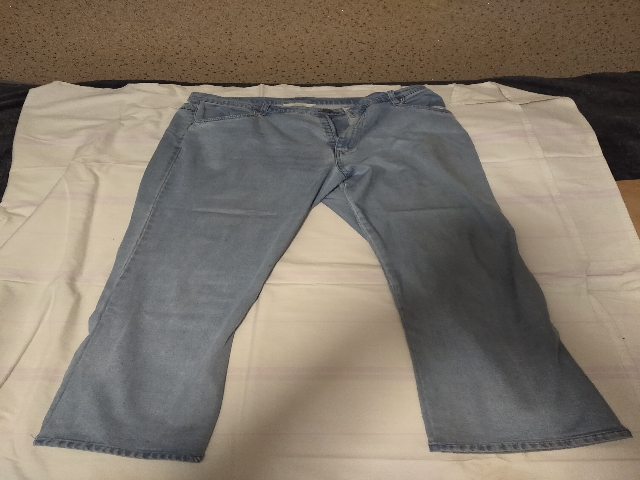

/content/drive/MyDrive/Data/clothings/images_original/cd4815be-7610-4b4a-bc20-e2fdeafb4b3a.jpg


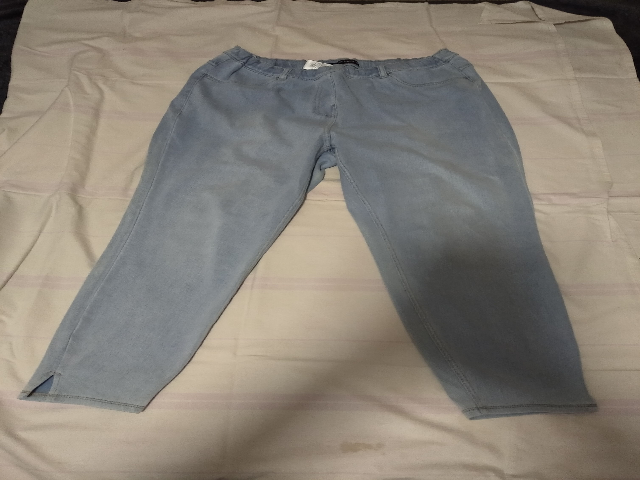

/content/drive/MyDrive/Data/clothings/images_original/test.jpg


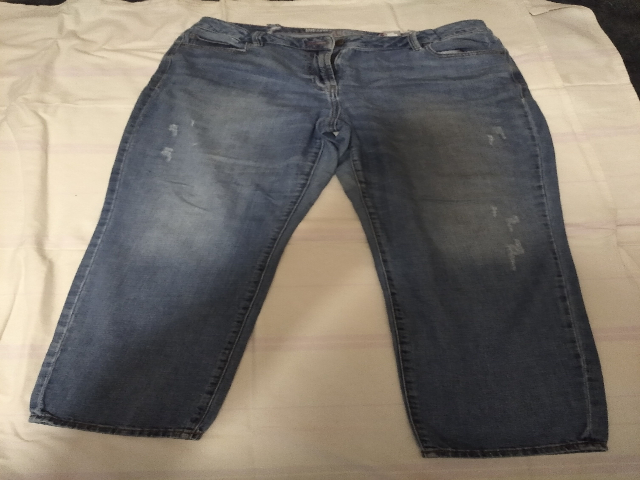

/content/drive/MyDrive/Data/clothings/images_original/0ccc318a-7d69-4d7f-a442-aac1f88bc453.jpg


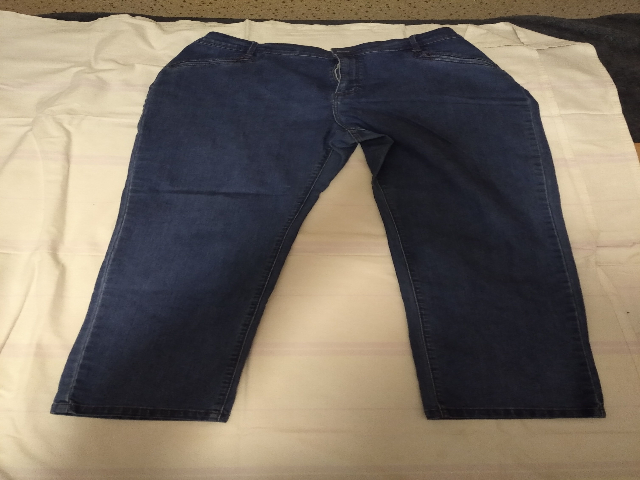

/content/drive/MyDrive/Data/clothings/images_original/ce627dae-599a-4aa4-915d-0d5a32737292.jpg


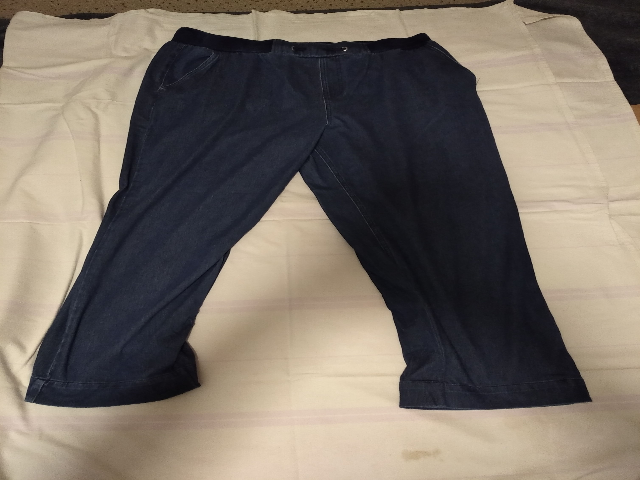

In [25]:
from sklearn.neighbors import NearestNeighbors


feature_list=np.array(pickle.load(open("/content/drive/MyDrive/Data/clothings/featurevector.pkl", "rb")))
filename=pickle.load(open("/content/drive/MyDrive/Data/clothings/filenames.pkl", "rb"))

model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False

model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()


img=cv2.imread(path+"824224ea-df38-446b-a01e-ca078906bb93.jpg")
img=cv2.resize(img, (224,224))
img=np.array(img)
expand_img=np.expand_dims(img, axis=0)
pre_img=preprocess_input(expand_img)
result=model.predict(pre_img).flatten()
normalized=result/norm(result)

#Change the n_neighbors for generating the number of images
neighbors=NearestNeighbors(n_neighbors=5, algorithm="brute", metric="euclidean")
neighbors.fit(feature_list)


distance, indices = neighbors.kneighbors([normalized])

print(indices)

#Change the last index to the same as the number given to n_neighbors
for file in indices[0][0:5]:
    print(filename[file])
    imgName=cv2.imread(filename[file])
    if imgName is None:
      continue
    cv2_imshow(cv2.resize(imgName, (640,480)))
    cv2.waitKey(0)

